            P9-Produisez une étude de marché

La mission consiste à analyser les opportunités d'exportation de poulets à l'international. Utilise les données de la FAO et explore-les dans un notebook R ou Python. Commence par une classification ascendante hiérarchique avec un dendrogramme, puis applique la méthode des k-means. Enrichis l'analyse avec une ACP

# Sommaire

1. [I) Importation des Librairies + données](#chapter1)
2. [II) Exploration des données](#chapter2)
    1. [a) Test Nan](#chapter2a)
    2. [b) La table Pop_2000_2018](#chapter2b)
    3. [c) La table Dispo_Alim_2017](#chapter2c)
3. [III) Tables Gardées](#chapter3)
    1. [a) Pop_2000_2018_OK](#chapter3a)
    2. [b) Dispo_Alim_2017_OK](#chapter3b)
4. [IV) Jointure](#chapter4)
    1. [a) Préparation](#chapter4a)
    2. [b) Jointure](#chapter4b)
    3. [c) Mother_Table_Clean (Que les colonnes numériques)](#chapter4c)
    4. [d) Nouvelles données](#chapter4d)
    5. [e) Retour d'expériences sur l'ACP](#chapter4e)
5. [V) Centrage et réduction des valeurs](#chapter5)
6. [VI) Méthode de classification hiérarchique](#chapter6)
    1. [a) Méthode](#chapter6a)
    2. [b) Dendogramme](#chapter6b)
7. [VII) Méthode supervisée de classification: k-Means](#chapter7)
    1. [a) Cherchons le nombre de clusters idéal](#chapter7a)
8. [VIII) ACP](#chapter8)
9. [IX) Heatmap Clusters VS Variables](#chapter9)
10. [X) Recommandation](#chapter10)



# I) Importation des Librairies + données <a class="anchor" id="chapter1"></a>


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import seaborn as sns
import scipy
import sklearn
from scipy.cluster.hierarchy import linkage, fcluster

In [2]:
# Import des donnees:
Dispo_Alim_2017 = pd.read_csv("H:\Mon Drive\Data_Analyst_Florentin_Marrouard\Projet 9   Produisez une étude de marché avec R ou Python\BDD\DAN-P9-data\\DisponibiliteAlimentaire_2017.csv", sep = ',')              
Pop_2000_2018 = pd.read_csv("H:\Mon Drive\Data_Analyst_Florentin_Marrouard\Projet 9   Produisez une étude de marché avec R ou Python\BDD\DAN-P9-data\\Population_2000_2018.csv", sep = ',')

# II) Exploration des données <a class="anchor" id="chapter2"></a>

## a) Test Nan <a class="anchor" id="chapter2a"></a>


In [3]:
def verifier_nan(dataframe):
    # Vérifier la présence de NaN dans le DataFrame
    nan_presence = dataframe.isnull().any()

    # Compter le nombre de NaN pour chaque colonne
    nan_count = dataframe.isnull().sum()

    # Obtenir le type de chaque colonne
    types_colonnes = dataframe.dtypes

    # Créer un DataFrame pour afficher les résultats
    resultats = pd.DataFrame({
        'Présence de NaN': nan_presence,
        'Nombre de NaN': nan_count,
        'Type de Colonne': types_colonnes
    })
    
    # Imprimer le nombre de colonnes et de lignes
    print(f"Nombre de Colonnes: {dataframe.shape[1]}")
    print(f"Nombre de Lignes: {dataframe.shape[0]}")
    print(f"Nombre total de NaN: {nan_count.sum()}")
    return resultats

In [4]:
verifier_nan(Dispo_Alim_2017)

Nombre de Colonnes: 14
Nombre de Lignes: 176600
Nombre total de NaN: 0


Présence de NaN  Nombre de NaN Type de Colonne
Code Domaine                      False              0          object
Domaine                           False              0          object
Code zone                         False              0           int64
Zone                              False              0          object
Code Élément                      False              0           int64
Élément                           False              0          object
Code Produit                      False              0           int64
Produit                           False              0          object
Code année                        False              0           int64
Année                             False              0           int64
Unité                             False              0          object
Valeur                            False              0         float64
Symbole                           False              0          object
Description du Symbole            False              0          object

In [5]:
verifier_nan(Pop_2000_2018)

Nombre de Colonnes: 15
Nombre de Lignes: 4411
Nombre total de NaN: 4153


Présence de NaN  Nombre de NaN Type de Colonne
Code Domaine                      False              0          object
Domaine                           False              0          object
Code zone                         False              0           int64
Zone                              False              0          object
Code Élément                      False              0           int64
Élément                           False              0          object
Code Produit                      False              0           int64
Produit                           False              0          object
Code année                        False              0           int64
Année                             False              0           int64
Unité                             False              0          object
Valeur                            False              0         float64
Symbole                           False              0          object
Description du Symbole            False              0          object
Note                               True           4153          object

## b) La table Pop_2000_2018 <a class="anchor" id="chapter2b"></a>

In [6]:
def afficher_valeurs_uniques(dataframe):
    # Vérifier si l'argument est une chaîne de caractères
    if isinstance(dataframe, str):
        # Charger le DataFrame à partir du nom
        dataframe = globals()[dataframe]

    # Vérifier si dataframe est un DataFrame
    if not isinstance(dataframe, pd.DataFrame):
        raise ValueError("L'argument doit être un nom de DataFrame ou un DataFrame directement.")

    # Afficher les valeurs uniques pour chaque colonne
    for colonne in dataframe.columns:
        valeurs_uniques = dataframe[colonne].unique()[:10]
        print(f"Colonne '{colonne}': {valeurs_uniques}")


In [7]:
afficher_valeurs_uniques(Pop_2000_2018)

Colonne 'Code Domaine': ['OA']
Colonne 'Domaine': ['Séries temporelles annuelles']
Colonne 'Code zone': [  2 202   3   4  79   6   7 258   8 151]
Colonne 'Zone': ['Afghanistan' 'Afrique du Sud' 'Albanie' 'Algérie' 'Allemagne' 'Andorre'
 'Angola' 'Anguilla' 'Antigua-et-Barbuda' 'Antilles néerlandaises (ex)']
Colonne 'Code Élément': [511]
Colonne 'Élément': ['Population totale']
Colonne 'Code Produit': [3010]
Colonne 'Produit': ['Population-Estimations']
Colonne 'Code année': [2000 2001 2002 2003 2004 2005 2006 2007 2008 2009]
Colonne 'Année': [2000 2001 2002 2003 2004 2005 2006 2007 2008 2009]
Colonne 'Unité': ['1000 personnes']
Colonne 'Valeur': [20779.953 21606.988 22600.77  23680.871 24726.684 25654.277 26433.049
 27100.536 27722.276 28394.813]
Colonne 'Symbole': ['X' 'A']
Colonne 'Description du Symbole': ['Sources internationales sûres'
 'Agrégat, peut inclure des données officielles, semi-officielles, estimées ou calculées']
Colonne 'Note': [nan
 'UNDESA, Population Division – Wor

In [8]:
Pop_2000_2018[Pop_2000_2018["Symbole"] == "X"][["Symbole", "Description du Symbole", "Note"]].head()

Symbole         Description du Symbole Note
0       X  Sources internationales sûres  NaN
1       X  Sources internationales sûres  NaN
2       X  Sources internationales sûres  NaN
3       X  Sources internationales sûres  NaN
4       X  Sources internationales sûres  NaN

In [9]:
Pop_2000_2018[Pop_2000_2018["Symbole"] == "A"][["Symbole", "Description du Symbole", "Note"]].head()

Symbole                             Description du Symbole Note
171       A  Agrégat, peut inclure des données officielles,...  NaN
172       A  Agrégat, peut inclure des données officielles,...  NaN
173       A  Agrégat, peut inclure des données officielles,...  NaN
174       A  Agrégat, peut inclure des données officielles,...  NaN
175       A  Agrégat, peut inclure des données officielles,...  NaN

Nous avons deux symboles le X pour les sources sûres et le A pour les Agrégats

In [10]:
def evaluer_colonnes(dataframe):
    # Vérifier si l'argument est une chaîne de caractères
    if isinstance(dataframe, str):
        # Charger le DataFrame à partir du nom
        dataframe = globals()[dataframe]

    # Vérifier si dataframe est un DataFrame
    if not isinstance(dataframe, pd.DataFrame):
        raise ValueError("L'argument doit être un nom de DataFrame ou un DataFrame directement.")

    # Utiliser describe pour chaque colonne avec count, unique et freq
    resultats_describe = dataframe.describe(include='all').transpose()[['count', 'unique', 'freq']]

    # Ajouter une colonne avec le type de chaque colonne
    resultats_describe['Type de Colonne'] = dataframe.dtypes

    # Identifier les colonnes avec une seule valeur unique
    colonnes_inutiles = []
    for colonne in resultats_describe.index:
        nb_uniques = resultats_describe.loc[colonne, 'unique']
        if nb_uniques == 1:
            colonnes_inutiles.append(colonne)

    # Afficher les résultats
    print("Statistiques descriptives pour chaque colonne :")
    print(resultats_describe)

    if colonnes_inutiles:
        print("\nColonnes avec une seule valeur unique (inutiles pour la suite de l'étude) :")
        print(colonnes_inutiles)


In [11]:
evaluer_colonnes(Pop_2000_2018)

Statistiques descriptives pour chaque colonne :
                         count unique  freq Type de Colonne
Code Domaine              4411      1  4411          object
Domaine                   4411      1  4411          object
Code zone               4411.0    NaN   NaN           int64
Zone                      4411    238    19          object
Code Élément            4411.0    NaN   NaN           int64
Élément                   4411      1  4411          object
Code Produit            4411.0    NaN   NaN           int64
Produit                   4411      1  4411          object
Code année              4411.0    NaN   NaN           int64
Année                   4411.0    NaN   NaN           int64
Unité                     4411      1  4411          object
Valeur                  4411.0    NaN   NaN         float64
Symbole                   4411      2  4374          object
Description du Symbole    4411      2  4374          object
Note                       258      1   258         

check approfondi des colonnes où unique est Nan, on peut voir que les Nan de la colonne unique sont du au fait que la colonne soit de type int64 ou float64

In [12]:
Pop_2000_2018['Code zone'] = Pop_2000_2018['Code zone'].astype('object')
Pop_2000_2018['Code Élément'] = Pop_2000_2018['Code Élément'].astype('object')
Pop_2000_2018['Code Produit'] = Pop_2000_2018['Code Produit'].astype('object')
Pop_2000_2018['Code année'] = Pop_2000_2018['Code année'].astype('object')
Pop_2000_2018['Année'] = Pop_2000_2018['Année'].astype('object')
Pop_2000_2018['Valeur'] = Pop_2000_2018['Valeur'].astype('object')

In [13]:
evaluer_colonnes(Pop_2000_2018)

Statistiques descriptives pour chaque colonne :
                         count  unique  freq Type de Colonne
Code Domaine              4411       1  4411          object
Domaine                   4411       1  4411          object
Code zone                 4411     238    19          object
Zone                      4411     238    19          object
Code Élément              4411       1  4411          object
Élément                   4411       1  4411          object
Code Produit              4411       1  4411          object
Produit                   4411       1  4411          object
Code année                4411      19   236          object
Année                     4411      19   236          object
Unité                     4411       1  4411          object
Valeur                  4411.0  4398.0   3.0          object
Symbole                   4411       2  4374          object
Description du Symbole    4411       2  4374          object
Note                       258       

## c) La table Dispo_Alim_2017 <a class="anchor" id="chapter2c"></a>

In [14]:
afficher_valeurs_uniques(Dispo_Alim_2017)

Colonne 'Code Domaine': ['FBS']
Colonne 'Domaine': ['Nouveaux Bilans Alimentaire']
Colonne 'Code zone': [  2 202   3   4  79   7   8 194   9   1]
Colonne 'Zone': ['Afghanistan' 'Afrique du Sud' 'Albanie' 'Algérie' 'Allemagne' 'Angola'
 'Antigua-et-Barbuda' 'Arabie saoudite' 'Argentine' 'Arménie']
Colonne 'Code Élément': [5511 5611 5072 5911 5301 5521 5527 5123 5170 5142]
Colonne 'Élément': ['Production' 'Importations - Quantité' 'Variation de stock'
 'Exportations - Quantité' 'Disponibilité intérieure'
 'Aliments pour animaux' 'Semences' 'Pertes' 'Résidus' 'Nourriture']
Colonne 'Code Produit': [2511 2805 2513 2514 2515 2516 2517 2518 2520 2531]
Colonne 'Produit': ['Blé et produits' 'Riz et produits' 'Orge et produits' 'Maïs et produits'
 'Seigle et produits' 'Avoine' 'Millet et produits' 'Sorgho et produits'
 'Céréales, Autres' 'Pommes de Terre et produits']
Colonne 'Code année': [2017]
Colonne 'Année': [2017]
Colonne 'Unité': ['Milliers de tonnes' 'kg' 'Kcal/personne/jour' 'g/personne

In [15]:
evaluer_colonnes(Dispo_Alim_2017)

Statistiques descriptives pour chaque colonne :
                           count unique    freq Type de Colonne
Code Domaine              176600      1  176600          object
Domaine                   176600      1  176600          object
Code zone               176600.0    NaN     NaN           int64
Zone                      176600    174    1416          object
Code Élément            176600.0    NaN     NaN           int64
Élément                   176600     17   15905          object
Code Produit            176600.0    NaN     NaN           int64
Produit                   176600     98    2593          object
Code année              176600.0    NaN     NaN           int64
Année                   176600.0    NaN     NaN           int64
Unité                     176600      4  118487          object
Valeur                  176600.0    NaN     NaN         float64
Symbole                   176600      2  118487          object
Description du Symbole    176600      2  118487         

In [16]:
Dispo_Alim_2017['Code zone'] = Dispo_Alim_2017['Code zone'].astype('object')
Dispo_Alim_2017['Code Élément'] = Dispo_Alim_2017['Code Élément'].astype('object')
Dispo_Alim_2017['Code Produit'] = Dispo_Alim_2017['Code Produit'].astype('object')
Dispo_Alim_2017['Code année'] = Dispo_Alim_2017['Code année'].astype('object')
Dispo_Alim_2017['Année'] = Dispo_Alim_2017['Année'].astype('object')
Dispo_Alim_2017['Valeur'] = Dispo_Alim_2017['Valeur'].astype('object')

In [17]:
evaluer_colonnes(Dispo_Alim_2017)

Statistiques descriptives pour chaque colonne :
                           count  unique     freq Type de Colonne
Code Domaine              176600       1   176600          object
Domaine                   176600       1   176600          object
Code zone                 176600     174     1416          object
Zone                      176600     174     1416          object
Code Élément              176600      17    15905          object
Élément                   176600      17    15905          object
Code Produit              176600      98     2593          object
Produit                   176600      98     2593          object
Code année                176600       1   176600          object
Année                     176600       1   176600          object
Unité                     176600       4   118487          object
Valeur                  176600.0  7250.0  76122.0          object
Symbole                   176600       2   118487          object
Description du Symbole    17

Nous garderons années pour la jointure 

In [18]:
Dispo_Alim_2017['Élément'].value_counts()

Disponibilité intérieure                                         15905
Importations - Quantité                                          15260
Disponibilité alimentaire en quantité (kg/personne/an)           14618
Disponibilité de matière grasse en quantité (g/personne/jour)    14512
Disponibilité de protéines en quantité (g/personne/jour)         14507
Nourriture                                                       14498
Disponibilité alimentaire (Kcal/personne/jour)                   14476
Résidus                                                          12567
Exportations - Quantité                                          12113
Variation de stock                                               11299
Production                                                       10334
Pertes                                                            5813
Alimentation pour touristes                                       5560
Autres utilisations (non alimentaire)                             5292
Alimen

# III) Tables Gardées <a class="anchor" id="chapter3"></a>

## a) Pop_2000_2018_OK <a class="anchor" id="chapter3a"></a>

In [19]:
Pop_2000_2018.head()

Code Domaine                       Domaine Code zone         Zone  \
0           OA  Séries temporelles annuelles         2  Afghanistan   
1           OA  Séries temporelles annuelles         2  Afghanistan   
2           OA  Séries temporelles annuelles         2  Afghanistan   
3           OA  Séries temporelles annuelles         2  Afghanistan   
4           OA  Séries temporelles annuelles         2  Afghanistan   

  Code Élément            Élément Code Produit                 Produit  \
0          511  Population totale         3010  Population-Estimations   
1          511  Population totale         3010  Population-Estimations   
2          511  Population totale         3010  Population-Estimations   
3          511  Population totale         3010  Population-Estimations   
4          511  Population totale         3010  Population-Estimations   

  Code année Année           Unité     Valeur Symbole  \
0       2000  2000  1000 personnes  20779.953       X   
1       2001  2001  1000 personnes  21606.988       X   
2       2002  2002  1000 personnes   22600.77       X   
3       2003  2003  1000 personnes  23680.871       X   
4       2004  2004  1000 personnes  24726.684       X   

          Description du Symbole Note  
0  Sources internationales sûres  NaN  
1  Sources internationales sûres  NaN  
2  Sources internationales sûres  NaN  
3  Sources internationales sûres  NaN  
4  Sources internationales sûres  NaN

In [20]:
Pop_2000_2018.columns

Index(['Code Domaine', 'Domaine', 'Code zone', 'Zone', 'Code Élément',
       'Élément', 'Code Produit', 'Produit', 'Code année', 'Année', 'Unité',
       'Valeur', 'Symbole', 'Description du Symbole', 'Note'],
      dtype='object')

['Code Domaine', 'Domaine', 'Code Élément', 'Élément', 'Code Produit', 'Produit', 'Unité', 'Note']

In [21]:
Pop_2000_2018_OK = Pop_2000_2018[['Code zone', 'Zone', 'Année','Valeur', 'Symbole', 'Description du Symbole']]
Pop_2000_2018_OK.head()

Code zone         Zone Année     Valeur Symbole  \
0         2  Afghanistan  2000  20779.953       X   
1         2  Afghanistan  2001  21606.988       X   
2         2  Afghanistan  2002   22600.77       X   
3         2  Afghanistan  2003  23680.871       X   
4         2  Afghanistan  2004  24726.684       X   

          Description du Symbole  
0  Sources internationales sûres  
1  Sources internationales sûres  
2  Sources internationales sûres  
3  Sources internationales sûres  
4  Sources internationales sûres

In [22]:
Pop_2000_2018_OK = Pop_2000_2018_OK.rename(columns={'Valeur':'Population (hab)','Zone':'Pays','Code zone':'Code Pays'})
Pop_2000_2018_OK["Population (hab)"] = Pop_2000_2018_OK["Population (hab)"]*1000

Pop_2000_2018_OK

Code Pays         Pays Année Population (hab) Symbole  \
0            2  Afghanistan  2000       20779953.0       X   
1            2  Afghanistan  2001       21606988.0       X   
2            2  Afghanistan  2002       22600770.0       X   
3            2  Afghanistan  2003       23680871.0       X   
4            2  Afghanistan  2004       24726684.0       X   
...        ...          ...   ...              ...     ...   
4406       181     Zimbabwe  2014       13586707.0       X   
4407       181     Zimbabwe  2015       13814629.0       X   
4408       181     Zimbabwe  2016       14030331.0       X   
4409       181     Zimbabwe  2017       14236595.0       X   
4410       181     Zimbabwe  2018       14438802.0       X   

             Description du Symbole  
0     Sources internationales sûres  
1     Sources internationales sûres  
2     Sources internationales sûres  
3     Sources internationales sûres  
4     Sources internationales sûres  
...                             ...  
4406  Sources internationales sûres  
4407  Sources internationales sûres  
4408  Sources internationales sûres  
4409  Sources internationales sûres  
4410  Sources internationales sûres  

[4411 rows x 6 columns]

In [23]:
verifier_nan(Pop_2000_2018_OK)

Nombre de Colonnes: 6
Nombre de Lignes: 4411
Nombre total de NaN: 0


Présence de NaN  Nombre de NaN Type de Colonne
Code Pays                         False              0          object
Pays                              False              0          object
Année                             False              0          object
Population (hab)                  False              0          object
Symbole                           False              0          object
Description du Symbole            False              0          object

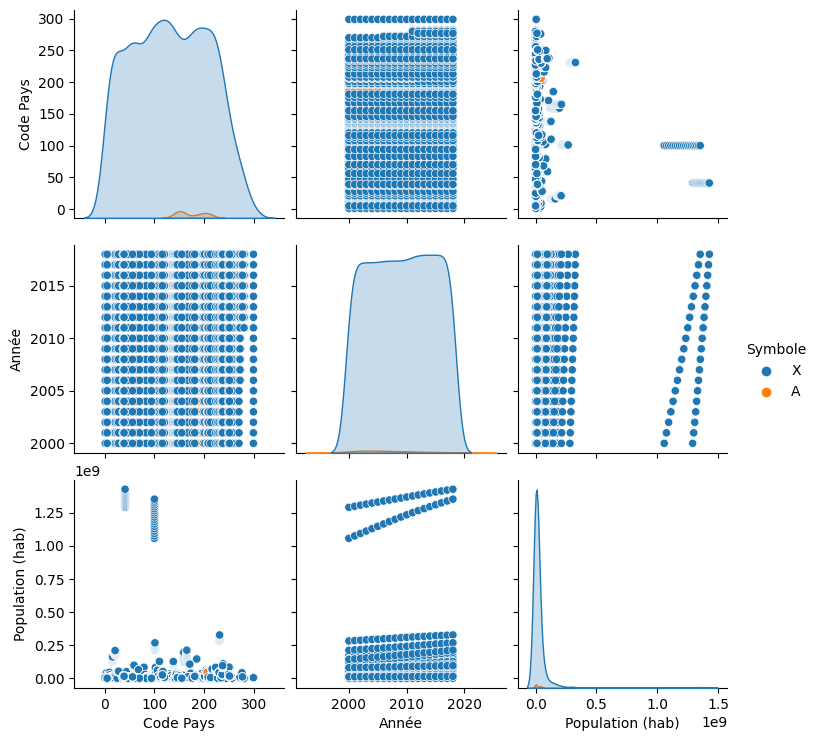

In [24]:
sns.pairplot(Pop_2000_2018_OK, hue="Symbole")

In [25]:
Pop_2000_2018_OK.head()

Code Pays         Pays Année Population (hab) Symbole  \
0         2  Afghanistan  2000       20779953.0       X   
1         2  Afghanistan  2001       21606988.0       X   
2         2  Afghanistan  2002       22600770.0       X   
3         2  Afghanistan  2003       23680871.0       X   
4         2  Afghanistan  2004       24726684.0       X   

          Description du Symbole  
0  Sources internationales sûres  
1  Sources internationales sûres  
2  Sources internationales sûres  
3  Sources internationales sûres  
4  Sources internationales sûres

In [26]:
Masque_Pop = Pop_2000_2018_OK["Population (hab)"] > 1000000000
Pop_2000_2018_OK[Masque_Pop]

Code Pays                 Pays Année Population (hab) Symbole  \
806         41  Chine, continentale  2000     1290550765.0       X   
807         41  Chine, continentale  2001     1299129752.0       X   
808         41  Chine, continentale  2002     1307352257.0       X   
809         41  Chine, continentale  2003     1315303521.0       X   
810         41  Chine, continentale  2004     1323084641.0       X   
811         41  Chine, continentale  2005     1330776380.0       X   
812         41  Chine, continentale  2006     1338408647.0       X   
813         41  Chine, continentale  2007     1345993888.0       X   
814         41  Chine, continentale  2008     1353569484.0       X   
815         41  Chine, continentale  2009     1361169419.0       X   
816         41  Chine, continentale  2010     1368810615.0       X   
817         41  Chine, continentale  2011     1376497639.0       X   
818         41  Chine, continentale  2012     1384206401.0       X   
819         41  Chine, continentale  2013     1391883330.0       X   
820         41  Chine, continentale  2014     1399453965.0       X   
821         41  Chine, continentale  2015     1406847870.0       X   
822         41  Chine, continentale  2016     1414049351.0       X   
823         41  Chine, continentale  2017     1421021791.0       X   
824         41  Chine, continentale  2018     1427647786.0       X   
1935       100                 Inde  2000     1056575549.0       X   
1936       100                 Inde  2001     1075000085.0       X   
1937       100                 Inde  2002     1093317189.0       X   
1938       100                 Inde  2003     1111523144.0       X   
1939       100                 Inde  2004     1129623456.0       X   
1940       100                 Inde  2005     1147609927.0       X   
1941       100                 Inde  2006     1165486291.0       X   
1942       100                 Inde  2007     1183209472.0       X   
1943       100                 Inde  2008     1200669765.0       X   
1944       100                 Inde  2009     1217726215.0       X   
1945       100                 Inde  2010     1234281170.0       X   
1946       100                 Inde  2011     1250287943.0       X   
1947       100                 Inde  2012     1265780247.0       X   
1948       100                 Inde  2013     1280842125.0       X   
1949       100                 Inde  2014     1295600772.0       X   
1950       100                 Inde  2015     1310152403.0       X   
1951       100                 Inde  2016     1324517249.0       X   
1952       100                 Inde  2017     1338676785.0       X   
1953       100                 Inde  2018     1352642280.0       X   

             Description du Symbole  
806   Sources internationales sûres  
807   Sources internationales sûres  
808   Sources internationales sûres  
809   Sources internationales sûres  
810   Sources internationales sûres  
811   Sources internationales sûres  
812   Sources internationales sûres  
813   Sources internationales sûres  
814   Sources internationales sûres  
815   Sources internationales sûres  
816   Sources internationales sûres  
817   Sources internationales sûres  
818   Sources internationales sûres  
819   Sources internationales sûres  
820   Sources internationales sûres  
821   Sources internationales sûres  
822   Sources internationales sûres  
823   Sources internationales sûres  
824   Sources internationales sûres  
1935  Sources internationales sûres  
1936  Sources internationales sûres  
1937  Sources internationales sûres  
1938  Sources internationales sûres  
1939  Sources internationales sûres  
1940  Sources internationales sûres  
1941  Sources internationales sûres  
1942  Sources internationales sûres  
1943  Sources internationales sûres  
1944  Sources internationales sûres  
1945  Sources internationales sûres  
1946  Sources internationales sûres  
1947  Sources internationales sûres  
1948  Sources intern

In [27]:
Pop_2000_2018_OK[Masque_Pop].groupby(["Pays"]).count()

Code Pays  Année  Population (hab)  Symbole  \
Pays                                                               
Chine, continentale         19     19                19       19   
Inde                        19     19                19       19   

                     Description du Symbole  
Pays                                         
Chine, continentale                      19  
Inde                                     19

La Chine et l'inde c'est logique

In [28]:
# Je remplace les symbole par des Valeurs pour avoir des numéros

Pop_2000_2018_OK['Symbole Numérique Source de données'] = Pop_2000_2018_OK['Symbole'].map({'X':0,'A':1})

Pop_2000_2018_OK = Pop_2000_2018_OK.rename(columns={'Symbole':'Symbole Source de données','Description du Symbole':'Description du Symbole Source de données'})

Pop_2000_2018_OK["Population (hab)"] = Pop_2000_2018_OK["Population (hab)"].astype(int)

Pop_2000_2018_OK

Code Pays         Pays Année  Population (hab) Symbole Source de données  \
0            2  Afghanistan  2000          20779953                         X   
1            2  Afghanistan  2001          21606988                         X   
2            2  Afghanistan  2002          22600770                         X   
3            2  Afghanistan  2003          23680871                         X   
4            2  Afghanistan  2004          24726684                         X   
...        ...          ...   ...               ...                       ...   
4406       181     Zimbabwe  2014          13586707                         X   
4407       181     Zimbabwe  2015          13814629                         X   
4408       181     Zimbabwe  2016          14030331                         X   
4409       181     Zimbabwe  2017          14236595                         X   
4410       181     Zimbabwe  2018          14438802                         X   

     Description du Symbole Source de données  \
0               Sources internationales sûres   
1               Sources internationales sûres   
2               Sources internationales sûres   
3               Sources internationales sûres   
4               Sources internationales sûres   
...                                       ...   
4406            Sources internationales sûres   
4407            Sources internationales sûres   
4408            Sources internationales sûres   
4409            Sources internationales sûres   
4410            Sources internationales sûres   

      Symbole Numérique Source de données  
0                                       0  
1                                       0  
2                                       0  
3                                       0  
4                                       0  
...                                   ...  
4406                                    0  
4407                                    0  
4408                                    0  
4409                                    0  
4410                                    0  

[4411 rows x 7 columns]

In [29]:
# Je vais regrouper les Populations par pays en faisant une moyenne 

Pop_2000_2018_groupby = Pop_2000_2018_OK[["Population (hab)","Pays"]].groupby(["Pays"]).mean()
Pop_2000_2018_groupby = Pop_2000_2018_groupby.rename(columns={"Population (hab)":"Moy Pop (hab) de 2000 à 2018"})

Pop_2000_2018_groupby

Moy Pop (hab) de 2000 à 2018
Pays                                                   
Afghanistan                                2.884577e+07
Afrique du Sud                             5.090147e+07
Albanie                                    2.994856e+06
Algérie                                    3.585847e+07
Allemagne                                  8.152701e+07
...                                                 ...
Îles Salomon                               5.228723e+05
Îles Turques-et-Caïques                    3.080495e+04
Îles Vierges américaines                   1.065800e+05
Îles Vierges britanniques                  2.589047e+04
Îles Wallis-et-Futuna                      1.343147e+04

[238 rows x 1 columns]

In [30]:
# Je vais calculer la colonne taux d'accroissement de 2000 à 2018

Année_déb = 2000 

Année_fin = 2018

Masque_déb = Pop_2000_2018_OK["Année"] == Année_déb
Masque_fin = Pop_2000_2018_OK["Année"] == Année_fin

Pop_déb = Pop_2000_2018_OK[Masque_déb][["Code Pays","Pays","Population (hab)"]]
Pop_fin = Pop_2000_2018_OK[Masque_fin][["Code Pays","Pays","Population (hab)"]]

In [31]:
Pop_déb = Pop_déb.rename(columns={"Population (hab)":"Pop déb (hab)"}) 
Pop_fin = Pop_fin.rename(columns={"Population (hab)":"Pop fin (hab)"}) 

In [32]:
Pop_déb

Code Pays                                    Pays  Pop déb (hab)
0            2                             Afghanistan       20779953
19         202                          Afrique du Sud       44967708
38           3                                 Albanie        3129243
57           4                                 Algérie       31042235
76          79                               Allemagne       81400882
...        ...                                     ...            ...
4316       236  Venezuela (République bolivarienne du)       24192446
4335       237                                Viet Nam       79910412
4354       249                                   Yémen       17409072
4373       251                                  Zambie       10415944
4392       181                                Zimbabwe       11881477

[229 rows x 3 columns]

In [33]:
verifier_nan(Pop_déb)

Nombre de Colonnes: 3
Nombre de Lignes: 229
Nombre total de NaN: 0


Présence de NaN  Nombre de NaN Type de Colonne
Code Pays                False              0          object
Pays                     False              0          object
Pop déb (hab)            False              0           int32

In [34]:
Pop_fin

Code Pays                                    Pays  Pop fin (hab)
18           2                             Afghanistan       37171921
37         202                          Afrique du Sud       57792518
56           3                                 Albanie        2882740
75           4                                 Algérie       42228408
94          79                               Allemagne       83124418
...        ...                                     ...            ...
4334       236  Venezuela (République bolivarienne du)       28887118
4353       237                                Viet Nam       95545962
4372       249                                   Yémen       28498683
4391       251                                  Zambie       17351708
4410       181                                Zimbabwe       14438802

[236 rows x 3 columns]

In [35]:
verifier_nan(Pop_fin)

Nombre de Colonnes: 3
Nombre de Lignes: 236
Nombre total de NaN: 0


Présence de NaN  Nombre de NaN Type de Colonne
Code Pays                False              0          object
Pays                     False              0          object
Pop fin (hab)            False              0           int32

Il n'y a pas le même nombre de ligne Pop déb et Pop fin

In [36]:
Taux_Accroissement_Pop_2000_2018 = pd.merge(Pop_fin,Pop_déb,on=["Code Pays","Pays"],how='left')

Taux_Accroissement_Pop_2000_2018

Code Pays                                    Pays  Pop fin (hab)  \
0           2                             Afghanistan       37171921   
1         202                          Afrique du Sud       57792518   
2           3                                 Albanie        2882740   
3           4                                 Algérie       42228408   
4          79                               Allemagne       83124418   
..        ...                                     ...            ...   
231       236  Venezuela (République bolivarienne du)       28887118   
232       237                                Viet Nam       95545962   
233       249                                   Yémen       28498683   
234       251                                  Zambie       17351708   
235       181                                Zimbabwe       14438802   

     Pop déb (hab)  
0       20779953.0  
1       44967708.0  
2        3129243.0  
3       31042235.0  
4       81400882.0  
..             ...  
231     24192446.0  
232     79910412.0  
233     17409072.0  
234     10415944.0  
235     11881477.0  

[236 rows x 4 columns]

In [37]:
verifier_nan(Taux_Accroissement_Pop_2000_2018)

Nombre de Colonnes: 4
Nombre de Lignes: 236
Nombre total de NaN: 9


Présence de NaN  Nombre de NaN Type de Colonne
Code Pays                False              0          object
Pays                     False              0          object
Pop fin (hab)            False              0           int32
Pop déb (hab)             True              9         float64

afficher les nan pays pop deb 

## Correction Pop déb

In [38]:
Taux_Accroissement_Pop_2000_2018_pb_9_pays= Taux_Accroissement_Pop_2000_2018[Taux_Accroissement_Pop_2000_2018['Pop déb (hab)'].isna()]
Taux_Accroissement_Pop_2000_2018_pb_9_pays

Code Pays                                 Pays  Pop fin (hab)  \
28        278      Bonaire, Saint-Eustache et Saba          25711   
53        279                              Curaçao         162752   
143       273                           Monténégro         627809   
188       282                     Saint-Barthélemy           9816   
193       281      Saint-Martin (partie française)          37264   
201       272                               Serbie        8802754   
205       280  Sint Maarten  (partie néerlandaise)          41940   
209       276                               Soudan       41801533   
210       277                        Soudan du Sud       10975927   

     Pop déb (hab)  
28             NaN  
53             NaN  
143            NaN  
188            NaN  
193            NaN  
201            NaN  
205            NaN  
209            NaN  
210            NaN

In [39]:
Pays_Pb = pd.merge(Taux_Accroissement_Pop_2000_2018_pb_9_pays,Pop_2000_2018_OK,on=['Code Pays','Pays'], how='left').drop_duplicates()
Pays_Pb.head()

Code Pays                             Pays  Pop fin (hab)  Pop déb (hab)  \
0       278  Bonaire, Saint-Eustache et Saba          25711            NaN   
1       278  Bonaire, Saint-Eustache et Saba          25711            NaN   
2       278  Bonaire, Saint-Eustache et Saba          25711            NaN   
3       278  Bonaire, Saint-Eustache et Saba          25711            NaN   
4       278  Bonaire, Saint-Eustache et Saba          25711            NaN   

  Année  Population (hab) Symbole Source de données  \
0  2011             21993                         X   
1  2012             22842                         X   
2  2013             23505                         X   
3  2014             24070                         X   
4  2015             24570                         X   

  Description du Symbole Source de données  \
0            Sources internationales sûres   
1            Sources internationales sûres   
2            Sources internationales sûres   
3            Sources internationales sûres   
4            Sources internationales sûres   

   Symbole Numérique Source de données  
0                                    0  
1                                    0  
2                                    0  
3                                    0  
4                                    0

In [40]:
Valeur_Année_min = Pays_Pb.groupby('Pays')['Année'].min()

# Convertir en DataFrame et renommer la colonne
Valeur_Année_min = Valeur_Année_min.to_frame()

# Afficher le résultat
Valeur_Année_min

Année
Pays                                      
Bonaire, Saint-Eustache et Saba       2011
Curaçao                               2011
Monténégro                            2006
Saint-Barthélemy                      2011
Saint-Martin (partie française)       2011
Serbie                                2006
Sint Maarten  (partie néerlandaise)   2011
Soudan                                2012
Soudan du Sud                         2012

In [41]:
J1 = pd.merge(Taux_Accroissement_Pop_2000_2018_pb_9_pays,Valeur_Année_min,on='Pays',how='inner')
J1

Code Pays                                 Pays  Pop fin (hab)  \
0       278      Bonaire, Saint-Eustache et Saba          25711   
1       279                              Curaçao         162752   
2       273                           Monténégro         627809   
3       282                     Saint-Barthélemy           9816   
4       281      Saint-Martin (partie française)          37264   
5       272                               Serbie        8802754   
6       280  Sint Maarten  (partie néerlandaise)          41940   
7       276                               Soudan       41801533   
8       277                        Soudan du Sud       10975927   

   Pop déb (hab)  Année  
0            NaN   2011  
1            NaN   2011  
2            NaN   2006  
3            NaN   2011  
4            NaN   2011  
5            NaN   2006  
6            NaN   2011  
7            NaN   2012  
8            NaN   2012

In [42]:
J2 = pd.merge(J1,Pop_2000_2018_OK,on=['Pays',"Code Pays","Année"],how='inner')
J2

Code Pays                                 Pays  Pop fin (hab)  \
0       278      Bonaire, Saint-Eustache et Saba          25711   
1       279                              Curaçao         162752   
2       273                           Monténégro         627809   
3       282                     Saint-Barthélemy           9816   
4       281      Saint-Martin (partie française)          37264   
5       272                               Serbie        8802754   
6       280  Sint Maarten  (partie néerlandaise)          41940   
7       276                               Soudan       41801533   
8       277                        Soudan du Sud       10975927   

   Pop déb (hab) Année  Population (hab) Symbole Source de données  \
0            NaN  2011             21993                         X   
1            NaN  2011            152315                         X   
2            NaN  2006            617860                         X   
3            NaN  2011              9343                         X   
4            NaN  2011             37446                         X   
5            NaN  2006           9145914                         X   
6            NaN  2011             35058                         X   
7            NaN  2012          36193783                         X   
8            NaN  2012          10113649                         X   

  Description du Symbole Source de données  \
0            Sources internationales sûres   
1            Sources internationales sûres   
2            Sources internationales sûres   
3            Sources internationales sûres   
4            Sources internationales sûres   
5            Sources internationales sûres   
6            Sources internationales sûres   
7            Sources internationales sûres   
8            Sources internationales sûres   

   Symbole Numérique Source de données  
0                                    0  
1                                    0  
2                                    0  
3                                    0  
4                                    0  
5                                    0  
6                                    0  
7                                    0  
8                                    0

In [43]:
verifier_nan(J2)

Nombre de Colonnes: 9
Nombre de Lignes: 9
Nombre total de NaN: 9


Présence de NaN  Nombre de NaN  \
Code Pays                                           False              0   
Pays                                                False              0   
Pop fin (hab)                                       False              0   
Pop déb (hab)                                        True              9   
Année                                               False              0   
Population (hab)                                    False              0   
Symbole Source de données                           False              0   
Description du Symbole Source de données            False              0   
Symbole Numérique Source de données                 False              0   

                                         Type de Colonne  
Code Pays                                         object  
Pays                                              object  
Pop fin (hab)                                      int32  
Pop déb (hab)                                    float64  
Année                                             object  
Population (hab)                                   int32  
Symbole Source de données                         object  
Description du Symbole Source de données          object  
Symbole Numérique Source de données                int64

In [44]:
J3 = J2[['Code Pays', 'Pays', 'Pop fin (hab)', 'Pop déb (hab)',
       'Population (hab)']]
J3

Code Pays                                 Pays  Pop fin (hab)  \
0       278      Bonaire, Saint-Eustache et Saba          25711   
1       279                              Curaçao         162752   
2       273                           Monténégro         627809   
3       282                     Saint-Barthélemy           9816   
4       281      Saint-Martin (partie française)          37264   
5       272                               Serbie        8802754   
6       280  Sint Maarten  (partie néerlandaise)          41940   
7       276                               Soudan       41801533   
8       277                        Soudan du Sud       10975927   

   Pop déb (hab)  Population (hab)  
0            NaN             21993  
1            NaN            152315  
2            NaN            617860  
3            NaN              9343  
4            NaN             37446  
5            NaN           9145914  
6            NaN             35058  
7            NaN          36193783  
8            NaN          10113649

In [45]:
J4 = J3.copy()

J4["Pop déb (hab)"] = J3["Population (hab)"]
J4 = J4.drop("Population (hab)",axis=1)
J4 = J4.drop("Pop fin (hab)",axis=1)
J4 = J4.rename(columns={'Pop déb (hab)':"Valeur Pop (hab) avec l'année min"})
J4

Code Pays                                 Pays  \
0       278      Bonaire, Saint-Eustache et Saba   
1       279                              Curaçao   
2       273                           Monténégro   
3       282                     Saint-Barthélemy   
4       281      Saint-Martin (partie française)   
5       272                               Serbie   
6       280  Sint Maarten  (partie néerlandaise)   
7       276                               Soudan   
8       277                        Soudan du Sud   

   Valeur Pop (hab) avec l'année min  
0                              21993  
1                             152315  
2                             617860  
3                               9343  
4                              37446  
5                            9145914  
6                              35058  
7                           36193783  
8                           10113649

In [46]:
verifier_nan(J4)

Nombre de Colonnes: 3
Nombre de Lignes: 9
Nombre total de NaN: 0


Présence de NaN  Nombre de NaN  \
Code Pays                                    False              0   
Pays                                         False              0   
Valeur Pop (hab) avec l'année min            False              0   

                                  Type de Colonne  
Code Pays                                  object  
Pays                                       object  
Valeur Pop (hab) avec l'année min           int32

In [47]:
J5 = pd.merge(Taux_Accroissement_Pop_2000_2018,J4,on=['Pays',"Code Pays"],how='outer')
J5

Code Pays                                    Pays  Pop fin (hab)  \
0           2                             Afghanistan       37171921   
1         202                          Afrique du Sud       57792518   
2           3                                 Albanie        2882740   
3           4                                 Algérie       42228408   
4          79                               Allemagne       83124418   
..        ...                                     ...            ...   
231       236  Venezuela (République bolivarienne du)       28887118   
232       237                                Viet Nam       95545962   
233       249                                   Yémen       28498683   
234       251                                  Zambie       17351708   
235       181                                Zimbabwe       14438802   

     Pop déb (hab)  Valeur Pop (hab) avec l'année min  
0       20779953.0                                NaN  
1       44967708.0                                NaN  
2        3129243.0                                NaN  
3       31042235.0                                NaN  
4       81400882.0                                NaN  
..             ...                                ...  
231     24192446.0                                NaN  
232     79910412.0                                NaN  
233     17409072.0                                NaN  
234     10415944.0                                NaN  
235     11881477.0                                NaN  

[236 rows x 5 columns]

In [48]:
J5 = J5.fillna(0)
J5

Code Pays                                    Pays  Pop fin (hab)  \
0            2                             Afghanistan       37171921   
1          202                          Afrique du Sud       57792518   
2            3                                 Albanie        2882740   
3            4                                 Algérie       42228408   
4           79                               Allemagne       83124418   
..         ...                                     ...            ...   
231        236  Venezuela (République bolivarienne du)       28887118   
232        237                                Viet Nam       95545962   
233        249                                   Yémen       28498683   
234        251                                  Zambie       17351708   
235        181                                Zimbabwe       14438802   

     Pop déb (hab)  Valeur Pop (hab) avec l'année min  
0       20779953.0                                0.0  
1       44967708.0                                0.0  
2        3129243.0                                0.0  
3       31042235.0                                0.0  
4       81400882.0                                0.0  
..             ...                                ...  
231     24192446.0                                0.0  
232     79910412.0                                0.0  
233     17409072.0                                0.0  
234     10415944.0                                0.0  
235     11881477.0                                0.0  

[236 rows x 5 columns]

In [49]:
J5["Pop déb (hab)_OK"] = 0

J5_2 = J5.copy()

for i in range(len(J5)):
    J5_2["Pop déb (hab)_OK"][i] = max((J5["Pop déb (hab)"][i]),(J5["Valeur Pop (hab) avec l'année min"][i]) )
    
J5_2

C:\Users\flore\AppData\Local\Temp\ipykernel_2748\1776219256.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  J5_2["Pop déb (hab)_OK"][i] = max((J5["Pop déb (hab)"][i]),(J5["Valeur Pop (hab) avec l'année min"][i]) )


Code Pays                                    Pays  Pop fin (hab)  \
0            2                             Afghanistan       37171921   
1          202                          Afrique du Sud       57792518   
2            3                                 Albanie        2882740   
3            4                                 Algérie       42228408   
4           79                               Allemagne       83124418   
..         ...                                     ...            ...   
231        236  Venezuela (République bolivarienne du)       28887118   
232        237                                Viet Nam       95545962   
233        249                                   Yémen       28498683   
234        251                                  Zambie       17351708   
235        181                                Zimbabwe       14438802   

     Pop déb (hab)  Valeur Pop (hab) avec l'année min  Pop déb (hab)_OK  
0       20779953.0                                0.0          20779953  
1       44967708.0                                0.0          44967708  
2        3129243.0                                0.0           3129243  
3       31042235.0                                0.0          31042235  
4       81400882.0                                0.0          81400882  
..             ...                                ...               ...  
231     24192446.0                                0.0          24192446  
232     79910412.0                                0.0          79910412  
233     17409072.0                                0.0          17409072  
234     10415944.0                                0.0          10415944  
235     11881477.0                                0.0          11881477  

[236 rows x 6 columns]

In [50]:
verifier_nan(J5_2)

Nombre de Colonnes: 6
Nombre de Lignes: 236
Nombre total de NaN: 0


Présence de NaN  Nombre de NaN  \
Code Pays                                    False              0   
Pays                                         False              0   
Pop fin (hab)                                False              0   
Pop déb (hab)                                False              0   
Valeur Pop (hab) avec l'année min            False              0   
Pop déb (hab)_OK                             False              0   

                                  Type de Colonne  
Code Pays                                   int64  
Pays                                       object  
Pop fin (hab)                               int32  
Pop déb (hab)                             float64  
Valeur Pop (hab) avec l'année min         float64  
Pop déb (hab)_OK                            int64

In [51]:
déb = J5_2['Pop déb (hab)_OK']
fin = J5_2["Pop fin (hab)"]

Taux_Accroissement_Pop_2000_2018["Taux Accroissement Population 2000_2018"] = ((fin - déb)/(déb)).round(2)

Taux_Accroissement_Pop_2000_2018

Code Pays                                    Pays  Pop fin (hab)  \
0           2                             Afghanistan       37171921   
1         202                          Afrique du Sud       57792518   
2           3                                 Albanie        2882740   
3           4                                 Algérie       42228408   
4          79                               Allemagne       83124418   
..        ...                                     ...            ...   
231       236  Venezuela (République bolivarienne du)       28887118   
232       237                                Viet Nam       95545962   
233       249                                   Yémen       28498683   
234       251                                  Zambie       17351708   
235       181                                Zimbabwe       14438802   

     Pop déb (hab)  Taux Accroissement Population 2000_2018  
0       20779953.0                                     0.79  
1       44967708.0                                     0.29  
2        3129243.0                                    -0.08  
3       31042235.0                                     0.36  
4       81400882.0                                     0.02  
..             ...                                      ...  
231     24192446.0                                     0.19  
232     79910412.0                                     0.20  
233     17409072.0                                     0.64  
234     10415944.0                                     0.67  
235     11881477.0                                     0.22  

[236 rows x 5 columns]

In [52]:
Pop_2000_2018_groupby.shape

(238, 1)

je me suis rendu compte que pour 2 pays l'année de fin 2018 n'avait pas de valeur

en effet taux accroissement_Pop_2000_2018 a 236 lignes alors que Pop_2000_2018_groupby a 238 lignes

Les 2 pays promblématique sont les codes pays 206 et 186

In [53]:
M_186 = Taux_Accroissement_Pop_2000_2018["Code Pays"] == 186
Taux_Accroissement_Pop_2000_2018[M_186]

Empty DataFrame
Columns: [Code Pays, Pays, Pop fin (hab), Pop déb (hab), Taux Accroissement Population 2000_2018]
Index: []

In [54]:
M_206 = Taux_Accroissement_Pop_2000_2018["Code Pays"] == 206
Taux_Accroissement_Pop_2000_2018[M_206]

Empty DataFrame
Columns: [Code Pays, Pays, Pop fin (hab), Pop déb (hab), Taux Accroissement Population 2000_2018]
Index: []

#### Check pays 186

In [55]:
M_186_2 = Pop_2000_2018_OK["Code Pays"] == 186
Pop_2000_2018_OK[M_186_2]

Code Pays                  Pays Année  Population (hab)  \
3782       186  Serbie-et-Monténégro  2000          10101175   
3783       186  Serbie-et-Monténégro  2001          10023939   
3784       186  Serbie-et-Monténégro  2002           9959836   
3785       186  Serbie-et-Monténégro  2003           9906313   
3786       186  Serbie-et-Monténégro  2004           9857775   
3787       186  Serbie-et-Monténégro  2005           9810216   

     Symbole Source de données  \
3782                         A   
3783                         A   
3784                         A   
3785                         A   
3786                         A   
3787                         A   

               Description du Symbole Source de données  \
3782  Agrégat, peut inclure des données officielles,...   
3783  Agrégat, peut inclure des données officielles,...   
3784  Agrégat, peut inclure des données officielles,...   
3785  Agrégat, peut inclure des données officielles,...   
3786  Agrégat, peut inclure des données officielles,...   
3787  Agrégat, peut inclure des données officielles,...   

      Symbole Numérique Source de données  
3782                                    1  
3783                                    1  
3784                                    1  
3785                                    1  
3786                                    1  
3787                                    1

on constate que ce sont de vielles données car la serbie faisait encore partie du monténégro, ils se sont séparés en 2006

In [56]:
Pop_2000_2018_OK

Code Pays         Pays Année  Population (hab) Symbole Source de données  \
0            2  Afghanistan  2000          20779953                         X   
1            2  Afghanistan  2001          21606988                         X   
2            2  Afghanistan  2002          22600770                         X   
3            2  Afghanistan  2003          23680871                         X   
4            2  Afghanistan  2004          24726684                         X   
...        ...          ...   ...               ...                       ...   
4406       181     Zimbabwe  2014          13586707                         X   
4407       181     Zimbabwe  2015          13814629                         X   
4408       181     Zimbabwe  2016          14030331                         X   
4409       181     Zimbabwe  2017          14236595                         X   
4410       181     Zimbabwe  2018          14438802                         X   

     Description du Symbole Source de données  \
0               Sources internationales sûres   
1               Sources internationales sûres   
2               Sources internationales sûres   
3               Sources internationales sûres   
4               Sources internationales sûres   
...                                       ...   
4406            Sources internationales sûres   
4407            Sources internationales sûres   
4408            Sources internationales sûres   
4409            Sources internationales sûres   
4410            Sources internationales sûres   

      Symbole Numérique Source de données  
0                                       0  
1                                       0  
2                                       0  
3                                       0  
4                                       0  
...                                   ...  
4406                                    0  
4407                                    0  
4408                                    0  
4409                                    0  
4410                                    0  

[4411 rows x 7 columns]

In [57]:
M_Serbie = Pop_2000_2018_OK["Pays"].str.contains("Serbie")
Pop_2000_2018_OK[M_Serbie].drop_duplicates()

Code Pays                  Pays Année  Population (hab)  \
3769       272                Serbie  2006           9145914   
3770       272                Serbie  2007           9101185   
3771       272                Serbie  2008           9060103   
3772       272                Serbie  2009           9023357   
3773       272                Serbie  2010           8991254   
3774       272                Serbie  2011           8963769   
3775       272                Serbie  2012           8940113   
3776       272                Serbie  2013           8918904   
3777       272                Serbie  2014           8898289   
3778       272                Serbie  2015           8876777   
3779       272                Serbie  2016           8853963   
3780       272                Serbie  2017           8829628   
3781       272                Serbie  2018           8802754   
3782       186  Serbie-et-Monténégro  2000          10101175   
3783       186  Serbie-et-Monténégro  2001          10023939   
3784       186  Serbie-et-Monténégro  2002           9959836   
3785       186  Serbie-et-Monténégro  2003           9906313   
3786       186  Serbie-et-Monténégro  2004           9857775   
3787       186  Serbie-et-Monténégro  2005           9810216   

     Symbole Source de données  \
3769                         X   
3770                         X   
3771                         X   
3772                         X   
3773                         X   
3774                         X   
3775                         X   
3776                         X   
3777                         X   
3778                         X   
3779                         X   
3780                         X   
3781                         X   
3782                         A   
3783                         A   
3784                         A   
3785                         A   
3786                         A   
3787                         A   

               Description du Symbole Source de données  \
3769                      Sources internationales sûres   
3770                      Sources internationales sûres   
3771                      Sources internationales sûres   
3772                      Sources internationales sûres   
3773                      Sources internationales sûres   
3774                      Sources internationales sûres   
3775                      Sources internationales sûres   
3776                      Sources internationales sûres   
3777                      Sources internationales sûres   
3778                      Sources internationales sûres   
3779                      Sources internationales sûres   
3780                      Sources internationales sûres   
3781                      Sources internationales sûres   
3782  Agrégat, peut inclure des données officielles,...   
3783  Agrégat, peut inclure des données officielles,...   
3784  Agrégat, peut inclure des données officielles,...   
3785  Agrégat, peut inclure des données officielles,...   
3786  Agrégat, peut inclure des données officielles,...   
3787  Agrégat, peut inclure des données officielles,...   

      Symbole Numérique Source de données  
3769                                    0  
3770                                    0  
3771                                    0  
3772                                    0  
3773                                    0  
3774                                    0  
3775                                    0  
3776                                    0  
3777                                    0  
3778                                    0  
3779                                    0  
3780                                    0  
3781                                    0  
3782                                    1  
3783                                    1  
3784                                    1  
3785                                    1  
3786                                    1  
3787                      

In [58]:
M_Monténégro = Pop_2000_2018_OK["Pays"].str.contains("Monténégro")
Pop_2000_2018_OK[M_Monténégro]

Code Pays                  Pays Année  Population (hab)  \
2695       273            Monténégro  2006            617860   
2696       273            Monténégro  2007            619555   
2697       273            Monténégro  2008            621320   
2698       273            Monténégro  2009            622939   
2699       273            Monténégro  2010            624275   
2700       273            Monténégro  2011            625270   
2701       273            Monténégro  2012            625925   
2702       273            Monténégro  2013            626345   
2703       273            Monténégro  2014            626645   
2704       273            Monténégro  2015            626956   
2705       273            Monténégro  2016            627264   
2706       273            Monténégro  2017            627563   
2707       273            Monténégro  2018            627809   
3782       186  Serbie-et-Monténégro  2000          10101175   
3783       186  Serbie-et-Monténégro  2001          10023939   
3784       186  Serbie-et-Monténégro  2002           9959836   
3785       186  Serbie-et-Monténégro  2003           9906313   
3786       186  Serbie-et-Monténégro  2004           9857775   
3787       186  Serbie-et-Monténégro  2005           9810216   

     Symbole Source de données  \
2695                         X   
2696                         X   
2697                         X   
2698                         X   
2699                         X   
2700                         X   
2701                         X   
2702                         X   
2703                         X   
2704                         X   
2705                         X   
2706                         X   
2707                         X   
3782                         A   
3783                         A   
3784                         A   
3785                         A   
3786                         A   
3787                         A   

               Description du Symbole Source de données  \
2695                      Sources internationales sûres   
2696                      Sources internationales sûres   
2697                      Sources internationales sûres   
2698                      Sources internationales sûres   
2699                      Sources internationales sûres   
2700                      Sources internationales sûres   
2701                      Sources internationales sûres   
2702                      Sources internationales sûres   
2703                      Sources internationales sûres   
2704                      Sources internationales sûres   
2705                      Sources internationales sûres   
2706                      Sources internationales sûres   
2707                      Sources internationales sûres   
3782  Agrégat, peut inclure des données officielles,...   
3783  Agrégat, peut inclure des données officielles,...   
3784  Agrégat, peut inclure des données officielles,...   
3785  Agrégat, peut inclure des données officielles,...   
3786  Agrégat, peut inclure des données officielles,...   
3787  Agrégat, peut inclure des données officielles,...   

      Symbole Numérique Source de données  
2695                                    0  
2696                                    0  
2697                                    0  
2698                                    0  
2699                                    0  
2700                                    0  
2701                                    0  
2702                                    0  
2703                                    0  
2704                                    0  
2705                                    0  
2706                                    0  
2707                                    0  
3782                                    1  
3783                                    1  
3784                                    1  
3785                                    1  
3786                                    1  
3787                      

Ok la séparation est bien faite regardons sur la table d'origine combien de pays on a dans le code pays

In [59]:
Pop_2000_2018["Code zone"].drop_duplicates().count()

238

238 pays

### Réglons le pb pour ces 2 pays 186 et 206

In [60]:
A = Pop_2000_2018_OK["Code Pays"] == 186
B = Pop_2000_2018_OK["Code Pays"] == 206

Pays_pb_fin = Pop_2000_2018_OK[A | B]
Pays_pb_fin

Code Pays                  Pays Année  Population (hab)  \
3782       186  Serbie-et-Monténégro  2000          10101175   
3783       186  Serbie-et-Monténégro  2001          10023939   
3784       186  Serbie-et-Monténégro  2002           9959836   
3785       186  Serbie-et-Monténégro  2003           9906313   
3786       186  Serbie-et-Monténégro  2004           9857775   
3787       186  Serbie-et-Monténégro  2005           9810216   
3917       206           Soudan (ex)  2000          33474409   
3918       206           Soudan (ex)  2001          34418875   
3919       206           Soudan (ex)  2002          35393004   
3920       206           Soudan (ex)  2003          36396195   
3921       206           Soudan (ex)  2004          37427544   
3922       206           Soudan (ex)  2005          38485448   
3923       206           Soudan (ex)  2006          39569229   
3924       206           Soudan (ex)  2007          40675760   
3925       206           Soudan (ex)  2008          41797776   
3926       206           Soudan (ex)  2009          42926047   
3927       206           Soudan (ex)  2010          44053377   
3928       206           Soudan (ex)  2011          45180380   

     Symbole Source de données  \
3782                         A   
3783                         A   
3784                         A   
3785                         A   
3786                         A   
3787                         A   
3917                         A   
3918                         A   
3919                         A   
3920                         A   
3921                         A   
3922                         A   
3923                         A   
3924                         A   
3925                         A   
3926                         A   
3927                         A   
3928                         A   

               Description du Symbole Source de données  \
3782  Agrégat, peut inclure des données officielles,...   
3783  Agrégat, peut inclure des données officielles,...   
3784  Agrégat, peut inclure des données officielles,...   
3785  Agrégat, peut inclure des données officielles,...   
3786  Agrégat, peut inclure des données officielles,...   
3787  Agrégat, peut inclure des données officielles,...   
3917  Agrégat, peut inclure des données officielles,...   
3918  Agrégat, peut inclure des données officielles,...   
3919  Agrégat, peut inclure des données officielles,...   
3920  Agrégat, peut inclure des données officielles,...   
3921  Agrégat, peut inclure des données officielles,...   
3922  Agrégat, peut inclure des données officielles,...   
3923  Agrégat, peut inclure des données officielles,...   
3924  Agrégat, peut inclure des données officielles,...   
3925  Agrégat, peut inclure des données officielles,...   
3926  Agrégat, peut inclure des données officielles,...   
3927  Agrégat, peut inclure des données officielles,...   
3928  Agrégat, peut inclure des données officielles,...   

      Symbole Numérique Source de données  
3782                                    1  
3783                                    1  
3784                                    1  
3785                                    1  
3786                                    1  
3787                                    1  
3917                                    1  
3918                                    1  
3919                                    1  
3920                                    1  
3921                                    1  
3922                                    1  
3923                                    1  
3924                                    1  
3925                                    1  
3926                                    1  
3927                                    1  
3928                                    1

In [61]:
Valeur_Année_max_2 = Pays_pb_fin.groupby('Pays')['Année'].max().reset_index()
Valeur_Année_max_2

Pays  Année
0  Serbie-et-Monténégro   2005
1           Soudan (ex)   2011

In [62]:
J1_fin = pd.merge(Pays_pb_fin, Valeur_Année_max_2, on=['Pays', 'Année'])

J1_fin

Code Pays                  Pays Année  Population (hab)  \
0       186  Serbie-et-Monténégro  2005           9810216   
1       206           Soudan (ex)  2011          45180380   

  Symbole Source de données  \
0                         A   
1                         A   

            Description du Symbole Source de données  \
0  Agrégat, peut inclure des données officielles,...   
1  Agrégat, peut inclure des données officielles,...   

   Symbole Numérique Source de données  
0                                    1  
1                                    1

In [63]:
Valeur_Année_min_2 = Pays_pb_fin.groupby('Pays')['Année'].min().reset_index()
Valeur_Année_min_2

Pays  Année
0  Serbie-et-Monténégro   2000
1           Soudan (ex)   2000

In [64]:
J1_déb = pd.merge(Pop_2000_2018_OK,Valeur_Année_min_2,on=['Pays',"Année"],how='inner')
J1_déb

Code Pays                  Pays Année  Population (hab)  \
0       186  Serbie-et-Monténégro  2000          10101175   
1       206           Soudan (ex)  2000          33474409   

  Symbole Source de données  \
0                         A   
1                         A   

            Description du Symbole Source de données  \
0  Agrégat, peut inclure des données officielles,...   
1  Agrégat, peut inclure des données officielles,...   

   Symbole Numérique Source de données  
0                                    1  
1                                    1

In [65]:
J_2_pays_pb = np.concatenate((J1_fin,J1_déb))
J_2_pays_pb

array([[186, 'Serbie-et-Monténégro', 2005, 9810216, 'A',
        'Agrégat, peut inclure des données officielles, semi-officielles, estimées ou calculées',
        1],
       [206, 'Soudan (ex)', 2011, 45180380, 'A',
        'Agrégat, peut inclure des données officielles, semi-officielles, estimées ou calculées',
        1],
       [186, 'Serbie-et-Monténégro', 2000, 10101175, 'A',
        'Agrégat, peut inclure des données officielles, semi-officielles, estimées ou calculées',
        1],
       [206, 'Soudan (ex)', 2000, 33474409, 'A',
        'Agrégat, peut inclure des données officielles, semi-officielles, estimées ou calculées',
        1]], dtype=object)

In [66]:
J_2_pays_pb_df = pd.DataFrame(J_2_pays_pb)
J_2_pays_pb_df

0                     1     2         3  4  \
0  186  Serbie-et-Monténégro  2005   9810216  A   
1  206           Soudan (ex)  2011  45180380  A   
2  186  Serbie-et-Monténégro  2000  10101175  A   
3  206           Soudan (ex)  2000  33474409  A   

                                                   5  6  
0  Agrégat, peut inclure des données officielles,...  1  
1  Agrégat, peut inclure des données officielles,...  1  
2  Agrégat, peut inclure des données officielles,...  1  
3  Agrégat, peut inclure des données officielles,...  1

In [67]:
J_2_pays_pb_df.columns

RangeIndex(start=0, stop=7, step=1)

In [68]:
J1_déb.columns

Index(['Code Pays', 'Pays', 'Année', 'Population (hab)',
       'Symbole Source de données', 'Description du Symbole Source de données',
       'Symbole Numérique Source de données'],
      dtype='object')

In [69]:
J_2_pays_pb_df = J_2_pays_pb_df.rename(columns={0:'Code Pays',1:'Pays',2:'Année',3:"Population (hab)"})
J_2_pays_pb_df = J_2_pays_pb_df[['Code Pays','Pays','Année',"Population (hab)"]]
J_2_pays_pb_df

Code Pays                  Pays Année Population (hab)
0       186  Serbie-et-Monténégro  2005          9810216
1       206           Soudan (ex)  2011         45180380
2       186  Serbie-et-Monténégro  2000         10101175
3       206           Soudan (ex)  2000         33474409

In [70]:
M4 = J_2_pays_pb_df["Code Pays"] == 186
J_186 = J_2_pays_pb_df[M4]
J_186

Code Pays                  Pays Année Population (hab)
0       186  Serbie-et-Monténégro  2005          9810216
2       186  Serbie-et-Monténégro  2000         10101175

In [71]:
Pop_fin = min(J_186["Population (hab)"])
Pop_déb = max(J_186["Population (hab)"])

J_186_2 = J_186.copy()

J_186_2["Taux accroissement"] = round(((Pop_fin-Pop_déb)/(Pop_déb)),2)

J_186_2

Code Pays                  Pays Année Population (hab)  Taux accroissement
0       186  Serbie-et-Monténégro  2005          9810216               -0.03
2       186  Serbie-et-Monténégro  2000         10101175               -0.03

In [72]:
M4 = J_2_pays_pb_df["Code Pays"] == 206
J_206 = J_2_pays_pb_df[M4]
J_206

Code Pays         Pays Année Population (hab)
1       206  Soudan (ex)  2011         45180380
3       206  Soudan (ex)  2000         33474409

In [73]:
Pop_fin = max(J_206["Population (hab)"])
Pop_déb = min(J_206["Population (hab)"])

J_206_2 = J_206.copy()

J_206_2["Taux accroissement"] = round(((Pop_fin-Pop_déb)/(Pop_déb)),2)

J_206_2

Code Pays         Pays Année Population (hab)  Taux accroissement
1       206  Soudan (ex)  2011         45180380                0.35
3       206  Soudan (ex)  2000         33474409                0.35

In [74]:
J_186_206 = pd.concat([J_186_2, J_206_2])
J_186_206

Code Pays                  Pays Année Population (hab)  Taux accroissement
0       186  Serbie-et-Monténégro  2005          9810216               -0.03
2       186  Serbie-et-Monténégro  2000         10101175               -0.03
1       206           Soudan (ex)  2011         45180380                0.35
3       206           Soudan (ex)  2000         33474409                0.35

In [75]:
Taux_Accroissement_Pop_2000_2018

Code Pays                                    Pays  Pop fin (hab)  \
0           2                             Afghanistan       37171921   
1         202                          Afrique du Sud       57792518   
2           3                                 Albanie        2882740   
3           4                                 Algérie       42228408   
4          79                               Allemagne       83124418   
..        ...                                     ...            ...   
231       236  Venezuela (République bolivarienne du)       28887118   
232       237                                Viet Nam       95545962   
233       249                                   Yémen       28498683   
234       251                                  Zambie       17351708   
235       181                                Zimbabwe       14438802   

     Pop déb (hab)  Taux Accroissement Population 2000_2018  
0       20779953.0                                     0.79  
1       44967708.0                                     0.29  
2        3129243.0                                    -0.08  
3       31042235.0                                     0.36  
4       81400882.0                                     0.02  
..             ...                                      ...  
231     24192446.0                                     0.19  
232     79910412.0                                     0.20  
233     17409072.0                                     0.64  
234     10415944.0                                     0.67  
235     11881477.0                                     0.22  

[236 rows x 5 columns]

In [76]:
Taux_Accroissement_Pop_2000_2018_OK = pd.merge(Taux_Accroissement_Pop_2000_2018,J_186_206,on=['Code Pays',"Pays"],how='outer')
Taux_Accroissement_Pop_2000_2018_OK

C:\Users\flore\AppData\Local\Temp\ipykernel_2748\3879475638.py:1: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  Taux_Accroissement_Pop_2000_2018_OK = pd.merge(Taux_Accroissement_Pop_2000_2018,J_186_206,on=['Code Pays',"Pays"],how='outer')


Code Pays                  Pays  Pop fin (hab)  Pop déb (hab)  \
0         2.0           Afghanistan     37171921.0     20779953.0   
1       202.0        Afrique du Sud     57792518.0     44967708.0   
2         3.0               Albanie      2882740.0      3129243.0   
3         4.0               Algérie     42228408.0     31042235.0   
4        79.0             Allemagne     83124418.0     81400882.0   
..        ...                   ...            ...            ...   
235     181.0              Zimbabwe     14438802.0     11881477.0   
236       186  Serbie-et-Monténégro            NaN            NaN   
237       186  Serbie-et-Monténégro            NaN            NaN   
238       206           Soudan (ex)            NaN            NaN   
239       206           Soudan (ex)            NaN            NaN   

     Taux Accroissement Population 2000_2018 Année Population (hab)  \
0                                       0.79   NaN              NaN   
1                                       0.29   NaN              NaN   
2                                      -0.08   NaN              NaN   
3                                       0.36   NaN              NaN   
4                                       0.02   NaN              NaN   
..                                       ...   ...              ...   
235                                     0.22   NaN              NaN   
236                                      NaN  2005          9810216   
237                                      NaN  2000         10101175   
238                                      NaN  2011         45180380   
239                                      NaN  2000         33474409   

     Taux accroissement  
0                   NaN  
1                   NaN  
2                   NaN  
3                   NaN  
4                   NaN  
..                  ...  
235                 NaN  
236               -0.03  
237               -0.03  
238                0.35  
239                0.35  

[240 rows x 8 columns]

In [77]:
verifier_nan(Taux_Accroissement_Pop_2000_2018_OK)

Nombre de Colonnes: 8
Nombre de Lignes: 240
Nombre total de NaN: 729


Présence de NaN  Nombre de NaN  \
Code Pays                                          False              0   
Pays                                               False              0   
Pop fin (hab)                                       True              4   
Pop déb (hab)                                       True             13   
Taux Accroissement Population 2000_2018             True              4   
Année                                               True            236   
Population (hab)                                    True            236   
Taux accroissement                                  True            236   

                                        Type de Colonne  
Code Pays                                        object  
Pays                                             object  
Pop fin (hab)                                   float64  
Pop déb (hab)                                   float64  
Taux Accroissement Population 2000_2018         float64  
Année                                            object  
Population (hab)                                 object  
Taux accroissement                              float64

In [78]:
Taux_Accroissement_Pop_2000_2018_OK['Taux Accroissement Population 2000_2018'] = Taux_Accroissement_Pop_2000_2018_OK['Taux Accroissement Population 2000_2018'].fillna(Taux_Accroissement_Pop_2000_2018_OK['Taux accroissement'])

Taux_Accroissement_Pop_2000_2018_OK


Code Pays                  Pays  Pop fin (hab)  Pop déb (hab)  \
0         2.0           Afghanistan     37171921.0     20779953.0   
1       202.0        Afrique du Sud     57792518.0     44967708.0   
2         3.0               Albanie      2882740.0      3129243.0   
3         4.0               Algérie     42228408.0     31042235.0   
4        79.0             Allemagne     83124418.0     81400882.0   
..        ...                   ...            ...            ...   
235     181.0              Zimbabwe     14438802.0     11881477.0   
236       186  Serbie-et-Monténégro            NaN            NaN   
237       186  Serbie-et-Monténégro            NaN            NaN   
238       206           Soudan (ex)            NaN            NaN   
239       206           Soudan (ex)            NaN            NaN   

     Taux Accroissement Population 2000_2018 Année Population (hab)  \
0                                       0.79   NaN              NaN   
1                                       0.29   NaN              NaN   
2                                      -0.08   NaN              NaN   
3                                       0.36   NaN              NaN   
4                                       0.02   NaN              NaN   
..                                       ...   ...              ...   
235                                     0.22   NaN              NaN   
236                                    -0.03  2005          9810216   
237                                    -0.03  2000         10101175   
238                                     0.35  2011         45180380   
239                                     0.35  2000         33474409   

     Taux accroissement  
0                   NaN  
1                   NaN  
2                   NaN  
3                   NaN  
4                   NaN  
..                  ...  
235                 NaN  
236               -0.03  
237               -0.03  
238                0.35  
239                0.35  

[240 rows x 8 columns]

In [79]:
Taux_Accroissement_Pop_2000_2018_OK = Taux_Accroissement_Pop_2000_2018_OK[["Code Pays","Pays","Taux Accroissement Population 2000_2018"]].drop_duplicates()
Taux_Accroissement_Pop_2000_2018_OK

Code Pays                  Pays  Taux Accroissement Population 2000_2018
0         2.0           Afghanistan                                     0.79
1       202.0        Afrique du Sud                                     0.29
2         3.0               Albanie                                    -0.08
3         4.0               Algérie                                     0.36
4        79.0             Allemagne                                     0.02
..        ...                   ...                                      ...
233     249.0                 Yémen                                     0.64
234     251.0                Zambie                                     0.67
235     181.0              Zimbabwe                                     0.22
236       186  Serbie-et-Monténégro                                    -0.03
238       206           Soudan (ex)                                     0.35

[238 rows x 3 columns]

In [80]:
verifier_nan(Taux_Accroissement_Pop_2000_2018_OK)

Nombre de Colonnes: 3
Nombre de Lignes: 238
Nombre total de NaN: 0


Présence de NaN  Nombre de NaN  \
Code Pays                                          False              0   
Pays                                               False              0   
Taux Accroissement Population 2000_2018            False              0   

                                        Type de Colonne  
Code Pays                                        object  
Pays                                             object  
Taux Accroissement Population 2000_2018         float64

## b) Dispo_Alim_2017_OK <a class="anchor" id="chapter3b"></a>

In [81]:
Dispo_Alim_2017.head()

Code Domaine                      Domaine Code zone         Zone  \
0          FBS  Nouveaux Bilans Alimentaire         2  Afghanistan   
1          FBS  Nouveaux Bilans Alimentaire         2  Afghanistan   
2          FBS  Nouveaux Bilans Alimentaire         2  Afghanistan   
3          FBS  Nouveaux Bilans Alimentaire         2  Afghanistan   
4          FBS  Nouveaux Bilans Alimentaire         2  Afghanistan   

  Code Élément                   Élément Code Produit          Produit  \
0         5511                Production         2511  Blé et produits   
1         5611   Importations - Quantité         2511  Blé et produits   
2         5072        Variation de stock         2511  Blé et produits   
3         5911   Exportations - Quantité         2511  Blé et produits   
4         5301  Disponibilité intérieure         2511  Blé et produits   

  Code année Année               Unité  Valeur Symbole Description du Symbole  
0       2017  2017  Milliers de tonnes  4281.0       S  Données standardisées  
1       2017  2017  Milliers de tonnes  2302.0       S  Données standardisées  
2       2017  2017  Milliers de tonnes  -119.0       S  Données standardisées  
3       2017  2017  Milliers de tonnes     0.0       S  Données standardisées  
4       2017  2017  Milliers de tonnes  6701.0       S  Données standardisées

In [82]:
Dispo_Alim_2017.columns 

Index(['Code Domaine', 'Domaine', 'Code zone', 'Zone', 'Code Élément',
       'Élément', 'Code Produit', 'Produit', 'Code année', 'Année', 'Unité',
       'Valeur', 'Symbole', 'Description du Symbole'],
      dtype='object')

In [83]:
Dispo_Alim_2017_OK = Dispo_Alim_2017[['Code zone', 'Zone', 'Code Élément',
       'Élément', 'Code Produit', 'Produit','Année', 'Unité',
       'Valeur', 'Symbole', 'Description du Symbole']]

# Je vais mettre le bon nom et la bonne unité pour la population

Dispo_Alim_2017_OK = Dispo_Alim_2017_OK.rename(columns={'Zone':'Pays','Code zone':'Code Pays','Symbole':'Symbole Origine','Description du Symbole':'Description du Symbole Origine'})

# J'utilise des symbôles numérique

Dispo_Alim_2017_OK['Symbole Numérique Origine'] = Dispo_Alim_2017_OK['Symbole Origine'].map({'S':0,'Fc':1})

Dispo_Alim_2017_OK

Code Pays         Pays Code Élément  \
0              2  Afghanistan         5511   
1              2  Afghanistan         5611   
2              2  Afghanistan         5072   
3              2  Afghanistan         5911   
4              2  Afghanistan         5301   
...          ...          ...          ...   
176595       181     Zimbabwe         5142   
176596       181     Zimbabwe          645   
176597       181     Zimbabwe          664   
176598       181     Zimbabwe          674   
176599       181     Zimbabwe          684   

                                                  Élément Code Produit  \
0                                              Production         2511   
1                                 Importations - Quantité         2511   
2                                      Variation de stock         2511   
3                                 Exportations - Quantité         2511   
4                                Disponibilité intérieure         2511   
...                                                   ...          ...   
176595                                         Nourriture         2899   
176596  Disponibilité alimentaire en quantité (kg/pers...         2899   
176597     Disponibilité alimentaire (Kcal/personne/jour)         2899   
176598  Disponibilité de protéines en quantité (g/pers...         2899   
176599  Disponibilité de matière grasse en quantité (g...         2899   

                Produit Année               Unité  Valeur Symbole Origine  \
0       Blé et produits  2017  Milliers de tonnes  4281.0               S   
1       Blé et produits  2017  Milliers de tonnes  2302.0               S   
2       Blé et produits  2017  Milliers de tonnes  -119.0               S   
3       Blé et produits  2017  Milliers de tonnes     0.0               S   
4       Blé et produits  2017  Milliers de tonnes  6701.0               S   
...                 ...   ...                 ...     ...             ...   
176595     Miscellanees  2017  Milliers de tonnes    19.0               S   
176596     Miscellanees  2017                  kg    1.33              Fc   
176597     Miscellanees  2017  Kcal/personne/jour     1.0              Fc   
176598     Miscellanees  2017     g/personne/jour    0.04              Fc   
176599     Miscellanees  2017     g/personne/jour    0.02              Fc   

       Description du Symbole Origine  Symbole Numérique Origine  
0               Données standardisées                          0  
1               Données standardisées                          0  
2               Données standardisées                          0  
3               Données standardisées                          0  
4               Données standardisées                          0  
...                               ...                        ...  
176595          Données standardisées                          0  
176596                Donnée calculée                          1  
176597                Donnée calculée                          1  
176598                Donnée calculée                          1  
176599                Donnée calculée                          1  

[176600 rows x 12 columns]

In [84]:
verifier_nan(Dispo_Alim_2017_OK)

Nombre de Colonnes: 12
Nombre de Lignes: 176600
Nombre total de NaN: 0


Présence de NaN  Nombre de NaN Type de Colonne
Code Pays                                 False              0          object
Pays                                      False              0          object
Code Élément                              False              0          object
Élément                                   False              0          object
Code Produit                              False              0          object
Produit                                   False              0          object
Année                                     False              0          object
Unité                                     False              0          object
Valeur                                    False              0          object
Symbole Origine                           False              0          object
Description du Symbole Origine            False              0          object
Symbole Numérique Origine                 False              0           int64

### Colonne Valeur + unité

Je vais regarder attentivement ces 2 colonnes et voir q'il ne serait pas plus judicieux de créer 4 colonnes dans chacune d'elle avec une unité

In [85]:
Dispo_Alim_2017_OK["Unité"].value_counts()

Milliers de tonnes    118487
g/personne/jour        29019
kg                     14618
Kcal/personne/jour     14476
Name: Unité, dtype: int64

Je vais déjà encoder la colonne unité de 1 à 4 pour essayer d'analyser les données

In [86]:
Dispo_Alim_2017_OK.head()

Code Pays         Pays Code Élément                   Élément Code Produit  \
0         2  Afghanistan         5511                Production         2511   
1         2  Afghanistan         5611   Importations - Quantité         2511   
2         2  Afghanistan         5072        Variation de stock         2511   
3         2  Afghanistan         5911   Exportations - Quantité         2511   
4         2  Afghanistan         5301  Disponibilité intérieure         2511   

           Produit Année               Unité  Valeur Symbole Origine  \
0  Blé et produits  2017  Milliers de tonnes  4281.0               S   
1  Blé et produits  2017  Milliers de tonnes  2302.0               S   
2  Blé et produits  2017  Milliers de tonnes  -119.0               S   
3  Blé et produits  2017  Milliers de tonnes     0.0               S   
4  Blé et produits  2017  Milliers de tonnes  6701.0               S   

  Description du Symbole Origine  Symbole Numérique Origine  
0          Données standardisées                          0  
1          Données standardisées                          0  
2          Données standardisées                          0  
3          Données standardisées                          0  
4          Données standardisées                          0

In [87]:
Dispo_Alim_2017_OK["Produit"].value_counts()

Maïs et produits               2593
Blé et produits                2581
Pommes de Terre et produits    2486
Riz et produits                2452
Lait - Excl Beurre             2395
                               ... 
Sucre, betterave                728
Palmistes                       694
Huile de Son de Riz             424
Sucre non centrifugé            322
Viande de Anim Aquatiq           27
Name: Produit, Length: 98, dtype: int64

In [88]:
Dispo_Alim_Pivot = pd.pivot_table(Dispo_Alim_2017_OK, 
                          values='Valeur', 
                          index=['Pays'], 
                          columns=['Élément'], 
                          aggfunc='sum')

In [89]:
Dispo_Alim_Pivot

Élément                Alimentation pour touristes  Aliments pour animaux  \
Pays                                                                        
Afghanistan                                    NaN                  456.0   
Afrique du Sud                                 0.0                 9371.0   
Albanie                                        NaN                  697.0   
Algérie                                        0.0                 4884.0   
Allemagne                                      NaN                30904.0   
...                                            ...                    ...   
Émirats arabes unis                            NaN                 1479.0   
Équateur                                       0.0                 1017.0   
États-Unis d'Amérique                          NaN               151389.0   
Éthiopie                                       0.0                 4710.0   
Îles Salomon                                 182.0                   15.0   

Élément                Autres utilisations (non alimentaire)  \
Pays                                                           
Afghanistan                                             94.0   
Afrique du Sud                                        1448.0   
Albanie                                                177.0   
Algérie                                               2405.0   
Allemagne                                             8316.0   
...                                                      ...   
Émirats arabes unis                                   2661.0   
Équateur                                              2475.0   
États-Unis d'Amérique                               171964.0   
Éthiopie                                              4126.0   
Îles Salomon                                            11.0   

Élément                Disponibilité alimentaire (Kcal/personne/jour)  \
Pays                                                                    
Afghanistan                                                    1997.0   
Afrique du Sud                                                 2987.0   
Albanie                                                        3400.0   
Algérie                                                        3345.0   
Allemagne                                                      3559.0   
...                                                               ...   
Émirats arabes unis                                            3370.0   
Équateur                                                       2585.0   
États-Unis d'Amérique                                          3762.0   
Éthiopie                                                       2304.0   
Îles Salomon                                                   2410.0   

Élément                Disponibilité alimentaire en quantité (kg/personne/an)  \
Pays                                                                            
Afghanistan                                                       357.31        
Afrique du Sud                                                    556.42        
Albanie                                                          1260.49        
Algérie                                                           798.71        
Allemagne                                                         943.24        
...                                                                  ...        
Émirats arabes unis                                               627.67        
Équateur                                                          563.62        
États-Unis d'Amérique                                             990.38        
Éthiopie                                                          361.77        
Îles Salomon                                                      659.79        

Élément                Disponibilité de matière grasse en quantité (g/personne/jour)  \
Pays                                                                     

In [90]:
# Calculons le taux de dépendance aux importations

Importation = Dispo_Alim_Pivot["Importations - Quantité"]
Exportation = Dispo_Alim_Pivot["Exportations - Quantité"]
Production = Dispo_Alim_Pivot["Production"]

Dispo_Alim_Pivot["Taux de dépendance aux importations"] = ((Importation)*100/(Production+Importation-Exportation)).round(2)

Dispo_Alim_Pivot

Élément                Alimentation pour touristes  Aliments pour animaux  \
Pays                                                                        
Afghanistan                                    NaN                  456.0   
Afrique du Sud                                 0.0                 9371.0   
Albanie                                        NaN                  697.0   
Algérie                                        0.0                 4884.0   
Allemagne                                      NaN                30904.0   
...                                            ...                    ...   
Émirats arabes unis                            NaN                 1479.0   
Équateur                                       0.0                 1017.0   
États-Unis d'Amérique                          NaN               151389.0   
Éthiopie                                       0.0                 4710.0   
Îles Salomon                                 182.0                   15.0   

Élément                Autres utilisations (non alimentaire)  \
Pays                                                           
Afghanistan                                             94.0   
Afrique du Sud                                        1448.0   
Albanie                                                177.0   
Algérie                                               2405.0   
Allemagne                                             8316.0   
...                                                      ...   
Émirats arabes unis                                   2661.0   
Équateur                                              2475.0   
États-Unis d'Amérique                               171964.0   
Éthiopie                                              4126.0   
Îles Salomon                                            11.0   

Élément                Disponibilité alimentaire (Kcal/personne/jour)  \
Pays                                                                    
Afghanistan                                                    1997.0   
Afrique du Sud                                                 2987.0   
Albanie                                                        3400.0   
Algérie                                                        3345.0   
Allemagne                                                      3559.0   
...                                                               ...   
Émirats arabes unis                                            3370.0   
Équateur                                                       2585.0   
États-Unis d'Amérique                                          3762.0   
Éthiopie                                                       2304.0   
Îles Salomon                                                   2410.0   

Élément                Disponibilité alimentaire en quantité (kg/personne/an)  \
Pays                                                                            
Afghanistan                                                       357.31        
Afrique du Sud                                                    556.42        
Albanie                                                          1260.49        
Algérie                                                           798.71        
Allemagne                                                         943.24        
...                                                                  ...        
Émirats arabes unis                                               627.67        
Équateur                                                          563.62        
États-Unis d'Amérique                                             990.38        
Éthiopie                                                          361.77        
Îles Salomon                                                      659.79        

Élément                Disponibilité de matière grasse en quantité (g/personne/jour)  \
Pays                                                                     

In [91]:
verifier_nan(Dispo_Alim_Pivot)

Nombre de Colonnes: 18
Nombre de Lignes: 174
Nombre total de NaN: 119


Présence de NaN  \
Élément                                                               
Alimentation pour touristes                                    True   
Aliments pour animaux                                         False   
Autres utilisations (non alimentaire)                         False   
Disponibilité alimentaire (Kcal/personne/jour)                 True   
Disponibilité alimentaire en quantité (kg/perso...             True   
Disponibilité de matière grasse en quantité (g/...             True   
Disponibilité de protéines en quantité (g/perso...             True   
Disponibilité intérieure                                      False   
Exportations - Quantité                                       False   
Importations - Quantité                                       False   
Nourriture                                                    False   
Pertes                                                         True   
Production                                                    False   
Résidus                                                        True   
Semences                                                       True   
Traitement                                                     True   
Variation de stock                                            False   
Taux de dépendance aux importations                           False   

                                                    Nombre de NaN  \
Élément                                                             
Alimentation pour touristes                                    95   
Aliments pour animaux                                           0   
Autres utilisations (non alimentaire)                           0   
Disponibilité alimentaire (Kcal/personne/jour)                  2   
Disponibilité alimentaire en quantité (kg/perso...              2   
Disponibilité de matière grasse en quantité (g/...              2   
Disponibilité de protéines en quantité (g/perso...              2   
Disponibilité intérieure                                        0   
Exportations - Quantité                                         0   
Importations - Quantité                                         0   
Nourriture                                                      0   
Pertes                                                          4   
Production                                                      0   
Résidus                                                         4   
Semences                                                        4   
Traitement                                                      4   
Variation de stock                                              0   
Taux de dépendance aux importations                             0   

                                                   Type de Colonne  
Élément                                                             
Alimentation pour touristes                                float64  
Aliments pour animaux                                      float64  
Autres utilisations (non alimentaire)                      float64  
Disponibilité alimentaire (Kcal/personne/jour)             float64  
Disponibilité alimentaire en quantité (kg/perso...         float64  
Disponibilité de matière grasse en quantité (g/...         float64  
Disponibilité de protéines en quantité (g/perso...         float64  
Disponibilité intérieure                                   float64  
Exportations - Quantité                                    float64  
Importations - Quantité                                    float64  
Nourriture                                                 float64  
Pertes                                                     float64  
Production                                                 float64  
Résidus                                                    float64  
Semences                                                   float64  
Traitement                                                 float64  
Variatio

### Que faire de ces Nan ????

In [92]:
Dispo_Alim_Pivot.columns

Index(['Alimentation pour touristes', 'Aliments pour animaux',
       'Autres utilisations (non alimentaire)',
       'Disponibilité alimentaire (Kcal/personne/jour)',
       'Disponibilité alimentaire en quantité (kg/personne/an)',
       'Disponibilité de matière grasse en quantité (g/personne/jour)',
       'Disponibilité de protéines en quantité (g/personne/jour)',
       'Disponibilité intérieure', 'Exportations - Quantité',
       'Importations - Quantité', 'Nourriture', 'Pertes', 'Production',
       'Résidus', 'Semences', 'Traitement', 'Variation de stock',
       'Taux de dépendance aux importations'],
      dtype='object', name='Élément')

In [93]:
# Je remplace les valeurs manquantes par 0 pour ne pas que une moyenne trop élevé fausse le résultat

Dispo_Alim_Pivot_Nan_Ok = Dispo_Alim_Pivot.fillna(0)
Dispo_Alim_Pivot_Nan_Ok

Élément                Alimentation pour touristes  Aliments pour animaux  \
Pays                                                                        
Afghanistan                                    0.0                  456.0   
Afrique du Sud                                 0.0                 9371.0   
Albanie                                        0.0                  697.0   
Algérie                                        0.0                 4884.0   
Allemagne                                      0.0                30904.0   
...                                            ...                    ...   
Émirats arabes unis                            0.0                 1479.0   
Équateur                                       0.0                 1017.0   
États-Unis d'Amérique                          0.0               151389.0   
Éthiopie                                       0.0                 4710.0   
Îles Salomon                                 182.0                   15.0   

Élément                Autres utilisations (non alimentaire)  \
Pays                                                           
Afghanistan                                             94.0   
Afrique du Sud                                        1448.0   
Albanie                                                177.0   
Algérie                                               2405.0   
Allemagne                                             8316.0   
...                                                      ...   
Émirats arabes unis                                   2661.0   
Équateur                                              2475.0   
États-Unis d'Amérique                               171964.0   
Éthiopie                                              4126.0   
Îles Salomon                                            11.0   

Élément                Disponibilité alimentaire (Kcal/personne/jour)  \
Pays                                                                    
Afghanistan                                                    1997.0   
Afrique du Sud                                                 2987.0   
Albanie                                                        3400.0   
Algérie                                                        3345.0   
Allemagne                                                      3559.0   
...                                                               ...   
Émirats arabes unis                                            3370.0   
Équateur                                                       2585.0   
États-Unis d'Amérique                                          3762.0   
Éthiopie                                                       2304.0   
Îles Salomon                                                   2410.0   

Élément                Disponibilité alimentaire en quantité (kg/personne/an)  \
Pays                                                                            
Afghanistan                                                       357.31        
Afrique du Sud                                                    556.42        
Albanie                                                          1260.49        
Algérie                                                           798.71        
Allemagne                                                         943.24        
...                                                                  ...        
Émirats arabes unis                                               627.67        
Équateur                                                          563.62        
États-Unis d'Amérique                                             990.38        
Éthiopie                                                          361.77        
Îles Salomon                                                      659.79        

Élément                Disponibilité de matière grasse en quantité (g/personne/jour)  \
Pays                                                                     

In [94]:
verifier_nan(Dispo_Alim_Pivot_Nan_Ok)

Nombre de Colonnes: 18
Nombre de Lignes: 174
Nombre total de NaN: 0


Présence de NaN  \
Élément                                                               
Alimentation pour touristes                                   False   
Aliments pour animaux                                         False   
Autres utilisations (non alimentaire)                         False   
Disponibilité alimentaire (Kcal/personne/jour)                False   
Disponibilité alimentaire en quantité (kg/perso...            False   
Disponibilité de matière grasse en quantité (g/...            False   
Disponibilité de protéines en quantité (g/perso...            False   
Disponibilité intérieure                                      False   
Exportations - Quantité                                       False   
Importations - Quantité                                       False   
Nourriture                                                    False   
Pertes                                                        False   
Production                                                    False   
Résidus                                                       False   
Semences                                                      False   
Traitement                                                    False   
Variation de stock                                            False   
Taux de dépendance aux importations                           False   

                                                    Nombre de NaN  \
Élément                                                             
Alimentation pour touristes                                     0   
Aliments pour animaux                                           0   
Autres utilisations (non alimentaire)                           0   
Disponibilité alimentaire (Kcal/personne/jour)                  0   
Disponibilité alimentaire en quantité (kg/perso...              0   
Disponibilité de matière grasse en quantité (g/...              0   
Disponibilité de protéines en quantité (g/perso...              0   
Disponibilité intérieure                                        0   
Exportations - Quantité                                         0   
Importations - Quantité                                         0   
Nourriture                                                      0   
Pertes                                                          0   
Production                                                      0   
Résidus                                                         0   
Semences                                                        0   
Traitement                                                      0   
Variation de stock                                              0   
Taux de dépendance aux importations                             0   

                                                   Type de Colonne  
Élément                                                             
Alimentation pour touristes                                float64  
Aliments pour animaux                                      float64  
Autres utilisations (non alimentaire)                      float64  
Disponibilité alimentaire (Kcal/personne/jour)             float64  
Disponibilité alimentaire en quantité (kg/perso...         float64  
Disponibilité de matière grasse en quantité (g/...         float64  
Disponibilité de protéines en quantité (g/perso...         float64  
Disponibilité intérieure                                   float64  
Exportations - Quantité                                    float64  
Importations - Quantité                                    float64  
Nourriture                                                 float64  
Pertes                                                     float64  
Production                                                 float64  
Résidus                                                    float64  
Semences                                                   float64  
Traitement                                                 float64  
Variatio

check colonne double éléments .units

In [95]:
Dispo_Alim_2017_OK["Élément"].drop_duplicates()

0                                             Production
1                                Importations - Quantité
2                                     Variation de stock
3                                Exportations - Quantité
4                               Disponibilité intérieure
5                                  Aliments pour animaux
6                                               Semences
7                                                 Pertes
8                                                Résidus
9                                             Nourriture
10     Disponibilité alimentaire en quantité (kg/pers...
11        Disponibilité alimentaire (Kcal/personne/jour)
12     Disponibilité de protéines en quantité (g/pers...
13     Disponibilité de matière grasse en quantité (g...
124                                           Traitement
293                Autres utilisations (non alimentaire)
764                          Alimentation pour touristes
Name: Élément, dtype: object

In [96]:
# Rajoutons toutes les informations sur les pays par rapports aux produits en lien avec les poulets !!!

# On fait la somme car ce n'est que pour l'année 2017 donc pas besoin de faire la moyenne ou autres chose

Dispo_Alim_Pivot_2 = Dispo_Alim_2017_OK.pivot_table("Valeur",
                                                    index=['Pays',"Élément"],
                                                    columns="Produit",
                                                    aggfunc="mean")
Dispo_Alim_Pivot_2

Produit                                                          Abats Comestible  \
Pays         Élément                                                                
Afghanistan  Aliments pour animaux                                            NaN   
             Autres utilisations (non alimentaire)                            NaN   
             Disponibilité alimentaire (Kcal/personne/jour)                  5.00   
             Disponibilité alimentaire en quantité (kg/perso...              1.47   
             Disponibilité de matière grasse en quantité (g/...              0.19   
...                                                                           ...   
Îles Salomon Production                                                      0.00   
             Résidus                                                         0.00   
             Semences                                                         NaN   
             Traitement                                                       NaN   
             Variation de stock                                               NaN   

Produit                                                          Agrumes, Autres  \
Pays         Élément                                                               
Afghanistan  Aliments pour animaux                                           NaN   
             Autres utilisations (non alimentaire)                           NaN   
             Disponibilité alimentaire (Kcal/personne/jour)                 1.00   
             Disponibilité alimentaire en quantité (kg/perso...             1.32   
             Disponibilité de matière grasse en quantité (g/...             0.01   
...                                                                          ...   
Îles Salomon Production                                                      NaN   
             Résidus                                                        0.00   
             Semences                                                        NaN   
             Traitement                                                      NaN   
             Variation de stock                                             0.00   

Produit                                                          Alcool, non Comestible  \
Pays         Élément                                                                      
Afghanistan  Aliments pour animaux                                                  NaN   
             Autres utilisations (non alimentaire)                                  NaN   
             Disponibilité alimentaire (Kcal/personne/jour)                         NaN   
             Disponibilité alimentaire en quantité (kg/perso...                     NaN   
             Disponibilité de matière grasse en quantité (g/...                     NaN   
...                                                                                 ...   
Îles Salomon Production                                                             NaN   
             Résidus                                                                0.0   
             Semences                                                               NaN   
             Traitement                                                             NaN   
             Variation de stock                                                     0.0   

Produit                                                          Aliments pour enfants  \
Pays         Élément                                                                     
Afghanistan  Aliments pour animaux                                                 NaN   
             Autres utilisations (non alimentaire)                                 NaN   
             Disponibilité alimentaire (Kcal/personne/jour)                       1.00   
             Disponibilité alimentaire en quantité (kg/perso...                   0.10   
             Disponibilité de matière grasse en quantité (g/...              

In [97]:
Dispo_Alim_Pivot_2_Volaille = Dispo_Alim_Pivot_2.loc[:, ('Viande de Volailles',)]
Dispo_Alim_Pivot_2_Volaille

Produit                                                          Viande de Volailles
Pays         Élément                                                                
Afghanistan  Aliments pour animaux                                               NaN
             Autres utilisations (non alimentaire)                               NaN
             Disponibilité alimentaire (Kcal/personne/jour)                     5.00
             Disponibilité alimentaire en quantité (kg/perso...                 1.53
             Disponibilité de matière grasse en quantité (g/...                 0.33
...                                                                              ...
Îles Salomon Production                                                         0.00
             Résidus                                                            0.00
             Semences                                                            NaN
             Traitement                                                          NaN
             Variation de stock                                                 3.00

[2839 rows x 1 columns]

In [98]:
# J'ai remplacé les Nan par 0 pour que pas une moyenne trop élevé fause le résultat

Dispo_Alim_Pivot_3 = Dispo_Alim_Pivot_2_Volaille.pivot_table("Viande de Volailles",index='Pays',columns="Élément",aggfunc="mean",fill_value=0)

Dispo_Alim_Pivot_3

Élément                Alimentation pour touristes  Aliments pour animaux  \
Pays                                                                        
Afghanistan                                      0                      0   
Afrique du Sud                                   0                      0   
Albanie                                          0                      0   
Algérie                                          0                      0   
Allemagne                                        0                      0   
...                                            ...                    ...   
Émirats arabes unis                              0                      0   
Équateur                                         0                      0   
États-Unis d'Amérique                            0                      0   
Éthiopie                                         0                      0   
Îles Salomon                                     0                      0   

Élément                Autres utilisations (non alimentaire)  \
Pays                                                           
Afghanistan                                                0   
Afrique du Sud                                             0   
Albanie                                                    0   
Algérie                                                    0   
Allemagne                                                  0   
...                                                      ...   
Émirats arabes unis                                        0   
Équateur                                                   0   
États-Unis d'Amérique                                     89   
Éthiopie                                                   0   
Îles Salomon                                               0   

Élément                Disponibilité alimentaire (Kcal/personne/jour)  \
Pays                                                                    
Afghanistan                                                         5   
Afrique du Sud                                                    143   
Albanie                                                            85   
Algérie                                                            22   
Allemagne                                                          71   
...                                                               ...   
Émirats arabes unis                                               147   
Équateur                                                           83   
États-Unis d'Amérique                                             219   
Éthiopie                                                            0   
Îles Salomon                                                       18   

Élément                Disponibilité alimentaire en quantité (kg/personne/an)  \
Pays                                                                            
Afghanistan                                                         1.53        
Afrique du Sud                                                     35.69        
Albanie                                                            16.36        
Algérie                                                             6.38        
Allemagne                                                          19.47        
...                                                                  ...        
Émirats arabes unis                                                43.47        
Équateur                                                           19.31        
États-Unis d'Amérique                                              55.68        
Éthiopie                                                            0.13        
Îles Salomon                                                        4.45        

Élément                Disponibilité de matière grasse en quantité (g/personne/jour)  \
Pays                                                                     

In [99]:
Dispo_Alim_Pivot_3.columns

Index(['Alimentation pour touristes', 'Aliments pour animaux',
       'Autres utilisations (non alimentaire)',
       'Disponibilité alimentaire (Kcal/personne/jour)',
       'Disponibilité alimentaire en quantité (kg/personne/an)',
       'Disponibilité de matière grasse en quantité (g/personne/jour)',
       'Disponibilité de protéines en quantité (g/personne/jour)',
       'Disponibilité intérieure', 'Exportations - Quantité',
       'Importations - Quantité', 'Nourriture', 'Pertes', 'Production',
       'Résidus', 'Semences', 'Traitement', 'Variation de stock'],
      dtype='object', name='Élément')

In [100]:
Dispo_Alim_Pivot_3.columns = ['Poulet: ' + col for col in Dispo_Alim_Pivot_3.columns]
Dispo_Alim_Pivot_3

Poulet: Alimentation pour touristes  \
Pays                                                         
Afghanistan                                              0   
Afrique du Sud                                           0   
Albanie                                                  0   
Algérie                                                  0   
Allemagne                                                0   
...                                                    ...   
Émirats arabes unis                                      0   
Équateur                                                 0   
États-Unis d'Amérique                                    0   
Éthiopie                                                 0   
Îles Salomon                                             0   

                       Poulet: Aliments pour animaux  \
Pays                                                   
Afghanistan                                        0   
Afrique du Sud                                     0   
Albanie                                            0   
Algérie                                            0   
Allemagne                                          0   
...                                              ...   
Émirats arabes unis                                0   
Équateur                                           0   
États-Unis d'Amérique                              0   
Éthiopie                                           0   
Îles Salomon                                       0   

                       Poulet: Autres utilisations (non alimentaire)  \
Pays                                                                   
Afghanistan                                                        0   
Afrique du Sud                                                     0   
Albanie                                                            0   
Algérie                                                            0   
Allemagne                                                          0   
...                                                              ...   
Émirats arabes unis                                                0   
Équateur                                                           0   
États-Unis d'Amérique                                             89   
Éthiopie                                                           0   
Îles Salomon                                                       0   

                       Poulet: Disponibilité alimentaire (Kcal/personne/jour)  \
Pays                                                                            
Afghanistan                                                            5        
Afrique du Sud                                                       143        
Albanie                                                               85        
Algérie                                                               22        
Allemagne                                                             71        
...                                                                  ...        
Émirats arabes unis                                                  147        
Équateur                                                              83        
États-Unis d'Amérique                                                219        
Éthiopie                                                               0        
Îles Salomon                                                          18        

                       Poulet: Disponibilité alimentaire en quantité (kg/personne/an)  \
Pays                                                                                    
Afghanistan                                                         1.53                
Afrique du Sud                                                     35.69                
Albanie                                                            16.36                
Algérie                                            

In [101]:
verifier_nan(Dispo_Alim_Pivot_3)

Nombre de Colonnes: 17
Nombre de Lignes: 172
Nombre total de NaN: 0


Présence de NaN  \
Poulet: Alimentation pour touristes                           False   
Poulet: Aliments pour animaux                                 False   
Poulet: Autres utilisations (non alimentaire)                 False   
Poulet: Disponibilité alimentaire (Kcal/personn...            False   
Poulet: Disponibilité alimentaire en quantité (...            False   
Poulet: Disponibilité de matière grasse en quan...            False   
Poulet: Disponibilité de protéines en quantité ...            False   
Poulet: Disponibilité intérieure                              False   
Poulet: Exportations - Quantité                               False   
Poulet: Importations - Quantité                               False   
Poulet: Nourriture                                            False   
Poulet: Pertes                                                False   
Poulet: Production                                            False   
Poulet: Résidus                                               False   
Poulet: Semences                                              False   
Poulet: Traitement                                            False   
Poulet: Variation de stock                                    False   

                                                    Nombre de NaN  \
Poulet: Alimentation pour touristes                             0   
Poulet: Aliments pour animaux                                   0   
Poulet: Autres utilisations (non alimentaire)                   0   
Poulet: Disponibilité alimentaire (Kcal/personn...              0   
Poulet: Disponibilité alimentaire en quantité (...              0   
Poulet: Disponibilité de matière grasse en quan...              0   
Poulet: Disponibilité de protéines en quantité ...              0   
Poulet: Disponibilité intérieure                                0   
Poulet: Exportations - Quantité                                 0   
Poulet: Importations - Quantité                                 0   
Poulet: Nourriture                                              0   
Poulet: Pertes                                                  0   
Poulet: Production                                              0   
Poulet: Résidus                                                 0   
Poulet: Semences                                                0   
Poulet: Traitement                                              0   
Poulet: Variation de stock                                      0   

                                                   Type de Colonne  
Poulet: Alimentation pour touristes                          int64  
Poulet: Aliments pour animaux                                int64  
Poulet: Autres utilisations (non alimentaire)                int64  
Poulet: Disponibilité alimentaire (Kcal/personn...           int64  
Poulet: Disponibilité alimentaire en quantité (...         float64  
Poulet: Disponibilité de matière grasse en quan...         float64  
Poulet: Disponibilité de protéines en quantité ...         float64  
Poulet: Disponibilité intérieure                             int64  
Poulet: Exportations - Quantité                              int64  
Poulet: Importations - Quantité                              int64  
Poulet: Nourriture                                           int64  
Poulet: Pertes                                               int64  
Poulet: Production                                           int64  
Poulet: Résidus                                              int64  
Poulet: Semences                                             int64  
Poulet: Traitement                                           int64  
Poulet: Variation de stock                                   int64

In [102]:
# Calculer le taux de dépendance
Dispo_Alim_Pivot_3['Poulet: Taux de dépendance aux importations'] = ((Dispo_Alim_Pivot_3['Poulet: Importations - Quantité'] - Dispo_Alim_Pivot_3['Poulet: Exportations - Quantité']) / Dispo_Alim_Pivot_3['Poulet: Disponibilité intérieure']) * 100
Dispo_Alim_Pivot_3


Poulet: Alimentation pour touristes  \
Pays                                                         
Afghanistan                                              0   
Afrique du Sud                                           0   
Albanie                                                  0   
Algérie                                                  0   
Allemagne                                                0   
...                                                    ...   
Émirats arabes unis                                      0   
Équateur                                                 0   
États-Unis d'Amérique                                    0   
Éthiopie                                                 0   
Îles Salomon                                             0   

                       Poulet: Aliments pour animaux  \
Pays                                                   
Afghanistan                                        0   
Afrique du Sud                                     0   
Albanie                                            0   
Algérie                                            0   
Allemagne                                          0   
...                                              ...   
Émirats arabes unis                                0   
Équateur                                           0   
États-Unis d'Amérique                              0   
Éthiopie                                           0   
Îles Salomon                                       0   

                       Poulet: Autres utilisations (non alimentaire)  \
Pays                                                                   
Afghanistan                                                        0   
Afrique du Sud                                                     0   
Albanie                                                            0   
Algérie                                                            0   
Allemagne                                                          0   
...                                                              ...   
Émirats arabes unis                                                0   
Équateur                                                           0   
États-Unis d'Amérique                                             89   
Éthiopie                                                           0   
Îles Salomon                                                       0   

                       Poulet: Disponibilité alimentaire (Kcal/personne/jour)  \
Pays                                                                            
Afghanistan                                                            5        
Afrique du Sud                                                       143        
Albanie                                                               85        
Algérie                                                               22        
Allemagne                                                             71        
...                                                                  ...        
Émirats arabes unis                                                  147        
Équateur                                                              83        
États-Unis d'Amérique                                                219        
Éthiopie                                                               0        
Îles Salomon                                                          18        

                       Poulet: Disponibilité alimentaire en quantité (kg/personne/an)  \
Pays                                                                                    
Afghanistan                                                         1.53                
Afrique du Sud                                                     35.69                
Albanie                                                            16.36                
Algérie                                            

In [103]:
verifier_nan(Dispo_Alim_Pivot_3)

Nombre de Colonnes: 18
Nombre de Lignes: 172
Nombre total de NaN: 2


Présence de NaN  \
Poulet: Alimentation pour touristes                           False   
Poulet: Aliments pour animaux                                 False   
Poulet: Autres utilisations (non alimentaire)                 False   
Poulet: Disponibilité alimentaire (Kcal/personn...            False   
Poulet: Disponibilité alimentaire en quantité (...            False   
Poulet: Disponibilité de matière grasse en quan...            False   
Poulet: Disponibilité de protéines en quantité ...            False   
Poulet: Disponibilité intérieure                              False   
Poulet: Exportations - Quantité                               False   
Poulet: Importations - Quantité                               False   
Poulet: Nourriture                                            False   
Poulet: Pertes                                                False   
Poulet: Production                                            False   
Poulet: Résidus                                               False   
Poulet: Semences                                              False   
Poulet: Traitement                                            False   
Poulet: Variation de stock                                    False   
Poulet: Taux de dépendance aux importations                    True   

                                                    Nombre de NaN  \
Poulet: Alimentation pour touristes                             0   
Poulet: Aliments pour animaux                                   0   
Poulet: Autres utilisations (non alimentaire)                   0   
Poulet: Disponibilité alimentaire (Kcal/personn...              0   
Poulet: Disponibilité alimentaire en quantité (...              0   
Poulet: Disponibilité de matière grasse en quan...              0   
Poulet: Disponibilité de protéines en quantité ...              0   
Poulet: Disponibilité intérieure                                0   
Poulet: Exportations - Quantité                                 0   
Poulet: Importations - Quantité                                 0   
Poulet: Nourriture                                              0   
Poulet: Pertes                                                  0   
Poulet: Production                                              0   
Poulet: Résidus                                                 0   
Poulet: Semences                                                0   
Poulet: Traitement                                              0   
Poulet: Variation de stock                                      0   
Poulet: Taux de dépendance aux importations                     2   

                                                   Type de Colonne  
Poulet: Alimentation pour touristes                          int64  
Poulet: Aliments pour animaux                                int64  
Poulet: Autres utilisations (non alimentaire)                int64  
Poulet: Disponibilité alimentaire (Kcal/personn...           int64  
Poulet: Disponibilité alimentaire en quantité (...         float64  
Poulet: Disponibilité de matière grasse en quan...         float64  
Poulet: Disponibilité de protéines en quantité ...         float64  
Poulet: Disponibilité intérieure                             int64  
Poulet: Exportations - Quantité                              int64  
Poulet: Importations - Quantité                              int64  
Poulet: Nourriture                                           int64  
Poulet: Pertes                                               int64  
Poulet: Production                                           int64  
Poulet: Résidus                                              int64  
Poulet: Semences                                             int64  
Poulet: Traitement                                           int64  
Poulet: Variation de stock                                   int64  
Poulet: Taux de dépendance aux importations                float64

In [104]:
Dispo_Alim_Pivot_3[Dispo_Alim_Pivot_3["Poulet: Taux de dépendance aux importations"].isna()]\
[["Poulet: Importations - Quantité","Poulet: Exportations - Quantité","Poulet: Production"]]

Poulet: Importations - Quantité  \
Pays                                                                     
Ouzbékistan                                                          0   
République démocratique populaire lao                                0   

                                       Poulet: Exportations - Quantité  \
Pays                                                                     
Ouzbékistan                                                          0   
République démocratique populaire lao                                0   

                                       Poulet: Production  
Pays                                                       
Ouzbékistan                                             0  
République démocratique populaire lao                   0

In [105]:
# Je remplace par la moyenne car 0 de dpendance aux importations serait abberant

Dispo_Alim_Pivot_3_Nan_Ok = Dispo_Alim_Pivot_3.fillna(Dispo_Alim_Pivot_3.mean())

Dispo_Alim_Pivot_3_Nan_Ok

Poulet: Alimentation pour touristes  \
Pays                                                         
Afghanistan                                              0   
Afrique du Sud                                           0   
Albanie                                                  0   
Algérie                                                  0   
Allemagne                                                0   
...                                                    ...   
Émirats arabes unis                                      0   
Équateur                                                 0   
États-Unis d'Amérique                                    0   
Éthiopie                                                 0   
Îles Salomon                                             0   

                       Poulet: Aliments pour animaux  \
Pays                                                   
Afghanistan                                        0   
Afrique du Sud                                     0   
Albanie                                            0   
Algérie                                            0   
Allemagne                                          0   
...                                              ...   
Émirats arabes unis                                0   
Équateur                                           0   
États-Unis d'Amérique                              0   
Éthiopie                                           0   
Îles Salomon                                       0   

                       Poulet: Autres utilisations (non alimentaire)  \
Pays                                                                   
Afghanistan                                                        0   
Afrique du Sud                                                     0   
Albanie                                                            0   
Algérie                                                            0   
Allemagne                                                          0   
...                                                              ...   
Émirats arabes unis                                                0   
Équateur                                                           0   
États-Unis d'Amérique                                             89   
Éthiopie                                                           0   
Îles Salomon                                                       0   

                       Poulet: Disponibilité alimentaire (Kcal/personne/jour)  \
Pays                                                                            
Afghanistan                                                            5        
Afrique du Sud                                                       143        
Albanie                                                               85        
Algérie                                                               22        
Allemagne                                                             71        
...                                                                  ...        
Émirats arabes unis                                                  147        
Équateur                                                              83        
États-Unis d'Amérique                                                219        
Éthiopie                                                               0        
Îles Salomon                                                          18        

                       Poulet: Disponibilité alimentaire en quantité (kg/personne/an)  \
Pays                                                                                    
Afghanistan                                                         1.53                
Afrique du Sud                                                     35.69                
Albanie                                                            16.36                
Algérie                                            

In [106]:
verifier_nan(Dispo_Alim_Pivot_3_Nan_Ok)

Nombre de Colonnes: 18
Nombre de Lignes: 172
Nombre total de NaN: 0


Présence de NaN  \
Poulet: Alimentation pour touristes                           False   
Poulet: Aliments pour animaux                                 False   
Poulet: Autres utilisations (non alimentaire)                 False   
Poulet: Disponibilité alimentaire (Kcal/personn...            False   
Poulet: Disponibilité alimentaire en quantité (...            False   
Poulet: Disponibilité de matière grasse en quan...            False   
Poulet: Disponibilité de protéines en quantité ...            False   
Poulet: Disponibilité intérieure                              False   
Poulet: Exportations - Quantité                               False   
Poulet: Importations - Quantité                               False   
Poulet: Nourriture                                            False   
Poulet: Pertes                                                False   
Poulet: Production                                            False   
Poulet: Résidus                                               False   
Poulet: Semences                                              False   
Poulet: Traitement                                            False   
Poulet: Variation de stock                                    False   
Poulet: Taux de dépendance aux importations                   False   

                                                    Nombre de NaN  \
Poulet: Alimentation pour touristes                             0   
Poulet: Aliments pour animaux                                   0   
Poulet: Autres utilisations (non alimentaire)                   0   
Poulet: Disponibilité alimentaire (Kcal/personn...              0   
Poulet: Disponibilité alimentaire en quantité (...              0   
Poulet: Disponibilité de matière grasse en quan...              0   
Poulet: Disponibilité de protéines en quantité ...              0   
Poulet: Disponibilité intérieure                                0   
Poulet: Exportations - Quantité                                 0   
Poulet: Importations - Quantité                                 0   
Poulet: Nourriture                                              0   
Poulet: Pertes                                                  0   
Poulet: Production                                              0   
Poulet: Résidus                                                 0   
Poulet: Semences                                                0   
Poulet: Traitement                                              0   
Poulet: Variation de stock                                      0   
Poulet: Taux de dépendance aux importations                     0   

                                                   Type de Colonne  
Poulet: Alimentation pour touristes                          int64  
Poulet: Aliments pour animaux                                int64  
Poulet: Autres utilisations (non alimentaire)                int64  
Poulet: Disponibilité alimentaire (Kcal/personn...           int64  
Poulet: Disponibilité alimentaire en quantité (...         float64  
Poulet: Disponibilité de matière grasse en quan...         float64  
Poulet: Disponibilité de protéines en quantité ...         float64  
Poulet: Disponibilité intérieure                             int64  
Poulet: Exportations - Quantité                              int64  
Poulet: Importations - Quantité                              int64  
Poulet: Nourriture                                           int64  
Poulet: Pertes                                               int64  
Poulet: Production                                           int64  
Poulet: Résidus                                              int64  
Poulet: Semences                                             int64  
Poulet: Traitement                                           int64  
Poulet: Variation de stock                                   int64  
Poulet: Taux de dépendance aux importations                float64

# IV) Jointure <a class="anchor" id="chapter4"></a>

## a) Préparation <a class="anchor" id="chapter4a"></a>

### Table Pop_2000_2018_OK_2 

In [107]:
Pop_2000_2018_OK

Code Pays         Pays Année  Population (hab) Symbole Source de données  \
0            2  Afghanistan  2000          20779953                         X   
1            2  Afghanistan  2001          21606988                         X   
2            2  Afghanistan  2002          22600770                         X   
3            2  Afghanistan  2003          23680871                         X   
4            2  Afghanistan  2004          24726684                         X   
...        ...          ...   ...               ...                       ...   
4406       181     Zimbabwe  2014          13586707                         X   
4407       181     Zimbabwe  2015          13814629                         X   
4408       181     Zimbabwe  2016          14030331                         X   
4409       181     Zimbabwe  2017          14236595                         X   
4410       181     Zimbabwe  2018          14438802                         X   

     Description du Symbole Source de données  \
0               Sources internationales sûres   
1               Sources internationales sûres   
2               Sources internationales sûres   
3               Sources internationales sûres   
4               Sources internationales sûres   
...                                       ...   
4406            Sources internationales sûres   
4407            Sources internationales sûres   
4408            Sources internationales sûres   
4409            Sources internationales sûres   
4410            Sources internationales sûres   

      Symbole Numérique Source de données  
0                                       0  
1                                       0  
2                                       0  
3                                       0  
4                                       0  
...                                   ...  
4406                                    0  
4407                                    0  
4408                                    0  
4409                                    0  
4410                                    0  

[4411 rows x 7 columns]

In [108]:
Pop_2000_2018_OK.columns

Index(['Code Pays', 'Pays', 'Année', 'Population (hab)',
       'Symbole Source de données', 'Description du Symbole Source de données',
       'Symbole Numérique Source de données'],
      dtype='object')

In [109]:
Pop_2000_2018_OK_pourjointure = Pop_2000_2018_OK[['Code Pays', 'Pays','Symbole Source de données', 'Description du Symbole Source de données',
       'Symbole Numérique Source de données']].drop_duplicates()

Pop_2000_2018_OK_pourjointure

Code Pays                                    Pays  \
0            2                             Afghanistan   
19         202                          Afrique du Sud   
38           3                                 Albanie   
57           4                                 Algérie   
76          79                               Allemagne   
...        ...                                     ...   
4316       236  Venezuela (République bolivarienne du)   
4335       237                                Viet Nam   
4354       249                                   Yémen   
4373       251                                  Zambie   
4392       181                                Zimbabwe   

     Symbole Source de données Description du Symbole Source de données  \
0                            X            Sources internationales sûres   
19                           X            Sources internationales sûres   
38                           X            Sources internationales sûres   
57                           X            Sources internationales sûres   
76                           X            Sources internationales sûres   
...                        ...                                      ...   
4316                         X            Sources internationales sûres   
4335                         X            Sources internationales sûres   
4354                         X            Sources internationales sûres   
4373                         X            Sources internationales sûres   
4392                         X            Sources internationales sûres   

      Symbole Numérique Source de données  
0                                       0  
19                                      0  
38                                      0  
57                                      0  
76                                      0  
...                                   ...  
4316                                    0  
4335                                    0  
4354                                    0  
4373                                    0  
4392                                    0  

[238 rows x 5 columns]

In [110]:
verifier_nan(Pop_2000_2018_OK_pourjointure)

Nombre de Colonnes: 5
Nombre de Lignes: 238
Nombre total de NaN: 0


Présence de NaN  Nombre de NaN  \
Code Pays                                           False              0   
Pays                                                False              0   
Symbole Source de données                           False              0   
Description du Symbole Source de données            False              0   
Symbole Numérique Source de données                 False              0   

                                         Type de Colonne  
Code Pays                                         object  
Pays                                              object  
Symbole Source de données                         object  
Description du Symbole Source de données          object  
Symbole Numérique Source de données                int64

In [111]:
Pop_2000_2018_groupby

Moy Pop (hab) de 2000 à 2018
Pays                                                   
Afghanistan                                2.884577e+07
Afrique du Sud                             5.090147e+07
Albanie                                    2.994856e+06
Algérie                                    3.585847e+07
Allemagne                                  8.152701e+07
...                                                 ...
Îles Salomon                               5.228723e+05
Îles Turques-et-Caïques                    3.080495e+04
Îles Vierges américaines                   1.065800e+05
Îles Vierges britanniques                  2.589047e+04
Îles Wallis-et-Futuna                      1.343147e+04

[238 rows x 1 columns]

In [112]:
verifier_nan(Pop_2000_2018_groupby)

Nombre de Colonnes: 1
Nombre de Lignes: 238
Nombre total de NaN: 0


Présence de NaN  Nombre de NaN Type de Colonne
Moy Pop (hab) de 2000 à 2018            False              0         float64

In [113]:
Taux_Accroissement_Pop_2000_2018_OK

Code Pays                  Pays  Taux Accroissement Population 2000_2018
0         2.0           Afghanistan                                     0.79
1       202.0        Afrique du Sud                                     0.29
2         3.0               Albanie                                    -0.08
3         4.0               Algérie                                     0.36
4        79.0             Allemagne                                     0.02
..        ...                   ...                                      ...
233     249.0                 Yémen                                     0.64
234     251.0                Zambie                                     0.67
235     181.0              Zimbabwe                                     0.22
236       186  Serbie-et-Monténégro                                    -0.03
238       206           Soudan (ex)                                     0.35

[238 rows x 3 columns]

In [114]:
verifier_nan(Taux_Accroissement_Pop_2000_2018_OK)

Nombre de Colonnes: 3
Nombre de Lignes: 238
Nombre total de NaN: 0


Présence de NaN  Nombre de NaN  \
Code Pays                                          False              0   
Pays                                               False              0   
Taux Accroissement Population 2000_2018            False              0   

                                        Type de Colonne  
Code Pays                                        object  
Pays                                             object  
Taux Accroissement Population 2000_2018         float64

In [115]:
Taux_Accroissement_Pop_2000_2018_pourjointure = Taux_Accroissement_Pop_2000_2018_OK.copy()

Taux_Accroissement_Pop_2000_2018_pourjointure.head()

Code Pays            Pays  Taux Accroissement Population 2000_2018
0       2.0     Afghanistan                                     0.79
1     202.0  Afrique du Sud                                     0.29
2       3.0         Albanie                                    -0.08
3       4.0         Algérie                                     0.36
4      79.0       Allemagne                                     0.02

In [116]:
verifier_nan(Taux_Accroissement_Pop_2000_2018_pourjointure)

Nombre de Colonnes: 3
Nombre de Lignes: 238
Nombre total de NaN: 0


Présence de NaN  Nombre de NaN  \
Code Pays                                          False              0   
Pays                                               False              0   
Taux Accroissement Population 2000_2018            False              0   

                                        Type de Colonne  
Code Pays                                        object  
Pays                                             object  
Taux Accroissement Population 2000_2018         float64

In [117]:
Pop_2000_2018_OK_J1 = pd.merge(Pop_2000_2018_OK_pourjointure,Pop_2000_2018_groupby,on="Pays",how="left")
Pop_2000_2018_OK_J1

Code Pays                                    Pays  \
0           2                             Afghanistan   
1         202                          Afrique du Sud   
2           3                                 Albanie   
3           4                                 Algérie   
4          79                               Allemagne   
..        ...                                     ...   
233       236  Venezuela (République bolivarienne du)   
234       237                                Viet Nam   
235       249                                   Yémen   
236       251                                  Zambie   
237       181                                Zimbabwe   

    Symbole Source de données Description du Symbole Source de données  \
0                           X            Sources internationales sûres   
1                           X            Sources internationales sûres   
2                           X            Sources internationales sûres   
3                           X            Sources internationales sûres   
4                           X            Sources internationales sûres   
..                        ...                                      ...   
233                         X            Sources internationales sûres   
234                         X            Sources internationales sûres   
235                         X            Sources internationales sûres   
236                         X            Sources internationales sûres   
237                         X            Sources internationales sûres   

     Symbole Numérique Source de données  Moy Pop (hab) de 2000 à 2018  
0                                      0                  2.884577e+07  
1                                      0                  5.090147e+07  
2                                      0                  2.994856e+06  
3                                      0                  3.585847e+07  
4                                      0                  8.152701e+07  
..                                   ...                           ...  
233                                    0                  2.770631e+07  
234                                    0                  8.738572e+07  
235                                    0                  2.269412e+07  
236                                    0                  1.349223e+07  
237                                    0                  1.280637e+07  

[238 rows x 6 columns]

In [118]:
verifier_nan(Pop_2000_2018_OK_J1)

Nombre de Colonnes: 6
Nombre de Lignes: 238
Nombre total de NaN: 0


Présence de NaN  Nombre de NaN  \
Code Pays                                           False              0   
Pays                                                False              0   
Symbole Source de données                           False              0   
Description du Symbole Source de données            False              0   
Symbole Numérique Source de données                 False              0   
Moy Pop (hab) de 2000 à 2018                        False              0   

                                         Type de Colonne  
Code Pays                                         object  
Pays                                              object  
Symbole Source de données                         object  
Description du Symbole Source de données          object  
Symbole Numérique Source de données                int64  
Moy Pop (hab) de 2000 à 2018                     float64

In [119]:
Pop_2000_2018_OK_2 = pd.merge(Pop_2000_2018_OK_J1,Taux_Accroissement_Pop_2000_2018_pourjointure,on=["Code Pays", "Pays"],how="left")

Pop_2000_2018_OK_2.head()

Code Pays            Pays Symbole Source de données  \
0         2     Afghanistan                         X   
1       202  Afrique du Sud                         X   
2         3         Albanie                         X   
3         4         Algérie                         X   
4        79       Allemagne                         X   

  Description du Symbole Source de données  \
0            Sources internationales sûres   
1            Sources internationales sûres   
2            Sources internationales sûres   
3            Sources internationales sûres   
4            Sources internationales sûres   

   Symbole Numérique Source de données  Moy Pop (hab) de 2000 à 2018  \
0                                    0                  2.884577e+07   
1                                    0                  5.090147e+07   
2                                    0                  2.994856e+06   
3                                    0                  3.585847e+07   
4                                    0                  8.152701e+07   

   Taux Accroissement Population 2000_2018  
0                                     0.79  
1                                     0.29  
2                                    -0.08  
3                                     0.36  
4                                     0.02

In [120]:
verifier_nan(Pop_2000_2018_OK_2)

Nombre de Colonnes: 7
Nombre de Lignes: 238
Nombre total de NaN: 0


Présence de NaN  Nombre de NaN  \
Code Pays                                           False              0   
Pays                                                False              0   
Symbole Source de données                           False              0   
Description du Symbole Source de données            False              0   
Symbole Numérique Source de données                 False              0   
Moy Pop (hab) de 2000 à 2018                        False              0   
Taux Accroissement Population 2000_2018             False              0   

                                         Type de Colonne  
Code Pays                                         object  
Pays                                              object  
Symbole Source de données                         object  
Description du Symbole Source de données          object  
Symbole Numérique Source de données                int64  
Moy Pop (hab) de 2000 à 2018                     float64  
Taux Accroissement Population 2000_2018          float64

### Table Dispo_Alim_2017_OK_2

In [121]:
Dispo_Alim_2017_OK.head()

Code Pays         Pays Code Élément                   Élément Code Produit  \
0         2  Afghanistan         5511                Production         2511   
1         2  Afghanistan         5611   Importations - Quantité         2511   
2         2  Afghanistan         5072        Variation de stock         2511   
3         2  Afghanistan         5911   Exportations - Quantité         2511   
4         2  Afghanistan         5301  Disponibilité intérieure         2511   

           Produit Année               Unité  Valeur Symbole Origine  \
0  Blé et produits  2017  Milliers de tonnes  4281.0               S   
1  Blé et produits  2017  Milliers de tonnes  2302.0               S   
2  Blé et produits  2017  Milliers de tonnes  -119.0               S   
3  Blé et produits  2017  Milliers de tonnes     0.0               S   
4  Blé et produits  2017  Milliers de tonnes  6701.0               S   

  Description du Symbole Origine  Symbole Numérique Origine  
0          Données standardisées                          0  
1          Données standardisées                          0  
2          Données standardisées                          0  
3          Données standardisées                          0  
4          Données standardisées                          0

In [122]:
verifier_nan(Dispo_Alim_2017_OK)

Nombre de Colonnes: 12
Nombre de Lignes: 176600
Nombre total de NaN: 0


Présence de NaN  Nombre de NaN Type de Colonne
Code Pays                                 False              0          object
Pays                                      False              0          object
Code Élément                              False              0          object
Élément                                   False              0          object
Code Produit                              False              0          object
Produit                                   False              0          object
Année                                     False              0          object
Unité                                     False              0          object
Valeur                                    False              0          object
Symbole Origine                           False              0          object
Description du Symbole Origine            False              0          object
Symbole Numérique Origine                 False              0           int64

In [123]:
Dispo_Alim_2017_OK.columns

Index(['Code Pays', 'Pays', 'Code Élément', 'Élément', 'Code Produit',
       'Produit', 'Année', 'Unité', 'Valeur', 'Symbole Origine',
       'Description du Symbole Origine', 'Symbole Numérique Origine'],
      dtype='object')

In [124]:
Dispo_Alim_2017_OK_pourjointure = Dispo_Alim_2017_OK[['Code Pays', 'Pays',"Année",  'Symbole Origine', 'Description du Symbole Origine', 'Symbole Numérique Origine']].drop_duplicates()

Dispo_Alim_2017_OK_pourjointure

Code Pays            Pays Année Symbole Origine  \
0              2     Afghanistan  2017               S   
10             2     Afghanistan  2017              Fc   
755          202  Afrique du Sud  2017               S   
767          202  Afrique du Sud  2017              Fc   
1949           3         Albanie  2017               S   
...          ...             ...   ...             ...   
173623       249           Yémen  2017              Fc   
174518       251          Zambie  2017               S   
174530       251          Zambie  2017              Fc   
175577       181        Zimbabwe  2017               S   
175588       181        Zimbabwe  2017              Fc   

       Description du Symbole Origine  Symbole Numérique Origine  
0               Données standardisées                          0  
10                    Donnée calculée                          1  
755             Données standardisées                          0  
767                   Donnée calculée                          1  
1949            Données standardisées                          0  
...                               ...                        ...  
173623                Donnée calculée                          1  
174518          Données standardisées                          0  
174530                Donnée calculée                          1  
175577          Données standardisées                          0  
175588                Donnée calculée                          1  

[346 rows x 6 columns]

In [125]:
verifier_nan(Dispo_Alim_2017_OK_pourjointure)

Nombre de Colonnes: 6
Nombre de Lignes: 346
Nombre total de NaN: 0


Présence de NaN  Nombre de NaN Type de Colonne
Code Pays                                 False              0          object
Pays                                      False              0          object
Année                                     False              0          object
Symbole Origine                           False              0          object
Description du Symbole Origine            False              0          object
Symbole Numérique Origine                 False              0           int64

In [126]:
Dispo_Alim_Pivot_Nan_Ok

Élément                Alimentation pour touristes  Aliments pour animaux  \
Pays                                                                        
Afghanistan                                    0.0                  456.0   
Afrique du Sud                                 0.0                 9371.0   
Albanie                                        0.0                  697.0   
Algérie                                        0.0                 4884.0   
Allemagne                                      0.0                30904.0   
...                                            ...                    ...   
Émirats arabes unis                            0.0                 1479.0   
Équateur                                       0.0                 1017.0   
États-Unis d'Amérique                          0.0               151389.0   
Éthiopie                                       0.0                 4710.0   
Îles Salomon                                 182.0                   15.0   

Élément                Autres utilisations (non alimentaire)  \
Pays                                                           
Afghanistan                                             94.0   
Afrique du Sud                                        1448.0   
Albanie                                                177.0   
Algérie                                               2405.0   
Allemagne                                             8316.0   
...                                                      ...   
Émirats arabes unis                                   2661.0   
Équateur                                              2475.0   
États-Unis d'Amérique                               171964.0   
Éthiopie                                              4126.0   
Îles Salomon                                            11.0   

Élément                Disponibilité alimentaire (Kcal/personne/jour)  \
Pays                                                                    
Afghanistan                                                    1997.0   
Afrique du Sud                                                 2987.0   
Albanie                                                        3400.0   
Algérie                                                        3345.0   
Allemagne                                                      3559.0   
...                                                               ...   
Émirats arabes unis                                            3370.0   
Équateur                                                       2585.0   
États-Unis d'Amérique                                          3762.0   
Éthiopie                                                       2304.0   
Îles Salomon                                                   2410.0   

Élément                Disponibilité alimentaire en quantité (kg/personne/an)  \
Pays                                                                            
Afghanistan                                                       357.31        
Afrique du Sud                                                    556.42        
Albanie                                                          1260.49        
Algérie                                                           798.71        
Allemagne                                                         943.24        
...                                                                  ...        
Émirats arabes unis                                               627.67        
Équateur                                                          563.62        
États-Unis d'Amérique                                             990.38        
Éthiopie                                                          361.77        
Îles Salomon                                                      659.79        

Élément                Disponibilité de matière grasse en quantité (g/personne/jour)  \
Pays                                                                     

In [127]:
verifier_nan(Dispo_Alim_Pivot_Nan_Ok)

Nombre de Colonnes: 18
Nombre de Lignes: 174
Nombre total de NaN: 0


Présence de NaN  \
Élément                                                               
Alimentation pour touristes                                   False   
Aliments pour animaux                                         False   
Autres utilisations (non alimentaire)                         False   
Disponibilité alimentaire (Kcal/personne/jour)                False   
Disponibilité alimentaire en quantité (kg/perso...            False   
Disponibilité de matière grasse en quantité (g/...            False   
Disponibilité de protéines en quantité (g/perso...            False   
Disponibilité intérieure                                      False   
Exportations - Quantité                                       False   
Importations - Quantité                                       False   
Nourriture                                                    False   
Pertes                                                        False   
Production                                                    False   
Résidus                                                       False   
Semences                                                      False   
Traitement                                                    False   
Variation de stock                                            False   
Taux de dépendance aux importations                           False   

                                                    Nombre de NaN  \
Élément                                                             
Alimentation pour touristes                                     0   
Aliments pour animaux                                           0   
Autres utilisations (non alimentaire)                           0   
Disponibilité alimentaire (Kcal/personne/jour)                  0   
Disponibilité alimentaire en quantité (kg/perso...              0   
Disponibilité de matière grasse en quantité (g/...              0   
Disponibilité de protéines en quantité (g/perso...              0   
Disponibilité intérieure                                        0   
Exportations - Quantité                                         0   
Importations - Quantité                                         0   
Nourriture                                                      0   
Pertes                                                          0   
Production                                                      0   
Résidus                                                         0   
Semences                                                        0   
Traitement                                                      0   
Variation de stock                                              0   
Taux de dépendance aux importations                             0   

                                                   Type de Colonne  
Élément                                                             
Alimentation pour touristes                                float64  
Aliments pour animaux                                      float64  
Autres utilisations (non alimentaire)                      float64  
Disponibilité alimentaire (Kcal/personne/jour)             float64  
Disponibilité alimentaire en quantité (kg/perso...         float64  
Disponibilité de matière grasse en quantité (g/...         float64  
Disponibilité de protéines en quantité (g/perso...         float64  
Disponibilité intérieure                                   float64  
Exportations - Quantité                                    float64  
Importations - Quantité                                    float64  
Nourriture                                                 float64  
Pertes                                                     float64  
Production                                                 float64  
Résidus                                                    float64  
Semences                                                   float64  
Traitement                                                 float64  
Variatio

In [128]:
Dispo_Alim_2017_OK_2 = pd.merge(Dispo_Alim_2017_OK_pourjointure,Dispo_Alim_Pivot_Nan_Ok, on="Pays",how='left')
Dispo_Alim_2017_OK_2

Code Pays            Pays Année Symbole Origine  \
0           2     Afghanistan  2017               S   
1           2     Afghanistan  2017              Fc   
2         202  Afrique du Sud  2017               S   
3         202  Afrique du Sud  2017              Fc   
4           3         Albanie  2017               S   
..        ...             ...   ...             ...   
341       249           Yémen  2017              Fc   
342       251          Zambie  2017               S   
343       251          Zambie  2017              Fc   
344       181        Zimbabwe  2017               S   
345       181        Zimbabwe  2017              Fc   

    Description du Symbole Origine  Symbole Numérique Origine  \
0            Données standardisées                          0   
1                  Donnée calculée                          1   
2            Données standardisées                          0   
3                  Donnée calculée                          1   
4            Données standardisées                          0   
..                             ...                        ...   
341                Donnée calculée                          1   
342          Données standardisées                          0   
343                Donnée calculée                          1   
344          Données standardisées                          0   
345                Donnée calculée                          1   

     Alimentation pour touristes  Aliments pour animaux  \
0                            0.0                  456.0   
1                            0.0                  456.0   
2                            0.0                 9371.0   
3                            0.0                 9371.0   
4                            0.0                  697.0   
..                           ...                    ...   
341                          0.0                  303.0   
342                          0.0                 1180.0   
343                          0.0                 1180.0   
344                          0.0                  128.0   
345                          0.0                  128.0   

     Autres utilisations (non alimentaire)  \
0                                     94.0   
1                                     94.0   
2                                   1448.0   
3                                   1448.0   
4                                    177.0   
..                                     ...   
341                                  156.0   
342                                  239.0   
343                                  239.0   
344                                   16.0   
345                                   16.0   

     Disponibilité alimentaire (Kcal/personne/jour)  ...  \
0                                            1997.0  ...   
1                                            1997.0  ...   
2                                            2987.0  ...   
3                                            2987.0  ...   
4                                            3400.0  ...   
..                                              ...  ...   
341                                          2062.0  ...   
342                                          2008.0  ...   
343                                          2008.0  ...   
344                                          2167.0  ...   
345                                          2167.0  ...   

     Exportations - Quantité  Importations - Quantité  Nourriture  Pertes  \
0                      601.0                   4555.0     12968.0  1146.0   
1                      601.0                   4555.0     12968.0  1146.0   
2                    10968.0                   9020.0     31726.0  3108.0   
3                    10968.0                   9020.0     31726.0  3108.0   
4                      156.0                    884.0      3631.0   321.0   
..                       ...                      ...         ...     ...   
341                    277.0            

In [129]:
verifier_nan(Dispo_Alim_2017_OK_2)

Nombre de Colonnes: 24
Nombre de Lignes: 346
Nombre total de NaN: 0


Présence de NaN  \
Code Pays                                                     False   
Pays                                                          False   
Année                                                         False   
Symbole Origine                                               False   
Description du Symbole Origine                                False   
Symbole Numérique Origine                                     False   
Alimentation pour touristes                                   False   
Aliments pour animaux                                         False   
Autres utilisations (non alimentaire)                         False   
Disponibilité alimentaire (Kcal/personne/jour)                False   
Disponibilité alimentaire en quantité (kg/perso...            False   
Disponibilité de matière grasse en quantité (g/...            False   
Disponibilité de protéines en quantité (g/perso...            False   
Disponibilité intérieure                                      False   
Exportations - Quantité                                       False   
Importations - Quantité                                       False   
Nourriture                                                    False   
Pertes                                                        False   
Production                                                    False   
Résidus                                                       False   
Semences                                                      False   
Traitement                                                    False   
Variation de stock                                            False   
Taux de dépendance aux importations                           False   

                                                    Nombre de NaN  \
Code Pays                                                       0   
Pays                                                            0   
Année                                                           0   
Symbole Origine                                                 0   
Description du Symbole Origine                                  0   
Symbole Numérique Origine                                       0   
Alimentation pour touristes                                     0   
Aliments pour animaux                                           0   
Autres utilisations (non alimentaire)                           0   
Disponibilité alimentaire (Kcal/personne/jour)                  0   
Disponibilité alimentaire en quantité (kg/perso...              0   
Disponibilité de matière grasse en quantité (g/...              0   
Disponibilité de protéines en quantité (g/perso...              0   
Disponibilité intérieure                                        0   
Exportations - Quantité                                         0   
Importations - Quantité                                         0   
Nourriture                                                      0   
Pertes                                                          0   
Production                                                      0   
Résidus                                                         0   
Semences                                                        0   
Traitement                                                      0   
Variation de stock                                              0   
Taux de dépendance aux importations                             0   

                                                   Type de Colonne  
Code Pays                                                   object  
Pays                                                        object  
Année                                                       object  
Symbole Origine                                             object  
Description du Symbole Origine                              object  
Symbole Numérique Origine                                    int64  
Alimentation pour touristes                                float64 

### Mettons les disponibilité alimentaires 

In [130]:
Dispo_Alim_Pivot_3_Nan_Ok

Poulet: Alimentation pour touristes  \
Pays                                                         
Afghanistan                                              0   
Afrique du Sud                                           0   
Albanie                                                  0   
Algérie                                                  0   
Allemagne                                                0   
...                                                    ...   
Émirats arabes unis                                      0   
Équateur                                                 0   
États-Unis d'Amérique                                    0   
Éthiopie                                                 0   
Îles Salomon                                             0   

                       Poulet: Aliments pour animaux  \
Pays                                                   
Afghanistan                                        0   
Afrique du Sud                                     0   
Albanie                                            0   
Algérie                                            0   
Allemagne                                          0   
...                                              ...   
Émirats arabes unis                                0   
Équateur                                           0   
États-Unis d'Amérique                              0   
Éthiopie                                           0   
Îles Salomon                                       0   

                       Poulet: Autres utilisations (non alimentaire)  \
Pays                                                                   
Afghanistan                                                        0   
Afrique du Sud                                                     0   
Albanie                                                            0   
Algérie                                                            0   
Allemagne                                                          0   
...                                                              ...   
Émirats arabes unis                                                0   
Équateur                                                           0   
États-Unis d'Amérique                                             89   
Éthiopie                                                           0   
Îles Salomon                                                       0   

                       Poulet: Disponibilité alimentaire (Kcal/personne/jour)  \
Pays                                                                            
Afghanistan                                                            5        
Afrique du Sud                                                       143        
Albanie                                                               85        
Algérie                                                               22        
Allemagne                                                             71        
...                                                                  ...        
Émirats arabes unis                                                  147        
Équateur                                                              83        
États-Unis d'Amérique                                                219        
Éthiopie                                                               0        
Îles Salomon                                                          18        

                       Poulet: Disponibilité alimentaire en quantité (kg/personne/an)  \
Pays                                                                                    
Afghanistan                                                         1.53                
Afrique du Sud                                                     35.69                
Albanie                                                            16.36                
Algérie                                            

In [131]:
verifier_nan(Dispo_Alim_Pivot_3_Nan_Ok)

Nombre de Colonnes: 18
Nombre de Lignes: 172
Nombre total de NaN: 0


Présence de NaN  \
Poulet: Alimentation pour touristes                           False   
Poulet: Aliments pour animaux                                 False   
Poulet: Autres utilisations (non alimentaire)                 False   
Poulet: Disponibilité alimentaire (Kcal/personn...            False   
Poulet: Disponibilité alimentaire en quantité (...            False   
Poulet: Disponibilité de matière grasse en quan...            False   
Poulet: Disponibilité de protéines en quantité ...            False   
Poulet: Disponibilité intérieure                              False   
Poulet: Exportations - Quantité                               False   
Poulet: Importations - Quantité                               False   
Poulet: Nourriture                                            False   
Poulet: Pertes                                                False   
Poulet: Production                                            False   
Poulet: Résidus                                               False   
Poulet: Semences                                              False   
Poulet: Traitement                                            False   
Poulet: Variation de stock                                    False   
Poulet: Taux de dépendance aux importations                   False   

                                                    Nombre de NaN  \
Poulet: Alimentation pour touristes                             0   
Poulet: Aliments pour animaux                                   0   
Poulet: Autres utilisations (non alimentaire)                   0   
Poulet: Disponibilité alimentaire (Kcal/personn...              0   
Poulet: Disponibilité alimentaire en quantité (...              0   
Poulet: Disponibilité de matière grasse en quan...              0   
Poulet: Disponibilité de protéines en quantité ...              0   
Poulet: Disponibilité intérieure                                0   
Poulet: Exportations - Quantité                                 0   
Poulet: Importations - Quantité                                 0   
Poulet: Nourriture                                              0   
Poulet: Pertes                                                  0   
Poulet: Production                                              0   
Poulet: Résidus                                                 0   
Poulet: Semences                                                0   
Poulet: Traitement                                              0   
Poulet: Variation de stock                                      0   
Poulet: Taux de dépendance aux importations                     0   

                                                   Type de Colonne  
Poulet: Alimentation pour touristes                          int64  
Poulet: Aliments pour animaux                                int64  
Poulet: Autres utilisations (non alimentaire)                int64  
Poulet: Disponibilité alimentaire (Kcal/personn...           int64  
Poulet: Disponibilité alimentaire en quantité (...         float64  
Poulet: Disponibilité de matière grasse en quan...         float64  
Poulet: Disponibilité de protéines en quantité ...         float64  
Poulet: Disponibilité intérieure                             int64  
Poulet: Exportations - Quantité                              int64  
Poulet: Importations - Quantité                              int64  
Poulet: Nourriture                                           int64  
Poulet: Pertes                                               int64  
Poulet: Production                                           int64  
Poulet: Résidus                                              int64  
Poulet: Semences                                             int64  
Poulet: Traitement                                           int64  
Poulet: Variation de stock                                   int64  
Poulet: Taux de dépendance aux importations                float64

In [132]:
Dispo_Alim_2017_OK_3 = pd.merge(Dispo_Alim_2017_OK_2,Dispo_Alim_Pivot_3_Nan_Ok, on="Pays",how='left')
Dispo_Alim_2017_OK_3

Code Pays            Pays Année Symbole Origine  \
0           2     Afghanistan  2017               S   
1           2     Afghanistan  2017              Fc   
2         202  Afrique du Sud  2017               S   
3         202  Afrique du Sud  2017              Fc   
4           3         Albanie  2017               S   
..        ...             ...   ...             ...   
341       249           Yémen  2017              Fc   
342       251          Zambie  2017               S   
343       251          Zambie  2017              Fc   
344       181        Zimbabwe  2017               S   
345       181        Zimbabwe  2017              Fc   

    Description du Symbole Origine  Symbole Numérique Origine  \
0            Données standardisées                          0   
1                  Donnée calculée                          1   
2            Données standardisées                          0   
3                  Donnée calculée                          1   
4            Données standardisées                          0   
..                             ...                        ...   
341                Donnée calculée                          1   
342          Données standardisées                          0   
343                Donnée calculée                          1   
344          Données standardisées                          0   
345                Donnée calculée                          1   

     Alimentation pour touristes  Aliments pour animaux  \
0                            0.0                  456.0   
1                            0.0                  456.0   
2                            0.0                 9371.0   
3                            0.0                 9371.0   
4                            0.0                  697.0   
..                           ...                    ...   
341                          0.0                  303.0   
342                          0.0                 1180.0   
343                          0.0                 1180.0   
344                          0.0                  128.0   
345                          0.0                  128.0   

     Autres utilisations (non alimentaire)  \
0                                     94.0   
1                                     94.0   
2                                   1448.0   
3                                   1448.0   
4                                    177.0   
..                                     ...   
341                                  156.0   
342                                  239.0   
343                                  239.0   
344                                   16.0   
345                                   16.0   

     Disponibilité alimentaire (Kcal/personne/jour)  ...  \
0                                            1997.0  ...   
1                                            1997.0  ...   
2                                            2987.0  ...   
3                                            2987.0  ...   
4                                            3400.0  ...   
..                                              ...  ...   
341                                          2062.0  ...   
342                                          2008.0  ...   
343                                          2008.0  ...   
344                                          2167.0  ...   
345                                          2167.0  ...   

     Poulet: Exportations - Quantité  Poulet: Importations - Quantité  \
0                                0.0                             29.0   
1                                0.0                             29.0   
2                               63.0                            514.0   
3                               63.0                            514.0   
4                                0.0                             38.0   
..                               ...                              ...   
341                              0.0                             78.

In [133]:
verifier_nan(Dispo_Alim_2017_OK_3)

Nombre de Colonnes: 42
Nombre de Lignes: 346
Nombre total de NaN: 36


Présence de NaN  \
Code Pays                                                     False   
Pays                                                          False   
Année                                                         False   
Symbole Origine                                               False   
Description du Symbole Origine                                False   
Symbole Numérique Origine                                     False   
Alimentation pour touristes                                   False   
Aliments pour animaux                                         False   
Autres utilisations (non alimentaire)                         False   
Disponibilité alimentaire (Kcal/personne/jour)                False   
Disponibilité alimentaire en quantité (kg/perso...            False   
Disponibilité de matière grasse en quantité (g/...            False   
Disponibilité de protéines en quantité (g/perso...            False   
Disponibilité intérieure                                      False   
Exportations - Quantité                                       False   
Importations - Quantité                                       False   
Nourriture                                                    False   
Pertes                                                        False   
Production                                                    False   
Résidus                                                       False   
Semences                                                      False   
Traitement                                                    False   
Variation de stock                                            False   
Taux de dépendance aux importations                           False   
Poulet: Alimentation pour touristes                            True   
Poulet: Aliments pour animaux                                  True   
Poulet: Autres utilisations (non alimentaire)                  True   
Poulet: Disponibilité alimentaire (Kcal/personn...             True   
Poulet: Disponibilité alimentaire en quantité (...             True   
Poulet: Disponibilité de matière grasse en quan...             True   
Poulet: Disponibilité de protéines en quantité ...             True   
Poulet: Disponibilité intérieure                               True   
Poulet: Exportations - Quantité                                True   
Poulet: Importations - Quantité                                True   
Poulet: Nourriture                                             True   
Poulet: Pertes                                                 True   
Poulet: Production                                             True   
Poulet: Résidus                                                True   
Poulet: Semences                                               True   
Poulet: Traitement                                             True   
Poulet: Variation de stock                                     True   
Poulet: Taux de dépendance aux importations                    True   

                                                    Nombre de NaN  \
Code Pays                                                       0   
Pays                                                            0   
Année                                                           0   
Symbole Origine                                                 0   
Description du Symbole Origine                                  0   
Symbole Numérique Origine                                       0   
Alimentation pour touristes                                     0   
Aliments pour animaux                                           0   
Autres utilisations (non alimentaire)                           0   
Disponibilité alimentaire (Kcal/personne/jour)                  0   
Disponibilité alimentaire en quantité (kg/perso...              0   
Disponibilité de matière grasse en quantité (g/...              0   
Disponibilité de protéines en quantité (g/perso...              0   
Disponibilité intérieure        

In [134]:
# Je remplace par la moyenne car 0 de dépendance aux importations serait abberant

Dispo_Alim_2017_OK_4 = Dispo_Alim_2017_OK_3.fillna(Dispo_Alim_2017_OK_3.mean())
Dispo_Alim_2017_OK_4

C:\Users\flore\AppData\Local\Temp\ipykernel_2748\2570095975.py:3: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  Dispo_Alim_2017_OK_4 = Dispo_Alim_2017_OK_3.fillna(Dispo_Alim_2017_OK_3.mean())


Code Pays            Pays  Année Symbole Origine  \
0            2     Afghanistan   2017               S   
1            2     Afghanistan   2017              Fc   
2          202  Afrique du Sud   2017               S   
3          202  Afrique du Sud   2017              Fc   
4            3         Albanie   2017               S   
..         ...             ...    ...             ...   
341        249           Yémen   2017              Fc   
342        251          Zambie   2017               S   
343        251          Zambie   2017              Fc   
344        181        Zimbabwe   2017               S   
345        181        Zimbabwe   2017              Fc   

    Description du Symbole Origine  Symbole Numérique Origine  \
0            Données standardisées                          0   
1                  Donnée calculée                          1   
2            Données standardisées                          0   
3                  Donnée calculée                          1   
4            Données standardisées                          0   
..                             ...                        ...   
341                Donnée calculée                          1   
342          Données standardisées                          0   
343                Donnée calculée                          1   
344          Données standardisées                          0   
345                Donnée calculée                          1   

     Alimentation pour touristes  Aliments pour animaux  \
0                            0.0                  456.0   
1                            0.0                  456.0   
2                            0.0                 9371.0   
3                            0.0                 9371.0   
4                            0.0                  697.0   
..                           ...                    ...   
341                          0.0                  303.0   
342                          0.0                 1180.0   
343                          0.0                 1180.0   
344                          0.0                  128.0   
345                          0.0                  128.0   

     Autres utilisations (non alimentaire)  \
0                                     94.0   
1                                     94.0   
2                                   1448.0   
3                                   1448.0   
4                                    177.0   
..                                     ...   
341                                  156.0   
342                                  239.0   
343                                  239.0   
344                                   16.0   
345                                   16.0   

     Disponibilité alimentaire (Kcal/personne/jour)  ...  \
0                                            1997.0  ...   
1                                            1997.0  ...   
2                                            2987.0  ...   
3                                            2987.0  ...   
4                                            3400.0  ...   
..                                              ...  ...   
341                                          2062.0  ...   
342                                          2008.0  ...   
343                                          2008.0  ...   
344                                          2167.0  ...   
345                                          2167.0  ...   

     Poulet: Exportations - Quantité  Poulet: Importations - Quantité  \
0                                0.0                             29.0   
1                                0.0                             29.0   
2                               63.0                            514.0   
3                               63.0                            514.0   
4                                0.0                             38.0   
..                               ...                              ...   
341                              0.0         

In [135]:
verifier_nan(Dispo_Alim_2017_OK_4)

Nombre de Colonnes: 42
Nombre de Lignes: 346
Nombre total de NaN: 0


Présence de NaN  \
Code Pays                                                     False   
Pays                                                          False   
Année                                                         False   
Symbole Origine                                               False   
Description du Symbole Origine                                False   
Symbole Numérique Origine                                     False   
Alimentation pour touristes                                   False   
Aliments pour animaux                                         False   
Autres utilisations (non alimentaire)                         False   
Disponibilité alimentaire (Kcal/personne/jour)                False   
Disponibilité alimentaire en quantité (kg/perso...            False   
Disponibilité de matière grasse en quantité (g/...            False   
Disponibilité de protéines en quantité (g/perso...            False   
Disponibilité intérieure                                      False   
Exportations - Quantité                                       False   
Importations - Quantité                                       False   
Nourriture                                                    False   
Pertes                                                        False   
Production                                                    False   
Résidus                                                       False   
Semences                                                      False   
Traitement                                                    False   
Variation de stock                                            False   
Taux de dépendance aux importations                           False   
Poulet: Alimentation pour touristes                           False   
Poulet: Aliments pour animaux                                 False   
Poulet: Autres utilisations (non alimentaire)                 False   
Poulet: Disponibilité alimentaire (Kcal/personn...            False   
Poulet: Disponibilité alimentaire en quantité (...            False   
Poulet: Disponibilité de matière grasse en quan...            False   
Poulet: Disponibilité de protéines en quantité ...            False   
Poulet: Disponibilité intérieure                              False   
Poulet: Exportations - Quantité                               False   
Poulet: Importations - Quantité                               False   
Poulet: Nourriture                                            False   
Poulet: Pertes                                                False   
Poulet: Production                                            False   
Poulet: Résidus                                               False   
Poulet: Semences                                              False   
Poulet: Traitement                                            False   
Poulet: Variation de stock                                    False   
Poulet: Taux de dépendance aux importations                   False   

                                                    Nombre de NaN  \
Code Pays                                                       0   
Pays                                                            0   
Année                                                           0   
Symbole Origine                                                 0   
Description du Symbole Origine                                  0   
Symbole Numérique Origine                                       0   
Alimentation pour touristes                                     0   
Aliments pour animaux                                           0   
Autres utilisations (non alimentaire)                           0   
Disponibilité alimentaire (Kcal/personne/jour)                  0   
Disponibilité alimentaire en quantité (kg/perso...              0   
Disponibilité de matière grasse en quantité (g/...              0   
Disponibilité de protéines en quantité (g/perso...              0   
Disponibilité intérieure        

## b) Jointure <a class="anchor" id="chapter4b"></a>

In [136]:
Pop_2000_2018_OK_2

Code Pays                                    Pays  \
0           2                             Afghanistan   
1         202                          Afrique du Sud   
2           3                                 Albanie   
3           4                                 Algérie   
4          79                               Allemagne   
..        ...                                     ...   
233       236  Venezuela (République bolivarienne du)   
234       237                                Viet Nam   
235       249                                   Yémen   
236       251                                  Zambie   
237       181                                Zimbabwe   

    Symbole Source de données Description du Symbole Source de données  \
0                           X            Sources internationales sûres   
1                           X            Sources internationales sûres   
2                           X            Sources internationales sûres   
3                           X            Sources internationales sûres   
4                           X            Sources internationales sûres   
..                        ...                                      ...   
233                         X            Sources internationales sûres   
234                         X            Sources internationales sûres   
235                         X            Sources internationales sûres   
236                         X            Sources internationales sûres   
237                         X            Sources internationales sûres   

     Symbole Numérique Source de données  Moy Pop (hab) de 2000 à 2018  \
0                                      0                  2.884577e+07   
1                                      0                  5.090147e+07   
2                                      0                  2.994856e+06   
3                                      0                  3.585847e+07   
4                                      0                  8.152701e+07   
..                                   ...                           ...   
233                                    0                  2.770631e+07   
234                                    0                  8.738572e+07   
235                                    0                  2.269412e+07   
236                                    0                  1.349223e+07   
237                                    0                  1.280637e+07   

     Taux Accroissement Population 2000_2018  
0                                       0.79  
1                                       0.29  
2                                      -0.08  
3                                       0.36  
4                                       0.02  
..                                       ...  
233                                     0.19  
234                                     0.20  
235                                     0.64  
236                                     0.67  
237                                     0.22  

[238 rows x 7 columns]

In [137]:
Mother_Table = pd.merge(Dispo_Alim_2017_OK_4, Pop_2000_2018_OK_2,
                        on=['Code Pays','Pays'], how='outer')

Mother_Table

C:\Users\flore\AppData\Local\Temp\ipykernel_2748\2238085955.py:1: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  Mother_Table = pd.merge(Dispo_Alim_2017_OK_4, Pop_2000_2018_OK_2,


Code Pays            Pays   Année Symbole Origine  \
0         2.0     Afghanistan  2017.0               S   
1         2.0     Afghanistan  2017.0              Fc   
2       202.0  Afrique du Sud  2017.0               S   
3       202.0  Afrique du Sud  2017.0              Fc   
4         3.0         Albanie  2017.0               S   
..        ...             ...     ...             ...   
405       206     Soudan (ex)     NaN             NaN   
406       277   Soudan du Sud     NaN             NaN   
407       218        Tokélaou     NaN             NaN   
408       219           Tonga     NaN             NaN   
409       227          Tuvalu     NaN             NaN   

    Description du Symbole Origine  Symbole Numérique Origine  \
0            Données standardisées                        0.0   
1                  Donnée calculée                        1.0   
2            Données standardisées                        0.0   
3                  Donnée calculée                        1.0   
4            Données standardisées                        0.0   
..                             ...                        ...   
405                            NaN                        NaN   
406                            NaN                        NaN   
407                            NaN                        NaN   
408                            NaN                        NaN   
409                            NaN                        NaN   

     Alimentation pour touristes  Aliments pour animaux  \
0                            0.0                  456.0   
1                            0.0                  456.0   
2                            0.0                 9371.0   
3                            0.0                 9371.0   
4                            0.0                  697.0   
..                           ...                    ...   
405                          NaN                    NaN   
406                          NaN                    NaN   
407                          NaN                    NaN   
408                          NaN                    NaN   
409                          NaN                    NaN   

     Autres utilisations (non alimentaire)  \
0                                     94.0   
1                                     94.0   
2                                   1448.0   
3                                   1448.0   
4                                    177.0   
..                                     ...   
405                                    NaN   
406                                    NaN   
407                                    NaN   
408                                    NaN   
409                                    NaN   

     Disponibilité alimentaire (Kcal/personne/jour)  ...  Poulet: Résidus  \
0                                            1997.0  ...              0.0   
1                                            1997.0  ...              0.0   
2                                            2987.0  ...              0.0   
3                                            2987.0  ...              0.0   
4                                            3400.0  ...              0.0   
..                                              ...  ...              ...   
405                                             NaN  ...              NaN   
406                                             NaN  ...              NaN   
407                                             NaN  ...              NaN   
408                                             NaN  ...              NaN   
409                                             NaN  ...              NaN   

     Poulet: Semences  Poulet: Traitement  Poulet: Variation de stock  \
0                 0.0                 0.0                         0.0   
1                 0.0                 0.0                         0.0   
2                 0.0                 0.0                         0.0   
3                 0.0                 0.0                  

In [138]:
verifier_nan(Mother_Table)

Nombre de Colonnes: 47
Nombre de Lignes: 410
Nombre total de NaN: 2560


Présence de NaN  \
Code Pays                                                     False   
Pays                                                          False   
Année                                                          True   
Symbole Origine                                                True   
Description du Symbole Origine                                 True   
Symbole Numérique Origine                                      True   
Alimentation pour touristes                                    True   
Aliments pour animaux                                          True   
Autres utilisations (non alimentaire)                          True   
Disponibilité alimentaire (Kcal/personne/jour)                 True   
Disponibilité alimentaire en quantité (kg/perso...             True   
Disponibilité de matière grasse en quantité (g/...             True   
Disponibilité de protéines en quantité (g/perso...             True   
Disponibilité intérieure                                       True   
Exportations - Quantité                                        True   
Importations - Quantité                                        True   
Nourriture                                                     True   
Pertes                                                         True   
Production                                                     True   
Résidus                                                        True   
Semences                                                       True   
Traitement                                                     True   
Variation de stock                                             True   
Taux de dépendance aux importations                            True   
Poulet: Alimentation pour touristes                            True   
Poulet: Aliments pour animaux                                  True   
Poulet: Autres utilisations (non alimentaire)                  True   
Poulet: Disponibilité alimentaire (Kcal/personn...             True   
Poulet: Disponibilité alimentaire en quantité (...             True   
Poulet: Disponibilité de matière grasse en quan...             True   
Poulet: Disponibilité de protéines en quantité ...             True   
Poulet: Disponibilité intérieure                               True   
Poulet: Exportations - Quantité                                True   
Poulet: Importations - Quantité                                True   
Poulet: Nourriture                                             True   
Poulet: Pertes                                                 True   
Poulet: Production                                             True   
Poulet: Résidus                                                True   
Poulet: Semences                                               True   
Poulet: Traitement                                             True   
Poulet: Variation de stock                                     True   
Poulet: Taux de dépendance aux importations                    True   
Symbole Source de données                                     False   
Description du Symbole Source de données                      False   
Symbole Numérique Source de données                           False   
Moy Pop (hab) de 2000 à 2018                                  False   
Taux Accroissement Population 2000_2018                       False   

                                                    Nombre de NaN  \
Code Pays                                                       0   
Pays                                                            0   
Année                                                          64   
Symbole Origine                                                64   
Description du Symbole Origine                                 64   
Symbole Numérique Origine                                      64   
Alimentation pour touristes                                    64   
Aliments pour animaux                                          64   
Autres utilisations (n

In [139]:
M5 = Mother_Table["Année"].isna() 
Mother_Table[M5]

Code Pays                         Pays  Année Symbole Origine  \
346         6                      Andorre    NaN             NaN   
347       258                     Anguilla    NaN             NaN   
348       151  Antilles néerlandaises (ex)    NaN             NaN   
349        22                        Aruba    NaN             NaN   
350        13                      Bahreïn    NaN             NaN   
..        ...                          ...    ...             ...   
405       206                  Soudan (ex)    NaN             NaN   
406       277                Soudan du Sud    NaN             NaN   
407       218                     Tokélaou    NaN             NaN   
408       219                        Tonga    NaN             NaN   
409       227                       Tuvalu    NaN             NaN   

    Description du Symbole Origine  Symbole Numérique Origine  \
346                            NaN                        NaN   
347                            NaN                        NaN   
348                            NaN                        NaN   
349                            NaN                        NaN   
350                            NaN                        NaN   
..                             ...                        ...   
405                            NaN                        NaN   
406                            NaN                        NaN   
407                            NaN                        NaN   
408                            NaN                        NaN   
409                            NaN                        NaN   

     Alimentation pour touristes  Aliments pour animaux  \
346                          NaN                    NaN   
347                          NaN                    NaN   
348                          NaN                    NaN   
349                          NaN                    NaN   
350                          NaN                    NaN   
..                           ...                    ...   
405                          NaN                    NaN   
406                          NaN                    NaN   
407                          NaN                    NaN   
408                          NaN                    NaN   
409                          NaN                    NaN   

     Autres utilisations (non alimentaire)  \
346                                    NaN   
347                                    NaN   
348                                    NaN   
349                                    NaN   
350                                    NaN   
..                                     ...   
405                                    NaN   
406                                    NaN   
407                                    NaN   
408                                    NaN   
409                                    NaN   

     Disponibilité alimentaire (Kcal/personne/jour)  ...  Poulet: Résidus  \
346                                             NaN  ...              NaN   
347                                             NaN  ...              NaN   
348                                             NaN  ...              NaN   
349                                             NaN  ...              NaN   
350                                             NaN  ...              NaN   
..                                              ...  ...              ...   
405                                             NaN  ...              NaN   
406                                             NaN  ...              NaN   
407                                             NaN  ...              NaN   
408                                             NaN  ...              NaN   
409                                             NaN  ...              NaN   

     Poulet: Semences  Poulet: Traitement  Poulet: Variation de stock  \
346               NaN                 NaN                         NaN   
347               NaN                 NaN                    

On a 64 pays où pour ces pays on n'a pas du tout l'information de leur productions, exportations ...

Il s'agit des petits pays à priori je vais remplacer les valeurs manquantes par 0=> juste après dans MotherTable Clean

## c) Mother_Table_Clean (Que les colonnes numériques) <a class="anchor" id="chapter4c"></a>

Les valeurs numériques + Les variables pertinentes

In [140]:
verifier_nan(Mother_Table)

Nombre de Colonnes: 47
Nombre de Lignes: 410
Nombre total de NaN: 2560


Présence de NaN  \
Code Pays                                                     False   
Pays                                                          False   
Année                                                          True   
Symbole Origine                                                True   
Description du Symbole Origine                                 True   
Symbole Numérique Origine                                      True   
Alimentation pour touristes                                    True   
Aliments pour animaux                                          True   
Autres utilisations (non alimentaire)                          True   
Disponibilité alimentaire (Kcal/personne/jour)                 True   
Disponibilité alimentaire en quantité (kg/perso...             True   
Disponibilité de matière grasse en quantité (g/...             True   
Disponibilité de protéines en quantité (g/perso...             True   
Disponibilité intérieure                                       True   
Exportations - Quantité                                        True   
Importations - Quantité                                        True   
Nourriture                                                     True   
Pertes                                                         True   
Production                                                     True   
Résidus                                                        True   
Semences                                                       True   
Traitement                                                     True   
Variation de stock                                             True   
Taux de dépendance aux importations                            True   
Poulet: Alimentation pour touristes                            True   
Poulet: Aliments pour animaux                                  True   
Poulet: Autres utilisations (non alimentaire)                  True   
Poulet: Disponibilité alimentaire (Kcal/personn...             True   
Poulet: Disponibilité alimentaire en quantité (...             True   
Poulet: Disponibilité de matière grasse en quan...             True   
Poulet: Disponibilité de protéines en quantité ...             True   
Poulet: Disponibilité intérieure                               True   
Poulet: Exportations - Quantité                                True   
Poulet: Importations - Quantité                                True   
Poulet: Nourriture                                             True   
Poulet: Pertes                                                 True   
Poulet: Production                                             True   
Poulet: Résidus                                                True   
Poulet: Semences                                               True   
Poulet: Traitement                                             True   
Poulet: Variation de stock                                     True   
Poulet: Taux de dépendance aux importations                    True   
Symbole Source de données                                     False   
Description du Symbole Source de données                      False   
Symbole Numérique Source de données                           False   
Moy Pop (hab) de 2000 à 2018                                  False   
Taux Accroissement Population 2000_2018                       False   

                                                    Nombre de NaN  \
Code Pays                                                       0   
Pays                                                            0   
Année                                                          64   
Symbole Origine                                                64   
Description du Symbole Origine                                 64   
Symbole Numérique Origine                                      64   
Alimentation pour touristes                                    64   
Aliments pour animaux                                          64   
Autres utilisations (n

In [141]:
# Que les variables numériques

Mother_Table_Clean = Mother_Table[['Code Pays', 
       'Symbole Numérique Source de données',
       'Moy Pop (hab) de 2000 à 2018',
       "Taux Accroissement Population 2000_2018",
       'Symbole Numérique Origine',
       'Alimentation pour touristes',
       'Aliments pour animaux',
       'Autres utilisations (non alimentaire)',
       'Disponibilité alimentaire (Kcal/personne/jour)',
       'Disponibilité alimentaire en quantité (kg/personne/an)',
       'Disponibilité de matière grasse en quantité (g/personne/jour)',
       'Disponibilité de protéines en quantité (g/personne/jour)',
       'Disponibilité intérieure',
       'Exportations - Quantité',
       'Importations - Quantité',
       'Nourriture',
       'Pertes',
       'Production',
       'Résidus',
       'Semences',
       'Traitement',
       'Variation de stock',
       'Taux de dépendance aux importations',
       'Poulet: Alimentation pour touristes',
       'Poulet: Aliments pour animaux',
       'Poulet: Autres utilisations (non alimentaire)',
       'Poulet: Disponibilité alimentaire (Kcal/personne/jour)',
       'Poulet: Disponibilité alimentaire en quantité (kg/personne/an)',
       'Poulet: Disponibilité de matière grasse en quantité (g/personne/jour)',
       'Poulet: Disponibilité de protéines en quantité (g/personne/jour)',
       'Poulet: Disponibilité intérieure',
       'Poulet: Exportations - Quantité',
       'Poulet: Importations - Quantité',
       'Poulet: Nourriture',
       'Poulet: Pertes',
       'Poulet: Production',
       'Poulet: Résidus',
       'Poulet: Semences',
       'Poulet: Traitement',
       'Poulet: Variation de stock',
       'Poulet: Taux de dépendance aux importations']]

Mother_Table_Clean

Code Pays  Symbole Numérique Source de données  \
0         2.0                                    0   
1         2.0                                    0   
2       202.0                                    0   
3       202.0                                    0   
4         3.0                                    0   
..        ...                                  ...   
405       206                                    1   
406       277                                    0   
407       218                                    0   
408       219                                    0   
409       227                                    0   

     Moy Pop (hab) de 2000 à 2018  Taux Accroissement Population 2000_2018  \
0                    2.884577e+07                                     0.79   
1                    2.884577e+07                                     0.79   
2                    5.090147e+07                                     0.29   
3                    5.090147e+07                                     0.29   
4                    2.994856e+06                                    -0.08   
..                            ...                                      ...   
405                  3.914984e+07                                     0.35   
406                  1.063692e+07                                     0.09   
407                  1.257947e+03                                    -0.15   
408                  1.014705e+05                                     0.05   
409                  1.042532e+04                                     0.23   

     Symbole Numérique Origine  Alimentation pour touristes  \
0                          0.0                          0.0   
1                          1.0                          0.0   
2                          0.0                          0.0   
3                          1.0                          0.0   
4                          0.0                          0.0   
..                         ...                          ...   
405                        NaN                          NaN   
406                        NaN                          NaN   
407                        NaN                          NaN   
408                        NaN                          NaN   
409                        NaN                          NaN   

     Aliments pour animaux  Autres utilisations (non alimentaire)  \
0                    456.0                                   94.0   
1                    456.0                                   94.0   
2                   9371.0                                 1448.0   
3                   9371.0                                 1448.0   
4                    697.0                                  177.0   
..                     ...                                    ...   
405                    NaN                                    NaN   
406                    NaN                                    NaN   
407                    NaN                                    NaN   
408                    NaN                                    NaN   
409                    NaN                                    NaN   

     Disponibilité alimentaire (Kcal/personne/jour)  \
0                                            1997.0   
1                                            1997.0   
2                                            2987.0   
3                                            2987.0   
4                                            3400.0   
..                                              ...   
405                                             NaN   
406                                             NaN   
407                                             NaN   
408                                             NaN   
409                                             NaN   

     Disponibilité alimentaire en quantité (kg/personne/an)  ...  \
0                                               357.31       ...   
1                                  

In [142]:
verifier_nan(Mother_Table_Clean)

Nombre de Colonnes: 41
Nombre de Lignes: 410
Nombre total de NaN: 2368


Présence de NaN  \
Code Pays                                                     False   
Symbole Numérique Source de données                           False   
Moy Pop (hab) de 2000 à 2018                                  False   
Taux Accroissement Population 2000_2018                       False   
Symbole Numérique Origine                                      True   
Alimentation pour touristes                                    True   
Aliments pour animaux                                          True   
Autres utilisations (non alimentaire)                          True   
Disponibilité alimentaire (Kcal/personne/jour)                 True   
Disponibilité alimentaire en quantité (kg/perso...             True   
Disponibilité de matière grasse en quantité (g/...             True   
Disponibilité de protéines en quantité (g/perso...             True   
Disponibilité intérieure                                       True   
Exportations - Quantité                                        True   
Importations - Quantité                                        True   
Nourriture                                                     True   
Pertes                                                         True   
Production                                                     True   
Résidus                                                        True   
Semences                                                       True   
Traitement                                                     True   
Variation de stock                                             True   
Taux de dépendance aux importations                            True   
Poulet: Alimentation pour touristes                            True   
Poulet: Aliments pour animaux                                  True   
Poulet: Autres utilisations (non alimentaire)                  True   
Poulet: Disponibilité alimentaire (Kcal/personn...             True   
Poulet: Disponibilité alimentaire en quantité (...             True   
Poulet: Disponibilité de matière grasse en quan...             True   
Poulet: Disponibilité de protéines en quantité ...             True   
Poulet: Disponibilité intérieure                               True   
Poulet: Exportations - Quantité                                True   
Poulet: Importations - Quantité                                True   
Poulet: Nourriture                                             True   
Poulet: Pertes                                                 True   
Poulet: Production                                             True   
Poulet: Résidus                                                True   
Poulet: Semences                                               True   
Poulet: Traitement                                             True   
Poulet: Variation de stock                                     True   
Poulet: Taux de dépendance aux importations                    True   

                                                    Nombre de NaN  \
Code Pays                                                       0   
Symbole Numérique Source de données                             0   
Moy Pop (hab) de 2000 à 2018                                    0   
Taux Accroissement Population 2000_2018                         0   
Symbole Numérique Origine                                      64   
Alimentation pour touristes                                    64   
Aliments pour animaux                                          64   
Autres utilisations (non alimentaire)                          64   
Disponibilité alimentaire (Kcal/personne/jour)                 64   
Disponibilité alimentaire en quantité (kg/perso...             64   
Disponibilité de matière grasse en quantité (g/...             64   
Disponibilité de protéines en quantité (g/perso...             64   
Disponibilité intérieure                                       64   
Exportations - Quantité                                        64   
Importations - Quantité           

In [143]:
# Je remplace par 0 pour ne pas fausser le dataframe on n'a pas les infos ici

Mother_Table_Clean = Mother_Table_Clean.fillna(0)

Mother_Table_Clean

Code Pays  Symbole Numérique Source de données  \
0          2.0                                    0   
1          2.0                                    0   
2        202.0                                    0   
3        202.0                                    0   
4          3.0                                    0   
..         ...                                  ...   
405      206.0                                    1   
406      277.0                                    0   
407      218.0                                    0   
408      219.0                                    0   
409      227.0                                    0   

     Moy Pop (hab) de 2000 à 2018  Taux Accroissement Population 2000_2018  \
0                    2.884577e+07                                     0.79   
1                    2.884577e+07                                     0.79   
2                    5.090147e+07                                     0.29   
3                    5.090147e+07                                     0.29   
4                    2.994856e+06                                    -0.08   
..                            ...                                      ...   
405                  3.914984e+07                                     0.35   
406                  1.063692e+07                                     0.09   
407                  1.257947e+03                                    -0.15   
408                  1.014705e+05                                     0.05   
409                  1.042532e+04                                     0.23   

     Symbole Numérique Origine  Alimentation pour touristes  \
0                          0.0                          0.0   
1                          1.0                          0.0   
2                          0.0                          0.0   
3                          1.0                          0.0   
4                          0.0                          0.0   
..                         ...                          ...   
405                        0.0                          0.0   
406                        0.0                          0.0   
407                        0.0                          0.0   
408                        0.0                          0.0   
409                        0.0                          0.0   

     Aliments pour animaux  Autres utilisations (non alimentaire)  \
0                    456.0                                   94.0   
1                    456.0                                   94.0   
2                   9371.0                                 1448.0   
3                   9371.0                                 1448.0   
4                    697.0                                  177.0   
..                     ...                                    ...   
405                    0.0                                    0.0   
406                    0.0                                    0.0   
407                    0.0                                    0.0   
408                    0.0                                    0.0   
409                    0.0                                    0.0   

     Disponibilité alimentaire (Kcal/personne/jour)  \
0                                            1997.0   
1                                            1997.0   
2                                            2987.0   
3                                            2987.0   
4                                            3400.0   
..                                              ...   
405                                             0.0   
406                                             0.0   
407                                             0.0   
408                                             0.0   
409                                             0.0   

     Disponibilité alimentaire en quantité (kg/personne/an)  ...  \
0                                               357.31       ...   
1                       

In [144]:
verifier_nan(Mother_Table_Clean)

Nombre de Colonnes: 41
Nombre de Lignes: 410
Nombre total de NaN: 0


Présence de NaN  \
Code Pays                                                     False   
Symbole Numérique Source de données                           False   
Moy Pop (hab) de 2000 à 2018                                  False   
Taux Accroissement Population 2000_2018                       False   
Symbole Numérique Origine                                     False   
Alimentation pour touristes                                   False   
Aliments pour animaux                                         False   
Autres utilisations (non alimentaire)                         False   
Disponibilité alimentaire (Kcal/personne/jour)                False   
Disponibilité alimentaire en quantité (kg/perso...            False   
Disponibilité de matière grasse en quantité (g/...            False   
Disponibilité de protéines en quantité (g/perso...            False   
Disponibilité intérieure                                      False   
Exportations - Quantité                                       False   
Importations - Quantité                                       False   
Nourriture                                                    False   
Pertes                                                        False   
Production                                                    False   
Résidus                                                       False   
Semences                                                      False   
Traitement                                                    False   
Variation de stock                                            False   
Taux de dépendance aux importations                           False   
Poulet: Alimentation pour touristes                           False   
Poulet: Aliments pour animaux                                 False   
Poulet: Autres utilisations (non alimentaire)                 False   
Poulet: Disponibilité alimentaire (Kcal/personn...            False   
Poulet: Disponibilité alimentaire en quantité (...            False   
Poulet: Disponibilité de matière grasse en quan...            False   
Poulet: Disponibilité de protéines en quantité ...            False   
Poulet: Disponibilité intérieure                              False   
Poulet: Exportations - Quantité                               False   
Poulet: Importations - Quantité                               False   
Poulet: Nourriture                                            False   
Poulet: Pertes                                                False   
Poulet: Production                                            False   
Poulet: Résidus                                               False   
Poulet: Semences                                              False   
Poulet: Traitement                                            False   
Poulet: Variation de stock                                    False   
Poulet: Taux de dépendance aux importations                   False   

                                                    Nombre de NaN  \
Code Pays                                                       0   
Symbole Numérique Source de données                             0   
Moy Pop (hab) de 2000 à 2018                                    0   
Taux Accroissement Population 2000_2018                         0   
Symbole Numérique Origine                                       0   
Alimentation pour touristes                                     0   
Aliments pour animaux                                           0   
Autres utilisations (non alimentaire)                           0   
Disponibilité alimentaire (Kcal/personne/jour)                  0   
Disponibilité alimentaire en quantité (kg/perso...              0   
Disponibilité de matière grasse en quantité (g/...              0   
Disponibilité de protéines en quantité (g/perso...              0   
Disponibilité intérieure                                        0   
Exportations - Quantité                                         0   
Importations - Quantité           

## d) Nouvelles données <a class="anchor" id="chapter4d"></a>

In [145]:
PIB = pd.read_csv("H:\Mon Drive\Data_Analyst_Florentin_Marrouard\Projet 9   Produisez une étude de marché avec R ou Python\BDD\PIB\indicateur_macro_économique_clean_pandas.csv", sep = ',')

In [146]:
PIB.head()

Unnamed: 0  Code zone Code zone (M49)         Zone  Code Produit  \
0           0          2               4  Afghanistan         22008   
1           1          2            '004  Afghanistan         22008   
2           2          2            '004  Afghanistan         22008   
3           3          2            '004  Afghanistan         22008   
4           4          2            '004  Afghanistan         22008   

                  Produit  Code Élément  \
0  Produit Intérieur Brut          6109   
1  Produit Intérieur Brut          6110   
2  Produit Intérieur Brut          6119   
3  Produit Intérieur Brut          6183   
4  Produit Intérieur Brut          6185   

                                      Élément           Unité          Y1970  \
0                     Valeur en devise locale     million LCU      77.911878   
1                                 Valeur US $  Millions d’USD    1731.435587   
2                    Valeur US $ par habitant             US$     161.019274   
3   Valeur en devise locale, aux prix de 2015     million LCU  640024.694809   
4  Valeur US $ par habitant, aux prix du 2015             US$     973.460278   

   ... Y2019N         Y2020  Y2020F Y2020N         Y2021  Y2021F Y2021N  \
0  ...    NaN  1.547289e+06       X    NaN  1.232858e+06       X    NaN   
1  ...    NaN  2.014344e+04       X    NaN  1.493901e+04       X    NaN   
2  ...    NaN  5.168665e+02       X    NaN  3.725489e+02       X    NaN   
3  ...    NaN  1.224562e+06       X    NaN  9.706226e+05       X    NaN   
4  ...    NaN  5.138962e+02       X    NaN  3.958784e+02       X    NaN   

          Y2022  Y2022F Y2022N  
0  1.343690e+06       E    NaN  
1  1.487224e+04       E    NaN  
2  3.616018e+02       E    NaN  
3  1.006627e+06       E    NaN  
4  4.002881e+02       E    NaN  

[5 rows x 168 columns]

In [147]:

# Spécifiez les colonnes que vous souhaitez conserver inchangées
id_vars = ['Unnamed: 0', 'Code zone', 'Code zone (M49)', 'Zone', 'Code Produit', 'Produit', 'Code Élément', 'Élément', 'Unité']

# Utilisez la fonction melt pour faire pivoter les années
PIB_melted = pd.melt(PIB, id_vars=id_vars, var_name='Année', value_name='Valeur')

# Extraitz l'année à partir des noms de colonnes
PIB_melted['Année'] = PIB_melted['Année'].str.extract(r'Y(\d{4})')

# Convertissez la colonne 'Année' en format numérique
PIB_melted['Année'] = pd.to_numeric(PIB_melted['Année'], errors='coerce')

# Maintenant, PIB_melted aura une seule colonne 'Année' regroupant toutes les années


In [148]:
PIB_melted

Unnamed: 0  Code zone Code zone (M49)                     Zone  \
0                 0          2               4              Afghanistan   
1                 1          2            '004              Afghanistan   
2                 2          2            '004              Afghanistan   
3                 3          2            '004              Afghanistan   
4                 4          2            '004              Afghanistan   
...             ...        ...             ...                      ...   
2633830       16560       5817            '902  Imp Nets Prod Alim Dvpm   
2633831       16561       5817            '902  Imp Nets Prod Alim Dvpm   
2633832       16562       5817            '902  Imp Nets Prod Alim Dvpm   
2633833       16563       5817            '902  Imp Nets Prod Alim Dvpm   
2633834       16564       5817            '902  Imp Nets Prod Alim Dvpm   

         Code Produit                                    Produit  \
0               22008                     Produit Intérieur Brut   
1               22008                     Produit Intérieur Brut   
2               22008                     Produit Intérieur Brut   
3               22008                     Produit Intérieur Brut   
4               22008                     Produit Intérieur Brut   
...               ...                                        ...   
2633830         22075  Valeur ajoutée (Industrie manufacturière)   
2633831         22011                       Revenu national brut   
2633832         22011                       Revenu national brut   
2633833         22011                       Revenu national brut   
2633834         22011                       Revenu national brut   

         Code Élément                                            Élément  \
0                6109                            Valeur en devise locale   
1                6110                                        Valeur US $   
2                6119                           Valeur US $ par habitant   
3                6183          Valeur en devise locale, aux prix de 2015   
4                6185         Valeur US $ par habitant, aux prix du 2015   
...               ...                                                ...   
2633830          6163  Ratio du valeur ajoutée (Agriculture, Sylvicul...   
2633831          6110                                        Valeur US $   
2633832          6119                           Valeur US $ par habitant   
2633833          6129                            Croissance annuelle US$   
2633834         61290               Croissance annuelle US$ par habitant   

                  Unité  Année         Valeur  
0           million LCU   1970      77.911878  
1        Millions d’USD   1970    1731.435587  
2                   US$   1970     161.019274  
3           million LCU   1970  640024.694809  
4                   US$   1970     973.460278  
...                 ...    ...            ...  
2633830             NaN   2022            NaN  
2633831  Millions d’USD   2022            NaN  
2633832             US$   2022            NaN  
2633833               %   2022            NaN  
2633834               %   2022            NaN  

[2633835 rows x 11 columns]

In [149]:
verifier_nan(PIB_melted)

Nombre de Colonnes: 11
Nombre de Lignes: 2633835
Nombre total de NaN: 1347216


Présence de NaN  Nombre de NaN Type de Colonne
Unnamed: 0                 False              0           int64
Code zone                  False              0           int64
Code zone (M49)            False              0          object
Zone                       False              0          object
Code Produit               False              0           int64
Produit                    False              0          object
Code Élément               False              0           int64
Élément                    False              0          object
Unité                       True          89835          object
Année                      False              0           int64
Valeur                      True        1257381          object

In [150]:
PIB_melted = PIB_melted.fillna(0)

In [151]:
verifier_nan(PIB_melted)

Nombre de Colonnes: 11
Nombre de Lignes: 2633835
Nombre total de NaN: 0


Présence de NaN  Nombre de NaN Type de Colonne
Unnamed: 0                 False              0           int64
Code zone                  False              0           int64
Code zone (M49)            False              0          object
Zone                       False              0          object
Code Produit               False              0           int64
Produit                    False              0          object
Code Élément               False              0           int64
Élément                    False              0          object
Unité                      False              0          object
Année                      False              0           int64
Valeur                     False              0          object

In [152]:
produit_counts = PIB_melted["Produit"].value_counts()
plt.barh(produit_counts.index, produit_counts)
plt.show()

garder PIB / revenue national brut / valeur ajoutée(Agriculture)

In [153]:
# Je vais prendre que le PIB

M_PIB = PIB_melted[PIB_melted["Produit"] == "Produit Intérieur Brut"]

In [154]:
M_PIB.head()

Unnamed: 0  Code zone Code zone (M49)         Zone  Code Produit  \
0           0          2               4  Afghanistan         22008   
1           1          2            '004  Afghanistan         22008   
2           2          2            '004  Afghanistan         22008   
3           3          2            '004  Afghanistan         22008   
4           4          2            '004  Afghanistan         22008   

                  Produit  Code Élément  \
0  Produit Intérieur Brut          6109   
1  Produit Intérieur Brut          6110   
2  Produit Intérieur Brut          6119   
3  Produit Intérieur Brut          6183   
4  Produit Intérieur Brut          6185   

                                      Élément           Unité  Année  \
0                     Valeur en devise locale     million LCU   1970   
1                                 Valeur US $  Millions d’USD   1970   
2                    Valeur US $ par habitant             US$   1970   
3   Valeur en devise locale, aux prix de 2015     million LCU   1970   
4  Valeur US $ par habitant, aux prix du 2015             US$   1970   

          Valeur  
0      77.911878  
1    1731.435587  
2     161.019274  
3  640024.694809  
4     973.460278

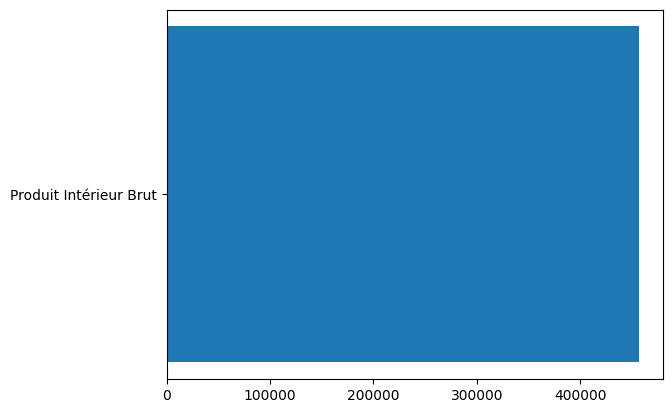

In [155]:
produit_counts = M_PIB["Produit"].value_counts()
plt.barh(produit_counts.index, produit_counts)
plt.show()

In [156]:
PIB_melted["Élément"].unique()

array(['Valeur en devise locale', 'Valeur US $',
       'Valeur US $ par habitant',
       'Valeur en devise locale, aux prix de 2015',
       'Valeur US $ par habitant, aux prix du 2015',
       'Valeur US $, aux prix du 2015',
       'Croissance annuelle en devise locale',
       'Croissance annuelle aux prix de 2015', 'Croissance annuelle US$',
       'Croissance annuelle US$ par habitant',
       'Croissance annuelle US $, aux prix de 2015',
       'Croissance annuelle US $ par habitant, aux prix de 2015',
       'Part du PIB US $', 'Part du PIB US$, aux prix de 2015',
       'Part du PIB en devise locale',
       'Part du PIB en devise locale, aux prix de 2015',
       'Ratio du valeur ajoutée (Agriculture, Sylviculture et Pêche) en devise locale',
       'Ratio du valeur ajoutée (Agriculture, Sylviculture et Pêche) US $',
       'Part du valeur ajoutée (industrie manufacturière) en devise locale',
       'Part du valeur ajoutée (industrie manufacturière) US $'],
      dtype=objec

In [157]:
# On va garder le PIB, 
# le PIB par habitant, 
# la croissance annuelle et 
# la croissance annuelle par habitant

desired_elements = [
    'Valeur US $',
    'Valeur US $ par habitant',
    'Croissance annuelle US$',
    'Croissance annuelle US$ par habitant'
]

PIB_2 = PIB_melted[PIB_melted["Élément"].isin(desired_elements)]


In [158]:
PIB_2

Unnamed: 0  Code zone Code zone (M49)                     Zone  \
1                 1          2            '004              Afghanistan   
2                 2          2            '004              Afghanistan   
8                 8          2            '004              Afghanistan   
9                 9          2            '004              Afghanistan   
13               13          2            '004              Afghanistan   
...             ...        ...             ...                      ...   
2633828       16558       5817            '902  Imp Nets Prod Alim Dvpm   
2633831       16561       5817            '902  Imp Nets Prod Alim Dvpm   
2633832       16562       5817            '902  Imp Nets Prod Alim Dvpm   
2633833       16563       5817            '902  Imp Nets Prod Alim Dvpm   
2633834       16564       5817            '902  Imp Nets Prod Alim Dvpm   

         Code Produit                                    Produit  \
1               22008                     Produit Intérieur Brut   
2               22008                     Produit Intérieur Brut   
8               22008                     Produit Intérieur Brut   
9               22008                     Produit Intérieur Brut   
13              22015            Formation brute de capital fixe   
...               ...                                        ...   
2633828         22075  Valeur ajoutée (Industrie manufacturière)   
2633831         22011                       Revenu national brut   
2633832         22011                       Revenu national brut   
2633833         22011                       Revenu national brut   
2633834         22011                       Revenu national brut   

         Code Élément                               Élément           Unité  \
1                6110                           Valeur US $  Millions d’USD   
2                6119              Valeur US $ par habitant             US$   
8                6129               Croissance annuelle US$               %   
9               61290  Croissance annuelle US$ par habitant               %   
13               6110                           Valeur US $  Millions d’USD   
...               ...                                   ...             ...   
2633828          6129               Croissance annuelle US$               %   
2633831          6110                           Valeur US $  Millions d’USD   
2633832          6119              Valeur US $ par habitant             US$   
2633833          6129               Croissance annuelle US$               %   
2633834         61290  Croissance annuelle US$ par habitant               %   

         Année       Valeur  
1         1970  1731.435587  
2         1970   161.019274  
8         1970            0  
9         1970            0  
13        1970    94.611818  
...        ...          ...  
2633828   2022            0  
2633831   2022            0  
2633832   2022            0  
2633833   2022            0  
2633834   2022            0  

[688311 rows x 11 columns]

In [159]:
# Transformation
PIB_2 = PIB_2[['Code zone', 'Code Élément', 'Élément', 'Année', 'Unité', 'Valeur']]
PIB_2.columns = ['Code Pays', 'Code Élément', 'Élément','Année', 'Unité', 'Valeur']

# Convert 'Année' column to numeric
PIB_2['Année'] = pd.to_numeric(PIB_2['Année'], errors='coerce')
PIB_2['Valeur'] = pd.to_numeric(PIB_2['Valeur'], errors='coerce')

PIB_2 = PIB_2[(PIB_2['Année'] >= 1999) & (PIB_2['Année'] <= 2022)]


# Print the transformed DataFrame
PIB_2


C:\Users\flore\AppData\Local\Temp\ipykernel_2748\582098612.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  PIB_2['Année'] = pd.to_numeric(PIB_2['Année'], errors='coerce')
C:\Users\flore\AppData\Local\Temp\ipykernel_2748\582098612.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  PIB_2['Valeur'] = pd.to_numeric(PIB_2['Valeur'], errors='coerce')


Code Pays  Code Élément                               Élément  Année  \
1441156          2          6110                           Valeur US $   1999   
1441157          2          6119              Valeur US $ par habitant   1999   
1441163          2          6129               Croissance annuelle US$   1999   
1441164          2         61290  Croissance annuelle US$ par habitant   1999   
1441168          2          6110                           Valeur US $   1999   
...            ...           ...                                   ...    ...   
2633828       5817          6129               Croissance annuelle US$   2022   
2633831       5817          6110                           Valeur US $   2022   
2633832       5817          6119              Valeur US $ par habitant   2022   
2633833       5817          6129               Croissance annuelle US$   2022   
2633834       5817         61290  Croissance annuelle US$ par habitant   2022   

                  Unité       Valeur  
1441156  Millions d’USD  2157.197316  
1441157             US$   111.987460  
1441163               %   -26.504435  
1441164               %   -29.441209  
1441168  Millions d’USD   265.877102  
...                 ...          ...  
2633828               %     0.000000  
2633831  Millions d’USD     0.000000  
2633832             US$     0.000000  
2633833               %     0.000000  
2633834               %     0.000000  

[311688 rows x 6 columns]

In [160]:
verifier_nan(PIB_2)

Nombre de Colonnes: 6
Nombre de Lignes: 311688
Nombre total de NaN: 91648


Présence de NaN  Nombre de NaN Type de Colonne
Code Pays               False              0           int64
Code Élément            False              0           int64
Élément                 False              0          object
Année                   False              0           int64
Unité                   False              0          object
Valeur                   True          91648         float64

In [161]:
# Pivot the DataFrame using mean as the aggregation function
PIB_pivot = PIB_2.pivot_table(values='Valeur', index=['Code Pays'], columns='Élément', aggfunc='mean')

# Reset the index
PIB_pivot.reset_index(inplace=True)
PIB_pivot


Élément  Code Pays  Croissance annuelle US$  \
0                1                 2.709919   
1                2                 3.951158   
2                3                 3.449810   
3                4                 2.940129   
4                6                 2.196038   
..             ...                      ...   
248           5801                 4.354075   
249           5802                 4.273334   
250           5803                 2.569728   
251           5815                 3.411736   
252           5817                 3.252429   

Élément  Croissance annuelle US$ par habitant    Valeur US $  \
0                                    5.472986    1122.636066   
1                                    2.386516    3064.281864   
2                                    4.800425    1558.065242   
3                                    2.352578   33447.639545   
4                                    1.447905     652.842259   
..                                        ...            ...   
248                                  3.003036  178869.128476   
249                                  3.132576  132926.895931   
250                                  2.247575  136367.417737   
251                                  2.046972  149216.688981   
252                                  2.222480  491720.546475   

Élément  Valeur US $ par habitant  
0                     1496.792431  
1                      195.297583  
2                     1789.905043  
3                     1785.429566  
4                    19342.573063  
..                            ...  
248                    370.543527  
249                    566.916038  
250                   4261.119735  
251                    351.797595  
252                    675.127984  

[253 rows x 5 columns]

In [162]:
PIB_pivot = PIB_pivot.rename(columns={"Croissance annuelle US$":"Moyenne des Croissances annuelles du PIB en US$ de 1999 à 2022",
                                     "Croissance annuelle US$ par habitant":"Moyenne des Croissances annuelles du PIB en US$ par hab de 1999 à 2022",
                                     "Valeur US $":"Moyenne du PIB en millions d'US $ de 1999 à 2022",
                                     "Valeur US $ par habitant":"Moyenne du PIB en US $ par habitant de 1999 à 2022"})

PIB_pivot

Élément  Code Pays  \
0                1   
1                2   
2                3   
3                4   
4                6   
..             ...   
248           5801   
249           5802   
250           5803   
251           5815   
252           5817   

Élément  Moyenne des Croissances annuelles du PIB en US$ de 1999 à 2022  \
0                                                 2.709919                
1                                                 3.951158                
2                                                 3.449810                
3                                                 2.940129                
4                                                 2.196038                
..                                                     ...                
248                                               4.354075                
249                                               4.273334                
250                                               2.569728                
251                                               3.411736                
252                                               3.252429                

Élément  Moyenne des Croissances annuelles du PIB en US$ par hab de 1999 à 2022  \
0                                                 5.472986                        
1                                                 2.386516                        
2                                                 4.800425                        
3                                                 2.352578                        
4                                                 1.447905                        
..                                                     ...                        
248                                               3.003036                        
249                                               3.132576                        
250                                               2.247575                        
251                                               2.046972                        
252                                               2.222480                        

Élément  Moyenne du PIB en millions d'US $ de 1999 à 2022  \
0                                             1122.636066   
1                                             3064.281864   
2                                             1558.065242   
3                                            33447.639545   
4                                              652.842259   
..                                                    ...   
248                                         178869.128476   
249                                         132926.895931   
250                                         136367.417737   
251                                         149216.688981   
252                                         491720.546475   

Élément  Moyenne du PIB en US $ par habitant de 1999 à 2022  
0                                              1496.792431   
1                                               195.297583   
2                                              1789.905043   
3                                              1785.429566   
4                                             19342.573063   
..                                                     ...   
248                                             370.543527   
249                                             566.916038   
250                                            4261.119735   
251                                             351.797595   
252                                             675.127984   

[253 rows x 5 columns]

In [163]:
verifier_nan(PIB_pivot)

Nombre de Colonnes: 5
Nombre de Lignes: 253
Nombre total de NaN: 4


Présence de NaN  \
Élément                                                               
Code Pays                                                     False   
Moyenne des Croissances annuelles du PIB en US$...            False   
Moyenne des Croissances annuelles du PIB en US$...             True   
Moyenne du PIB en millions d'US $ de 1999 à 2022              False   
Moyenne du PIB en US $ par habitant de 1999 à 2022             True   

                                                    Nombre de NaN  \
Élément                                                             
Code Pays                                                       0   
Moyenne des Croissances annuelles du PIB en US$...              0   
Moyenne des Croissances annuelles du PIB en US$...              2   
Moyenne du PIB en millions d'US $ de 1999 à 2022                0   
Moyenne du PIB en US $ par habitant de 1999 à 2022              2   

                                                   Type de Colonne  
Élément                                                             
Code Pays                                                    int64  
Moyenne des Croissances annuelles du PIB en US$...         float64  
Moyenne des Croissances annuelles du PIB en US$...         float64  
Moyenne du PIB en millions d'US $ de 1999 à 2022           float64  
Moyenne du PIB en US $ par habitant de 1999 à 2022         float64

In [164]:
PIB_pivot = PIB_pivot.fillna(0)

In [165]:
verifier_nan(PIB_pivot)

Nombre de Colonnes: 5
Nombre de Lignes: 253
Nombre total de NaN: 0


Présence de NaN  \
Élément                                                               
Code Pays                                                     False   
Moyenne des Croissances annuelles du PIB en US$...            False   
Moyenne des Croissances annuelles du PIB en US$...            False   
Moyenne du PIB en millions d'US $ de 1999 à 2022              False   
Moyenne du PIB en US $ par habitant de 1999 à 2022            False   

                                                    Nombre de NaN  \
Élément                                                             
Code Pays                                                       0   
Moyenne des Croissances annuelles du PIB en US$...              0   
Moyenne des Croissances annuelles du PIB en US$...              0   
Moyenne du PIB en millions d'US $ de 1999 à 2022                0   
Moyenne du PIB en US $ par habitant de 1999 à 2022              0   

                                                   Type de Colonne  
Élément                                                             
Code Pays                                                    int64  
Moyenne des Croissances annuelles du PIB en US$...         float64  
Moyenne des Croissances annuelles du PIB en US$...         float64  
Moyenne du PIB en millions d'US $ de 1999 à 2022           float64  
Moyenne du PIB en US $ par habitant de 1999 à 2022         float64

In [166]:
Mother_Table_Clean2 = pd.merge(Mother_Table_Clean,PIB_pivot,on="Code Pays",how='left')

Mother_Table_Clean2

Code Pays  Symbole Numérique Source de données  \
0          2.0                                    0   
1          2.0                                    0   
2        202.0                                    0   
3        202.0                                    0   
4          3.0                                    0   
..         ...                                  ...   
405      206.0                                    1   
406      277.0                                    0   
407      218.0                                    0   
408      219.0                                    0   
409      227.0                                    0   

     Moy Pop (hab) de 2000 à 2018  Taux Accroissement Population 2000_2018  \
0                    2.884577e+07                                     0.79   
1                    2.884577e+07                                     0.79   
2                    5.090147e+07                                     0.29   
3                    5.090147e+07                                     0.29   
4                    2.994856e+06                                    -0.08   
..                            ...                                      ...   
405                  3.914984e+07                                     0.35   
406                  1.063692e+07                                     0.09   
407                  1.257947e+03                                    -0.15   
408                  1.014705e+05                                     0.05   
409                  1.042532e+04                                     0.23   

     Symbole Numérique Origine  Alimentation pour touristes  \
0                          0.0                          0.0   
1                          1.0                          0.0   
2                          0.0                          0.0   
3                          1.0                          0.0   
4                          0.0                          0.0   
..                         ...                          ...   
405                        0.0                          0.0   
406                        0.0                          0.0   
407                        0.0                          0.0   
408                        0.0                          0.0   
409                        0.0                          0.0   

     Aliments pour animaux  Autres utilisations (non alimentaire)  \
0                    456.0                                   94.0   
1                    456.0                                   94.0   
2                   9371.0                                 1448.0   
3                   9371.0                                 1448.0   
4                    697.0                                  177.0   
..                     ...                                    ...   
405                    0.0                                    0.0   
406                    0.0                                    0.0   
407                    0.0                                    0.0   
408                    0.0                                    0.0   
409                    0.0                                    0.0   

     Disponibilité alimentaire (Kcal/personne/jour)  \
0                                            1997.0   
1                                            1997.0   
2                                            2987.0   
3                                            2987.0   
4                                            3400.0   
..                                              ...   
405                                             0.0   
406                                             0.0   
407                                             0.0   
408                                             0.0   
409                                             0.0   

     Disponibilité alimentaire en quantité (kg/personne/an)  ...  \
0                                               357.31       ...   
1                       

In [167]:
verifier_nan(Mother_Table_Clean2)

Nombre de Colonnes: 45
Nombre de Lignes: 410
Nombre total de NaN: 108


Présence de NaN  \
Code Pays                                                     False   
Symbole Numérique Source de données                           False   
Moy Pop (hab) de 2000 à 2018                                  False   
Taux Accroissement Population 2000_2018                       False   
Symbole Numérique Origine                                     False   
Alimentation pour touristes                                   False   
Aliments pour animaux                                         False   
Autres utilisations (non alimentaire)                         False   
Disponibilité alimentaire (Kcal/personne/jour)                False   
Disponibilité alimentaire en quantité (kg/perso...            False   
Disponibilité de matière grasse en quantité (g/...            False   
Disponibilité de protéines en quantité (g/perso...            False   
Disponibilité intérieure                                      False   
Exportations - Quantité                                       False   
Importations - Quantité                                       False   
Nourriture                                                    False   
Pertes                                                        False   
Production                                                    False   
Résidus                                                       False   
Semences                                                      False   
Traitement                                                    False   
Variation de stock                                            False   
Taux de dépendance aux importations                           False   
Poulet: Alimentation pour touristes                           False   
Poulet: Aliments pour animaux                                 False   
Poulet: Autres utilisations (non alimentaire)                 False   
Poulet: Disponibilité alimentaire (Kcal/personn...            False   
Poulet: Disponibilité alimentaire en quantité (...            False   
Poulet: Disponibilité de matière grasse en quan...            False   
Poulet: Disponibilité de protéines en quantité ...            False   
Poulet: Disponibilité intérieure                              False   
Poulet: Exportations - Quantité                               False   
Poulet: Importations - Quantité                               False   
Poulet: Nourriture                                            False   
Poulet: Pertes                                                False   
Poulet: Production                                            False   
Poulet: Résidus                                               False   
Poulet: Semences                                              False   
Poulet: Traitement                                            False   
Poulet: Variation de stock                                    False   
Poulet: Taux de dépendance aux importations                   False   
Moyenne des Croissances annuelles du PIB en US$...             True   
Moyenne des Croissances annuelles du PIB en US$...             True   
Moyenne du PIB en millions d'US $ de 1999 à 2022               True   
Moyenne du PIB en US $ par habitant de 1999 à 2022             True   

                                                    Nombre de NaN  \
Code Pays                                                       0   
Symbole Numérique Source de données                             0   
Moy Pop (hab) de 2000 à 2018                                    0   
Taux Accroissement Population 2000_2018                         0   
Symbole Numérique Origine                                       0   
Alimentation pour touristes                                     0   
Aliments pour animaux                                           0   
Autres utilisations (non alimentaire)                           0   
Disponibilité alimentaire (Kcal/personne/jour)                  0   
Disponibilité alimentaire en quantité (kg/perso...              0   
Disponibilité de matière g

In [168]:
Mother_Table_Clean2 = Mother_Table_Clean2.fillna(0)
Mother_Table_Clean2

Code Pays  Symbole Numérique Source de données  \
0          2.0                                    0   
1          2.0                                    0   
2        202.0                                    0   
3        202.0                                    0   
4          3.0                                    0   
..         ...                                  ...   
405      206.0                                    1   
406      277.0                                    0   
407      218.0                                    0   
408      219.0                                    0   
409      227.0                                    0   

     Moy Pop (hab) de 2000 à 2018  Taux Accroissement Population 2000_2018  \
0                    2.884577e+07                                     0.79   
1                    2.884577e+07                                     0.79   
2                    5.090147e+07                                     0.29   
3                    5.090147e+07                                     0.29   
4                    2.994856e+06                                    -0.08   
..                            ...                                      ...   
405                  3.914984e+07                                     0.35   
406                  1.063692e+07                                     0.09   
407                  1.257947e+03                                    -0.15   
408                  1.014705e+05                                     0.05   
409                  1.042532e+04                                     0.23   

     Symbole Numérique Origine  Alimentation pour touristes  \
0                          0.0                          0.0   
1                          1.0                          0.0   
2                          0.0                          0.0   
3                          1.0                          0.0   
4                          0.0                          0.0   
..                         ...                          ...   
405                        0.0                          0.0   
406                        0.0                          0.0   
407                        0.0                          0.0   
408                        0.0                          0.0   
409                        0.0                          0.0   

     Aliments pour animaux  Autres utilisations (non alimentaire)  \
0                    456.0                                   94.0   
1                    456.0                                   94.0   
2                   9371.0                                 1448.0   
3                   9371.0                                 1448.0   
4                    697.0                                  177.0   
..                     ...                                    ...   
405                    0.0                                    0.0   
406                    0.0                                    0.0   
407                    0.0                                    0.0   
408                    0.0                                    0.0   
409                    0.0                                    0.0   

     Disponibilité alimentaire (Kcal/personne/jour)  \
0                                            1997.0   
1                                            1997.0   
2                                            2987.0   
3                                            2987.0   
4                                            3400.0   
..                                              ...   
405                                             0.0   
406                                             0.0   
407                                             0.0   
408                                             0.0   
409                                             0.0   

     Disponibilité alimentaire en quantité (kg/personne/an)  ...  \
0                                               357.31       ...   
1                       

In [169]:
verifier_nan(Mother_Table_Clean2)

Nombre de Colonnes: 45
Nombre de Lignes: 410
Nombre total de NaN: 0


Présence de NaN  \
Code Pays                                                     False   
Symbole Numérique Source de données                           False   
Moy Pop (hab) de 2000 à 2018                                  False   
Taux Accroissement Population 2000_2018                       False   
Symbole Numérique Origine                                     False   
Alimentation pour touristes                                   False   
Aliments pour animaux                                         False   
Autres utilisations (non alimentaire)                         False   
Disponibilité alimentaire (Kcal/personne/jour)                False   
Disponibilité alimentaire en quantité (kg/perso...            False   
Disponibilité de matière grasse en quantité (g/...            False   
Disponibilité de protéines en quantité (g/perso...            False   
Disponibilité intérieure                                      False   
Exportations - Quantité                                       False   
Importations - Quantité                                       False   
Nourriture                                                    False   
Pertes                                                        False   
Production                                                    False   
Résidus                                                       False   
Semences                                                      False   
Traitement                                                    False   
Variation de stock                                            False   
Taux de dépendance aux importations                           False   
Poulet: Alimentation pour touristes                           False   
Poulet: Aliments pour animaux                                 False   
Poulet: Autres utilisations (non alimentaire)                 False   
Poulet: Disponibilité alimentaire (Kcal/personn...            False   
Poulet: Disponibilité alimentaire en quantité (...            False   
Poulet: Disponibilité de matière grasse en quan...            False   
Poulet: Disponibilité de protéines en quantité ...            False   
Poulet: Disponibilité intérieure                              False   
Poulet: Exportations - Quantité                               False   
Poulet: Importations - Quantité                               False   
Poulet: Nourriture                                            False   
Poulet: Pertes                                                False   
Poulet: Production                                            False   
Poulet: Résidus                                               False   
Poulet: Semences                                              False   
Poulet: Traitement                                            False   
Poulet: Variation de stock                                    False   
Poulet: Taux de dépendance aux importations                   False   
Moyenne des Croissances annuelles du PIB en US$...            False   
Moyenne des Croissances annuelles du PIB en US$...            False   
Moyenne du PIB en millions d'US $ de 1999 à 2022              False   
Moyenne du PIB en US $ par habitant de 1999 à 2022            False   

                                                    Nombre de NaN  \
Code Pays                                                       0   
Symbole Numérique Source de données                             0   
Moy Pop (hab) de 2000 à 2018                                    0   
Taux Accroissement Population 2000_2018                         0   
Symbole Numérique Origine                                       0   
Alimentation pour touristes                                     0   
Aliments pour animaux                                           0   
Autres utilisations (non alimentaire)                           0   
Disponibilité alimentaire (Kcal/personne/jour)                  0   
Disponibilité alimentaire en quantité (kg/perso...              0   
Disponibilité de matière g

## L'indicateur de stabilité du Pays 

In [170]:
# On va reprendre les données du projet précédent

Political_Stability = pd.read_csv("H:\Mon Drive\Data_Analyst_Florentin_Marrouard\Projet 9   Produisez une étude de marché avec R ou Python\BDD\PoliticalStability.csv", sep = ',')
Political_Stability = Political_Stability.rename(columns={"Country":"Pays"})

Political_Stability

Pays  Year  Political_Stability Granularity
0     Afghanistan  2000                -2.44       Total
1     Afghanistan  2002                -2.04       Total
2     Afghanistan  2003                -2.20       Total
3     Afghanistan  2004                -2.30       Total
4     Afghanistan  2005                -2.07       Total
...           ...   ...                  ...         ...
3521     Zimbabwe  2014                -0.71       Total
3522     Zimbabwe  2015                -0.62       Total
3523     Zimbabwe  2016                -0.62       Total
3524     Zimbabwe  2017                -0.71       Total
3525     Zimbabwe  2018                -0.71       Total

[3526 rows x 4 columns]

In [171]:
# Convert 'Year' column to numeric
Political_Stability['Year'] = pd.to_numeric(Political_Stability['Year'], errors='coerce')

# Calculate the average political stability for each country
average_stability = Political_Stability.groupby('Pays')['Political_Stability'].mean().reset_index().round(2)

# Rename the column
average_stability.columns = ['Pays', 'Moy_Political_Stability_2000_2018']

# Print the resulting DataFrame
average_stability


Pays  Moy_Political_Stability_2000_2018
0                           Afghanistan                              -2.46
1                               Albania                              -0.08
2                               Algeria                              -1.22
3                        American Samoa                               0.98
4                               Andorra                               1.34
..                                  ...                                ...
195  Venezuela (Bolivarian Republic of)                              -1.17
196                            Viet Nam                               0.24
197                               Yemen                              -2.11
198                              Zambia                               0.27
199                            Zimbabwe                              -0.98

[200 rows x 2 columns]

In [172]:
verifier_nan(average_stability)

Nombre de Colonnes: 2
Nombre de Lignes: 200
Nombre total de NaN: 0


Présence de NaN  Nombre de NaN  \
Pays                                         False              0   
Moy_Political_Stability_2000_2018            False              0   

                                  Type de Colonne  
Pays                                       object  
Moy_Political_Stability_2000_2018         float64

## Insécurité alimentaire

In [173]:
# On va reprendredes données du site de la Fao

Insecu_alim = pd.read_csv("H:\Mon Drive\Data_Analyst_Florentin_Marrouard\Projet 9   Produisez une étude de marché avec R ou Python\BDD\securite_alim.csv", sep = ',')

Insecu_alim.head(5)

Code Domaine                             Domaine  Code zone (M49)  \
0           FS  Données de la sécurité alimentaire              528   
1           FS  Données de la sécurité alimentaire              528   
2           FS  Données de la sécurité alimentaire              528   
3           FS  Données de la sécurité alimentaire              528   
4           FS  Données de la sécurité alimentaire              528   

                     Zone  Code Élément Élément  Code Produit  \
0  Pays-Bas (Royaume des)          6121  Valeur        210041   
1  Pays-Bas (Royaume des)          6121  Valeur        210041   
2  Pays-Bas (Royaume des)          6121  Valeur        210041   
3  Pays-Bas (Royaume des)          6121  Valeur        210041   
4  Pays-Bas (Royaume des)          6121  Valeur        210041   

                                             Produit  Code année      Année  \
0  Prévalence de la sous-alimentation (%) (moyenn...    20002002  2000-2002   
1  Prévalence de la sous-alimentation (%) (moyenn...    20012003  2001-2003   
2  Prévalence de la sous-alimentation (%) (moyenn...    20022004  2002-2004   
3  Prévalence de la sous-alimentation (%) (moyenn...    20032005  2003-2005   
4  Prévalence de la sous-alimentation (%) (moyenn...    20042006  2004-2006   

  Unité Valeur Symbole Description du Symbole  Note  
0     %   <2.5       E         Valeur estimée   NaN  
1     %   <2.5       E         Valeur estimée   NaN  
2     %   <2.5       E         Valeur estimée   NaN  
3     %   <2.5       E         Valeur estimée   NaN  
4     %   <2.5       E         Valeur estimée   NaN

In [174]:
Insecu_alim["Année"].unique()

array(['2000-2002', '2001-2003', '2002-2004', '2003-2005', '2004-2006',
       '2005-2007', '2006-2008', '2007-2009', '2008-2010', '2009-2011',
       '2010-2012', '2011-2013', '2012-2014', '2013-2015', '2014-2016',
       '2015-2017', '2016-2018', '2017-2019', '2018-2020', '2019-2021',
       '2020-2022'], dtype=object)

In [175]:
verifier_nan(Insecu_alim)

Nombre de Colonnes: 15
Nombre de Lignes: 4284
Nombre total de NaN: 4966


Présence de NaN  Nombre de NaN Type de Colonne
Code Domaine                      False              0          object
Domaine                           False              0          object
Code zone (M49)                   False              0           int64
Zone                              False              0          object
Code Élément                      False              0           int64
Élément                           False              0          object
Code Produit                      False              0           int64
Produit                           False              0          object
Code année                        False              0           int64
Année                             False              0          object
Unité                             False              0          object
Valeur                             True            682          object
Symbole                           False              0          object
Description du Symbole            False              0          object
Note                               True           4284         float64

In [176]:
Insecu_alim = Insecu_alim.fillna(0)

In [177]:
Insecu_alim["Valeur"].unique()

array(['<2.5', '46.4', '44.1', '39', '36.3', '34.5', '31.9', '28.6',
       '25.4', '22.2', '20.5', '19.7', '21', '20.8', '20.7', '21.3',
       '21.8', '22.7', '24', '26.9', '28.8', '30.1', '3.8', '3.7', '3.6',
       '3.4', '3.5', '4.1', '4.7', '5.1', '5.2', '5.5', '6.3', '6.5',
       '6.2', '5.7', '6.1', '6.9', '7.9', '4.9', '6', '7.4', '8.6', '8.9',
       '8.8', '8.3', '5.4', '4.8', '4.5', '4.4', '4.3', '4.2', '8.1', '7',
       '6.7', '6.4', '5.9', '5.6', '3.1', '2.9', '2.7', '2.6', 0, '67.8',
       '63.5', '59.1', '55.4', '52.6', '49.8', '46.7', '43.6', '32.6',
       '22.6', '14.2', '13.3', '12.7', '12.5', '13.5', '14.4', '14.7',
       '15.2', '17.5', '20.1', '21.6', '5.8', '7.1', '7.7', '4.6', '3.9',
       '3.3', '3', '3.2', '25.7', '24.2', '15.8', '12.3', '9.4', '2.8',
       '16.8', '10.3', '7.3', '15.6', '14.8', '13.9', '13.7', '13.2',
       '12.9', '16.1', '14.3', '13.6', '11.8', '11.7', '11.2', '2.5',
       '6.6', '6.8', '5.3', '17.3', '12', '11', '10.1', '9.1', '8.

In [178]:
# Remplacez les valeurs '<2.5' par 1.25
Insecu_alim['Valeur'] = Insecu_alim['Valeur'].replace('<2.5', 1.25)

In [179]:
Insecu_alim['Valeur'] = Insecu_alim["Valeur"].astype(float)
Insecu_alim['Valeur']

0        1.25
1        1.25
2        1.25
3        1.25
4        1.25
        ...  
4279    36.30
4280    38.20
4281    38.90
4282    39.10
4283    38.40
Name: Valeur, Length: 4284, dtype: float64

In [180]:
# Groupby par pays et calcul de la moyenne de la prévalence de la sous-alimentation
Insecu_alim_2 = Insecu_alim.groupby('Zone')['Valeur'].mean().reset_index().round(2).rename(columns={'Valeur': '%_Sous_Alimentation_dans_la_Population_2000_2022','Zone': 'Pays'})
Insecu_alim_2

Pays  %_Sous_Alimentation_dans_la_Population_2000_2022
0              Afghanistan                                             27.94
1           Afrique du Sud                                              4.98
2                  Albanie                                              5.67
3                  Algérie                                              4.22
4                Allemagne                                              1.25
..                     ...                                               ...
199  États-Unis d'Amérique                                              1.25
200               Éthiopie                                             26.91
201              Îles Cook                                              0.00
202          Îles Marshall                                              0.00
203           Îles Salomon                                             16.67

[204 rows x 2 columns]

## e) Retour d'expériences sur l'ACP <a class="anchor" id="chapter4e"></a>

Avec le lancement du code et la lecture des cercles de corrélation certaines variables ne sont pas si intéressantes que cela, je décide donc d'en enlever pour me que l'ACP soit plus facilement interprétable

Je décide de remettre la variable Pays pour afficher les individus pour les graphiques

In [181]:
Mother_Table_Clean3 = pd.merge(Mother_Table_Clean2,Mother_Table[["Pays","Code Pays"]], on="Code Pays", how = 'left')

Mother_Table_Clean3

Code Pays  Symbole Numérique Source de données  \
0         2.0                                    0   
1         2.0                                    0   
2         2.0                                    0   
3         2.0                                    0   
4       202.0                                    0   
..        ...                                  ...   
749     206.0                                    1   
750     277.0                                    0   
751     218.0                                    0   
752     219.0                                    0   
753     227.0                                    0   

     Moy Pop (hab) de 2000 à 2018  Taux Accroissement Population 2000_2018  \
0                    2.884577e+07                                     0.79   
1                    2.884577e+07                                     0.79   
2                    2.884577e+07                                     0.79   
3                    2.884577e+07                                     0.79   
4                    5.090147e+07                                     0.29   
..                            ...                                      ...   
749                  3.914984e+07                                     0.35   
750                  1.063692e+07                                     0.09   
751                  1.257947e+03                                    -0.15   
752                  1.014705e+05                                     0.05   
753                  1.042532e+04                                     0.23   

     Symbole Numérique Origine  Alimentation pour touristes  \
0                          0.0                          0.0   
1                          0.0                          0.0   
2                          1.0                          0.0   
3                          1.0                          0.0   
4                          0.0                          0.0   
..                         ...                          ...   
749                        0.0                          0.0   
750                        0.0                          0.0   
751                        0.0                          0.0   
752                        0.0                          0.0   
753                        0.0                          0.0   

     Aliments pour animaux  Autres utilisations (non alimentaire)  \
0                    456.0                                   94.0   
1                    456.0                                   94.0   
2                    456.0                                   94.0   
3                    456.0                                   94.0   
4                   9371.0                                 1448.0   
..                     ...                                    ...   
749                    0.0                                    0.0   
750                    0.0                                    0.0   
751                    0.0                                    0.0   
752                    0.0                                    0.0   
753                    0.0                                    0.0   

     Disponibilité alimentaire (Kcal/personne/jour)  \
0                                            1997.0   
1                                            1997.0   
2                                            1997.0   
3                                            1997.0   
4                                            2987.0   
..                                              ...   
749                                             0.0   
750                                             0.0   
751                                             0.0   
752                                             0.0   
753                                             0.0   

     Disponibilité alimentaire en quantité (kg/personne/an)  ...  \
0                                               357.31       ...   
1                                  

In [182]:
verifier_nan(Mother_Table_Clean3)

Nombre de Colonnes: 46
Nombre de Lignes: 754
Nombre total de NaN: 0


Présence de NaN  \
Code Pays                                                     False   
Symbole Numérique Source de données                           False   
Moy Pop (hab) de 2000 à 2018                                  False   
Taux Accroissement Population 2000_2018                       False   
Symbole Numérique Origine                                     False   
Alimentation pour touristes                                   False   
Aliments pour animaux                                         False   
Autres utilisations (non alimentaire)                         False   
Disponibilité alimentaire (Kcal/personne/jour)                False   
Disponibilité alimentaire en quantité (kg/perso...            False   
Disponibilité de matière grasse en quantité (g/...            False   
Disponibilité de protéines en quantité (g/perso...            False   
Disponibilité intérieure                                      False   
Exportations - Quantité                                       False   
Importations - Quantité                                       False   
Nourriture                                                    False   
Pertes                                                        False   
Production                                                    False   
Résidus                                                       False   
Semences                                                      False   
Traitement                                                    False   
Variation de stock                                            False   
Taux de dépendance aux importations                           False   
Poulet: Alimentation pour touristes                           False   
Poulet: Aliments pour animaux                                 False   
Poulet: Autres utilisations (non alimentaire)                 False   
Poulet: Disponibilité alimentaire (Kcal/personn...            False   
Poulet: Disponibilité alimentaire en quantité (...            False   
Poulet: Disponibilité de matière grasse en quan...            False   
Poulet: Disponibilité de protéines en quantité ...            False   
Poulet: Disponibilité intérieure                              False   
Poulet: Exportations - Quantité                               False   
Poulet: Importations - Quantité                               False   
Poulet: Nourriture                                            False   
Poulet: Pertes                                                False   
Poulet: Production                                            False   
Poulet: Résidus                                               False   
Poulet: Semences                                              False   
Poulet: Traitement                                            False   
Poulet: Variation de stock                                    False   
Poulet: Taux de dépendance aux importations                   False   
Moyenne des Croissances annuelles du PIB en US$...            False   
Moyenne des Croissances annuelles du PIB en US$...            False   
Moyenne du PIB en millions d'US $ de 1999 à 2022              False   
Moyenne du PIB en US $ par habitant de 1999 à 2022            False   
Pays                                                          False   

                                                    Nombre de NaN  \
Code Pays                                                       0   
Symbole Numérique Source de données                             0   
Moy Pop (hab) de 2000 à 2018                                    0   
Taux Accroissement Population 2000_2018                         0   
Symbole Numérique Origine                                       0   
Alimentation pour touristes                                     0   
Aliments pour animaux                                           0   
Autres utilisations (non alimentaire)                           0   
Disponibilité alimentaire (Kcal/personne/jour)                  0   
Disponibilité alimentair

Je rajoute la variable de stabilité des pays

In [183]:
Mother_Table_Clean4 = pd.merge(Mother_Table_Clean3,average_stability, on="Pays", how = 'left')

Mother_Table_Clean4

Code Pays  Symbole Numérique Source de données  \
0         2.0                                    0   
1         2.0                                    0   
2         2.0                                    0   
3         2.0                                    0   
4       202.0                                    0   
..        ...                                  ...   
749     206.0                                    1   
750     277.0                                    0   
751     218.0                                    0   
752     219.0                                    0   
753     227.0                                    0   

     Moy Pop (hab) de 2000 à 2018  Taux Accroissement Population 2000_2018  \
0                    2.884577e+07                                     0.79   
1                    2.884577e+07                                     0.79   
2                    2.884577e+07                                     0.79   
3                    2.884577e+07                                     0.79   
4                    5.090147e+07                                     0.29   
..                            ...                                      ...   
749                  3.914984e+07                                     0.35   
750                  1.063692e+07                                     0.09   
751                  1.257947e+03                                    -0.15   
752                  1.014705e+05                                     0.05   
753                  1.042532e+04                                     0.23   

     Symbole Numérique Origine  Alimentation pour touristes  \
0                          0.0                          0.0   
1                          0.0                          0.0   
2                          1.0                          0.0   
3                          1.0                          0.0   
4                          0.0                          0.0   
..                         ...                          ...   
749                        0.0                          0.0   
750                        0.0                          0.0   
751                        0.0                          0.0   
752                        0.0                          0.0   
753                        0.0                          0.0   

     Aliments pour animaux  Autres utilisations (non alimentaire)  \
0                    456.0                                   94.0   
1                    456.0                                   94.0   
2                    456.0                                   94.0   
3                    456.0                                   94.0   
4                   9371.0                                 1448.0   
..                     ...                                    ...   
749                    0.0                                    0.0   
750                    0.0                                    0.0   
751                    0.0                                    0.0   
752                    0.0                                    0.0   
753                    0.0                                    0.0   

     Disponibilité alimentaire (Kcal/personne/jour)  \
0                                            1997.0   
1                                            1997.0   
2                                            1997.0   
3                                            1997.0   
4                                            2987.0   
..                                              ...   
749                                             0.0   
750                                             0.0   
751                                             0.0   
752                                             0.0   
753                                             0.0   

     Disponibilité alimentaire en quantité (kg/personne/an)  ...  \
0                                               357.31       ...   
1                                  

In [184]:
verifier_nan(Mother_Table_Clean4)

Nombre de Colonnes: 47
Nombre de Lignes: 754
Nombre total de NaN: 531


Présence de NaN  \
Code Pays                                                     False   
Symbole Numérique Source de données                           False   
Moy Pop (hab) de 2000 à 2018                                  False   
Taux Accroissement Population 2000_2018                       False   
Symbole Numérique Origine                                     False   
Alimentation pour touristes                                   False   
Aliments pour animaux                                         False   
Autres utilisations (non alimentaire)                         False   
Disponibilité alimentaire (Kcal/personne/jour)                False   
Disponibilité alimentaire en quantité (kg/perso...            False   
Disponibilité de matière grasse en quantité (g/...            False   
Disponibilité de protéines en quantité (g/perso...            False   
Disponibilité intérieure                                      False   
Exportations - Quantité                                       False   
Importations - Quantité                                       False   
Nourriture                                                    False   
Pertes                                                        False   
Production                                                    False   
Résidus                                                       False   
Semences                                                      False   
Traitement                                                    False   
Variation de stock                                            False   
Taux de dépendance aux importations                           False   
Poulet: Alimentation pour touristes                           False   
Poulet: Aliments pour animaux                                 False   
Poulet: Autres utilisations (non alimentaire)                 False   
Poulet: Disponibilité alimentaire (Kcal/personn...            False   
Poulet: Disponibilité alimentaire en quantité (...            False   
Poulet: Disponibilité de matière grasse en quan...            False   
Poulet: Disponibilité de protéines en quantité ...            False   
Poulet: Disponibilité intérieure                              False   
Poulet: Exportations - Quantité                               False   
Poulet: Importations - Quantité                               False   
Poulet: Nourriture                                            False   
Poulet: Pertes                                                False   
Poulet: Production                                            False   
Poulet: Résidus                                               False   
Poulet: Semences                                              False   
Poulet: Traitement                                            False   
Poulet: Variation de stock                                    False   
Poulet: Taux de dépendance aux importations                   False   
Moyenne des Croissances annuelles du PIB en US$...            False   
Moyenne des Croissances annuelles du PIB en US$...            False   
Moyenne du PIB en millions d'US $ de 1999 à 2022              False   
Moyenne du PIB en US $ par habitant de 1999 à 2022            False   
Pays                                                          False   
Moy_Political_Stability_2000_2018                              True   

                                                    Nombre de NaN  \
Code Pays                                                       0   
Symbole Numérique Source de données                             0   
Moy Pop (hab) de 2000 à 2018                                    0   
Taux Accroissement Population 2000_2018                         0   
Symbole Numérique Origine                                       0   
Alimentation pour touristes                                     0   
Aliments pour animaux                                           0   
Autres utilisations (non alimentaire)                           0   
Disponibilité alimenta

In [185]:
# Je remplacerai les Nan par 0 juste après ce qui est assez neutre plutôt que de remplacer par la moyenne

# Je n'ai pas besoin des lignes dupliquées puis que j'en ai pour une ligne 1 pays

Mother_Table_Clean4 = Mother_Table_Clean4.drop_duplicates()

Mother_Table_Clean4 = Mother_Table_Clean4.fillna(0)

verifier_nan(Mother_Table_Clean4)

Nombre de Colonnes: 47
Nombre de Lignes: 410
Nombre total de NaN: 0


Présence de NaN  \
Code Pays                                                     False   
Symbole Numérique Source de données                           False   
Moy Pop (hab) de 2000 à 2018                                  False   
Taux Accroissement Population 2000_2018                       False   
Symbole Numérique Origine                                     False   
Alimentation pour touristes                                   False   
Aliments pour animaux                                         False   
Autres utilisations (non alimentaire)                         False   
Disponibilité alimentaire (Kcal/personne/jour)                False   
Disponibilité alimentaire en quantité (kg/perso...            False   
Disponibilité de matière grasse en quantité (g/...            False   
Disponibilité de protéines en quantité (g/perso...            False   
Disponibilité intérieure                                      False   
Exportations - Quantité                                       False   
Importations - Quantité                                       False   
Nourriture                                                    False   
Pertes                                                        False   
Production                                                    False   
Résidus                                                       False   
Semences                                                      False   
Traitement                                                    False   
Variation de stock                                            False   
Taux de dépendance aux importations                           False   
Poulet: Alimentation pour touristes                           False   
Poulet: Aliments pour animaux                                 False   
Poulet: Autres utilisations (non alimentaire)                 False   
Poulet: Disponibilité alimentaire (Kcal/personn...            False   
Poulet: Disponibilité alimentaire en quantité (...            False   
Poulet: Disponibilité de matière grasse en quan...            False   
Poulet: Disponibilité de protéines en quantité ...            False   
Poulet: Disponibilité intérieure                              False   
Poulet: Exportations - Quantité                               False   
Poulet: Importations - Quantité                               False   
Poulet: Nourriture                                            False   
Poulet: Pertes                                                False   
Poulet: Production                                            False   
Poulet: Résidus                                               False   
Poulet: Semences                                              False   
Poulet: Traitement                                            False   
Poulet: Variation de stock                                    False   
Poulet: Taux de dépendance aux importations                   False   
Moyenne des Croissances annuelles du PIB en US$...            False   
Moyenne des Croissances annuelles du PIB en US$...            False   
Moyenne du PIB en millions d'US $ de 1999 à 2022              False   
Moyenne du PIB en US $ par habitant de 1999 à 2022            False   
Pays                                                          False   
Moy_Political_Stability_2000_2018                             False   

                                                    Nombre de NaN  \
Code Pays                                                       0   
Symbole Numérique Source de données                             0   
Moy Pop (hab) de 2000 à 2018                                    0   
Taux Accroissement Population 2000_2018                         0   
Symbole Numérique Origine                                       0   
Alimentation pour touristes                                     0   
Aliments pour animaux                                           0   
Autres utilisations (non alimentaire)                           0   
Disponibilité alimenta

Je rajoute l'indicateur d'insécurité alimentaire

In [186]:
Mother_Table_Clean5 = pd.merge(Mother_Table_Clean4,Insecu_alim_2, on="Pays", how = 'left')

Mother_Table_Clean5

Code Pays  Symbole Numérique Source de données  \
0          2.0                                    0   
1          2.0                                    0   
2        202.0                                    0   
3        202.0                                    0   
4          3.0                                    0   
..         ...                                  ...   
405      206.0                                    1   
406      277.0                                    0   
407      218.0                                    0   
408      219.0                                    0   
409      227.0                                    0   

     Moy Pop (hab) de 2000 à 2018  Taux Accroissement Population 2000_2018  \
0                    2.884577e+07                                     0.79   
1                    2.884577e+07                                     0.79   
2                    5.090147e+07                                     0.29   
3                    5.090147e+07                                     0.29   
4                    2.994856e+06                                    -0.08   
..                            ...                                      ...   
405                  3.914984e+07                                     0.35   
406                  1.063692e+07                                     0.09   
407                  1.257947e+03                                    -0.15   
408                  1.014705e+05                                     0.05   
409                  1.042532e+04                                     0.23   

     Symbole Numérique Origine  Alimentation pour touristes  \
0                          0.0                          0.0   
1                          1.0                          0.0   
2                          0.0                          0.0   
3                          1.0                          0.0   
4                          0.0                          0.0   
..                         ...                          ...   
405                        0.0                          0.0   
406                        0.0                          0.0   
407                        0.0                          0.0   
408                        0.0                          0.0   
409                        0.0                          0.0   

     Aliments pour animaux  Autres utilisations (non alimentaire)  \
0                    456.0                                   94.0   
1                    456.0                                   94.0   
2                   9371.0                                 1448.0   
3                   9371.0                                 1448.0   
4                    697.0                                  177.0   
..                     ...                                    ...   
405                    0.0                                    0.0   
406                    0.0                                    0.0   
407                    0.0                                    0.0   
408                    0.0                                    0.0   
409                    0.0                                    0.0   

     Disponibilité alimentaire (Kcal/personne/jour)  \
0                                            1997.0   
1                                            1997.0   
2                                            2987.0   
3                                            2987.0   
4                                            3400.0   
..                                              ...   
405                                             0.0   
406                                             0.0   
407                                             0.0   
408                                             0.0   
409                                             0.0   

     Disponibilité alimentaire en quantité (kg/personne/an)  ...  \
0                                               357.31       ...   
1                       

In [187]:
verifier_nan(Mother_Table_Clean5)

Nombre de Colonnes: 48
Nombre de Lignes: 410
Nombre total de NaN: 37


Présence de NaN  \
Code Pays                                                     False   
Symbole Numérique Source de données                           False   
Moy Pop (hab) de 2000 à 2018                                  False   
Taux Accroissement Population 2000_2018                       False   
Symbole Numérique Origine                                     False   
Alimentation pour touristes                                   False   
Aliments pour animaux                                         False   
Autres utilisations (non alimentaire)                         False   
Disponibilité alimentaire (Kcal/personne/jour)                False   
Disponibilité alimentaire en quantité (kg/perso...            False   
Disponibilité de matière grasse en quantité (g/...            False   
Disponibilité de protéines en quantité (g/perso...            False   
Disponibilité intérieure                                      False   
Exportations - Quantité                                       False   
Importations - Quantité                                       False   
Nourriture                                                    False   
Pertes                                                        False   
Production                                                    False   
Résidus                                                       False   
Semences                                                      False   
Traitement                                                    False   
Variation de stock                                            False   
Taux de dépendance aux importations                           False   
Poulet: Alimentation pour touristes                           False   
Poulet: Aliments pour animaux                                 False   
Poulet: Autres utilisations (non alimentaire)                 False   
Poulet: Disponibilité alimentaire (Kcal/personn...            False   
Poulet: Disponibilité alimentaire en quantité (...            False   
Poulet: Disponibilité de matière grasse en quan...            False   
Poulet: Disponibilité de protéines en quantité ...            False   
Poulet: Disponibilité intérieure                              False   
Poulet: Exportations - Quantité                               False   
Poulet: Importations - Quantité                               False   
Poulet: Nourriture                                            False   
Poulet: Pertes                                                False   
Poulet: Production                                            False   
Poulet: Résidus                                               False   
Poulet: Semences                                              False   
Poulet: Traitement                                            False   
Poulet: Variation de stock                                    False   
Poulet: Taux de dépendance aux importations                   False   
Moyenne des Croissances annuelles du PIB en US$...            False   
Moyenne des Croissances annuelles du PIB en US$...            False   
Moyenne du PIB en millions d'US $ de 1999 à 2022              False   
Moyenne du PIB en US $ par habitant de 1999 à 2022            False   
Pays                                                          False   
Moy_Political_Stability_2000_2018                             False   
%_Sous_Alimentation_dans_la_Population_2000_2022               True   

                                                    Nombre de NaN  \
Code Pays                                                       0   
Symbole Numérique Source de données                             0   
Moy Pop (hab) de 2000 à 2018                                    0   
Taux Accroissement Population 2000_2018                         0   
Symbole Numérique Origine                                       0   
Alimentation pour touristes                                     0   
Aliments pour animaux                                           0   
Autres utilisations 

In [188]:
# Ici je remplace par la moyenne car 0 veut dire qu'il y a 0 % en sous nutrition 

Mother_Table_Clean6 = Mother_Table_Clean5.fillna(Mother_Table_Clean5.mean())

Mother_Table_Clean6

C:\Users\flore\AppData\Local\Temp\ipykernel_2748\1914021021.py:3: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  Mother_Table_Clean6 = Mother_Table_Clean5.fillna(Mother_Table_Clean5.mean())


Code Pays  Symbole Numérique Source de données  \
0          2.0                                    0   
1          2.0                                    0   
2        202.0                                    0   
3        202.0                                    0   
4          3.0                                    0   
..         ...                                  ...   
405      206.0                                    1   
406      277.0                                    0   
407      218.0                                    0   
408      219.0                                    0   
409      227.0                                    0   

     Moy Pop (hab) de 2000 à 2018  Taux Accroissement Population 2000_2018  \
0                    2.884577e+07                                     0.79   
1                    2.884577e+07                                     0.79   
2                    5.090147e+07                                     0.29   
3                    5.090147e+07                                     0.29   
4                    2.994856e+06                                    -0.08   
..                            ...                                      ...   
405                  3.914984e+07                                     0.35   
406                  1.063692e+07                                     0.09   
407                  1.257947e+03                                    -0.15   
408                  1.014705e+05                                     0.05   
409                  1.042532e+04                                     0.23   

     Symbole Numérique Origine  Alimentation pour touristes  \
0                          0.0                          0.0   
1                          1.0                          0.0   
2                          0.0                          0.0   
3                          1.0                          0.0   
4                          0.0                          0.0   
..                         ...                          ...   
405                        0.0                          0.0   
406                        0.0                          0.0   
407                        0.0                          0.0   
408                        0.0                          0.0   
409                        0.0                          0.0   

     Aliments pour animaux  Autres utilisations (non alimentaire)  \
0                    456.0                                   94.0   
1                    456.0                                   94.0   
2                   9371.0                                 1448.0   
3                   9371.0                                 1448.0   
4                    697.0                                  177.0   
..                     ...                                    ...   
405                    0.0                                    0.0   
406                    0.0                                    0.0   
407                    0.0                                    0.0   
408                    0.0                                    0.0   
409                    0.0                                    0.0   

     Disponibilité alimentaire (Kcal/personne/jour)  \
0                                            1997.0   
1                                            1997.0   
2                                            2987.0   
3                                            2987.0   
4                                            3400.0   
..                                              ...   
405                                             0.0   
406                                             0.0   
407                                             0.0   
408                                             0.0   
409                                             0.0   

     Disponibilité alimentaire en quantité (kg/personne/an)  ...  \
0                                               357.31       ...   
1                       

In [189]:
verifier_nan(Mother_Table_Clean6)

Nombre de Colonnes: 48
Nombre de Lignes: 410
Nombre total de NaN: 0


Présence de NaN  \
Code Pays                                                     False   
Symbole Numérique Source de données                           False   
Moy Pop (hab) de 2000 à 2018                                  False   
Taux Accroissement Population 2000_2018                       False   
Symbole Numérique Origine                                     False   
Alimentation pour touristes                                   False   
Aliments pour animaux                                         False   
Autres utilisations (non alimentaire)                         False   
Disponibilité alimentaire (Kcal/personne/jour)                False   
Disponibilité alimentaire en quantité (kg/perso...            False   
Disponibilité de matière grasse en quantité (g/...            False   
Disponibilité de protéines en quantité (g/perso...            False   
Disponibilité intérieure                                      False   
Exportations - Quantité                                       False   
Importations - Quantité                                       False   
Nourriture                                                    False   
Pertes                                                        False   
Production                                                    False   
Résidus                                                       False   
Semences                                                      False   
Traitement                                                    False   
Variation de stock                                            False   
Taux de dépendance aux importations                           False   
Poulet: Alimentation pour touristes                           False   
Poulet: Aliments pour animaux                                 False   
Poulet: Autres utilisations (non alimentaire)                 False   
Poulet: Disponibilité alimentaire (Kcal/personn...            False   
Poulet: Disponibilité alimentaire en quantité (...            False   
Poulet: Disponibilité de matière grasse en quan...            False   
Poulet: Disponibilité de protéines en quantité ...            False   
Poulet: Disponibilité intérieure                              False   
Poulet: Exportations - Quantité                               False   
Poulet: Importations - Quantité                               False   
Poulet: Nourriture                                            False   
Poulet: Pertes                                                False   
Poulet: Production                                            False   
Poulet: Résidus                                               False   
Poulet: Semences                                              False   
Poulet: Traitement                                            False   
Poulet: Variation de stock                                    False   
Poulet: Taux de dépendance aux importations                   False   
Moyenne des Croissances annuelles du PIB en US$...            False   
Moyenne des Croissances annuelles du PIB en US$...            False   
Moyenne du PIB en millions d'US $ de 1999 à 2022              False   
Moyenne du PIB en US $ par habitant de 1999 à 2022            False   
Pays                                                          False   
Moy_Political_Stability_2000_2018                             False   
%_Sous_Alimentation_dans_la_Population_2000_2022              False   

                                                    Nombre de NaN  \
Code Pays                                                       0   
Symbole Numérique Source de données                             0   
Moy Pop (hab) de 2000 à 2018                                    0   
Taux Accroissement Population 2000_2018                         0   
Symbole Numérique Origine                                       0   
Alimentation pour touristes                                     0   
Aliments pour animaux                                           0   
Autres utilisations 

In [190]:
Toutes_colonnes = [Mother_Table_Clean6.columns[i] for i in range(len(Mother_Table_Clean6.columns))]

Toutes_colonnes_sauf_pays = ['Code Pays', 'Symbole Numérique Source de données',
       'Moy Pop (hab) de 2000 à 2018',
       'Taux Accroissement Population (2000_2018)',
       'Symbole Numérique Origine', 'Alimentation pour touristes',
       'Aliments pour animaux', 'Autres utilisations (non alimentaire)',
       'Disponibilité alimentaire (Kcal/personne/jour)',
       'Disponibilité alimentaire en quantité (kg/personne/an)',
       'Disponibilité de matière grasse en quantité (g/personne/jour)',
       'Disponibilité de protéines en quantité (g/personne/jour)',
       'Disponibilité intérieure', 'Exportations - Quantité',
       'Importations - Quantité', 'Nourriture', 'Pertes', 'Production',
       'Résidus', 'Semences', 'Traitement', 'Variation de stock',
       'Taux de dépendance aux importations','Poulet: Taux de dépendance aux importations',
       'Poulet: Alimentation pour touristes', 'Poulet: Aliments pour animaux',
       'Poulet: Autres utilisations (non alimentaire)',
       'Poulet: Disponibilité alimentaire (Kcal/personne/jour)',
       'Poulet: Disponibilité alimentaire en quantité (kg/personne/an)',
       'Poulet: Disponibilité de matière grasse en quantité (g/personne/jour)',
       'Poulet: Disponibilité de protéines en quantité (g/personne/jour)',
       'Poulet: Disponibilité intérieure', 'Poulet: Exportations - Quantité',
       'Poulet: Importations - Quantité', 'Poulet: Nourriture',
       'Poulet: Pertes', 'Poulet: Production', 'Poulet:Résidus',
       'Poulet: Semences', 'Poulet: Traitement', 'Poulet: Variation de stock',
       'Moyenne des Croissances annuelles du PIB en US$ de 1999 à 2019',
       'Moyenne des Croissances annuelles du PIB en US$ par hab de 1999 à 2019',
       'Moyenne du PIB en millions d\'US $ de 1999 à 2019',
       'Moyenne du PIB en US $ par habitant de 1999 à 2019',
       'Moy_Political_Stability_2000_2018',
       '%_Sous_Alimentation_dans_la_Population_2000_2018']


In [191]:
Mother_Table_Clean6.columns

Index(['Code Pays', 'Symbole Numérique Source de données',
       'Moy Pop (hab) de 2000 à 2018',
       'Taux Accroissement Population 2000_2018', 'Symbole Numérique Origine',
       'Alimentation pour touristes', 'Aliments pour animaux',
       'Autres utilisations (non alimentaire)',
       'Disponibilité alimentaire (Kcal/personne/jour)',
       'Disponibilité alimentaire en quantité (kg/personne/an)',
       'Disponibilité de matière grasse en quantité (g/personne/jour)',
       'Disponibilité de protéines en quantité (g/personne/jour)',
       'Disponibilité intérieure', 'Exportations - Quantité',
       'Importations - Quantité', 'Nourriture', 'Pertes', 'Production',
       'Résidus', 'Semences', 'Traitement', 'Variation de stock',
       'Taux de dépendance aux importations',
       'Poulet: Alimentation pour touristes', 'Poulet: Aliments pour animaux',
       'Poulet: Autres utilisations (non alimentaire)',
       'Poulet: Disponibilité alimentaire (Kcal/personne/jour)',
     

In [192]:
# La méthode: j'ai tout lancé avec toutes les variables numériques et 
# suivant une analyse des variables pertinentes j'en ai enlevé pour ne laisser que l'essentiel 

# Retour d'expérience 1 :  j'enlève les colonnes: Symbole Numérique sources de données et Symbole Numérique Origine,
# ce n'est pas pertinent + Code Produit +Code Pays

# Retour d'expérience 2: L'objectif est d'exporter les poulet on ne veut pas s'implanter: Production / nouriture / Pertes
# Semeces / Résidus / traitements et variations du stock ne nous intéresse pas => c'est plutôt les importation et les exportation 
# qui nous renseigneront. Je crée le taux de dépeandance aux importations pour le pays sur tous les produits et sur le poulet

# Retour d'expérience 3: Poulet: aliment pour animaux n'est pas pertinent + poulet: Semences

# retour d'expérience 4: Alimentation pour touriste + Autres utilisation non pertinent avec la colonne poulet aussi
# Poulet pertes / traitement / résidus aussi

# Retour d'expérience 5: Pour mieux interpréter on enlève l'importation / l'exportation + dispo intérieur qui sont dans le taux de dépendance

# Retour d'expérience 6: Poulet Variation des stocks + production

                           
colonne = ['Pays','Moy Pop (hab) de 2000 à 2018',
       'Taux Accroissement Population 2000_2018',
       'Disponibilité alimentaire (Kcal/personne/jour)',
       'Disponibilité alimentaire en quantité (kg/personne/an)',
       'Disponibilité de matière grasse en quantité (g/personne/jour)',
       'Disponibilité de protéines en quantité (g/personne/jour)',
        'Taux de dépendance aux importations',
           'Poulet: Taux de dépendance aux importations',
       'Poulet: Disponibilité alimentaire (Kcal/personne/jour)',
       'Poulet: Disponibilité alimentaire en quantité (kg/personne/an)',
       'Poulet: Disponibilité de matière grasse en quantité (g/personne/jour)',
       'Poulet: Disponibilité de protéines en quantité (g/personne/jour)',
       'Poulet: Disponibilité intérieure', 'Poulet: Exportations - Quantité',
       'Poulet: Importations - Quantité', 'Poulet: Nourriture',
       'Moyenne des Croissances annuelles du PIB en US$ de 1999 à 2022',
       'Moyenne des Croissances annuelles du PIB en US$ par hab de 1999 à 2022',
       'Moyenne du PIB en millions d\'US $ de 1999 à 2022',
       'Moyenne du PIB en US $ par habitant de 1999 à 2022',
       'Moy_Political_Stability_2000_2018',
       '%_Sous_Alimentation_dans_la_Population_2000_2022']

colonne_OK = ['Moy Pop (hab) de 2000 à 2018',
       'Taux Accroissement Population 2000_2018', 
       'Disponibilité alimentaire (Kcal/personne/jour)',
       'Disponibilité alimentaire en quantité (kg/personne/an)',
       'Disponibilité de matière grasse en quantité (g/personne/jour)',
       'Disponibilité de protéines en quantité (g/personne/jour)',
        'Taux de dépendance aux importations',
              'Poulet: Taux de dépendance aux importations',
       'Poulet: Disponibilité alimentaire (Kcal/personne/jour)',
       'Poulet: Disponibilité alimentaire en quantité (kg/personne/an)',
       'Poulet: Disponibilité de matière grasse en quantité (g/personne/jour)',
       'Poulet: Disponibilité de protéines en quantité (g/personne/jour)',
       'Poulet: Disponibilité intérieure', 'Poulet: Exportations - Quantité',
       'Poulet: Importations - Quantité', 'Poulet: Nourriture',
       'Moyenne des Croissances annuelles du PIB en US$ de 1999 à 2022',
       'Moyenne des Croissances annuelles du PIB en US$ par hab de 1999 à 2022',
       'Moyenne du PIB en millions d\'US $ de 1999 à 2022',
       'Moyenne du PIB en US $ par habitant de 1999 à 2022',
       'Moy_Political_Stability_2000_2018',
       '%_Sous_Alimentation_dans_la_Population_2000_2022']

Mother_Table_Clean_Graphique = Mother_Table_Clean6[colonne]
Mother_Table_Clean_OK = Mother_Table_Clean6[colonne_OK]

Mother_Table_Clean_OK

Moy Pop (hab) de 2000 à 2018  Taux Accroissement Population 2000_2018  \
0                    2.884577e+07                                     0.79   
1                    2.884577e+07                                     0.79   
2                    5.090147e+07                                     0.29   
3                    5.090147e+07                                     0.29   
4                    2.994856e+06                                    -0.08   
..                            ...                                      ...   
405                  3.914984e+07                                     0.35   
406                  1.063692e+07                                     0.09   
407                  1.257947e+03                                    -0.15   
408                  1.014705e+05                                     0.05   
409                  1.042532e+04                                     0.23   

     Disponibilité alimentaire (Kcal/personne/jour)  \
0                                            1997.0   
1                                            1997.0   
2                                            2987.0   
3                                            2987.0   
4                                            3400.0   
..                                              ...   
405                                             0.0   
406                                             0.0   
407                                             0.0   
408                                             0.0   
409                                             0.0   

     Disponibilité alimentaire en quantité (kg/personne/an)  \
0                                               357.31        
1                                               357.31        
2                                               556.42        
3                                               556.42        
4                                              1260.49        
..                                                 ...        
405                                               0.00        
406                                               0.00        
407                                               0.00        
408                                               0.00        
409                                               0.00        

     Disponibilité de matière grasse en quantité (g/personne/jour)  \
0                                                30.63               
1                                                30.63               
2                                                81.92               
3                                                81.92               
4                                               117.57               
..                                                 ...               
405                                               0.00               
406                                               0.00               
407                                               0.00               
408                                               0.00               
409                                               0.00               

     Disponibilité de protéines en quantité (g/personne/jour)  \
0                                                54.09          
1                                                54.09          
2                                                83.36          
3                                                83.36          
4                                               119.50          
..                                                 ...          
405                                               0.00          
406                                               0.00          
407                                               0.00          
408                                               0.00          
409                                               0.00          

     Taux de dépendance aux 

In [193]:
Mother_Table_Clean_Graphique

Pays  Moy Pop (hab) de 2000 à 2018  \
0       Afghanistan                  2.884577e+07   
1       Afghanistan                  2.884577e+07   
2    Afrique du Sud                  5.090147e+07   
3    Afrique du Sud                  5.090147e+07   
4           Albanie                  2.994856e+06   
..              ...                           ...   
405     Soudan (ex)                  3.914984e+07   
406   Soudan du Sud                  1.063692e+07   
407        Tokélaou                  1.257947e+03   
408           Tonga                  1.014705e+05   
409          Tuvalu                  1.042532e+04   

     Taux Accroissement Population 2000_2018  \
0                                       0.79   
1                                       0.79   
2                                       0.29   
3                                       0.29   
4                                      -0.08   
..                                       ...   
405                                     0.35   
406                                     0.09   
407                                    -0.15   
408                                     0.05   
409                                     0.23   

     Disponibilité alimentaire (Kcal/personne/jour)  \
0                                            1997.0   
1                                            1997.0   
2                                            2987.0   
3                                            2987.0   
4                                            3400.0   
..                                              ...   
405                                             0.0   
406                                             0.0   
407                                             0.0   
408                                             0.0   
409                                             0.0   

     Disponibilité alimentaire en quantité (kg/personne/an)  \
0                                               357.31        
1                                               357.31        
2                                               556.42        
3                                               556.42        
4                                              1260.49        
..                                                 ...        
405                                               0.00        
406                                               0.00        
407                                               0.00        
408                                               0.00        
409                                               0.00        

     Disponibilité de matière grasse en quantité (g/personne/jour)  \
0                                                30.63               
1                                                30.63               
2                                                81.92               
3                                                81.92               
4                                               117.57               
..                                                 ...               
405                                               0.00               
406                                               0.00               
407                                               0.00               
408                                               0.00               
409                                               0.00               

     Disponibilité de protéines en quantité (g/personne/jour)  \
0                                                54.09          
1                                                54.09          
2                                                83.36          
3                                                83.36          
4                                               119.50          
..                                                 ...          
405                                               0.00          
406                   

In [194]:
verifier_nan(Mother_Table_Clean_OK)

Nombre de Colonnes: 22
Nombre de Lignes: 410
Nombre total de NaN: 0


Présence de NaN  \
Moy Pop (hab) de 2000 à 2018                                  False   
Taux Accroissement Population 2000_2018                       False   
Disponibilité alimentaire (Kcal/personne/jour)                False   
Disponibilité alimentaire en quantité (kg/perso...            False   
Disponibilité de matière grasse en quantité (g/...            False   
Disponibilité de protéines en quantité (g/perso...            False   
Taux de dépendance aux importations                           False   
Poulet: Taux de dépendance aux importations                   False   
Poulet: Disponibilité alimentaire (Kcal/personn...            False   
Poulet: Disponibilité alimentaire en quantité (...            False   
Poulet: Disponibilité de matière grasse en quan...            False   
Poulet: Disponibilité de protéines en quantité ...            False   
Poulet: Disponibilité intérieure                              False   
Poulet: Exportations - Quantité                               False   
Poulet: Importations - Quantité                               False   
Poulet: Nourriture                                            False   
Moyenne des Croissances annuelles du PIB en US$...            False   
Moyenne des Croissances annuelles du PIB en US$...            False   
Moyenne du PIB en millions d'US $ de 1999 à 2022              False   
Moyenne du PIB en US $ par habitant de 1999 à 2022            False   
Moy_Political_Stability_2000_2018                             False   
%_Sous_Alimentation_dans_la_Population_2000_2022              False   

                                                    Nombre de NaN  \
Moy Pop (hab) de 2000 à 2018                                    0   
Taux Accroissement Population 2000_2018                         0   
Disponibilité alimentaire (Kcal/personne/jour)                  0   
Disponibilité alimentaire en quantité (kg/perso...              0   
Disponibilité de matière grasse en quantité (g/...              0   
Disponibilité de protéines en quantité (g/perso...              0   
Taux de dépendance aux importations                             0   
Poulet: Taux de dépendance aux importations                     0   
Poulet: Disponibilité alimentaire (Kcal/personn...              0   
Poulet: Disponibilité alimentaire en quantité (...              0   
Poulet: Disponibilité de matière grasse en quan...              0   
Poulet: Disponibilité de protéines en quantité ...              0   
Poulet: Disponibilité intérieure                                0   
Poulet: Exportations - Quantité                                 0   
Poulet: Importations - Quantité                                 0   
Poulet: Nourriture                                              0   
Moyenne des Croissances annuelles du PIB en US$...              0   
Moyenne des Croissances annuelles du PIB en US$...              0   
Moyenne du PIB en millions d'US $ de 1999 à 2022                0   
Moyenne du PIB en US $ par habitant de 1999 à 2022              0   
Moy_Political_Stability_2000_2018                               0   
%_Sous_Alimentation_dans_la_Population_2000_2022                0   

                                                   Type de Colonne  
Moy Pop (hab) de 2000 à 2018                               float64  
Taux Accroissement Population 2000_2018                    float64  
Disponibilité alimentaire (Kcal/personne/jour)             float64  
Disponibilité alimentaire en quantité (kg/perso...         float64  
Disponibilité de matière grasse en quantité (g/...         float64  
Disponibilité de protéines en quantité (g/perso...         float64  
Taux de dépendance aux importations                        float64  
Poulet: Taux de dépendance aux importations                float64  
Poulet: Disponibilité alimentaire (Kcal/personn...         float64  
Poulet: Disponibilité alimentaire en quantité (...         float64  
Poulet: Disponibilité de matière grasse en quan...         float64  
Po

In [195]:
verifier_nan(Mother_Table_Clean_Graphique)

Nombre de Colonnes: 23
Nombre de Lignes: 410
Nombre total de NaN: 0


Présence de NaN  \
Pays                                                          False   
Moy Pop (hab) de 2000 à 2018                                  False   
Taux Accroissement Population 2000_2018                       False   
Disponibilité alimentaire (Kcal/personne/jour)                False   
Disponibilité alimentaire en quantité (kg/perso...            False   
Disponibilité de matière grasse en quantité (g/...            False   
Disponibilité de protéines en quantité (g/perso...            False   
Taux de dépendance aux importations                           False   
Poulet: Taux de dépendance aux importations                   False   
Poulet: Disponibilité alimentaire (Kcal/personn...            False   
Poulet: Disponibilité alimentaire en quantité (...            False   
Poulet: Disponibilité de matière grasse en quan...            False   
Poulet: Disponibilité de protéines en quantité ...            False   
Poulet: Disponibilité intérieure                              False   
Poulet: Exportations - Quantité                               False   
Poulet: Importations - Quantité                               False   
Poulet: Nourriture                                            False   
Moyenne des Croissances annuelles du PIB en US$...            False   
Moyenne des Croissances annuelles du PIB en US$...            False   
Moyenne du PIB en millions d'US $ de 1999 à 2022              False   
Moyenne du PIB en US $ par habitant de 1999 à 2022            False   
Moy_Political_Stability_2000_2018                             False   
%_Sous_Alimentation_dans_la_Population_2000_2022              False   

                                                    Nombre de NaN  \
Pays                                                            0   
Moy Pop (hab) de 2000 à 2018                                    0   
Taux Accroissement Population 2000_2018                         0   
Disponibilité alimentaire (Kcal/personne/jour)                  0   
Disponibilité alimentaire en quantité (kg/perso...              0   
Disponibilité de matière grasse en quantité (g/...              0   
Disponibilité de protéines en quantité (g/perso...              0   
Taux de dépendance aux importations                             0   
Poulet: Taux de dépendance aux importations                     0   
Poulet: Disponibilité alimentaire (Kcal/personn...              0   
Poulet: Disponibilité alimentaire en quantité (...              0   
Poulet: Disponibilité de matière grasse en quan...              0   
Poulet: Disponibilité de protéines en quantité ...              0   
Poulet: Disponibilité intérieure                                0   
Poulet: Exportations - Quantité                                 0   
Poulet: Importations - Quantité                                 0   
Poulet: Nourriture                                              0   
Moyenne des Croissances annuelles du PIB en US$...              0   
Moyenne des Croissances annuelles du PIB en US$...              0   
Moyenne du PIB en millions d'US $ de 1999 à 2022                0   
Moyenne du PIB en US $ par habitant de 1999 à 2022              0   
Moy_Political_Stability_2000_2018                               0   
%_Sous_Alimentation_dans_la_Population_2000_2022                0   

                                                   Type de Colonne  
Pays                                                        object  
Moy Pop (hab) de 2000 à 2018                               float64  
Taux Accroissement Population 2000_2018                    float64  
Disponibilité alimentaire (Kcal/personne/jour)             float64  
Disponibilité alimentaire en quantité (kg/perso...         float64  
Disponibilité de matière grasse en quantité (g/...         float64  
Disponibilité de protéines en quantité (g/perso...         float64  
Taux de dépendance aux importations                        float64  
Poulet: Taux de dépendance aux importations                float64  


In [196]:
Mother_Table_Clean_OK.dtypes

Moy Pop (hab) de 2000 à 2018                                              float64
Taux Accroissement Population 2000_2018                                   float64
Disponibilité alimentaire (Kcal/personne/jour)                            float64
Disponibilité alimentaire en quantité (kg/personne/an)                    float64
Disponibilité de matière grasse en quantité (g/personne/jour)             float64
Disponibilité de protéines en quantité (g/personne/jour)                  float64
Taux de dépendance aux importations                                       float64
Poulet: Taux de dépendance aux importations                               float64
Poulet: Disponibilité alimentaire (Kcal/personne/jour)                    float64
Poulet: Disponibilité alimentaire en quantité (kg/personne/an)            float64
Poulet: Disponibilité de matière grasse en quantité (g/personne/jour)     float64
Poulet: Disponibilité de protéines en quantité (g/personne/jour)          float64
Poulet: Disponib

In [197]:
# J'ai décidé d'enlever les doublons aussi pour aussi avoir un pays par ligne

Mother_Table_Clean_Graphique = Mother_Table_Clean_Graphique.round(2).drop_duplicates()

Mother_Table_Clean_Graphique

Pays  Moy Pop (hab) de 2000 à 2018  \
0       Afghanistan                   28845766.58   
2    Afrique du Sud                   50901472.26   
4           Albanie                    2994856.32   
6           Algérie                   35858473.63   
8         Allemagne                   81527014.00   
..              ...                           ...   
405     Soudan (ex)                   39149837.00   
406   Soudan du Sud                   10636918.57   
407        Tokélaou                       1257.95   
408           Tonga                     101470.53   
409          Tuvalu                      10425.32   

     Taux Accroissement Population 2000_2018  \
0                                       0.79   
2                                       0.29   
4                                      -0.08   
6                                       0.36   
8                                       0.02   
..                                       ...   
405                                     0.35   
406                                     0.09   
407                                    -0.15   
408                                     0.05   
409                                     0.23   

     Disponibilité alimentaire (Kcal/personne/jour)  \
0                                            1997.0   
2                                            2987.0   
4                                            3400.0   
6                                            3345.0   
8                                            3559.0   
..                                              ...   
405                                             0.0   
406                                             0.0   
407                                             0.0   
408                                             0.0   
409                                             0.0   

     Disponibilité alimentaire en quantité (kg/personne/an)  \
0                                               357.31        
2                                               556.42        
4                                              1260.49        
6                                               798.71        
8                                               943.24        
..                                                 ...        
405                                               0.00        
406                                               0.00        
407                                               0.00        
408                                               0.00        
409                                               0.00        

     Disponibilité de matière grasse en quantité (g/personne/jour)  \
0                                                30.63               
2                                                81.92               
4                                               117.57               
6                                                79.62               
8                                               147.96               
..                                                 ...               
405                                               0.00               
406                                               0.00               
407                                               0.00               
408                                               0.00               
409                                               0.00               

     Disponibilité de protéines en quantité (g/personne/jour)  \
0                                                54.09          
2                                                83.36          
4                                               119.50          
6                                                92.85          
8                                               104.07          
..                                                 ...          
405                                               0.00          
406                   

In [198]:
# Mother_Table_Clean_Graphique = Mother_Table_Clean_Graphique[Mother_Table_Clean_Graphique['Poulet: Taux de dépendance aux importations'] != 0]

# Mother_Table_Clean_Graphique

# 81 pays sans info de Poulet : Taux de dépendance aux importations

In [199]:
# Je vais calculer la matrice de corrélation pour voir s'il y a des variables corrélées pour mieux interpréter 

MT_Corr = Mother_Table_Clean_OK.corr().round(2)
MT_Corr

Moy Pop (hab) de 2000 à 2018  \
Moy Pop (hab) de 2000 à 2018                                                1.00   
Taux Accroissement Population 2000_2018                                    -0.04   
Disponibilité alimentaire (Kcal/personne/jour)                              0.11   
Disponibilité alimentaire en quantité (kg/perso...                          0.11   
Disponibilité de matière grasse en quantité (g/...                          0.06   
Disponibilité de protéines en quantité (g/perso...                          0.10   
Taux de dépendance aux importations                                        -0.12   
Poulet: Taux de dépendance aux importations                                -0.12   
Poulet: Disponibilité alimentaire (Kcal/personn...                         -0.01   
Poulet: Disponibilité alimentaire en quantité (...                         -0.03   
Poulet: Disponibilité de matière grasse en quan...                          0.00   
Poulet: Disponibilité de protéines en quantité ...                         -0.03   
Poulet: Disponibilité intérieure                                            0.69   
Poulet: Exportations - Quantité                                             0.22   
Poulet: Importations - Quantité                                             0.17   
Poulet: Nourriture                                                          0.67   
Moyenne des Croissances annuelles du PIB en US$...                          0.07   
Moyenne des Croissances annuelles du PIB en US$...                          0.21   
Moyenne du PIB en millions d'US $ de 1999 à 2022                            0.62   
Moyenne du PIB en US $ par habitant de 1999 à 2022                         -0.04   
Moy_Political_Stability_2000_2018                                          -0.05   
%_Sous_Alimentation_dans_la_Population_2000_2022                           -0.01   

                                                    Taux Accroissement Population 2000_2018  \
Moy Pop (hab) de 2000 à 2018                                                          -0.04   
Taux Accroissement Population 2000_2018                                                1.00   
Disponibilité alimentaire (Kcal/personne/jour)                                        -0.09   
Disponibilité alimentaire en quantité (kg/perso...                                    -0.22   
Disponibilité de matière grasse en quantité (g/...                                    -0.23   
Disponibilité de protéines en quantité (g/perso...                                    -0.15   
Taux de dépendance aux importations                                                    0.04   
Poulet: Taux de dépendance aux importations                                            0.19   
Poulet: Disponibilité alimentaire (Kcal/personn...                                    -0.17   
Poulet: Disponibilité alimentaire en quantité (...                                    -0.16   
Poulet: Disponibilité de matière grasse en quan...                                    -0.17   
Poulet: Disponibilité de protéines en quantité ...                                    -0.17   
Poulet: Disponibilité intérieure                                                      -0.08   
Poulet: Exportations - Quantité                                                       -0.10   
Poulet: Importations - Quantité                                                       -0.03   
Poulet: Nourriture                                                                    -0.08   
Moyenne des Croissances annuelles du PIB en US$...                                     0.28   
Moyenne des Croissances annuelles du PIB en US$...                                     0.01   
Moyenne du PIB en millions d'US $ de 1999 à 2022                                      -0.08   
Moyenne du PIB en US $ par habitant de 1999 à 2022                                    -0.03   
Moy_Political_Stability_2000_2018                                                     -0.10   
%_Sous_Alimentation_dans_la_P

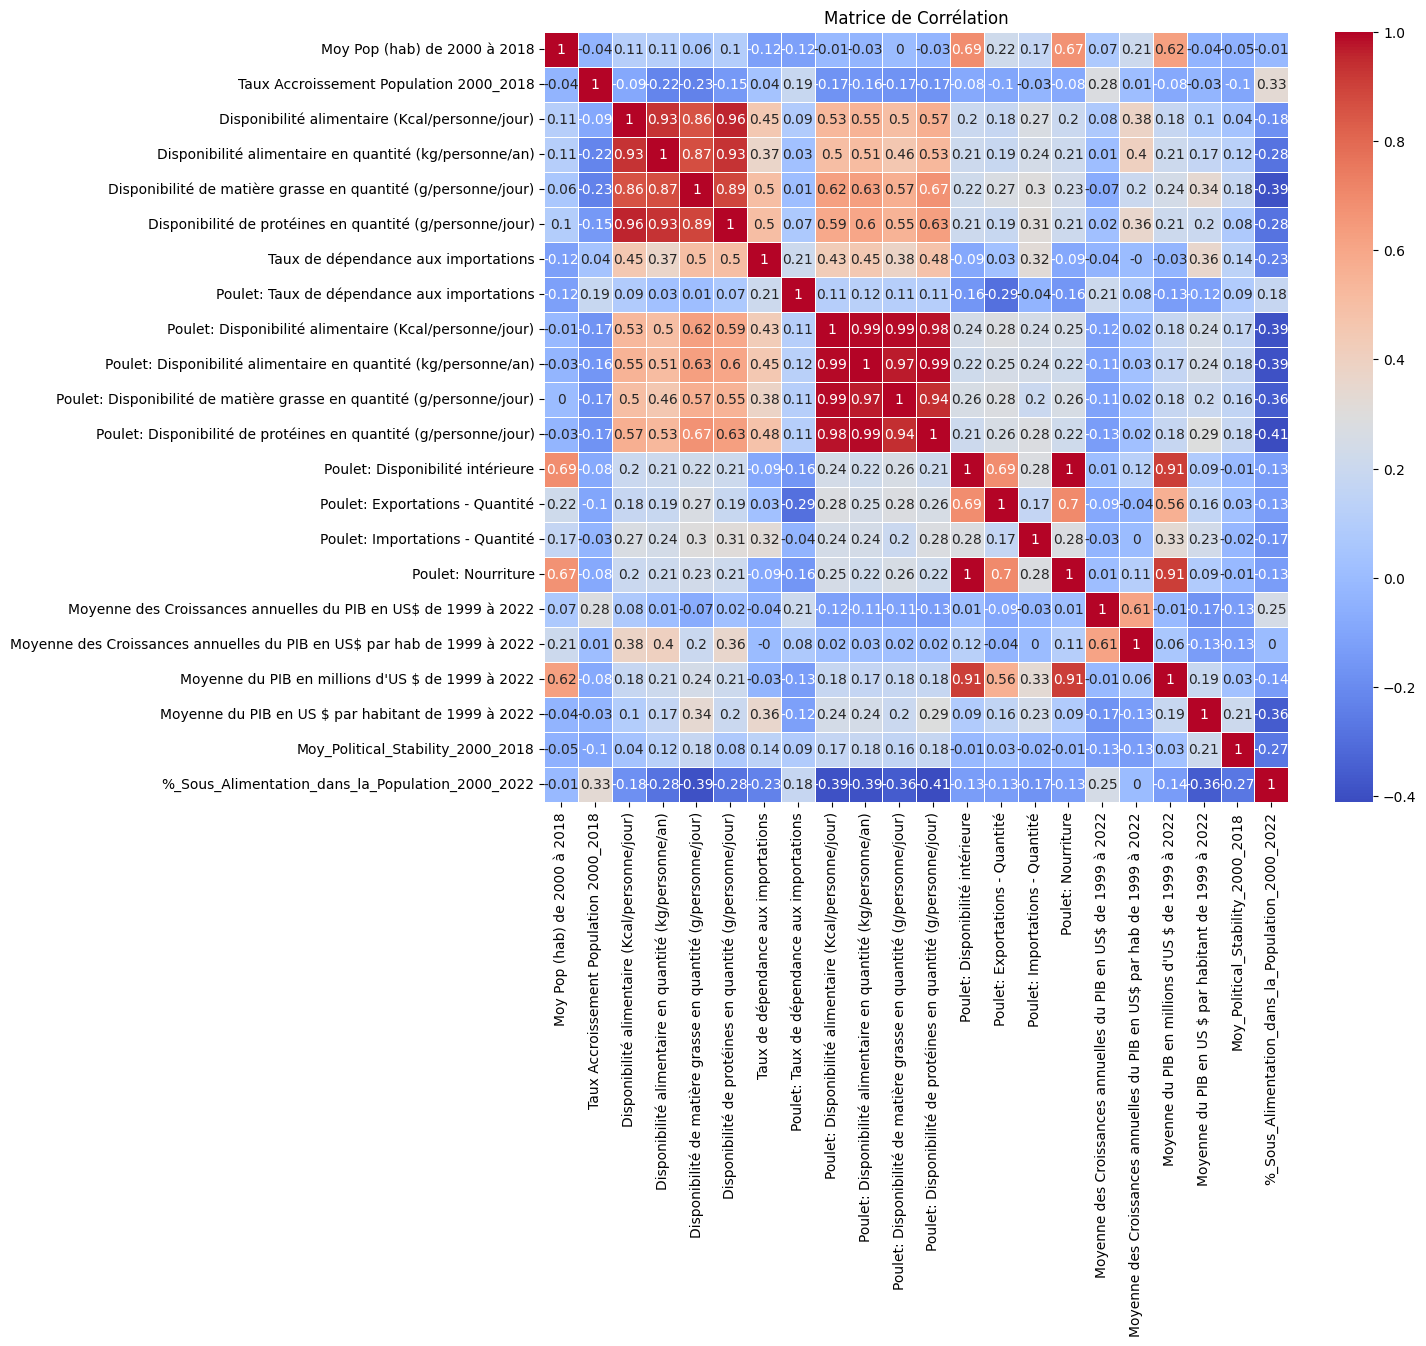

In [200]:
# Calcul de la matrice de corrélation
MT_Corr = Mother_Table_Clean_OK.corr().round(2)

# Création de la heatmap avec Seaborn
plt.figure(figsize=(12, 10))
sns.heatmap(MT_Corr, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Matrice de Corrélation')
plt.show()


In [201]:
# Calcul de la matrice de corrélation
MT_Corr = Mother_Table_Clean_OK.corr().round(2)

# Filtrage pour inclure uniquement les corrélations dans la plage spécifiée
filtered_corr = MT_Corr[((MT_Corr < -0.40) & (MT_Corr > -1)) | ((MT_Corr > 0.40) & (MT_Corr < 1))]

# Création de la heatmap avec Seaborn
plt.figure(figsize=(12, 10))
sns.heatmap(filtered_corr, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Matrice de Corrélation (Corrélations > 0.80 et < -0.80)')
plt.show()


Il y a une grande corrélation entre la plupart des disponibilité alimentaires

+ POulet dispo intérieur et la moyenne du PIB 

et il y a une corrélation négative entre la disponibilité aliemntaire et le % de population sous_nourri

# V) Centrage et réduction des valeurs <a class="anchor" id="chapter5"></a>

Pour une ACP ou le dendrogramme il est important de mettre l'ensemble des valeurs à la même échelle avec une moyenne de 0 et un écart type de 1 

In [202]:
from sklearn import preprocessing

X = Mother_Table_Clean_OK

std_scale = sklearn.preprocessing.StandardScaler().fit(X)
X_scaled = std_scale.transform(X)

X_scaled

array([[-0.03427573,  1.39036723, -0.35524493, ..., -0.61396327,
        -4.92962003,  1.77895613],
       [-0.03427573,  1.39036723, -0.35524493, ..., -0.61396327,
        -4.92962003,  1.77895613],
       [ 0.13405834, -0.03990817,  0.52121793, ..., -0.32727173,
         0.0915013 , -0.46665146],
       ...,
       [-0.25442345, -1.29855053, -2.12322101, ..., -0.63489421,
         0.0915013 , -0.95372141],
       [-0.25365861, -0.72644037, -2.12322101, ..., -0.45864636,
         1.52027566, -0.95372141],
       [-0.25435349, -0.21154122, -2.12322101, ..., -0.41981729,
         2.80617259, -0.95372141]])

In [203]:
# je propose de faire une deuxième normalisation avec une autre méthode

# En présence d'outliers Robust scaler est plus performant que Standard scaler car moins dépendant de ceci

# Avec Robust scaler Xnew = (X - la médiane)/ l'écart interquartile Q1-Q3

from sklearn import preprocessing

X = Mother_Table_Clean_OK

robust_scaler = sklearn.preprocessing.RobustScaler().fit(X)
X_scaled_2 = robust_scaler.transform(X)

X_scaled_2

array([[ 1.0359914 ,  1.4       , -0.79498364, ..., -0.29983928,
        -2.46      ,  1.74342105],
       [ 1.0359914 ,  1.4       , -0.79498364, ..., -0.29983928,
        -2.46      ,  1.74342105],
       [ 2.04551023,  0.15      ,  0.28462377, ...,  0.13372508,
         0.        , -0.14473684],
       ...,
       [-0.28425993, -0.95      , -2.97273719, ..., -0.33149319,
         0.        , -0.55427632],
       [-0.27967307, -0.45      , -2.97273719, ..., -0.06495311,
         0.7       , -0.55427632],
       [-0.28384033,  0.        , -2.97273719, ..., -0.00623181,
         1.33      , -0.55427632]])

In [204]:
# Mon mentor me conseille d'utiliser min max scaler aussi

# Avec Min max scaler Xnew = (X - Xmin)/ (Xmax-Xmin)

from sklearn import preprocessing

X = Mother_Table_Clean_OK

MinMax = sklearn.preprocessing.MinMaxScaler().fit(X)
X_scaled_3 = MinMax.transform(X)

X_scaled_3

array([[2.11966232e-02, 2.55754476e-01, 5.29708223e-01, ...,
        2.54065559e-03, 0.00000000e+00, 4.40138626e-01],
       [2.11966232e-02, 2.55754476e-01, 5.29708223e-01, ...,
        2.54065559e-03, 0.00000000e+00, 4.40138626e-01],
       [3.74041798e-02, 1.27877238e-01, 7.92307692e-01, ...,
        3.73400776e-02, 6.34020619e-01, 7.84499055e-02],
       ...,
       [3.38996261e-07, 1.53452685e-02, 0.00000000e+00, ...,
        0.00000000e+00, 6.34020619e-01, 0.00000000e+00],
       [7.39798522e-05, 6.64961637e-02, 0.00000000e+00, ...,
        2.13934574e-02, 8.14432990e-01, 0.00000000e+00],
       [7.07560423e-06, 1.12531969e-01, 0.00000000e+00, ...,
        2.61066381e-02, 9.76804124e-01, 0.00000000e+00]])

# VI) Méthode de classification hiérarchique <a class="anchor" id="chapter6"></a>

## a) Méthode <a class="anchor" id="chapter6a"></a>

In [205]:
Mother_Table_Clean_OK

Moy Pop (hab) de 2000 à 2018  Taux Accroissement Population 2000_2018  \
0                    2.884577e+07                                     0.79   
1                    2.884577e+07                                     0.79   
2                    5.090147e+07                                     0.29   
3                    5.090147e+07                                     0.29   
4                    2.994856e+06                                    -0.08   
..                            ...                                      ...   
405                  3.914984e+07                                     0.35   
406                  1.063692e+07                                     0.09   
407                  1.257947e+03                                    -0.15   
408                  1.014705e+05                                     0.05   
409                  1.042532e+04                                     0.23   

     Disponibilité alimentaire (Kcal/personne/jour)  \
0                                            1997.0   
1                                            1997.0   
2                                            2987.0   
3                                            2987.0   
4                                            3400.0   
..                                              ...   
405                                             0.0   
406                                             0.0   
407                                             0.0   
408                                             0.0   
409                                             0.0   

     Disponibilité alimentaire en quantité (kg/personne/an)  \
0                                               357.31        
1                                               357.31        
2                                               556.42        
3                                               556.42        
4                                              1260.49        
..                                                 ...        
405                                               0.00        
406                                               0.00        
407                                               0.00        
408                                               0.00        
409                                               0.00        

     Disponibilité de matière grasse en quantité (g/personne/jour)  \
0                                                30.63               
1                                                30.63               
2                                                81.92               
3                                                81.92               
4                                               117.57               
..                                                 ...               
405                                               0.00               
406                                               0.00               
407                                               0.00               
408                                               0.00               
409                                               0.00               

     Disponibilité de protéines en quantité (g/personne/jour)  \
0                                                54.09          
1                                                54.09          
2                                                83.36          
3                                                83.36          
4                                               119.50          
..                                                 ...          
405                                               0.00          
406                                               0.00          
407                                               0.00          
408                                               0.00          
409                                               0.00          

     Taux de dépendance aux 

Clustering hiérarchique avec StandardScaler

In [206]:
# Clustering hiérarchique avec StandardScaler
Z = linkage(X_scaled, 'ward')
print(Z)

[[  0.           1.           0.           2.        ]
 [170.         171.           0.           2.        ]
 [ 80.          81.           0.           2.        ]
 ...
 [805.         811.          41.63906993 214.        ]
 [813.         815.          50.81100039 196.        ]
 [816.         817.          64.04882265 410.        ]]


In [207]:
# Clustering hiérarchique avec RobustScaler
Z2 = linkage(X_scaled_2, 'ward')
print(Z)

[[  0.           1.           0.           2.        ]
 [170.         171.           0.           2.        ]
 [ 80.          81.           0.           2.        ]
 ...
 [805.         811.          41.63906993 214.        ]
 [813.         815.          50.81100039 196.        ]
 [816.         817.          64.04882265 410.        ]]


In [208]:
# Clustering hiérarchique avec MinMax Scaler
Z3 = linkage(X_scaled_3, 'ward')
print(Z)

[[  0.           1.           0.           2.        ]
 [170.         171.           0.           2.        ]
 [ 80.          81.           0.           2.        ]
 ...
 [805.         811.          41.63906993 214.        ]
 [813.         815.          50.81100039 196.        ]
 [816.         817.          64.04882265 410.        ]]


## b) Dendogramme <a class="anchor" id="chapter6b"></a>

dendogramme pour chaque méthode 

In [209]:
from scipy.cluster.hierarchy import dendrogram
import matplotlib.pyplot as plt

def plot_dendrogram(Z):
    # Créer le dendrogramme
    dendrogram(Z)

    # Ajouter des détails au graphique
    plt.title('Dendrogramme')
    plt.xlabel('Individus')
    plt.ylabel('Distance')
    plt.show()





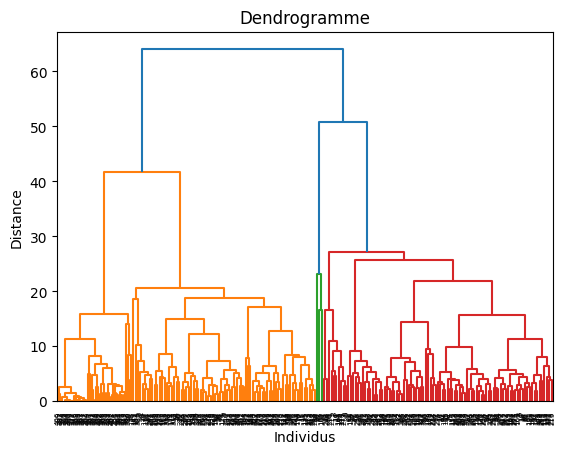

In [210]:
plot_dendrogram(Z)

In [211]:
plot_dendrogram(Z2)

In [212]:
plot_dendrogram(Z3)

Il y a 2 groupes d'après le dendrogramme avec Min Max scaler plutôt homogène comparé à Robust Scaler

# VII) Méthode supervisée de classification: k-Means <a class="anchor" id="chapter7"></a>

In [213]:
from sklearn.cluster import KMeans

## a) Cherchons le nombre de clusters idéal <a class="anchor" id="chapter7a"></a>

### Robust Scaler

In [214]:
# Pour essayer d'enlever l'erreur 

import os
os.environ["OMP_NUM_THREADS"] = '1' # export OMP_NUM_THREADS=1

# Faire la courbe de l'intertie pour déterminer le nombre optimal de centroïd

# Modèle Kmeans Robust Scaler

X = X_scaled_2

inertia = []

K_range = range(1,20)

for i in K_range:
    model = KMeans(n_clusters = i,init='k-means++',n_init=20).fit(X)
    inertia.append(round(model.inertia_,2))

In [215]:
# Taille de la figure

fs = 30

plt.figure(figsize=(fs,fs))

plt.plot(K_range,inertia)

# Pour customiser le graphiqe

plt.xlabel('Nombre de Clusters', fontsize = fs)
plt.ylabel('Coût du modèle (Inertie)', fontsize = fs)

plt.xticks(fontsize = fs)
plt.yticks(fontsize = fs)

plt.xticks(np.arange(20))

plt.title("Méthode des coudes pour trouver le nombre de cluster idéal avec Robust Scaler", fontsize = fs)


# Pour sauvegarder les figures

# plt.savefig("P9_kmeans_method_coude_pour_nbre_de_clusters.png")
plt.show()

il semble que vers 3 il y ait la zone de coude pour le robust scaler. Méthode des coudes pas si facile hésitation entre 2 et 3

Avec le dendrogramme il nous dit 2 je vais plutôt prendre 3

In [216]:
n_cluster_ideal_robust_scaler = 3

In [217]:
# Modèle Kmeans Robust Scaler
kmeans_model = KMeans(n_clusters=3, init='k-means++', n_init=20)
prédiction_robust_scaler = kmeans_model.fit_predict(X_scaled_2)

M_G_1 = prédiction_robust_scaler == 0
M_G_2 = prédiction_robust_scaler == 1
M_G_3 = prédiction_robust_scaler == 2

# Ajoutez une condition supplémentaire pour vous assurer que les masques ont la bonne longueur
M_G_1 = M_G_1[:len(Mother_Table_Clean_Graphique)]
M_G_2 = M_G_2[:len(Mother_Table_Clean_Graphique)]
M_G_3 = M_G_3[:len(Mother_Table_Clean_Graphique)]


# Extraction des groupes
Group_1_Robust_Scaler = Mother_Table_Clean_Graphique[M_G_1]
Group_2_Robust_Scaler = Mother_Table_Clean_Graphique[M_G_2]
Group_3_Robust_Scaler = Mother_Table_Clean_Graphique[M_G_3]



In [218]:
print(len(M_G_1))
print(len(M_G_2))
print(len(M_G_3))


238
238
238


In [219]:
Group_1_Robust_Scaler

Pays  Moy Pop (hab) de 2000 à 2018  \
0       Afghanistan                   28845766.58   
2    Afrique du Sud                   50901472.26   
4           Albanie                    2994856.32   
6           Algérie                   35858473.63   
8         Allemagne                   81527014.00   
..              ...                           ...   
405     Soudan (ex)                   39149837.00   
406   Soudan du Sud                   10636918.57   
407        Tokélaou                       1257.95   
408           Tonga                     101470.53   
409          Tuvalu                      10425.32   

     Taux Accroissement Population 2000_2018  \
0                                       0.79   
2                                       0.29   
4                                      -0.08   
6                                       0.36   
8                                       0.02   
..                                       ...   
405                                     0.35   
406                                     0.09   
407                                    -0.15   
408                                     0.05   
409                                     0.23   

     Disponibilité alimentaire (Kcal/personne/jour)  \
0                                            1997.0   
2                                            2987.0   
4                                            3400.0   
6                                            3345.0   
8                                            3559.0   
..                                              ...   
405                                             0.0   
406                                             0.0   
407                                             0.0   
408                                             0.0   
409                                             0.0   

     Disponibilité alimentaire en quantité (kg/personne/an)  \
0                                               357.31        
2                                               556.42        
4                                              1260.49        
6                                               798.71        
8                                               943.24        
..                                                 ...        
405                                               0.00        
406                                               0.00        
407                                               0.00        
408                                               0.00        
409                                               0.00        

     Disponibilité de matière grasse en quantité (g/personne/jour)  \
0                                                30.63               
2                                                81.92               
4                                               117.57               
6                                                79.62               
8                                               147.96               
..                                                 ...               
405                                               0.00               
406                                               0.00               
407                                               0.00               
408                                               0.00               
409                                               0.00               

     Disponibilité de protéines en quantité (g/personne/jour)  \
0                                                54.09          
2                                                83.36          
4                                               119.50          
6                                                92.85          
8                                               104.07          
..                                                 ...          
405                                               0.00          
406                   

In [220]:
Group_2_Robust_Scaler

Pays  Moy Pop (hab) de 2000 à 2018  \
92        Égypte                  8.227187e+07   
94   El Salvador                  6.158181e+06   
210      Mexique                  1.124683e+08   
212     Mongolie                  2.720310e+06   

     Taux Accroissement Population 2000_2018  \
92                                      0.43   
94                                      0.09   
210                                     0.28   
212                                     0.32   

     Disponibilité alimentaire (Kcal/personne/jour)  \
92                                           3315.0   
94                                           2660.0   
210                                          3258.0   
212                                          2369.0   

     Disponibilité alimentaire en quantité (kg/personne/an)  \
92                                              747.61        
94                                              579.31        
210                                             744.56        
212                                             545.92        

     Disponibilité de matière grasse en quantité (g/personne/jour)  \
92                                               56.81               
94                                               64.06               
210                                             100.77               
212                                              95.27               

     Disponibilité de protéines en quantité (g/personne/jour)  \
92                                               96.27          
94                                               74.70          
210                                              93.30          
212                                              82.35          

     Taux de dépendance aux importations  \
92                                 21.26   
94                                 22.17   
210                                22.05   
212                                20.78   

     Poulet: Taux de dépendance aux importations  \
92                                          8.72   
94                                         10.69   
210                                        22.83   
212                                       111.11   

     Poulet: Disponibilité alimentaire (Kcal/personne/jour)  ...  \
92                                                50.0       ...   
94                                                71.0       ...   
210                                              123.0       ...   
212                                                9.0       ...   

     Poulet: Disponibilité intérieure  Poulet: Exportations - Quantité  \
92                             1250.0                              1.0   
94                              131.0                              2.0   
210                            4219.0                              9.0   
212                               9.0                              0.0   

     Poulet: Importations - Quantité  Poulet: Nourriture  \
92                             110.0              1250.0   
94                              16.0               131.0   
210                            972.0              4058.0   
212                             10.0                 9.0   

     Moyenne des Croissances annuelles du PIB en US$ de 1999 à 2022  \
92                                                3.61                
94                                                1.34                
210                                               1.96                
212                                               6.82                

     Moyenne des Croissances annuelles du PIB en US$ par hab de 1999 à 2022  \
92                                                2.74                        
94                                                2.05                        
210                                               1.69                        
212                                               4.95                        

    

In [221]:
Group_3_Robust_Scaler

Pays  Moy Pop (hab) de 2000 à 2018  \
16              Argentine                  4.055396e+07   
18                Arménie                  2.949849e+06   
66   Chine - RAS de Macao                  5.294169e+05   
68    Chine, continentale                  1.360829e+09   
126                 Grèce                  1.093101e+07   
128               Grenade                  1.065175e+05   
134         Guinée-Bissau                  1.505153e+06   
136                Guyana                  7.544032e+05   
230               Norvège                  4.869168e+06   
232    Nouvelle-Calédonie                  2.499193e+05   

     Taux Accroissement Population 2000_2018  \
16                                      0.20   
18                                     -0.04   
66                                      0.48   
68                                      0.11   
126                                    -0.05   
128                                     0.08   
134                                     0.56   
136                                     0.04   
230                                     0.19   
232                                     0.29   

     Disponibilité alimentaire (Kcal/personne/jour)  \
16                                           3239.0   
18                                           3072.0   
66                                           2999.0   
68                                           3197.0   
126                                          3353.0   
128                                          2404.0   
134                                          2252.0   
136                                          2882.0   
230                                          3384.0   
232                                          2750.0   

     Disponibilité alimentaire en quantité (kg/personne/an)  \
16                                              776.64        
18                                             1006.41        
66                                              726.13        
68                                              968.52        
126                                             947.29        
128                                             525.11        
134                                             390.17        
136                                             895.67        
230                                             934.66        
232                                             584.49        

     Disponibilité de matière grasse en quantité (g/personne/jour)  \
16                                              117.12               
18                                               96.90               
66                                              131.83               
68                                               96.89               
126                                             150.84               
128                                              78.89               
134                                              62.95               
136                                              65.47               
230                                             147.73               
232                                             119.41               

     Disponibilité de protéines en quantité (g/personne/jour)  \
16                                              102.66          
18                                               97.33          
66                                              100.37          
68                                              101.44          
126                                             105.13          
128                                              70.57          
134                                              44.13          
136                                              87.58          
230                                             109.98          
232                                              83.12          

     Taux de dépendance aux importations  \
16         

### Standard Scaler

In [222]:
# Pour essayer d'enlever l'erreur 

import os
os.environ["OMP_NUM_THREADS"] = '1' # export OMP_NUM_THREADS=1

# Faire la courbe de l'intertie pour déterminer le nombre optimal de centroïd

# Modèle Kmeans Standard Scaler

X = X_scaled

inertia = []

K_range = range(1,20)

for i in K_range:
    model = KMeans(n_clusters = i,init='k-means++',n_init=20).fit(X)
    inertia.append(round(model.inertia_,2))

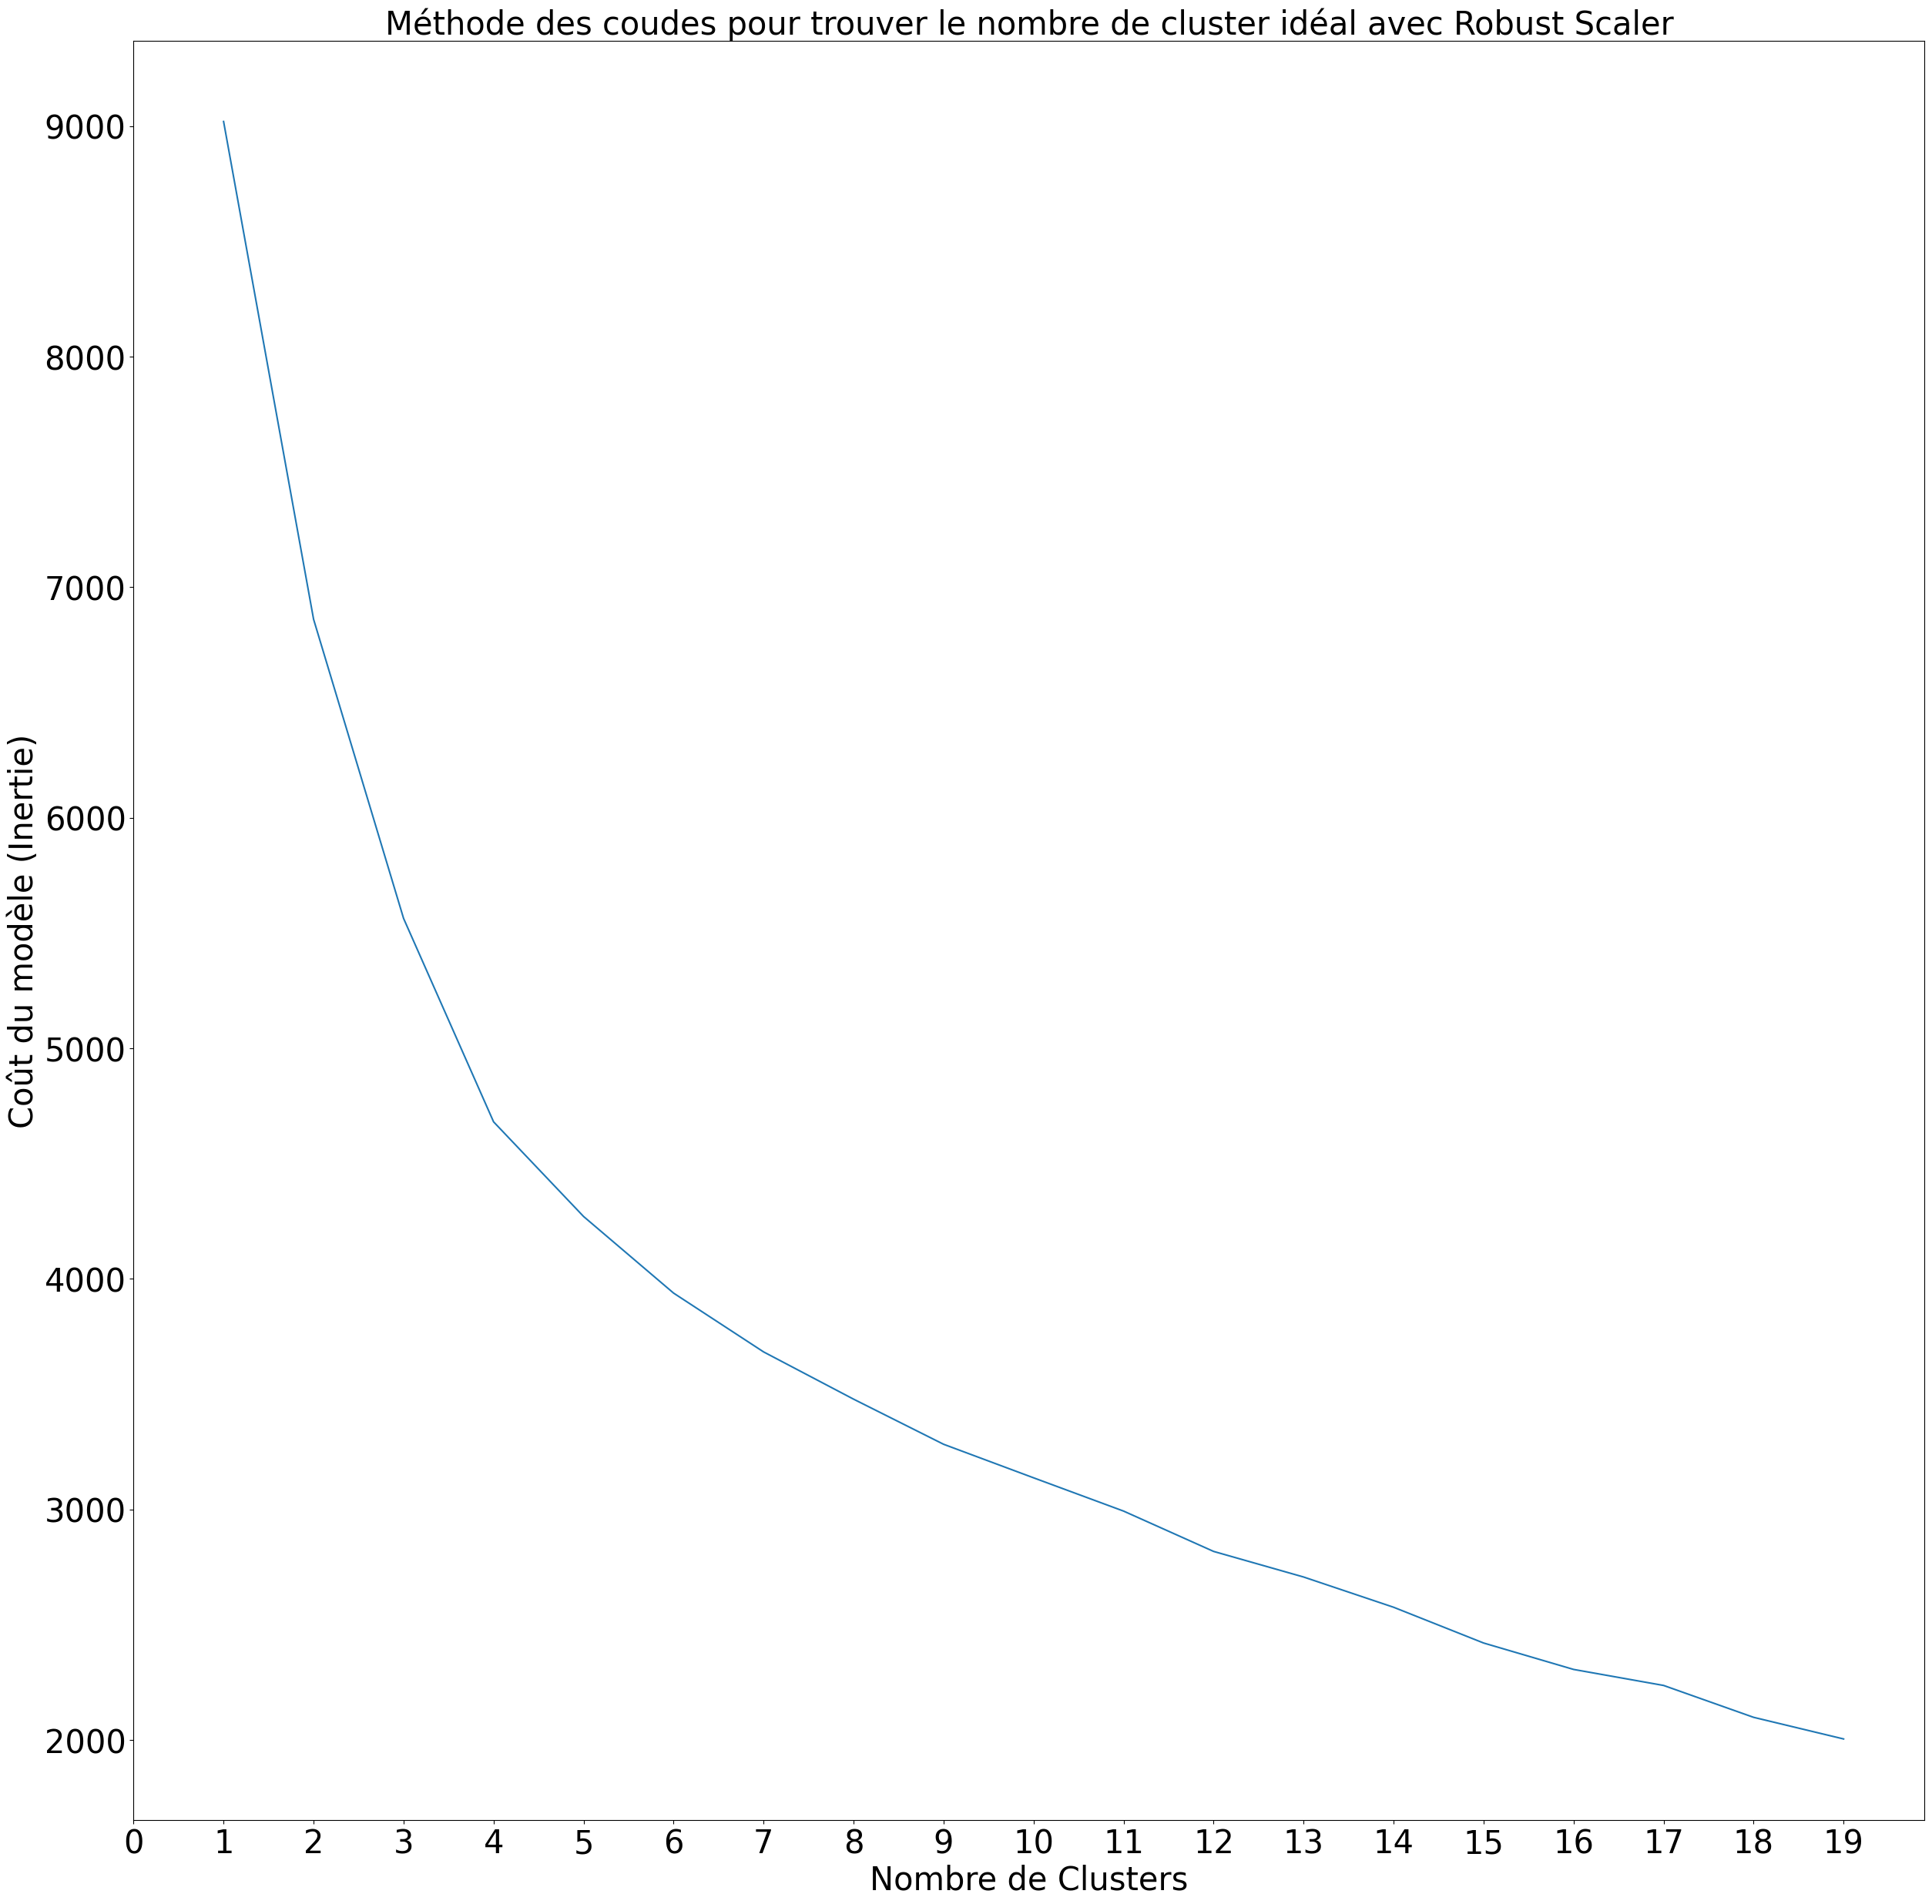

In [223]:
# Taille de la figure

fs = 30

plt.figure(figsize=(fs,fs))

plt.plot(K_range,inertia)

# Pour customiser le graphiqe

plt.xlabel('Nombre de Clusters', fontsize = fs)
plt.ylabel('Coût du modèle (Inertie)', fontsize = fs)

plt.xticks(fontsize = fs)
plt.yticks(fontsize = fs)

plt.xticks(np.arange(20))

plt.title("Méthode des coudes pour trouver le nombre de cluster idéal avec Robust Scaler", fontsize = fs)


# Pour sauvegarder les figures

# plt.savefig("P9_kmeans_method_coude_pour_nbre_de_clusters.png")
plt.show()

Le nombre de cluster idéal est de 3 à 6 avec la méthode des coudes ce qui est ici pas si évident que cela à déterminer

Le dendrogramme nous dit 3

In [224]:
# Modèle Kmeans Robust Scaler
kmeans_model = KMeans(n_clusters=3, init='k-means++', n_init=20)
prédiction_standard_scaler = kmeans_model.fit_predict(X_scaled)

M_G_1 = prédiction_standard_scaler == 0
M_G_2 = prédiction_standard_scaler == 1
M_G_3 = prédiction_standard_scaler == 2

# Ajoutez une condition supplémentaire pour vous assurer que les masques ont la bonne longueur
M_G_1 = M_G_1[:len(Mother_Table_Clean_Graphique)]
M_G_2 = M_G_2[:len(Mother_Table_Clean_Graphique)]
M_G_3 = M_G_3[:len(Mother_Table_Clean_Graphique)]


# Extraction des groupes
Group_1_Standard_Scaler = Mother_Table_Clean_Graphique[M_G_1]
Group_2_Standard_Scaler = Mother_Table_Clean_Graphique[M_G_2]
Group_3_Standard_Scaler = Mother_Table_Clean_Graphique[M_G_3]

In [225]:
Group_1_Standard_Scaler

Pays  Moy Pop (hab) de 2000 à 2018  \
92          Égypte                  8.227187e+07   
94     El Salvador                  6.158181e+06   
134  Guinée-Bissau                  1.505153e+06   
136         Guyana                  7.544032e+05   
210        Mexique                  1.124683e+08   
212       Mongolie                  2.720310e+06   

     Taux Accroissement Population 2000_2018  \
92                                      0.43   
94                                      0.09   
134                                     0.56   
136                                     0.04   
210                                     0.28   
212                                     0.32   

     Disponibilité alimentaire (Kcal/personne/jour)  \
92                                           3315.0   
94                                           2660.0   
134                                          2252.0   
136                                          2882.0   
210                                          3258.0   
212                                          2369.0   

     Disponibilité alimentaire en quantité (kg/personne/an)  \
92                                              747.61        
94                                              579.31        
134                                             390.17        
136                                             895.67        
210                                             744.56        
212                                             545.92        

     Disponibilité de matière grasse en quantité (g/personne/jour)  \
92                                               56.81               
94                                               64.06               
134                                              62.95               
136                                              65.47               
210                                             100.77               
212                                              95.27               

     Disponibilité de protéines en quantité (g/personne/jour)  \
92                                               96.27          
94                                               74.70          
134                                              44.13          
136                                              87.58          
210                                              93.30          
212                                              82.35          

     Taux de dépendance aux importations  \
92                                 21.26   
94                                 22.17   
134                                23.67   
136                                 7.78   
210                                22.05   
212                                20.78   

     Poulet: Taux de dépendance aux importations  \
92                                          8.72   
94                                         10.69   
134                                       100.00   
136                                         0.00   
210                                        22.83   
212                                       111.11   

     Poulet: Disponibilité alimentaire (Kcal/personne/jour)  ...  \
92                                                50.0       ...   
94                                                71.0       ...   
134                                                7.0       ...   
136                                              165.0       ...   
210                                              123.0       ...   
212                                                9.0       ...   

     Poulet: Disponibilité intérieure  Poulet: Exportations - Quantité  \
92                             1250.0                              1.0   
94                              131.0                              2.0   
134                               4.0                              0.0   
136                              32.0                              0.0   
210             

In [226]:
Group_2_Standard_Scaler

Pays  Moy Pop (hab) de 2000 à 2018  \
4          Albanie                    2994856.32   
6          Algérie                   35858473.63   
8        Allemagne                   81527014.00   
10          Angola                   22917624.68   
16       Argentine                   40553959.74   
..             ...                           ...   
405    Soudan (ex)                   39149837.00   
406  Soudan du Sud                   10636918.57   
407       Tokélaou                       1257.95   
408          Tonga                     101470.53   
409         Tuvalu                      10425.32   

     Taux Accroissement Population 2000_2018  \
4                                      -0.08   
6                                       0.36   
8                                       0.02   
10                                      0.88   
16                                      0.20   
..                                       ...   
405                                     0.35   
406                                     0.09   
407                                    -0.15   
408                                     0.05   
409                                     0.23   

     Disponibilité alimentaire (Kcal/personne/jour)  \
4                                            3400.0   
6                                            3345.0   
8                                            3559.0   
10                                           2266.0   
16                                           3239.0   
..                                              ...   
405                                             0.0   
406                                             0.0   
407                                             0.0   
408                                             0.0   
409                                             0.0   

     Disponibilité alimentaire en quantité (kg/personne/an)  \
4                                              1260.49        
6                                               798.71        
8                                               943.24        
10                                              570.95        
16                                              776.64        
..                                                 ...        
405                                               0.00        
406                                               0.00        
407                                               0.00        
408                                               0.00        
409                                               0.00        

     Disponibilité de matière grasse en quantité (g/personne/jour)  \
4                                               117.57               
6                                                79.62               
8                                               147.96               
10                                               48.73               
16                                              117.12               
..                                                 ...               
405                                               0.00               
406                                               0.00               
407                                               0.00               
408                                               0.00               
409                                               0.00               

     Disponibilité de protéines en quantité (g/personne/jour)  \
4                                               119.50          
6                                                92.85          
8                                               104.07          
10                                               54.09          
16                                              102.66          
..                                                 ...          
405                                               0.00          
406                              

In [227]:
Group_3_Standard_Scaler

Pays  Moy Pop (hab) de 2000 à 2018  \
0                 Afghanistan                   28845766.58   
2              Afrique du Sud                   50901472.26   
12         Antigua-et-Barbuda                      86477.37   
14            Arabie saoudite                   26950353.53   
20                  Australie                   21785345.11   
..                        ...                           ...   
397  Saint-Pierre-et-Miquelon                       6157.53   
398               Saint-Siège                        796.63   
399         Samoa américaines                      57233.47   
400      Serbie-et-Monténégro                    9943209.00   
401                Seychelles                      90408.68   

     Taux Accroissement Population 2000_2018  \
0                                       0.79   
2                                       0.29   
12                                      0.27   
14                                      0.63   
20                                      0.31   
..                                       ...   
397                                    -0.07   
398                                     0.02   
399                                    -0.04   
400                                    -0.03   
401                                     0.20   

     Disponibilité alimentaire (Kcal/personne/jour)  \
0                                            1997.0   
2                                            2987.0   
12                                           2429.0   
14                                           3194.0   
20                                           3307.0   
..                                              ...   
397                                             0.0   
398                                             0.0   
399                                             0.0   
400                                             0.0   
401                                             0.0   

     Disponibilité alimentaire en quantité (kg/personne/an)  \
0                                               357.31        
2                                               556.42        
12                                              632.98        
14                                              546.35        
20                                              906.77        
..                                                 ...        
397                                               0.00        
398                                               0.00        
399                                               0.00        
400                                               0.00        
401                                               0.00        

     Disponibilité de matière grasse en quantité (g/personne/jour)  \
0                                                30.63               
2                                                81.92               
12                                               88.72               
14                                              103.08               
20                                              153.79               
..                                                 ...               
397                                               0.00               
398                                               0.00               
399                                               0.00               
400                                               0.00               
401                                               0.00               

     Disponibilité de protéines en quantité (g/personne/jour)  \
0                                                54.09          
2                                                83.36          
12                                               81.15          
14                                               87.51          
20                                              108.01          
..                                        

# Avec MinMax Scaler

In [228]:
# Pour essayer d'enlever l'erreur 

import os
os.environ["OMP_NUM_THREADS"] = '1' # export OMP_NUM_THREADS=1

# Faire la courbe de l'intertie pour déterminer le nombre optimal de centroïd

# Modèle Kmeans Standard Scaler

X = X_scaled_3

inertia = []

K_range = range(1,20)

for i in K_range:
    model = KMeans(n_clusters = i,init='k-means++',n_init=20).fit(X)
    inertia.append(round(model.inertia_,2))

changer titre des graphs elbow pour chaque méthode 

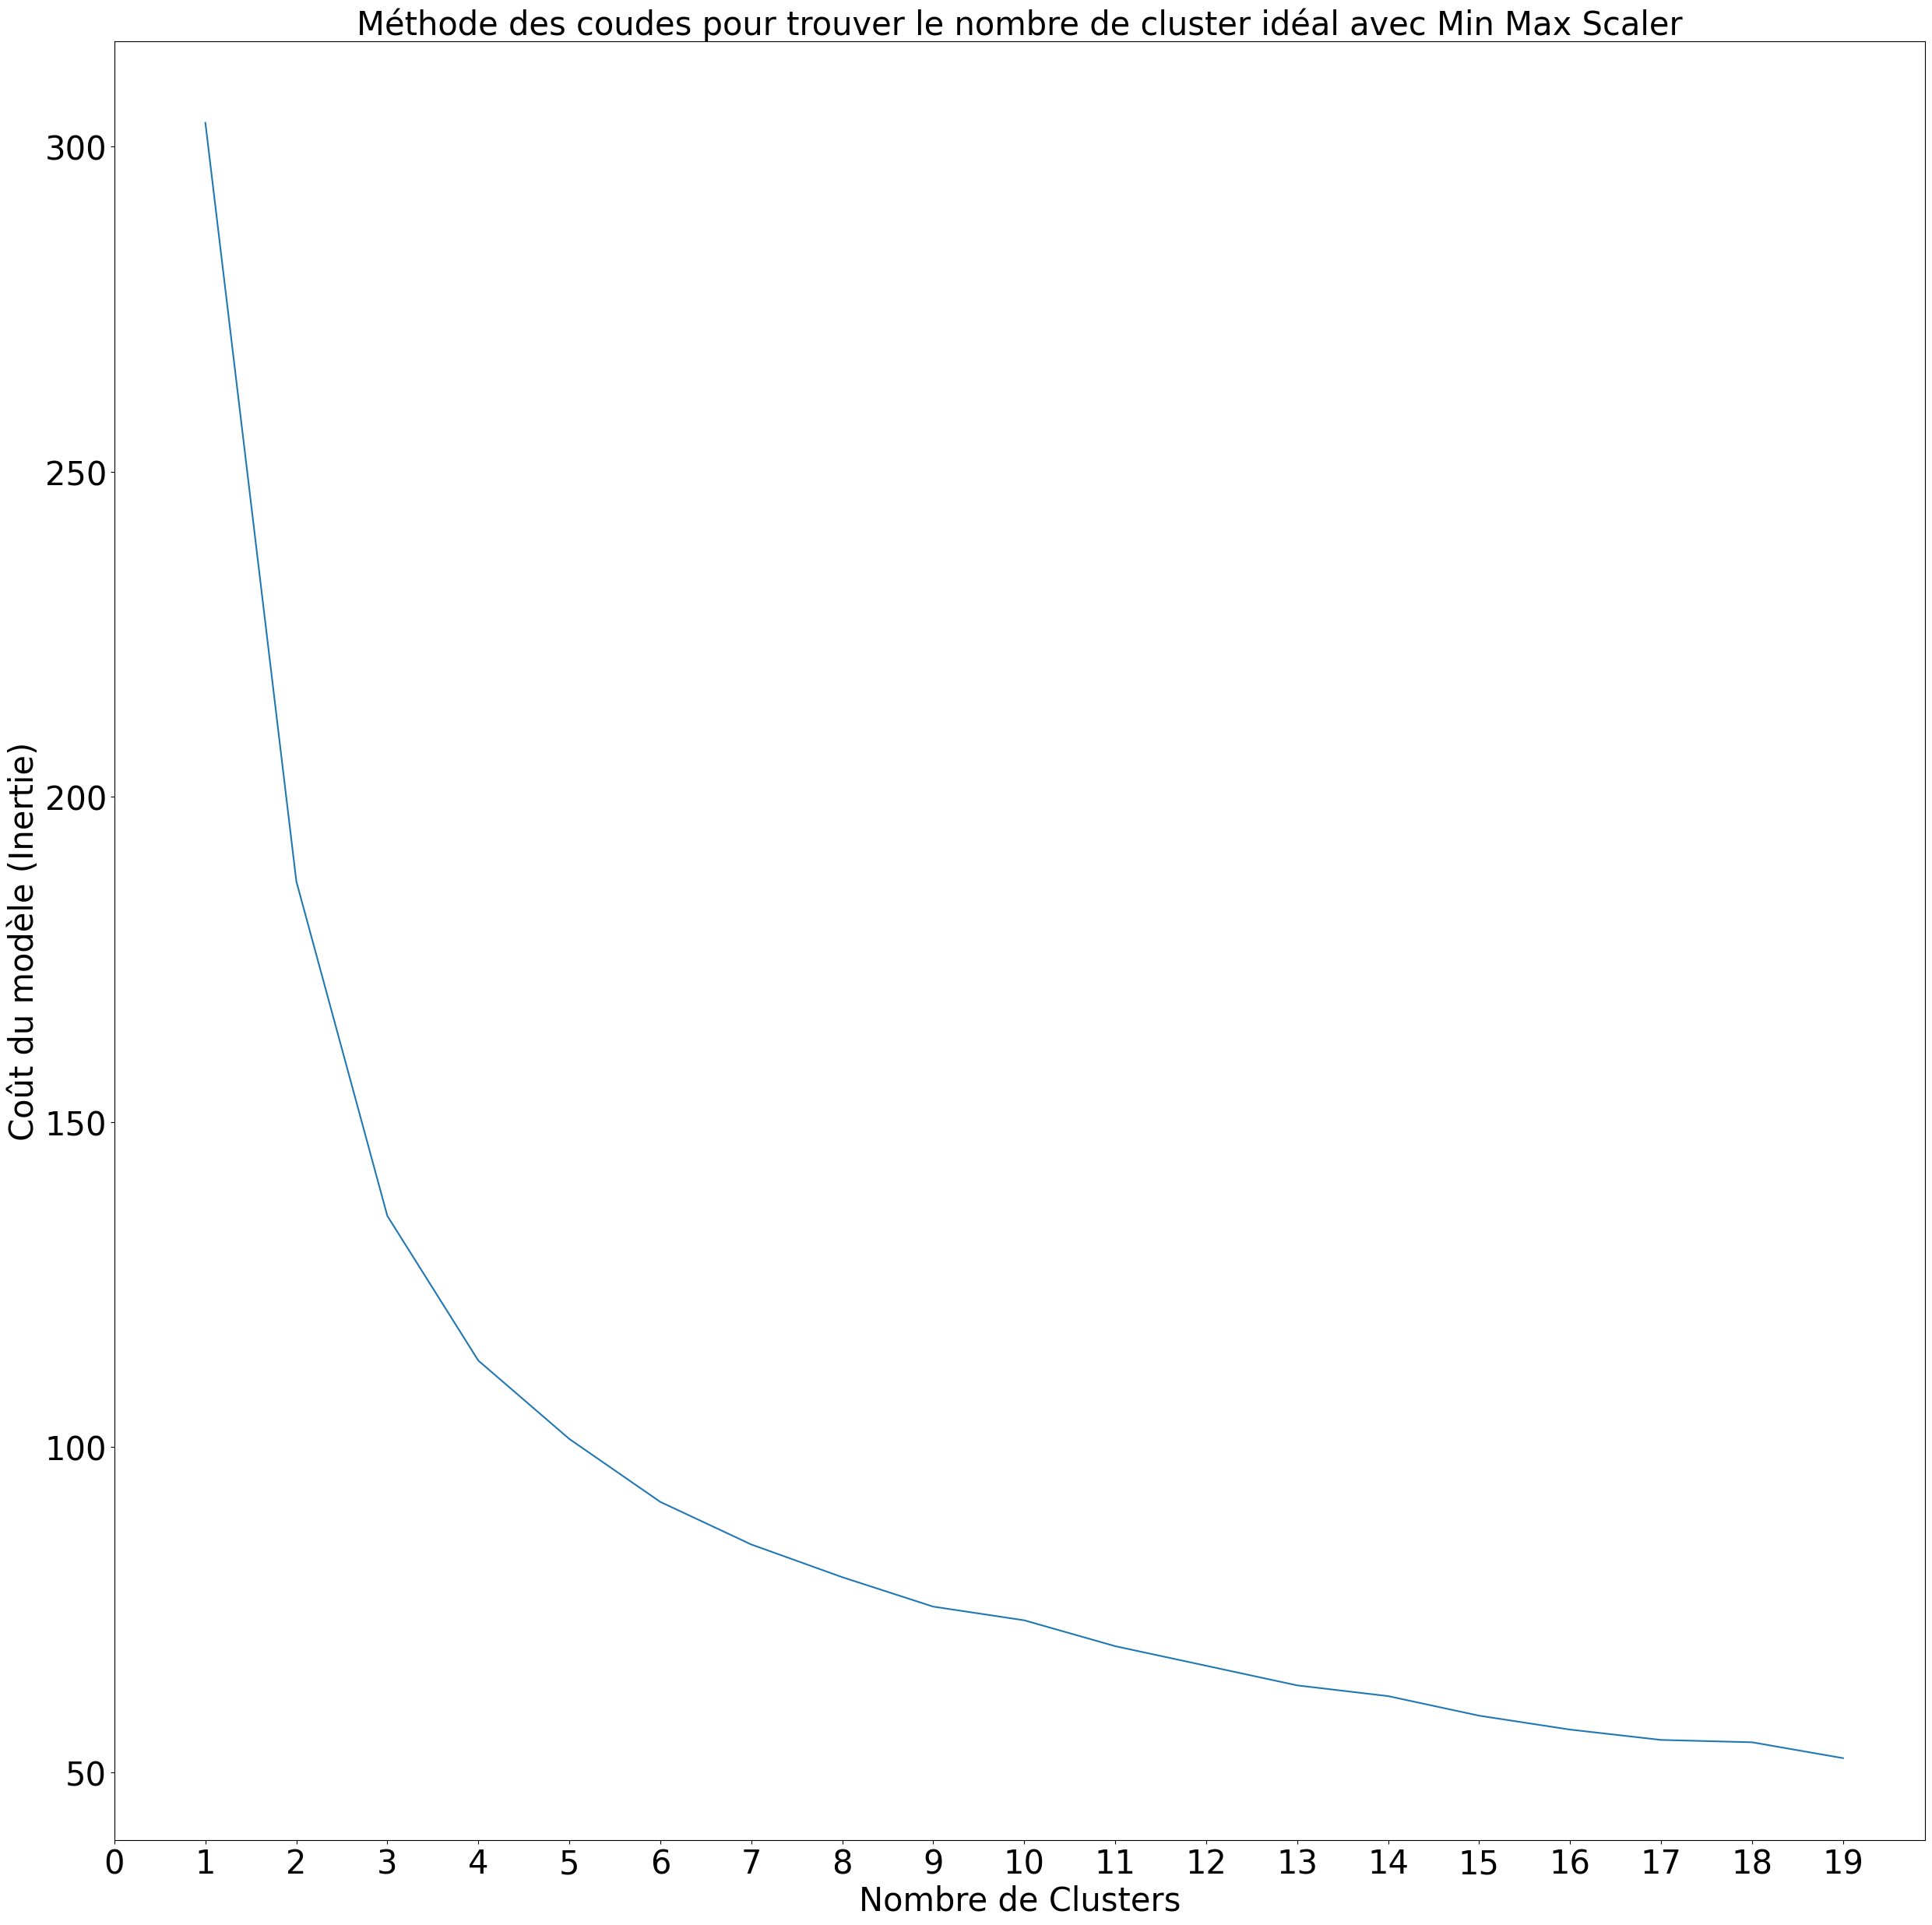

In [229]:
# Taille de la figure

fs = 30

plt.figure(figsize=(fs,fs))

plt.plot(K_range,inertia)

# Pour customiser le graphiqe

plt.xlabel('Nombre de Clusters', fontsize = fs)
plt.ylabel('Coût du modèle (Inertie)', fontsize = fs)

plt.xticks(fontsize = fs)
plt.yticks(fontsize = fs)

plt.xticks(np.arange(20))

plt.title("Méthode des coudes pour trouver le nombre de cluster idéal avec Min Max Scaler", fontsize = fs)


# Pour sauvegarder les figures

# plt.savefig("P9_kmeans_method_coude_pour_nbre_de_clusters.png")
plt.show()

Ce n'est pas évident de trouver ce nombre entre 2 à 5

Le dendrogramme conseille 2

Je vais prendre 3

In [230]:
# Modèle Kmeans Min Max Scaler
kmeans_model = KMeans(n_clusters=3, init='k-means++', n_init=20)
prédiction_Min_Max_scaler = kmeans_model.fit_predict(X_scaled)

M_G_1 = prédiction_Min_Max_scaler == 0
M_G_2 = prédiction_Min_Max_scaler == 1
M_G_3 = prédiction_Min_Max_scaler == 2

# Ajout d'une condition supplémentaire pour s'assurer que les masques ont la bonne longueur
M_G_1 = M_G_1[:len(Mother_Table_Clean_Graphique)]
M_G_2 = M_G_2[:len(Mother_Table_Clean_Graphique)]
M_G_3 = M_G_3[:len(Mother_Table_Clean_Graphique)]


# Extraction des groupes
Group_1_Min_Max_Scaler = Mother_Table_Clean_Graphique[M_G_1]
Group_2_Min_Max_Scaler = Mother_Table_Clean_Graphique[M_G_2]
Group_3_Min_Max_Scaler = Mother_Table_Clean_Graphique[M_G_3]

In [231]:
Group_1_Min_Max_Scaler

Pays  Moy Pop (hab) de 2000 à 2018  \
92          Égypte                  8.227187e+07   
94     El Salvador                  6.158181e+06   
134  Guinée-Bissau                  1.505153e+06   
136         Guyana                  7.544032e+05   
210        Mexique                  1.124683e+08   
212       Mongolie                  2.720310e+06   

     Taux Accroissement Population 2000_2018  \
92                                      0.43   
94                                      0.09   
134                                     0.56   
136                                     0.04   
210                                     0.28   
212                                     0.32   

     Disponibilité alimentaire (Kcal/personne/jour)  \
92                                           3315.0   
94                                           2660.0   
134                                          2252.0   
136                                          2882.0   
210                                          3258.0   
212                                          2369.0   

     Disponibilité alimentaire en quantité (kg/personne/an)  \
92                                              747.61        
94                                              579.31        
134                                             390.17        
136                                             895.67        
210                                             744.56        
212                                             545.92        

     Disponibilité de matière grasse en quantité (g/personne/jour)  \
92                                               56.81               
94                                               64.06               
134                                              62.95               
136                                              65.47               
210                                             100.77               
212                                              95.27               

     Disponibilité de protéines en quantité (g/personne/jour)  \
92                                               96.27          
94                                               74.70          
134                                              44.13          
136                                              87.58          
210                                              93.30          
212                                              82.35          

     Taux de dépendance aux importations  \
92                                 21.26   
94                                 22.17   
134                                23.67   
136                                 7.78   
210                                22.05   
212                                20.78   

     Poulet: Taux de dépendance aux importations  \
92                                          8.72   
94                                         10.69   
134                                       100.00   
136                                         0.00   
210                                        22.83   
212                                       111.11   

     Poulet: Disponibilité alimentaire (Kcal/personne/jour)  ...  \
92                                                50.0       ...   
94                                                71.0       ...   
134                                                7.0       ...   
136                                              165.0       ...   
210                                              123.0       ...   
212                                                9.0       ...   

     Poulet: Disponibilité intérieure  Poulet: Exportations - Quantité  \
92                             1250.0                              1.0   
94                              131.0                              2.0   
134                               4.0                              0.0   
136                              32.0                              0.0   
210             

In [232]:
Group_2_Min_Max_Scaler

Pays  Moy Pop (hab) de 2000 à 2018  \
4          Albanie                    2994856.32   
6          Algérie                   35858473.63   
8        Allemagne                   81527014.00   
10          Angola                   22917624.68   
16       Argentine                   40553959.74   
..             ...                           ...   
405    Soudan (ex)                   39149837.00   
406  Soudan du Sud                   10636918.57   
407       Tokélaou                       1257.95   
408          Tonga                     101470.53   
409         Tuvalu                      10425.32   

     Taux Accroissement Population 2000_2018  \
4                                      -0.08   
6                                       0.36   
8                                       0.02   
10                                      0.88   
16                                      0.20   
..                                       ...   
405                                     0.35   
406                                     0.09   
407                                    -0.15   
408                                     0.05   
409                                     0.23   

     Disponibilité alimentaire (Kcal/personne/jour)  \
4                                            3400.0   
6                                            3345.0   
8                                            3559.0   
10                                           2266.0   
16                                           3239.0   
..                                              ...   
405                                             0.0   
406                                             0.0   
407                                             0.0   
408                                             0.0   
409                                             0.0   

     Disponibilité alimentaire en quantité (kg/personne/an)  \
4                                              1260.49        
6                                               798.71        
8                                               943.24        
10                                              570.95        
16                                              776.64        
..                                                 ...        
405                                               0.00        
406                                               0.00        
407                                               0.00        
408                                               0.00        
409                                               0.00        

     Disponibilité de matière grasse en quantité (g/personne/jour)  \
4                                               117.57               
6                                                79.62               
8                                               147.96               
10                                               48.73               
16                                              117.12               
..                                                 ...               
405                                               0.00               
406                                               0.00               
407                                               0.00               
408                                               0.00               
409                                               0.00               

     Disponibilité de protéines en quantité (g/personne/jour)  \
4                                               119.50          
6                                                92.85          
8                                               104.07          
10                                               54.09          
16                                              102.66          
..                                                 ...          
405                                               0.00          
406                              

In [233]:
Group_3_Min_Max_Scaler

Pays  Moy Pop (hab) de 2000 à 2018  \
0                 Afghanistan                   28845766.58   
2              Afrique du Sud                   50901472.26   
12         Antigua-et-Barbuda                      86477.37   
14            Arabie saoudite                   26950353.53   
20                  Australie                   21785345.11   
..                        ...                           ...   
397  Saint-Pierre-et-Miquelon                       6157.53   
398               Saint-Siège                        796.63   
399         Samoa américaines                      57233.47   
400      Serbie-et-Monténégro                    9943209.00   
401                Seychelles                      90408.68   

     Taux Accroissement Population 2000_2018  \
0                                       0.79   
2                                       0.29   
12                                      0.27   
14                                      0.63   
20                                      0.31   
..                                       ...   
397                                    -0.07   
398                                     0.02   
399                                    -0.04   
400                                    -0.03   
401                                     0.20   

     Disponibilité alimentaire (Kcal/personne/jour)  \
0                                            1997.0   
2                                            2987.0   
12                                           2429.0   
14                                           3194.0   
20                                           3307.0   
..                                              ...   
397                                             0.0   
398                                             0.0   
399                                             0.0   
400                                             0.0   
401                                             0.0   

     Disponibilité alimentaire en quantité (kg/personne/an)  \
0                                               357.31        
2                                               556.42        
12                                              632.98        
14                                              546.35        
20                                              906.77        
..                                                 ...        
397                                               0.00        
398                                               0.00        
399                                               0.00        
400                                               0.00        
401                                               0.00        

     Disponibilité de matière grasse en quantité (g/personne/jour)  \
0                                                30.63               
2                                                81.92               
12                                               88.72               
14                                              103.08               
20                                              153.79               
..                                                 ...               
397                                               0.00               
398                                               0.00               
399                                               0.00               
400                                               0.00               
401                                               0.00               

     Disponibilité de protéines en quantité (g/personne/jour)  \
0                                                54.09          
2                                                83.36          
12                                               81.15          
14                                               87.51          
20                                              108.01          
..                                        

Il semble y avoir une incertitude quant au nombre optimal de clusters pour chaque méthode de mise à l'échelle (StandardScaler, RobustScaler, MinMaxScaler) en utilisant à la fois le dendrogramme et la méthode des coudes.

- **StandardScaler :**
  - Dendrogramme complet : 3 clusters
  - Méthode des coudes : Hésitation entre 3 et 6 clusters

- **RobustScaler :**
  - Dendrogramme complet : 2 clusters
  - Méthode des coudes : Hésitation entre 2 et 3 clusters

- **MinMaxScaler :**
  - Dendrogramme complet : 2 clusters
  - Méthode des coudes : Hésitation entre 2 et 5 clusters



# VIII) ACP <a class="anchor" id="chapter8"></a>

In [234]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler
import pandas as pd

# Supprimez les colonnes non numériques si nécessaire
numeric_columns = Mother_Table_Clean_OK.select_dtypes(include='number').columns
data_for_acp = Mother_Table_Clean_OK[numeric_columns]

# Utilisez Mother_Table_Clean_Graphique pour créer data_for_acp_country avec les noms des pays comme index
data_for_acp_country = Mother_Table_Clean_Graphique.set_index('Pays')


# Créez une liste de méthodes de mise à l'échelle
scalers = [StandardScaler(), RobustScaler(), MinMaxScaler()]

# Bouclez sur chaque méthode de mise à l'échelle
for scaler in scalers:
    # Mise à l'échelle des données
    scaled_data = scaler.fit_transform(data_for_acp)
    
    # Créez un objet PCA
    pca = PCA()
    
    # Appliquez l'ACP aux données mises à l'échelle
    principal_components = pca.fit_transform(scaled_data)
    
    # Créez un DataFrame avec les composantes principales
    columns = [f'PC{i+1}' for i in range(principal_components.shape[1])]
    principal_df = pd.DataFrame(data=principal_components, columns=columns)
    
    # Visualisez la variance expliquée par chaque composante
    explained_variance_ratio = pca.explained_variance_ratio_
    cumulative_explained_variance = explained_variance_ratio.cumsum()
    
    # Affichez les proportions de variance expliquée
    print(f"\nMéthode de mise à l'échelle: {type(scaler).__name__}")
    print("Proportion de variance expliquée par chaque composante principale:")
    print(explained_variance_ratio)
    
    # Affichez la variance cumulée expliquée
    print("\nVariance cumulée expliquée:")
    print(cumulative_explained_variance)
    
    # Visualisez les composantes principales
    print("\nComposantes Principales:")
    print(principal_df.head())




Méthode de mise à l'échelle: StandardScaler
Proportion de variance expliquée par chaque composante principale:
[3.35118230e-01 1.64670657e-01 1.07141218e-01 7.06642408e-02
 5.89157526e-02 4.77584201e-02 4.26698824e-02 3.85008468e-02
 2.85336947e-02 2.74637922e-02 2.21069799e-02 2.07968037e-02
 1.25038212e-02 9.82314465e-03 4.43961390e-03 2.95367595e-03
 2.34442899e-03 2.03571488e-03 1.31707182e-03 2.03771293e-04
 3.75357395e-05 7.03347434e-07]

Variance cumulée expliquée:
[0.33511823 0.49978889 0.60693011 0.67759435 0.7365101  0.78426852
 0.8269384  0.86543925 0.89397294 0.92143673 0.94354371 0.96434052
 0.97684434 0.98666748 0.9911071  0.99406077 0.9964052  0.99844092
 0.99975799 0.99996176 0.9999993  1.        ]

Composantes Principales:
        PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0 -2.962790  0.613483  2.186055 -1.251349  0.418238 -3.843960  0.658810   
1 -2.962790  0.613483  2.186055 -1.251349  0.418238 -3.843960  0.658810   
2  2.499071  0.287840 -0

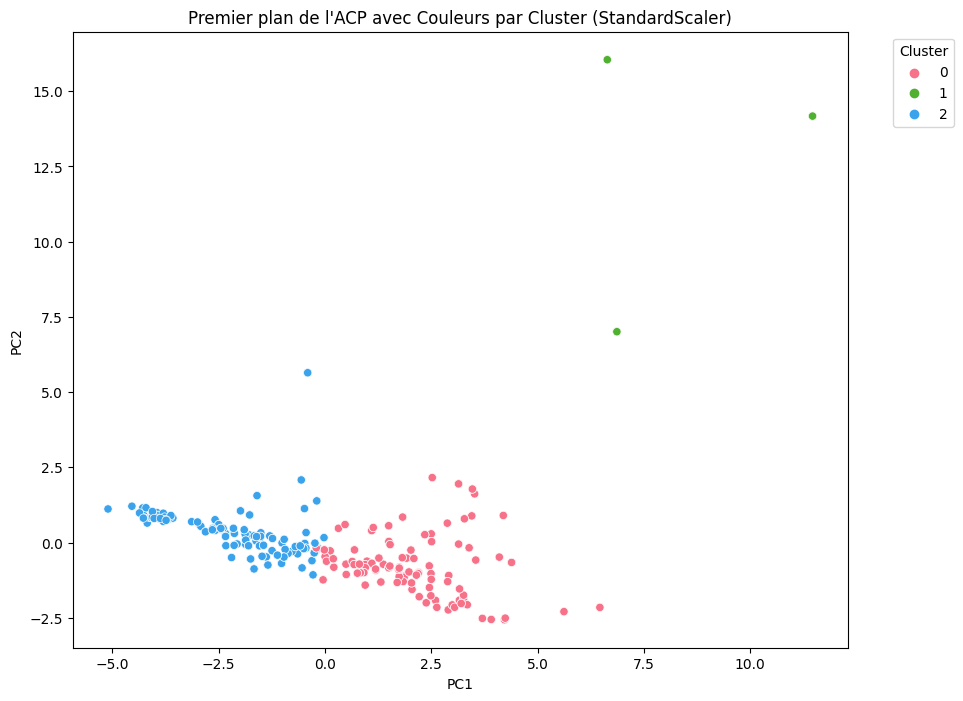

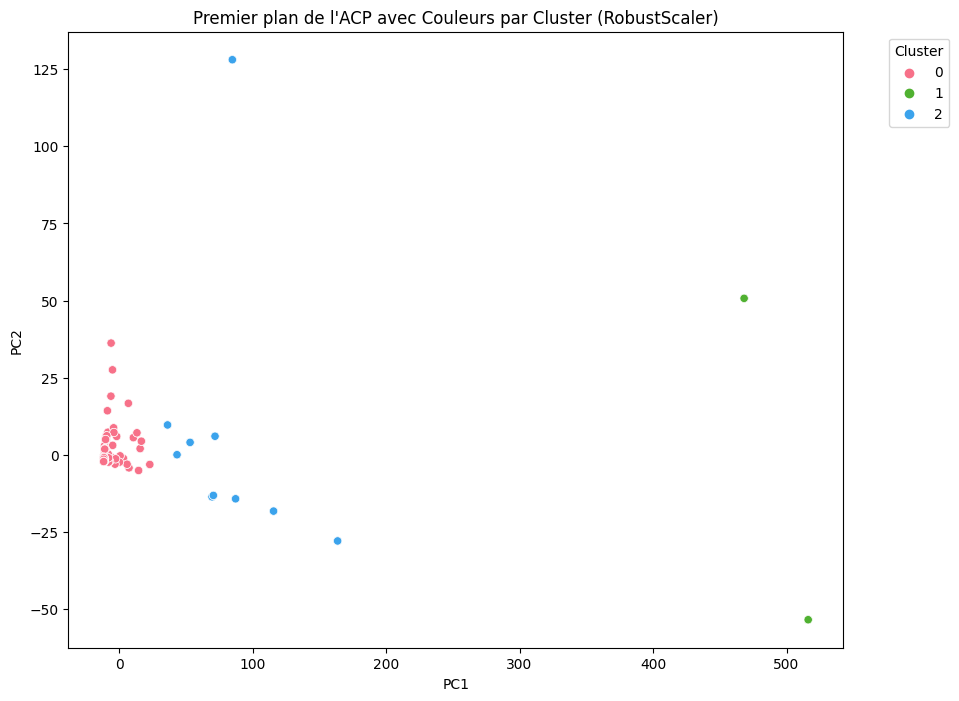

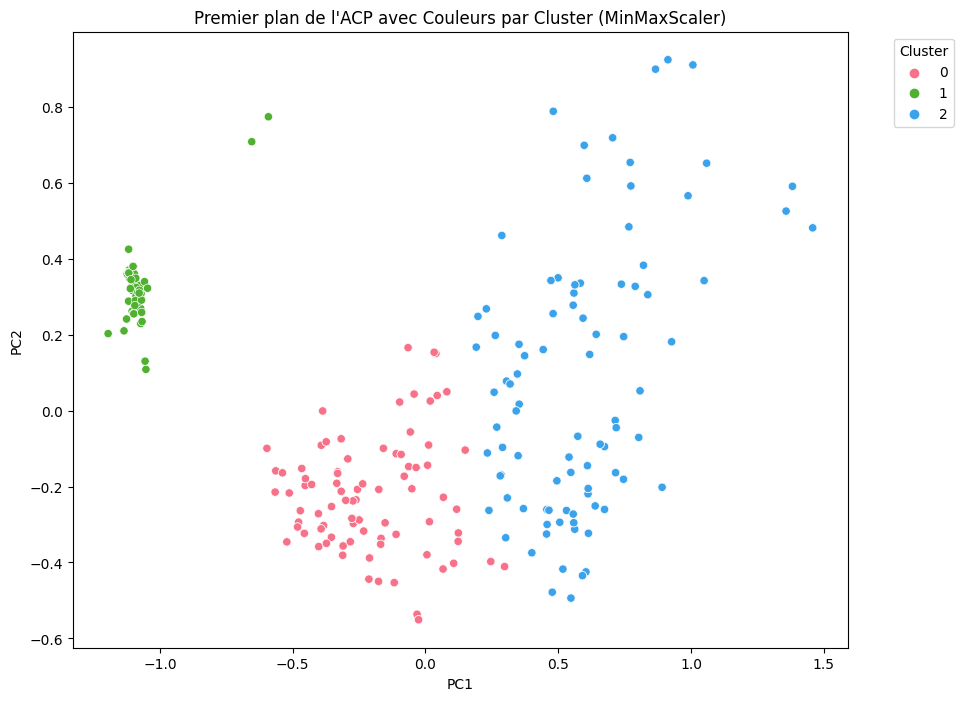

In [235]:
import matplotlib.pyplot as plt
import seaborn as sns

# Bouclez sur chaque méthode de mise à l'échelle
for i, scaler in enumerate(scalers):
    # Mise à l'échelle des données
    scaled_data = scaler.fit_transform(data_for_acp)
    
    # Créez un objet PCA
    pca = PCA(n_components=2)
    
    # Appliquez l'ACP aux données mises à l'échelle
    principal_components = pca.fit_transform(scaled_data)
    
    # Créez un DataFrame avec les composantes principales et les informations sur le cluster
    principal_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])
    principal_df['Cluster'] = kmeans_model.fit_predict(scaled_data)  # Remplacez par votre variable de cluster
    
    # Définissez une palette de couleurs (ici, nous utilisons une palette de seaborn)
    palette = sns.color_palette('husl', n_colors=len(principal_df['Cluster'].unique()))
    
    # Tracez le premier plan de l'ACP avec des couleurs différentes pour chaque cluster
    plt.figure(figsize=(10, 8))
    sns.scatterplot(data=principal_df, x='PC1', y='PC2', hue='Cluster', palette=palette)
    plt.title(f'Premier plan de l\'ACP avec Couleurs par Cluster ({type(scaler).__name__})')
    plt.xlabel('PC1')
    plt.ylabel('PC2')
    plt.legend(title='Cluster', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.show()


La dispersion est équilibrée dans les 2 directions des composantes principales => je pense garder que Min Max Scaler

### Regardons les éboulis des valeurs propres

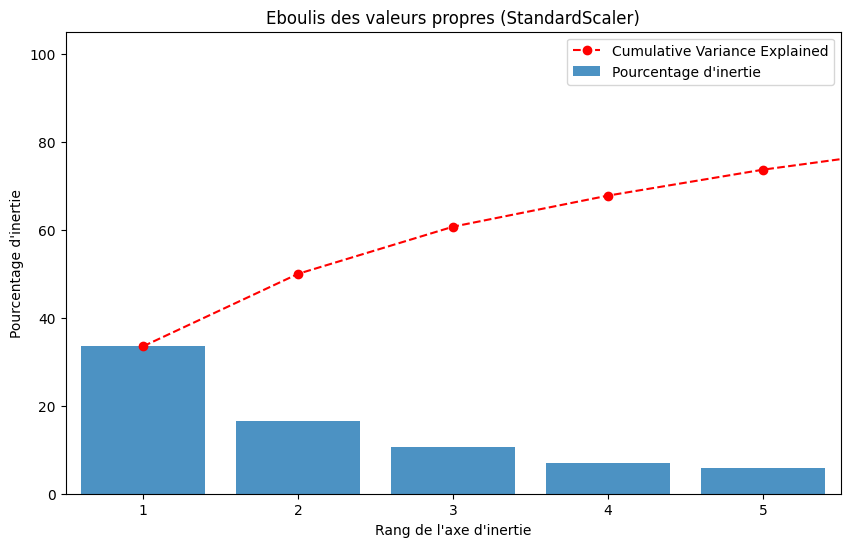

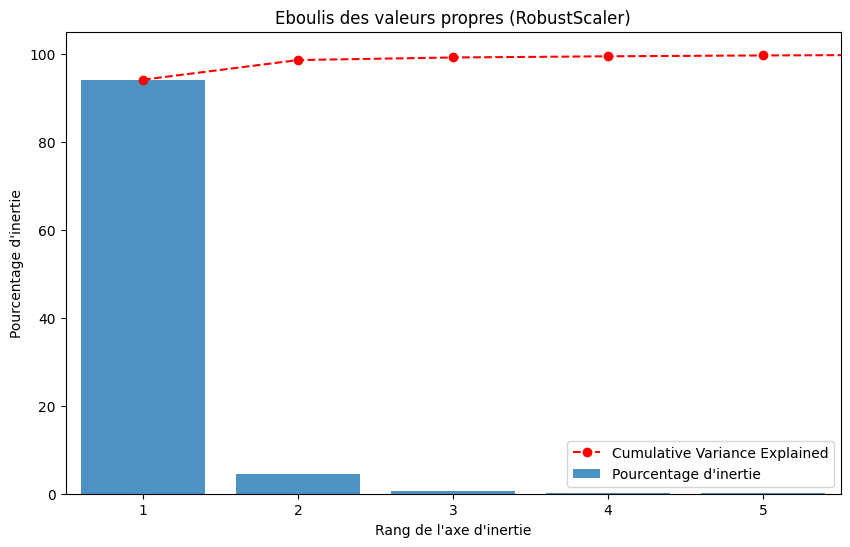

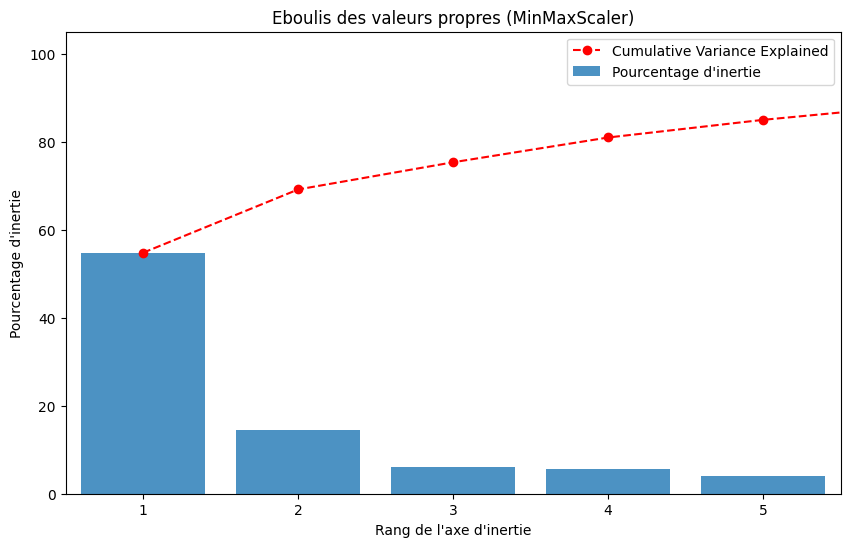

In [236]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler

# Définir les méthodes de mise à l'échelle
scalers = [StandardScaler(), RobustScaler(), MinMaxScaler()]

# Bouclez sur chaque méthode de mise à l'échelle
for scaler in scalers:
    # Mise à l'échelle des données avec la méthode de votre choix
    scaled_data = scaler.fit_transform(data_for_acp)

    # Appliquer l'ACP aux données mises à l'échelle
    pca = PCA()
    principal_components = pca.fit_transform(scaled_data)

    # Calculer les valeurs propres
    eigenvalues = pca.explained_variance_

    # Calculer la proportion de variance expliquée par chaque composante
    explained_variance_ratio = pca.explained_variance_ratio_

    # Plot des valeurs propres avec le rang de l'axe d'inertie sur l'axe des x
    plt.figure(figsize=(10, 6))
    plt.bar(range(1, len(eigenvalues) + 1), explained_variance_ratio * 100, alpha=0.8, align='center', label='Pourcentage d\'inertie')
    plt.plot(range(1, len(explained_variance_ratio) + 1), np.cumsum(explained_variance_ratio) * 100, color='red', marker='o', linestyle='--', label='Cumulative Variance Explained')
    plt.title(f'Eboulis des valeurs propres ({type(scaler).__name__})')
    plt.xlabel('Rang de l\'axe d\'inertie')
    plt.ylabel('Pourcentage d\'inertie')
    plt.legend()
    
    # Limiter l'axe x à 5
    plt.xlim(0.5, 5.5)
    
    plt.show()



On voit que finalement le robust scaler permet de mieux interpréter les résultats avec le premier plan de l'ACP.

Je ne vais prendre que Min Max Scaler maintenant

## Visualisons le Cercle de Corrélation 

### Avec MinMax Scaler

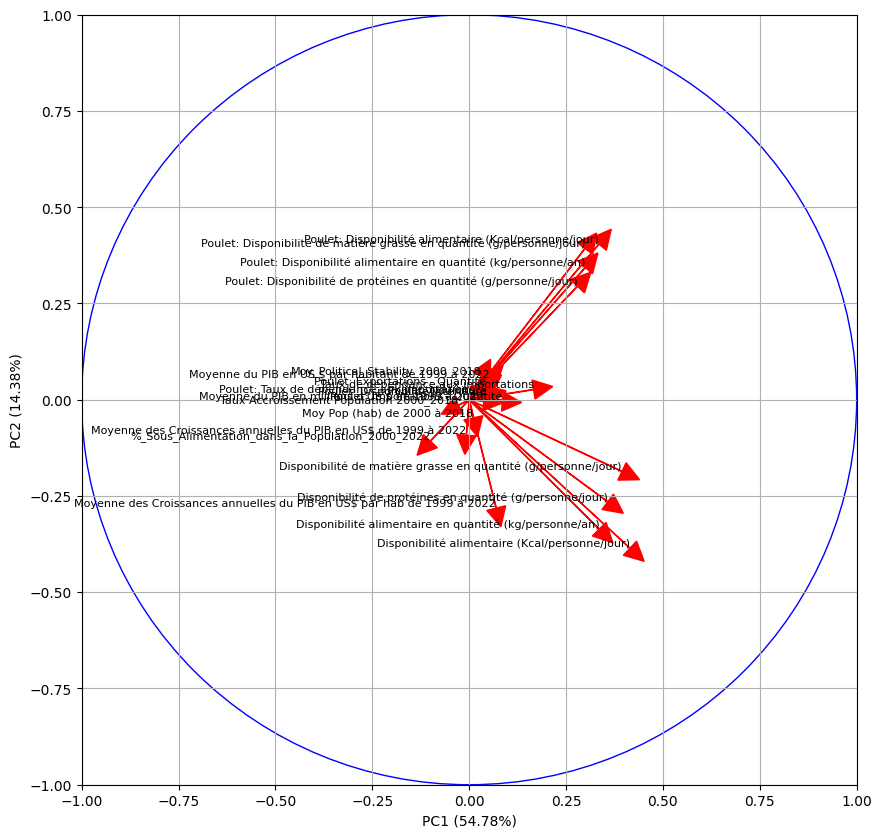

<Figure size 640x480 with 0 Axes>

In [237]:
import matplotlib.pyplot as plt
import numpy as np

# Calcul des composantes principales
pca.fit(scaled_data)
pcs = pca.components_

# Initialisation de la figure avec une taille agrandie
fig, ax = plt.subplots(figsize=(10, 10))

# Tracé du cercle unitaire
circle = plt.Circle((0, 0), 1, edgecolor='b', facecolor='none')
ax.add_patch(circle)

# Tracé des flèches pour chaque variable
for i, (pc1, pc2) in enumerate(zip(pcs[0, :], pcs[1, :])):
    ax.arrow(0, 0, pc1, pc2, head_width=0.05, head_length=0.05, fc='red', ec='red')
    ax.text(pc1, pc2, data_for_acp.columns[i], color='black', ha='right', va='bottom', fontsize=8)

# Définition des limites de l'axe
plt.xlim(-1, 1)
plt.ylim(-1, 1)

# Ajout des labels des axes avec pourcentage sur 100
plt.xlabel(f'PC1 ({round(pca.explained_variance_ratio_[0] * 100, 2)}%)')
plt.ylabel(f'PC2 ({round(pca.explained_variance_ratio_[1] * 100, 2)}%)')

# Ajout de la grille
plt.grid()

# Affichage
plt.show()
plt.savefig('H:\Mon Drive\Data_Analyst_Florentin_Marrouard\Projet 9   Produisez une étude de marché avec R ou Python\Graphique\Cercle des corrélations(F1 et F2).png')

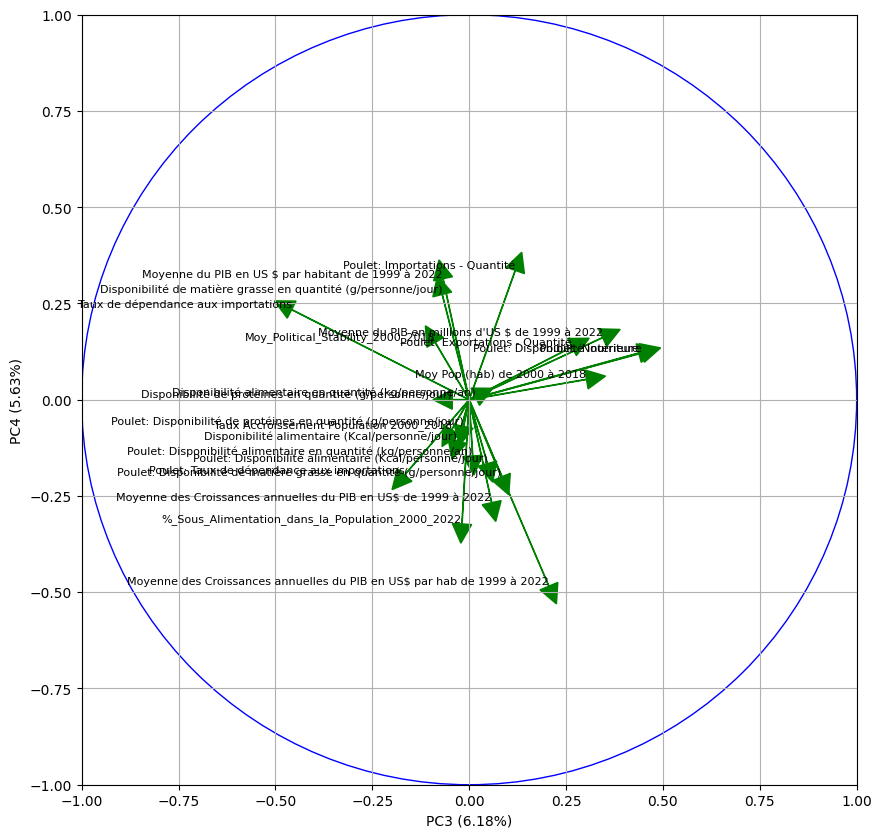

<Figure size 640x480 with 0 Axes>

In [238]:
# Calcul des composantes principales PC3 et PC4
pcs_3_4 = pcs[2:4, :]

# Initialisation de la figure avec une taille agrandie
fig, ax = plt.subplots(figsize=(10, 10))

# Tracé du cercle unitaire
circle = plt.Circle((0, 0), 1, edgecolor='b', facecolor='none')
ax.add_patch(circle)

# Tracé des flèches pour chaque variable
for i, (pc3, pc4) in enumerate(zip(pcs_3_4[0, :], pcs_3_4[1, :])):
    ax.arrow(0, 0, pc3, pc4, head_width=0.05, head_length=0.05, fc='green', ec='green')
    ax.text(pc3, pc4, data_for_acp.columns[i], color='black', ha='right', va='bottom', fontsize=8)

# Définition des limites de l'axe
plt.xlim(-1, 1)
plt.ylim(-1, 1)

# Ajout des labels des axes avec pourcentage sur 100
plt.xlabel(f'PC3 ({round(pca.explained_variance_ratio_[2] * 100, 2)}%)')
plt.ylabel(f'PC4 ({round(pca.explained_variance_ratio_[3] * 100, 2)}%)')

# Ajout de la grille
plt.grid()

# Affichage
plt.show()
plt.savefig('H:\Mon Drive\Data_Analyst_Florentin_Marrouard\Projet 9   Produisez une étude de marché avec R ou Python\Graphique\Cercle des corrélations(F3 et F4).png')

FC1: La population est-elle bien nourrie ? 

A droite oui à gauche non

Les disponibilités alimentaires en effet vont vers la droite et la flèche en bas à gauche % de population en sous-alimentation

FC2 La disponibilité de Poulet / La croissance 

En haut disponibilité alimentaire en poulet / en bas disponibilité alimentaire générale + La Croissance

Peut-être prioriser les pays en bas à doite ? 

In [239]:
# Définissez la variable pca_var_names avec les noms de vos variables
pca_var_names = Mother_Table_Clean_OK.columns

def find_smallest_arrow(pca, pca_var_names, component):
    """
    Identifie la variable dont la flèche est la plus petite sur un plan de l'ACP.

    Parameters:
    - pca: Objet PCA déjà ajusté aux données.
    - pca_var_names: Noms des variables.
    - component: Composante principale (plan) sur lequel rechercher la flèche la plus petite.

    Returns:
    - Nom de la variable dont la flèche est la plus petite.
    """
    # Obtenez les coordonnées des variables sur le cercle de corrélation pour la composante donnée
    coords = pca.components_[component - 1] * np.sqrt(pca.explained_variance_[component - 1])

    # Calculez la longueur de chaque flèche
    arrow_lengths = np.abs(coords)

    # Identifiez la variable dont la flèche est la plus petite
    smallest_arrow_var = pca_var_names[np.argmin(arrow_lengths)]

    return smallest_arrow_var

# Utilisez la fonction pour le premier plan (component=1)
result_first_plan = find_smallest_arrow(pca, pca_var_names, component=1)
print("La variable qui a la flèche la plus petite sur le 1er plan de l'ACP est :", result_first_plan)

# Utilisez la fonction pour le deuxième plan (component=2)
result_second_plan = find_smallest_arrow(pca, pca_var_names, component=2)
print("La variable qui a la flèche la plus petite sur le 2ème plan de l'ACP est :", result_second_plan)





La variable qui a la flèche la plus petite sur le 1er plan de l'ACP est : Moyenne des Croissances annuelles du PIB en US$ de 1999 à 2022
La variable qui a la flèche la plus petite sur le 2ème plan de l'ACP est : Moyenne du PIB en millions d'US $ de 1999 à 2022


### Regardons les pays sur les plans de l'ACP

### Avec MinMAx Scaler

In [240]:
data_for_acp_country

Moy Pop (hab) de 2000 à 2018  \
Pays                                           
Afghanistan                      28845766.58   
Afrique du Sud                   50901472.26   
Albanie                           2994856.32   
Algérie                          35858473.63   
Allemagne                        81527014.00   
...                                      ...   
Soudan (ex)                      39149837.00   
Soudan du Sud                    10636918.57   
Tokélaou                             1257.95   
Tonga                              101470.53   
Tuvalu                              10425.32   

                Taux Accroissement Population 2000_2018  \
Pays                                                      
Afghanistan                                        0.79   
Afrique du Sud                                     0.29   
Albanie                                           -0.08   
Algérie                                            0.36   
Allemagne                                          0.02   
...                                                 ...   
Soudan (ex)                                        0.35   
Soudan du Sud                                      0.09   
Tokélaou                                          -0.15   
Tonga                                              0.05   
Tuvalu                                             0.23   

                Disponibilité alimentaire (Kcal/personne/jour)  \
Pays                                                             
Afghanistan                                             1997.0   
Afrique du Sud                                          2987.0   
Albanie                                                 3400.0   
Algérie                                                 3345.0   
Allemagne                                               3559.0   
...                                                        ...   
Soudan (ex)                                                0.0   
Soudan du Sud                                              0.0   
Tokélaou                                                   0.0   
Tonga                                                      0.0   
Tuvalu                                                     0.0   

                Disponibilité alimentaire en quantité (kg/personne/an)  \
Pays                                                                     
Afghanistan                                                357.31        
Afrique du Sud                                             556.42        
Albanie                                                   1260.49        
Algérie                                                    798.71        
Allemagne                                                  943.24        
...                                                           ...        
Soudan (ex)                                                  0.00        
Soudan du Sud                                                0.00        
Tokélaou                                                     0.00        
Tonga                                                        0.00        
Tuvalu                                                       0.00        

                Disponibilité de matière grasse en quantité (g/personne/jour)  \
Pays                                                                            
Afghanistan                                                 30.63               
Afrique du Sud                                              81.92               
Albanie                                                    117.57               
Algérie                                                     79.62               
Allemagne                                                  147.96               
...                                                           ...               
Soudan (ex)                                                  0.00               
Soudan du Sud                                                0.00       

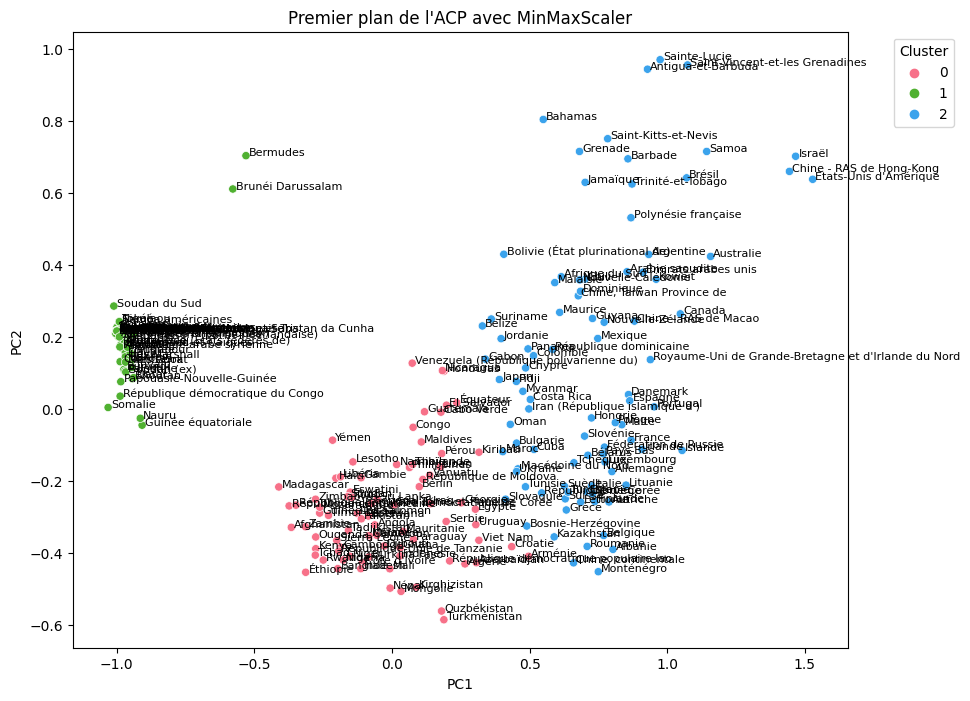

<Figure size 640x480 with 0 Axes>

In [241]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA

# Utilisez uniquement MinMaxScaler
scaler = MinMaxScaler()

# Mise à l'échelle des données avec MinMaxScaler
scaled_data = scaler.fit_transform(data_for_acp_country)

# Créez un objet PCA
pca = PCA(n_components=2)

# Appliquez l'ACP aux données mises à l'échelle
principal_components = pca.fit_transform(scaled_data)

# Créez un DataFrame avec les composantes principales et les informations sur le cluster
principal_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])
principal_df['Cluster'] = kmeans_model.fit_predict(scaled_data)  # Remplacez par votre variable de cluster
principal_df['Country'] = data_for_acp_country.index  # Ajoutez la colonne des noms des pays

# Palette de couleurs
palette = sns.color_palette('husl', n_colors=len(principal_df['Cluster'].unique()))

# Tracez le premier plan de l'ACP avec des couleurs différentes pour chaque cluster
plt.figure(figsize=(10, 8))
sns.scatterplot(data=principal_df, x='PC1', y='PC2', hue='Cluster', palette=palette)

# Ajoutez les noms des pays comme étiquettes de données
for i, country in enumerate(principal_df['Country']):
    plt.text(principal_df.iloc[i, 0] + 0.01, principal_df.iloc[i, 1], country, color='black', fontsize=8)

plt.title(f'Premier plan de l\'ACP avec MinMaxScaler')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend(title='Cluster', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()
plt.savefig('H:\Mon Drive\Data_Analyst_Florentin_Marrouard\Projet 9   Produisez une étude de marché avec R ou Python\Graphique\Premier_plan_de_l_ACP_avec_MinMaxScaler.png')

In [242]:
# Diviser le DataFrame principal en trois DataFrames en fonction du cluster
grouped_data = principal_df.rename(columns={'Country': 'Pays'}).groupby('Cluster')

# Créer un DataFrame pour chaque cluster
PC1_PC2_Cluster_1 = grouped_data.get_group(0)
PC1_PC2_Cluster_2 = grouped_data.get_group(1)
PC1_PC2_Cluster_3 = grouped_data.get_group(2)

In [243]:
PC1_PC2_Cluster_1 = PC1_PC2_Cluster_1[['Cluster', 'Pays']]
PC1_PC2_Cluster_1

Cluster                                    Pays
0          0                             Afghanistan
3          0                                 Algérie
5          0                                  Angola
9          0                                 Arménie
12         0                             Azerbaïdjan
..       ...                                     ...
169        0  Venezuela (République bolivarienne du)
170        0                                Viet Nam
171        0                                   Yémen
172        0                                  Zambie
173        0                                Zimbabwe

[82 rows x 2 columns]

In [244]:
PC1_PC2_Cluster_2 = PC1_PC2_Cluster_2[['Cluster', 'Pays']]
PC1_PC2_Cluster_2

Cluster                         Pays
20         1                     Bermudes
25         1            Brunéi Darussalam
174        1                      Andorre
175        1                     Anguilla
176        1  Antilles néerlandaises (ex)
..       ...                          ...
233        1                  Soudan (ex)
234        1                Soudan du Sud
235        1                     Tokélaou
236        1                        Tonga
237        1                       Tuvalu

[66 rows x 2 columns]

In [245]:
PC1_PC2_Cluster_3 = PC1_PC2_Cluster_3[['Cluster', 'Pays']]
PC1_PC2_Cluster_3

Cluster                Pays
1          2      Afrique du Sud
2          2             Albanie
4          2           Allemagne
6          2  Antigua-et-Barbuda
7          2     Arabie saoudite
..       ...                 ...
158        2            Tchéquie
162        2   Trinité-et-Tobago
163        2             Tunisie
165        2             Turquie
166        2             Ukraine

[90 rows x 2 columns]

In [246]:
PC1_PC2_Cluster_1_2 = pd.merge(PC1_PC2_Cluster_1, PC1_PC2_Cluster_2, on=['Cluster', 'Pays'], how='outer')
PC1_PC2_Cluster_all = pd.merge(PC1_PC2_Cluster_1_2, PC1_PC2_Cluster_3, on=['Cluster', 'Pays'], how='outer')

PC1_PC2_Cluster_all

Cluster               Pays
0          0        Afghanistan
1          0            Algérie
2          0             Angola
3          0            Arménie
4          0        Azerbaïdjan
..       ...                ...
233        2           Tchéquie
234        2  Trinité-et-Tobago
235        2            Tunisie
236        2            Turquie
237        2            Ukraine

[238 rows x 2 columns]

In [247]:
Mother_Table_Clean_Graphique

Pays  Moy Pop (hab) de 2000 à 2018  \
0       Afghanistan                   28845766.58   
2    Afrique du Sud                   50901472.26   
4           Albanie                    2994856.32   
6           Algérie                   35858473.63   
8         Allemagne                   81527014.00   
..              ...                           ...   
405     Soudan (ex)                   39149837.00   
406   Soudan du Sud                   10636918.57   
407        Tokélaou                       1257.95   
408           Tonga                     101470.53   
409          Tuvalu                      10425.32   

     Taux Accroissement Population 2000_2018  \
0                                       0.79   
2                                       0.29   
4                                      -0.08   
6                                       0.36   
8                                       0.02   
..                                       ...   
405                                     0.35   
406                                     0.09   
407                                    -0.15   
408                                     0.05   
409                                     0.23   

     Disponibilité alimentaire (Kcal/personne/jour)  \
0                                            1997.0   
2                                            2987.0   
4                                            3400.0   
6                                            3345.0   
8                                            3559.0   
..                                              ...   
405                                             0.0   
406                                             0.0   
407                                             0.0   
408                                             0.0   
409                                             0.0   

     Disponibilité alimentaire en quantité (kg/personne/an)  \
0                                               357.31        
2                                               556.42        
4                                              1260.49        
6                                               798.71        
8                                               943.24        
..                                                 ...        
405                                               0.00        
406                                               0.00        
407                                               0.00        
408                                               0.00        
409                                               0.00        

     Disponibilité de matière grasse en quantité (g/personne/jour)  \
0                                                30.63               
2                                                81.92               
4                                               117.57               
6                                                79.62               
8                                               147.96               
..                                                 ...               
405                                               0.00               
406                                               0.00               
407                                               0.00               
408                                               0.00               
409                                               0.00               

     Disponibilité de protéines en quantité (g/personne/jour)  \
0                                                54.09          
2                                                83.36          
4                                               119.50          
6                                                92.85          
8                                               104.07          
..                                                 ...          
405                                               0.00          
406                   

In [248]:
Mother_Table_Clean_Graphique_Cluster = pd.merge(Mother_Table_Clean_Graphique, PC1_PC2_Cluster_all, on='Pays', how='outer')

In [249]:
Mother_Table_Clean_Graphique_Cluster

Pays  Moy Pop (hab) de 2000 à 2018  \
0       Afghanistan                   28845766.58   
1    Afrique du Sud                   50901472.26   
2           Albanie                    2994856.32   
3           Algérie                   35858473.63   
4         Allemagne                   81527014.00   
..              ...                           ...   
233     Soudan (ex)                   39149837.00   
234   Soudan du Sud                   10636918.57   
235        Tokélaou                       1257.95   
236           Tonga                     101470.53   
237          Tuvalu                      10425.32   

     Taux Accroissement Population 2000_2018  \
0                                       0.79   
1                                       0.29   
2                                      -0.08   
3                                       0.36   
4                                       0.02   
..                                       ...   
233                                     0.35   
234                                     0.09   
235                                    -0.15   
236                                     0.05   
237                                     0.23   

     Disponibilité alimentaire (Kcal/personne/jour)  \
0                                            1997.0   
1                                            2987.0   
2                                            3400.0   
3                                            3345.0   
4                                            3559.0   
..                                              ...   
233                                             0.0   
234                                             0.0   
235                                             0.0   
236                                             0.0   
237                                             0.0   

     Disponibilité alimentaire en quantité (kg/personne/an)  \
0                                               357.31        
1                                               556.42        
2                                              1260.49        
3                                               798.71        
4                                               943.24        
..                                                 ...        
233                                               0.00        
234                                               0.00        
235                                               0.00        
236                                               0.00        
237                                               0.00        

     Disponibilité de matière grasse en quantité (g/personne/jour)  \
0                                                30.63               
1                                                81.92               
2                                               117.57               
3                                                79.62               
4                                               147.96               
..                                                 ...               
233                                               0.00               
234                                               0.00               
235                                               0.00               
236                                               0.00               
237                                               0.00               

     Disponibilité de protéines en quantité (g/personne/jour)  \
0                                                54.09          
1                                                83.36          
2                                               119.50          
3                                                92.85          
4                                               104.07          
..                                                 ...          
233                                               0.00          
234                   

In [250]:
verifier_nan(Mother_Table_Clean_Graphique_Cluster)

Nombre de Colonnes: 24
Nombre de Lignes: 238
Nombre total de NaN: 0


Présence de NaN  \
Pays                                                          False   
Moy Pop (hab) de 2000 à 2018                                  False   
Taux Accroissement Population 2000_2018                       False   
Disponibilité alimentaire (Kcal/personne/jour)                False   
Disponibilité alimentaire en quantité (kg/perso...            False   
Disponibilité de matière grasse en quantité (g/...            False   
Disponibilité de protéines en quantité (g/perso...            False   
Taux de dépendance aux importations                           False   
Poulet: Taux de dépendance aux importations                   False   
Poulet: Disponibilité alimentaire (Kcal/personn...            False   
Poulet: Disponibilité alimentaire en quantité (...            False   
Poulet: Disponibilité de matière grasse en quan...            False   
Poulet: Disponibilité de protéines en quantité ...            False   
Poulet: Disponibilité intérieure                              False   
Poulet: Exportations - Quantité                               False   
Poulet: Importations - Quantité                               False   
Poulet: Nourriture                                            False   
Moyenne des Croissances annuelles du PIB en US$...            False   
Moyenne des Croissances annuelles du PIB en US$...            False   
Moyenne du PIB en millions d'US $ de 1999 à 2022              False   
Moyenne du PIB en US $ par habitant de 1999 à 2022            False   
Moy_Political_Stability_2000_2018                             False   
%_Sous_Alimentation_dans_la_Population_2000_2022              False   
Cluster                                                       False   

                                                    Nombre de NaN  \
Pays                                                            0   
Moy Pop (hab) de 2000 à 2018                                    0   
Taux Accroissement Population 2000_2018                         0   
Disponibilité alimentaire (Kcal/personne/jour)                  0   
Disponibilité alimentaire en quantité (kg/perso...              0   
Disponibilité de matière grasse en quantité (g/...              0   
Disponibilité de protéines en quantité (g/perso...              0   
Taux de dépendance aux importations                             0   
Poulet: Taux de dépendance aux importations                     0   
Poulet: Disponibilité alimentaire (Kcal/personn...              0   
Poulet: Disponibilité alimentaire en quantité (...              0   
Poulet: Disponibilité de matière grasse en quan...              0   
Poulet: Disponibilité de protéines en quantité ...              0   
Poulet: Disponibilité intérieure                                0   
Poulet: Exportations - Quantité                                 0   
Poulet: Importations - Quantité                                 0   
Poulet: Nourriture                                              0   
Moyenne des Croissances annuelles du PIB en US$...              0   
Moyenne des Croissances annuelles du PIB en US$...              0   
Moyenne du PIB en millions d'US $ de 1999 à 2022                0   
Moyenne du PIB en US $ par habitant de 1999 à 2022              0   
Moy_Political_Stability_2000_2018                               0   
%_Sous_Alimentation_dans_la_Population_2000_2022                0   
Cluster                                                         0   

                                                   Type de Colonne  
Pays                                                        object  
Moy Pop (hab) de 2000 à 2018                               float64  
Taux Accroissement Population 2000_2018                    float64  
Disponibilité alimentaire (Kcal/personne/jour)             float64  
Disponibilité alimentaire en quantité (kg/perso...         float64  
Disponibilité de matière grasse en quantité (g/...         float64  
Disponibilité de protéines en quantité (g/perso...         float64 

In [251]:
Mother_Table_Clean_Graphique_Cluster

Pays  Moy Pop (hab) de 2000 à 2018  \
0       Afghanistan                   28845766.58   
1    Afrique du Sud                   50901472.26   
2           Albanie                    2994856.32   
3           Algérie                   35858473.63   
4         Allemagne                   81527014.00   
..              ...                           ...   
233     Soudan (ex)                   39149837.00   
234   Soudan du Sud                   10636918.57   
235        Tokélaou                       1257.95   
236           Tonga                     101470.53   
237          Tuvalu                      10425.32   

     Taux Accroissement Population 2000_2018  \
0                                       0.79   
1                                       0.29   
2                                      -0.08   
3                                       0.36   
4                                       0.02   
..                                       ...   
233                                     0.35   
234                                     0.09   
235                                    -0.15   
236                                     0.05   
237                                     0.23   

     Disponibilité alimentaire (Kcal/personne/jour)  \
0                                            1997.0   
1                                            2987.0   
2                                            3400.0   
3                                            3345.0   
4                                            3559.0   
..                                              ...   
233                                             0.0   
234                                             0.0   
235                                             0.0   
236                                             0.0   
237                                             0.0   

     Disponibilité alimentaire en quantité (kg/personne/an)  \
0                                               357.31        
1                                               556.42        
2                                              1260.49        
3                                               798.71        
4                                               943.24        
..                                                 ...        
233                                               0.00        
234                                               0.00        
235                                               0.00        
236                                               0.00        
237                                               0.00        

     Disponibilité de matière grasse en quantité (g/personne/jour)  \
0                                                30.63               
1                                                81.92               
2                                               117.57               
3                                                79.62               
4                                               147.96               
..                                                 ...               
233                                               0.00               
234                                               0.00               
235                                               0.00               
236                                               0.00               
237                                               0.00               

     Disponibilité de protéines en quantité (g/personne/jour)  \
0                                                54.09          
1                                                83.36          
2                                               119.50          
3                                                92.85          
4                                               104.07          
..                                                 ...          
233                                               0.00          
234                   

In [252]:
# Diviser le DataFrame principal en trois DataFrames en fonction du cluster
grouped_data_cluster = Mother_Table_Clean_Graphique_Cluster.groupby('Cluster')

# Créer un DataFrame pour chaque cluster
Mother_Table_Clean_Graphique_Cluster_1 = grouped_data_cluster.get_group(0)
Mother_Table_Clean_Graphique_Cluster_2 = grouped_data_cluster.get_group(1)
Mother_Table_Clean_Graphique_Cluster_3 = grouped_data_cluster.get_group(2)

In [253]:
Mother_Table_Clean_Graphique_Cluster_1

Pays  Moy Pop (hab) de 2000 à 2018  \
0                               Afghanistan                   28845766.58   
3                                   Algérie                   35858473.63   
5                                    Angola                   22917624.68   
9                                   Arménie                    2949849.05   
12                              Azerbaïdjan                    8975520.89   
..                                      ...                           ...   
169  Venezuela (République bolivarienne du)                   27706314.79   
170                                Viet Nam                   87385724.05   
171                                   Yémen                   22694117.05   
172                                  Zambie                   13492231.74   
173                                Zimbabwe                   12806372.53   

     Taux Accroissement Population 2000_2018  \
0                                       0.79   
3                                       0.36   
5                                       0.88   
9                                      -0.04   
12                                      0.22   
..                                       ...   
169                                     0.19   
170                                     0.20   
171                                     0.64   
172                                     0.67   
173                                     0.22   

     Disponibilité alimentaire (Kcal/personne/jour)  \
0                                            1997.0   
3                                            3345.0   
5                                            2266.0   
9                                            3072.0   
12                                           3102.0   
..                                              ...   
169                                          2247.0   
170                                          2938.0   
171                                          2062.0   
172                                          2008.0   
173                                          2167.0   

     Disponibilité alimentaire en quantité (kg/personne/an)  \
0                                               357.31        
3                                               798.71        
5                                               570.95        
9                                              1006.41        
12                                              792.07        
..                                                 ...        
169                                             534.05        
170                                             713.46        
171                                             302.47        
172                                             355.99        
173                                             337.97        

     Disponibilité de matière grasse en quantité (g/personne/jour)  \
0                                                30.63               
3                                                79.62               
5                                                48.73               
9                                                96.90               
12                                               58.91               
..                                                 ...               
169                                              64.85               
170                                              78.45               
171                                              38.98               
172                                              44.67               
173                                              57.04               

     Disponibilité de protéines en quantité (g/personne/jour)  \
0                                                54.09          
3                                                92.85          
5                                                54.09          
9                 

In [254]:
Mother_Table_Clean_Graphique_Cluster_2

Pays  Moy Pop (hab) de 2000 à 2018  \
20                      Bermudes                      64989.84   
25             Brunéi Darussalam                     383685.89   
174                      Andorre                      78052.63   
175                     Anguilla                      13158.26   
176  Antilles néerlandaises (ex)                     243869.68   
..                           ...                           ...   
233                  Soudan (ex)                   39149837.00   
234                Soudan du Sud                   10636918.57   
235                     Tokélaou                       1257.95   
236                        Tonga                     101470.53   
237                       Tuvalu                      10425.32   

     Taux Accroissement Population 2000_2018  \
20                                     -0.03   
25                                      0.29   
174                                     0.18   
175                                     0.31   
176                                     0.29   
..                                       ...   
233                                     0.35   
234                                     0.09   
235                                    -0.15   
236                                     0.05   
237                                     0.23   

     Disponibilité alimentaire (Kcal/personne/jour)  \
20                                              0.0   
25                                              0.0   
174                                             0.0   
175                                             0.0   
176                                             0.0   
..                                              ...   
233                                             0.0   
234                                             0.0   
235                                             0.0   
236                                             0.0   
237                                             0.0   

     Disponibilité alimentaire en quantité (kg/personne/an)  \
20                                                 0.0        
25                                                 0.0        
174                                                0.0        
175                                                0.0        
176                                                0.0        
..                                                 ...        
233                                                0.0        
234                                                0.0        
235                                                0.0        
236                                                0.0        
237                                                0.0        

     Disponibilité de matière grasse en quantité (g/personne/jour)  \
20                                                 0.0               
25                                                 0.0               
174                                                0.0               
175                                                0.0               
176                                                0.0               
..                                                 ...               
233                                                0.0               
234                                                0.0               
235                                                0.0               
236                                                0.0               
237                                                0.0               

     Disponibilité de protéines en quantité (g/personne/jour)  \
20                                                 0.0          
25                                                 0.0          
174                                                0.0          
175                                                0.0          
176                                                0.0          
..       

In [255]:
Mother_Table_Clean_Graphique_Cluster_3

Pays  Moy Pop (hab) de 2000 à 2018  \
1        Afrique du Sud                   50901472.26   
2               Albanie                    2994856.32   
4             Allemagne                   81527014.00   
6    Antigua-et-Barbuda                      86477.37   
7       Arabie saoudite                   26950353.53   
..                  ...                           ...   
158            Tchéquie                   10447783.74   
162   Trinité-et-Tobago                    1325239.42   
163             Tunisie                   10558774.32   
165             Turquie                   72055267.84   
166             Ukraine                   46191965.63   

     Taux Accroissement Population 2000_2018  \
1                                       0.29   
2                                      -0.08   
4                                       0.02   
6                                       0.27   
7                                       0.63   
..                                       ...   
158                                     0.04   
162                                     0.10   
163                                     0.19   
165                                     0.30   
166                                    -0.09   

     Disponibilité alimentaire (Kcal/personne/jour)  \
1                                            2987.0   
2                                            3400.0   
4                                            3559.0   
6                                            2429.0   
7                                            3194.0   
..                                              ...   
158                                          3275.0   
162                                          3039.0   
163                                          3469.0   
165                                          3538.0   
166                                          3033.0   

     Disponibilité alimentaire en quantité (kg/personne/an)  \
1                                               556.42        
2                                              1260.49        
4                                               943.24        
6                                               632.98        
7                                               546.35        
..                                                 ...        
158                                             869.22        
162                                             511.81        
163                                             864.04        
165                                             939.16        
166                                             855.42        

     Disponibilité de matière grasse en quantité (g/personne/jour)  \
1                                                81.92               
2                                               117.57               
4                                               147.96               
6                                                88.72               
7                                               103.08               
..                                                 ...               
158                                             141.68               
162                                              88.91               
163                                              98.32               
165                                             126.01               
166                                              79.42               

     Disponibilité de protéines en quantité (g/personne/jour)  \
1                                                83.36          
2                                               119.50          
4                                               104.07          
6                                                81.15          
7                                                87.51          
..                                                 ...          
158                                        

# IX) Heatmap Clusters VS Variables <a class="anchor" id="chapter9"></a>

## a) Préparations

Avec tous les clusters du k means pour Min Max Scaler

On veut : "Une heatmap avec les croisements entre les clusters de pays et les différentes variables (en format image), afin que je puisse tout de suite me faire une idée des différents groupes que tu auras définis"

In [256]:
Mother_Table_Clean_Graphique

Pays  Moy Pop (hab) de 2000 à 2018  \
0       Afghanistan                   28845766.58   
2    Afrique du Sud                   50901472.26   
4           Albanie                    2994856.32   
6           Algérie                   35858473.63   
8         Allemagne                   81527014.00   
..              ...                           ...   
405     Soudan (ex)                   39149837.00   
406   Soudan du Sud                   10636918.57   
407        Tokélaou                       1257.95   
408           Tonga                     101470.53   
409          Tuvalu                      10425.32   

     Taux Accroissement Population 2000_2018  \
0                                       0.79   
2                                       0.29   
4                                      -0.08   
6                                       0.36   
8                                       0.02   
..                                       ...   
405                                     0.35   
406                                     0.09   
407                                    -0.15   
408                                     0.05   
409                                     0.23   

     Disponibilité alimentaire (Kcal/personne/jour)  \
0                                            1997.0   
2                                            2987.0   
4                                            3400.0   
6                                            3345.0   
8                                            3559.0   
..                                              ...   
405                                             0.0   
406                                             0.0   
407                                             0.0   
408                                             0.0   
409                                             0.0   

     Disponibilité alimentaire en quantité (kg/personne/an)  \
0                                               357.31        
2                                               556.42        
4                                              1260.49        
6                                               798.71        
8                                               943.24        
..                                                 ...        
405                                               0.00        
406                                               0.00        
407                                               0.00        
408                                               0.00        
409                                               0.00        

     Disponibilité de matière grasse en quantité (g/personne/jour)  \
0                                                30.63               
2                                                81.92               
4                                               117.57               
6                                                79.62               
8                                               147.96               
..                                                 ...               
405                                               0.00               
406                                               0.00               
407                                               0.00               
408                                               0.00               
409                                               0.00               

     Disponibilité de protéines en quantité (g/personne/jour)  \
0                                                54.09          
2                                                83.36          
4                                               119.50          
6                                                92.85          
8                                               104.07          
..                                                 ...          
405                                               0.00          
406                   

Je vais afficher les groupes et les centrer et les réduire pour que sur la heat map les variables puissent être comparées

### minMax Scaler

In [257]:
Mother_Table_Clean_Graphique_Cluster_1

Pays  Moy Pop (hab) de 2000 à 2018  \
0                               Afghanistan                   28845766.58   
3                                   Algérie                   35858473.63   
5                                    Angola                   22917624.68   
9                                   Arménie                    2949849.05   
12                              Azerbaïdjan                    8975520.89   
..                                      ...                           ...   
169  Venezuela (République bolivarienne du)                   27706314.79   
170                                Viet Nam                   87385724.05   
171                                   Yémen                   22694117.05   
172                                  Zambie                   13492231.74   
173                                Zimbabwe                   12806372.53   

     Taux Accroissement Population 2000_2018  \
0                                       0.79   
3                                       0.36   
5                                       0.88   
9                                      -0.04   
12                                      0.22   
..                                       ...   
169                                     0.19   
170                                     0.20   
171                                     0.64   
172                                     0.67   
173                                     0.22   

     Disponibilité alimentaire (Kcal/personne/jour)  \
0                                            1997.0   
3                                            3345.0   
5                                            2266.0   
9                                            3072.0   
12                                           3102.0   
..                                              ...   
169                                          2247.0   
170                                          2938.0   
171                                          2062.0   
172                                          2008.0   
173                                          2167.0   

     Disponibilité alimentaire en quantité (kg/personne/an)  \
0                                               357.31        
3                                               798.71        
5                                               570.95        
9                                              1006.41        
12                                              792.07        
..                                                 ...        
169                                             534.05        
170                                             713.46        
171                                             302.47        
172                                             355.99        
173                                             337.97        

     Disponibilité de matière grasse en quantité (g/personne/jour)  \
0                                                30.63               
3                                                79.62               
5                                                48.73               
9                                                96.90               
12                                               58.91               
..                                                 ...               
169                                              64.85               
170                                              78.45               
171                                              38.98               
172                                              44.67               
173                                              57.04               

     Disponibilité de protéines en quantité (g/personne/jour)  \
0                                                54.09          
3                                                92.85          
5                                                54.09          
9                 

In [258]:
G1_MM = Mother_Table_Clean_Graphique_Cluster_1.groupby("Pays").mean()

G1_MM

Moy Pop (hab) de 2000 à 2018  \
Pays                                         
Afghanistan                    28845766.58   
Algérie                        35858473.63   
Angola                         22917624.68   
Arménie                         2949849.05   
Azerbaïdjan                     8975520.89   
...                                    ...   
Zimbabwe                       12806372.53   
Égypte                         82271869.00   
Équateur                       14797818.05   
Éthiopie                       86244558.89   
Îles Salomon                     522872.26   

              Taux Accroissement Population 2000_2018  \
Pays                                                    
Afghanistan                                      0.79   
Algérie                                          0.36   
Angola                                           0.88   
Arménie                                         -0.04   
Azerbaïdjan                                      0.22   
...                                               ...   
Zimbabwe                                         0.22   
Égypte                                           0.43   
Équateur                                         0.35   
Éthiopie                                         0.65   
Îles Salomon                                     0.58   

              Disponibilité alimentaire (Kcal/personne/jour)  \
Pays                                                           
Afghanistan                                           1997.0   
Algérie                                               3345.0   
Angola                                                2266.0   
Arménie                                               3072.0   
Azerbaïdjan                                           3102.0   
...                                                      ...   
Zimbabwe                                              2167.0   
Égypte                                                3315.0   
Équateur                                              2585.0   
Éthiopie                                              2304.0   
Îles Salomon                                          2410.0   

              Disponibilité alimentaire en quantité (kg/personne/an)  \
Pays                                                                   
Afghanistan                                              357.31        
Algérie                                                  798.71        
Angola                                                   570.95        
Arménie                                                 1006.41        
Azerbaïdjan                                              792.07        
...                                                         ...        
Zimbabwe                                                 337.97        
Égypte                                                   747.61        
Équateur                                                 563.62        
Éthiopie                                                 361.77        
Îles Salomon                                             659.79        

              Disponibilité de matière grasse en quantité (g/personne/jour)  \
Pays                                                                          
Afghanistan                                               30.63               
Algérie                                                   79.62               
Angola                                                    48.73               
Arménie                                                   96.90               
Azerbaïdjan                                               58.91               
...                                                         ...               
Zimbabwe                                                  57.04               
Égypte                                                    56.81               
Équateur                                                  89.24               
Éthiopie                          

In [259]:
# Pour centrer et réduite les données

X = G1_MM

std_scale = sklearn.preprocessing.MinMaxScaler().fit(X)
X_scaled_G1_MM = std_scale.transform(X)

X_scaled_G1_MM

array([[2.37137070e-02, 8.20754717e-01, 1.52734129e-01, ...,
        0.00000000e+00, 6.21994657e-01, 0.00000000e+00],
       [2.94988601e-02, 4.15094340e-01, 1.00000000e+00, ...,
        6.75824176e-01, 9.39447907e-02, 0.00000000e+00],
       [1.88232691e-02, 9.05660377e-01, 3.21810182e-01, ...,
        4.97252747e-01, 7.03250223e-01, 0.00000000e+00],
       ...,
       [1.21248109e-02, 4.05660377e-01, 5.22313011e-01, ...,
        6.75824176e-01, 3.41050757e-01, 0.00000000e+00],
       [7.10650080e-02, 6.88679245e-01, 3.45694532e-01, ...,
        6.75824176e-01, 5.99065004e-01, 0.00000000e+00],
       [3.48652803e-04, 6.22641509e-01, 4.12319296e-01, ...,
        6.75824176e-01, 3.71104185e-01, 0.00000000e+00]])

In [260]:
X_scaled_G1_MM_mean = X_scaled_G1_MM.mean(axis=0)

X_scaled_G1_MM_mean

array([0.03246848, 0.48136217, 0.49855897, 0.37353074, 0.41348767,
       0.46943149, 0.19384568, 0.41916819, 0.29884605, 0.35750903,
       0.25191195, 0.35624239, 0.06791094, 0.01339012, 0.07322263,
       0.07315428, 0.23128132, 0.4646762 , 0.06372797, 0.16270708,
       0.62134816, 0.38214278, 0.        ])

In [261]:
Mother_Table_Clean_Graphique_Cluster_2

Pays  Moy Pop (hab) de 2000 à 2018  \
20                      Bermudes                      64989.84   
25             Brunéi Darussalam                     383685.89   
174                      Andorre                      78052.63   
175                     Anguilla                      13158.26   
176  Antilles néerlandaises (ex)                     243869.68   
..                           ...                           ...   
233                  Soudan (ex)                   39149837.00   
234                Soudan du Sud                   10636918.57   
235                     Tokélaou                       1257.95   
236                        Tonga                     101470.53   
237                       Tuvalu                      10425.32   

     Taux Accroissement Population 2000_2018  \
20                                     -0.03   
25                                      0.29   
174                                     0.18   
175                                     0.31   
176                                     0.29   
..                                       ...   
233                                     0.35   
234                                     0.09   
235                                    -0.15   
236                                     0.05   
237                                     0.23   

     Disponibilité alimentaire (Kcal/personne/jour)  \
20                                              0.0   
25                                              0.0   
174                                             0.0   
175                                             0.0   
176                                             0.0   
..                                              ...   
233                                             0.0   
234                                             0.0   
235                                             0.0   
236                                             0.0   
237                                             0.0   

     Disponibilité alimentaire en quantité (kg/personne/an)  \
20                                                 0.0        
25                                                 0.0        
174                                                0.0        
175                                                0.0        
176                                                0.0        
..                                                 ...        
233                                                0.0        
234                                                0.0        
235                                                0.0        
236                                                0.0        
237                                                0.0        

     Disponibilité de matière grasse en quantité (g/personne/jour)  \
20                                                 0.0               
25                                                 0.0               
174                                                0.0               
175                                                0.0               
176                                                0.0               
..                                                 ...               
233                                                0.0               
234                                                0.0               
235                                                0.0               
236                                                0.0               
237                                                0.0               

     Disponibilité de protéines en quantité (g/personne/jour)  \
20                                                 0.0          
25                                                 0.0          
174                                                0.0          
175                                                0.0          
176                                                0.0          
..       

In [262]:
G2_MM = Mother_Table_Clean_Graphique_Cluster_2.groupby("Pays").mean()

G2_MM

Moy Pop (hab) de 2000 à 2018  \
Pays                                                        
Andorre                                          78052.63   
Anguilla                                         13158.26   
Antilles néerlandaises (ex)                     243869.68   
Aruba                                           100685.74   
Bahreïn                                        1116857.63   
...                                                   ...   
Îles Marshall                                    55650.16   
Îles Turques-et-Caïques                          30804.95   
Îles Vierges américaines                        106580.00   
Îles Vierges britanniques                        25890.47   
Îles Wallis-et-Futuna                            13431.47   

                             Taux Accroissement Population 2000_2018  \
Pays                                                                   
Andorre                                                         0.18   
Anguilla                                                        0.31   
Antilles néerlandaises (ex)                                     0.29   
Aruba                                                           0.17   
Bahreïn                                                         1.36   
...                                                              ...   
Îles Marshall                                                   0.15   
Îles Turques-et-Caïques                                         0.87   
Îles Vierges américaines                                       -0.04   
Îles Vierges britanniques                                       0.47   
Îles Wallis-et-Futuna                                          -0.21   

                             Disponibilité alimentaire (Kcal/personne/jour)  \
Pays                                                                          
Andorre                                                                 0.0   
Anguilla                                                                0.0   
Antilles néerlandaises (ex)                                             0.0   
Aruba                                                                   0.0   
Bahreïn                                                                 0.0   
...                                                                     ...   
Îles Marshall                                                           0.0   
Îles Turques-et-Caïques                                                 0.0   
Îles Vierges américaines                                                0.0   
Îles Vierges britanniques                                               0.0   
Îles Wallis-et-Futuna                                                   0.0   

                             Disponibilité alimentaire en quantité (kg/personne/an)  \
Pays                                                                                  
Andorre                                                                    0.0        
Anguilla                                                                   0.0        
Antilles néerlandaises (ex)                                                0.0        
Aruba                                                                      0.0        
Bahreïn                                                                    0.0        
...                                                                        ...        
Îles Marshall                                                              0.0        
Îles Turques-et-Caïques                                                    0.0        
Îles Vierges américaines                                                   0.0        
Îles Vierges britanniques                                                  0.0        
Îles Wallis-et-Futuna                                                      0.0        

                             Disponibilité de matière grasse en quantité (g/personne/jour)  \
Pays                                        

In [263]:
# Pour centrer et réduite les données

X = G2_MM

std_scale = sklearn.preprocessing.MinMaxScaler().fit(X)
X_scaled_G2_MM = std_scale.transform(X)

X_scaled_G2_MM

array([[1.21458703e-03, 9.97442455e-02, 0.00000000e+00, ...,
        5.72347267e-01, 0.00000000e+00, 0.00000000e+00],
       [1.94344459e-04, 1.32992327e-01, 0.00000000e+00, ...,
        5.72347267e-01, 1.53591682e-01, 0.00000000e+00],
       [3.82149444e-03, 1.27877238e-01, 0.00000000e+00, ...,
        5.72347267e-01, 1.53591682e-01, 0.00000000e+00],
       ...,
       [1.66308260e-03, 4.34782609e-02, 0.00000000e+00, ...,
        5.72347267e-01, 1.53591682e-01, 0.00000000e+00],
       [3.94515023e-04, 1.73913043e-01, 0.00000000e+00, ...,
        5.72347267e-01, 1.53591682e-01, 0.00000000e+00],
       [1.98639754e-04, 0.00000000e+00, 0.00000000e+00, ...,
        5.72347267e-01, 1.53591682e-01, 0.00000000e+00]])

In [264]:
X_scaled_G2_MM_mean = X_scaled_G2_MM.mean(axis=0)

X_scaled_G2_MM_mean

array([0.04788926, 0.12640471, 0.        , 0.        , 0.        ,
       0.        , 0.0241303 , 0.03030303, 0.03030303, 0.03030303,
       0.03030303, 0.03030303, 0.03030303, 0.03030303, 0.03030303,
       0.03030303, 0.0969682 , 0.32334932, 0.04869754, 0.09690577,
       0.57858326, 0.11874415, 0.        ])

In [265]:
Mother_Table_Clean_Graphique_Cluster_3

Pays  Moy Pop (hab) de 2000 à 2018  \
1        Afrique du Sud                   50901472.26   
2               Albanie                    2994856.32   
4             Allemagne                   81527014.00   
6    Antigua-et-Barbuda                      86477.37   
7       Arabie saoudite                   26950353.53   
..                  ...                           ...   
158            Tchéquie                   10447783.74   
162   Trinité-et-Tobago                    1325239.42   
163             Tunisie                   10558774.32   
165             Turquie                   72055267.84   
166             Ukraine                   46191965.63   

     Taux Accroissement Population 2000_2018  \
1                                       0.29   
2                                      -0.08   
4                                       0.02   
6                                       0.27   
7                                       0.63   
..                                       ...   
158                                     0.04   
162                                     0.10   
163                                     0.19   
165                                     0.30   
166                                    -0.09   

     Disponibilité alimentaire (Kcal/personne/jour)  \
1                                            2987.0   
2                                            3400.0   
4                                            3559.0   
6                                            2429.0   
7                                            3194.0   
..                                              ...   
158                                          3275.0   
162                                          3039.0   
163                                          3469.0   
165                                          3538.0   
166                                          3033.0   

     Disponibilité alimentaire en quantité (kg/personne/an)  \
1                                               556.42        
2                                              1260.49        
4                                               943.24        
6                                               632.98        
7                                               546.35        
..                                                 ...        
158                                             869.22        
162                                             511.81        
163                                             864.04        
165                                             939.16        
166                                             855.42        

     Disponibilité de matière grasse en quantité (g/personne/jour)  \
1                                                81.92               
2                                               117.57               
4                                               147.96               
6                                                88.72               
7                                               103.08               
..                                                 ...               
158                                             141.68               
162                                              88.91               
163                                              98.32               
165                                             126.01               
166                                              79.42               

     Disponibilité de protéines en quantité (g/personne/jour)  \
1                                                83.36          
2                                               119.50          
4                                               104.07          
6                                                81.15          
7                                                87.51          
..                                                 ...          
158                                        

In [266]:
G3_MM = Mother_Table_Clean_Graphique_Cluster_3.groupby("Pays").mean()

G3_MM

Moy Pop (hab) de 2000 à 2018  \
Pays                                                  
Afrique du Sud                         5.090147e+07   
Albanie                                2.994856e+06   
Allemagne                              8.152701e+07   
Antigua-et-Barbuda                     8.647737e+04   
Arabie saoudite                        2.695035e+07   
...                                             ...   
Tunisie                                1.055877e+07   
Turquie                                7.205527e+07   
Ukraine                                4.619197e+07   
Émirats arabes unis                    6.923823e+06   
États-Unis d'Amérique                  3.055111e+08   

                       Taux Accroissement Population 2000_2018  \
Pays                                                             
Afrique du Sud                                            0.29   
Albanie                                                  -0.08   
Allemagne                                                 0.02   
Antigua-et-Barbuda                                        0.27   
Arabie saoudite                                           0.63   
...                                                        ...   
Tunisie                                                   0.19   
Turquie                                                   0.30   
Ukraine                                                  -0.09   
Émirats arabes unis                                       2.07   
États-Unis d'Amérique                                     0.16   

                       Disponibilité alimentaire (Kcal/personne/jour)  \
Pays                                                                    
Afrique du Sud                                                 2987.0   
Albanie                                                        3400.0   
Allemagne                                                      3559.0   
Antigua-et-Barbuda                                             2429.0   
Arabie saoudite                                                3194.0   
...                                                               ...   
Tunisie                                                        3469.0   
Turquie                                                        3538.0   
Ukraine                                                        3033.0   
Émirats arabes unis                                            3370.0   
États-Unis d'Amérique                                          3762.0   

                       Disponibilité alimentaire en quantité (kg/personne/an)  \
Pays                                                                            
Afrique du Sud                                                    556.42        
Albanie                                                          1260.49        
Allemagne                                                         943.24        
Antigua-et-Barbuda                                                632.98        
Arabie saoudite                                                   546.35        
...                                                                  ...        
Tunisie                                                           864.04        
Turquie                                                           939.16        
Ukraine                                                           855.42        
Émirats arabes unis                                               627.67        
États-Unis d'Amérique                                             990.38        

                       Disponibilité de matière grasse en quantité (g/personne/jour)  \
Pays                                                                                   
Afrique du Sud                                                     81.92               
Albanie                                                           117.57               
Allemagne                                                         147.96               
Anti

In [267]:
# Pour centrer et réduite les données

X = G3_MM

std_scale = sklearn.preprocessing.MinMaxScaler().fit(X)
X_scaled_G3_MM = std_scale.transform(X)

X_scaled_G3_MM

array([[0.03737044, 0.21585903, 0.54661262, ..., 0.44313725, 0.2397689 ,
        0.        ],
       [0.0021652 , 0.05286344, 0.78575565, ..., 0.44313725, 0.27298989,
        0.        ],
       [0.0598763 , 0.0969163 , 0.87782281, ..., 0.44313725, 0.06018296,
        0.        ],
       ...,
       [0.03390955, 0.04845815, 0.57324841, ..., 0.17254902, 0.08762638,
        0.        ],
       [0.00505249, 1.        , 0.76838448, ..., 0.44313725, 0.2556572 ,
        0.        ],
       [0.224476  , 0.15859031, 0.99536769, ..., 0.44313725, 0.06018296,
        0.        ]])

In [268]:
X_scaled_G3_MM_mean = X_scaled_G3_MM.mean(axis=0)

X_scaled_G3_MM_mean

array([0.02852558, 0.17449829, 0.6363186 , 0.40748426, 0.51471261,
       0.41997099, 0.27385918, 0.71142629, 0.36767169, 0.3192027 ,
       0.32997433, 0.30146382, 0.0584967 , 0.0446523 , 0.12886394,
       0.05749388, 0.39605418, 0.41378364, 0.0449344 , 0.23501184,
       0.47115468, 0.18329321, 0.        ])

## b) Par clusters et par pays

### MinMax Scaler

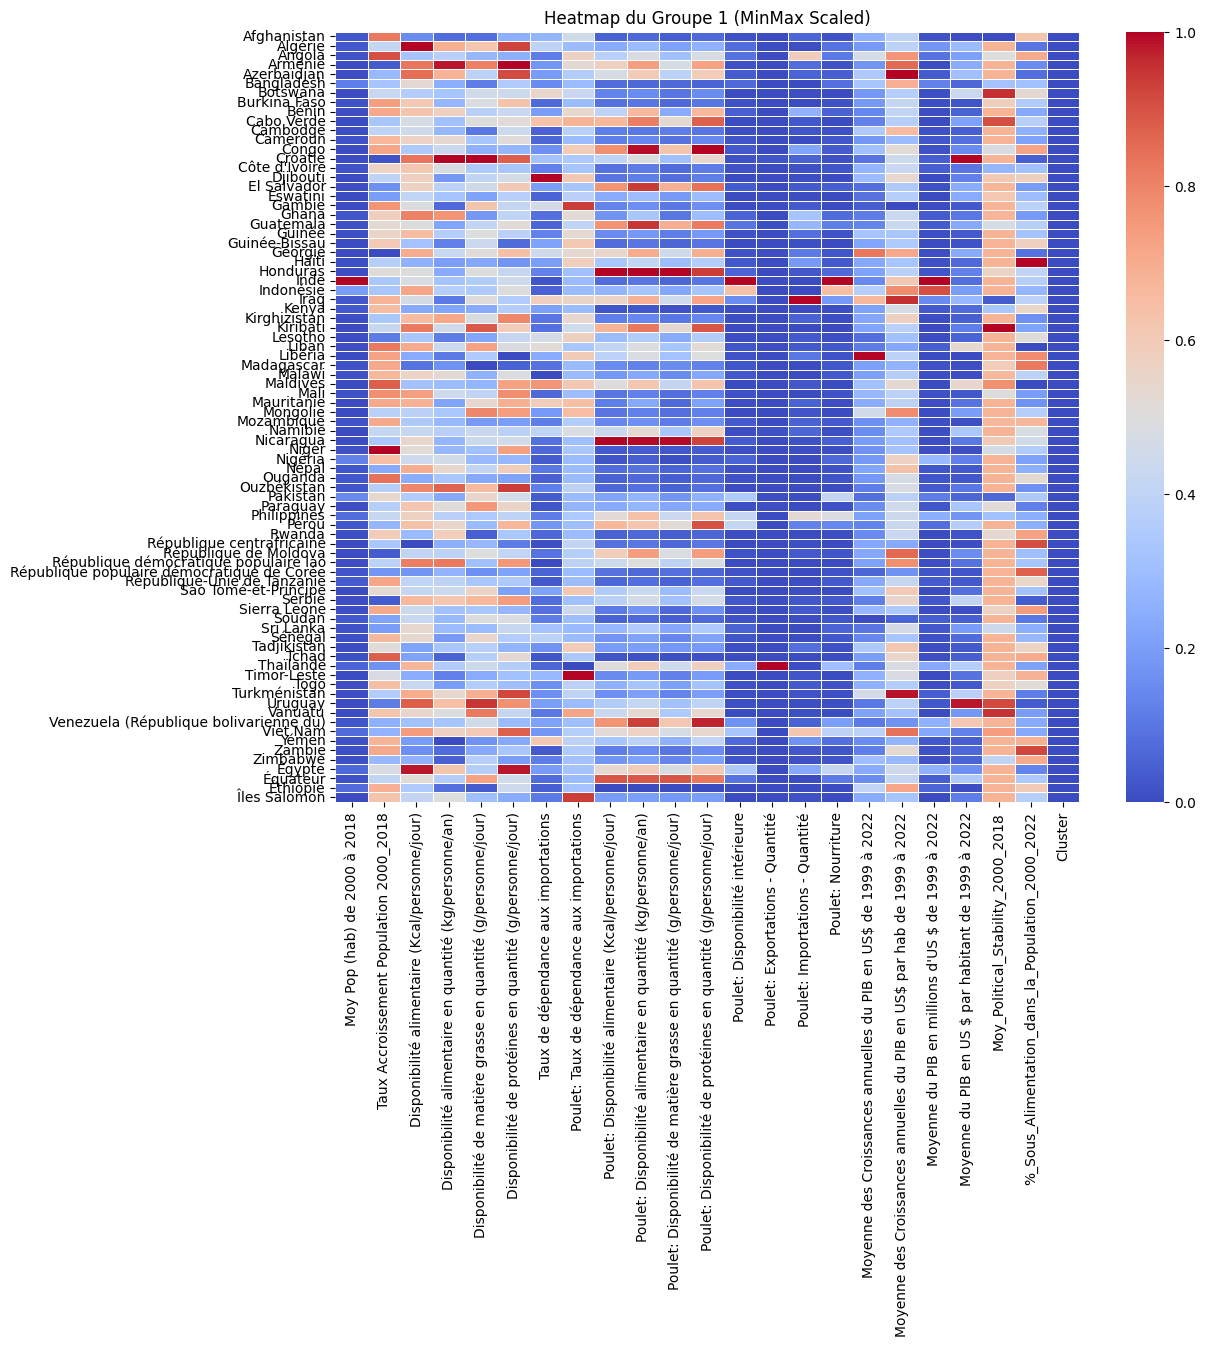

In [269]:
# Utilisez MinMaxScaler pour mettre à l'échelle les données
scaler = MinMaxScaler()
G1_MM_scaled = scaler.fit_transform(G1_MM)

# Créez une heatmap avec les données mises à l'échelle
plt.figure(figsize=(12, 10))
sns.heatmap(G1_MM_scaled, annot=False, cmap='coolwarm', fmt='.2f', linewidths=0.5, yticklabels=G1_MM.index, xticklabels=G1_MM.columns)
plt.title('Heatmap du Groupe 1 (MinMax Scaled)')
plt.show()


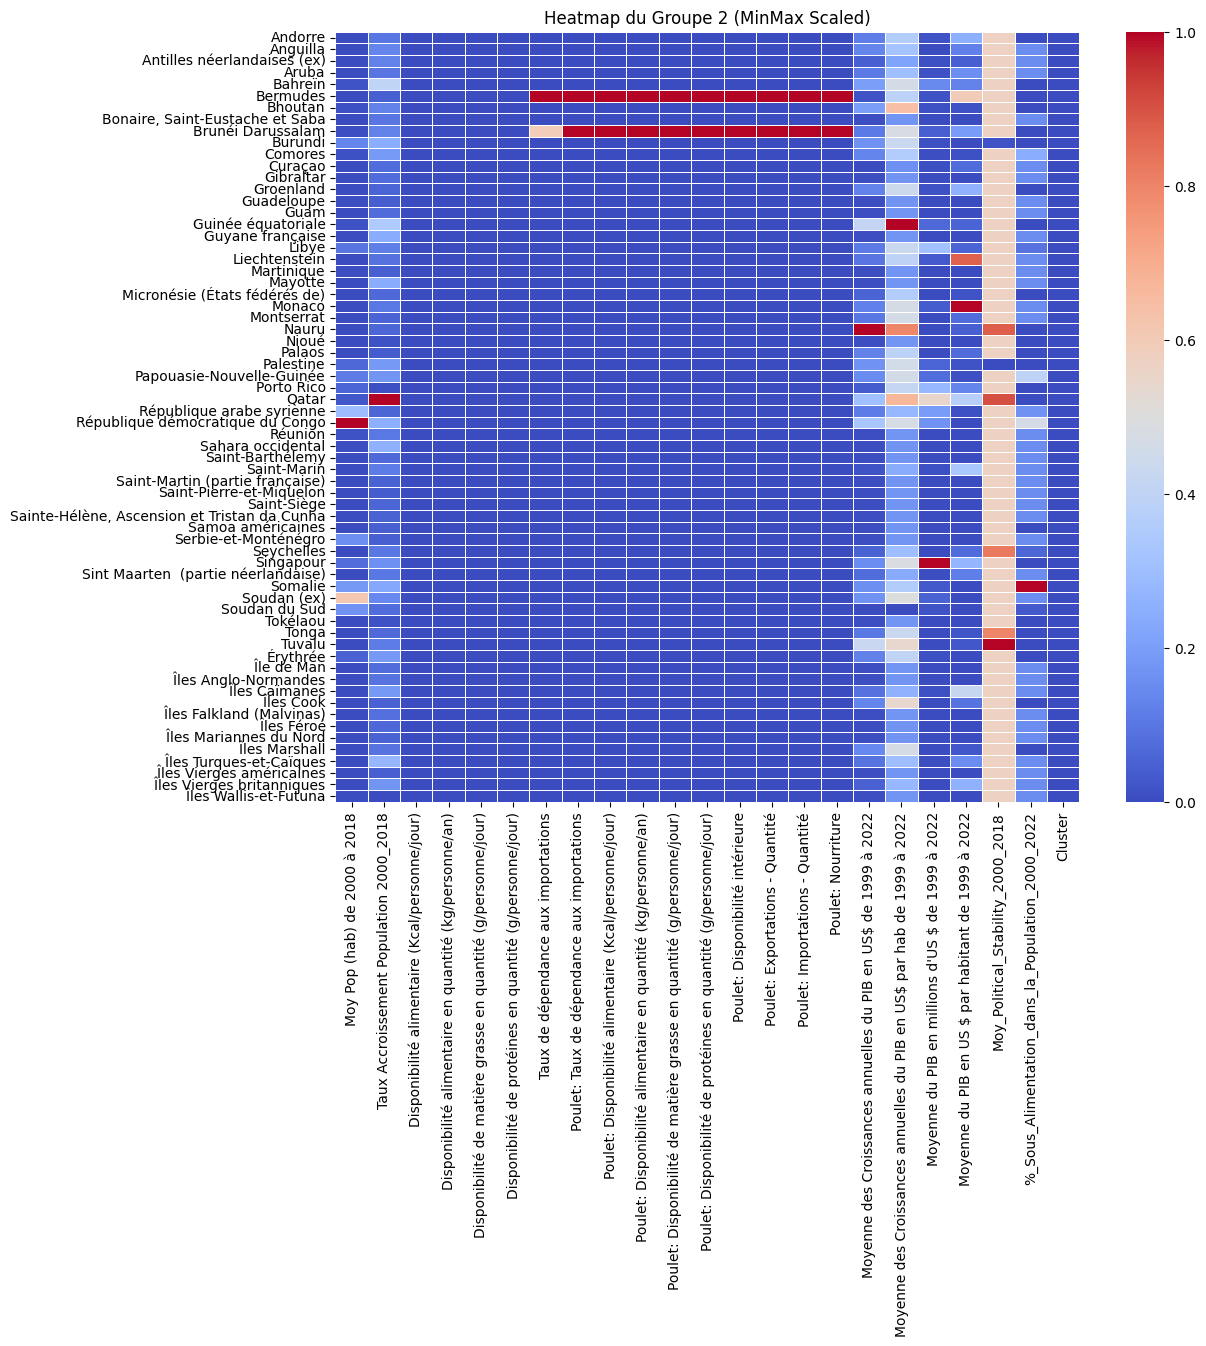

In [270]:
# Utilisez MinMaxScaler pour mettre à l'échelle les données
scaler = MinMaxScaler()
G2_MM_scaled = scaler.fit_transform(G2_MM)

# Créez une heatmap avec les données mises à l'échelle
plt.figure(figsize=(12, 10))
sns.heatmap(G2_MM_scaled, annot=False, cmap='coolwarm', fmt='.2f', linewidths=0.5, yticklabels=G2_MM.index, xticklabels=G2_MM.columns)
plt.title('Heatmap du Groupe 2 (MinMax Scaled)')
plt.show()

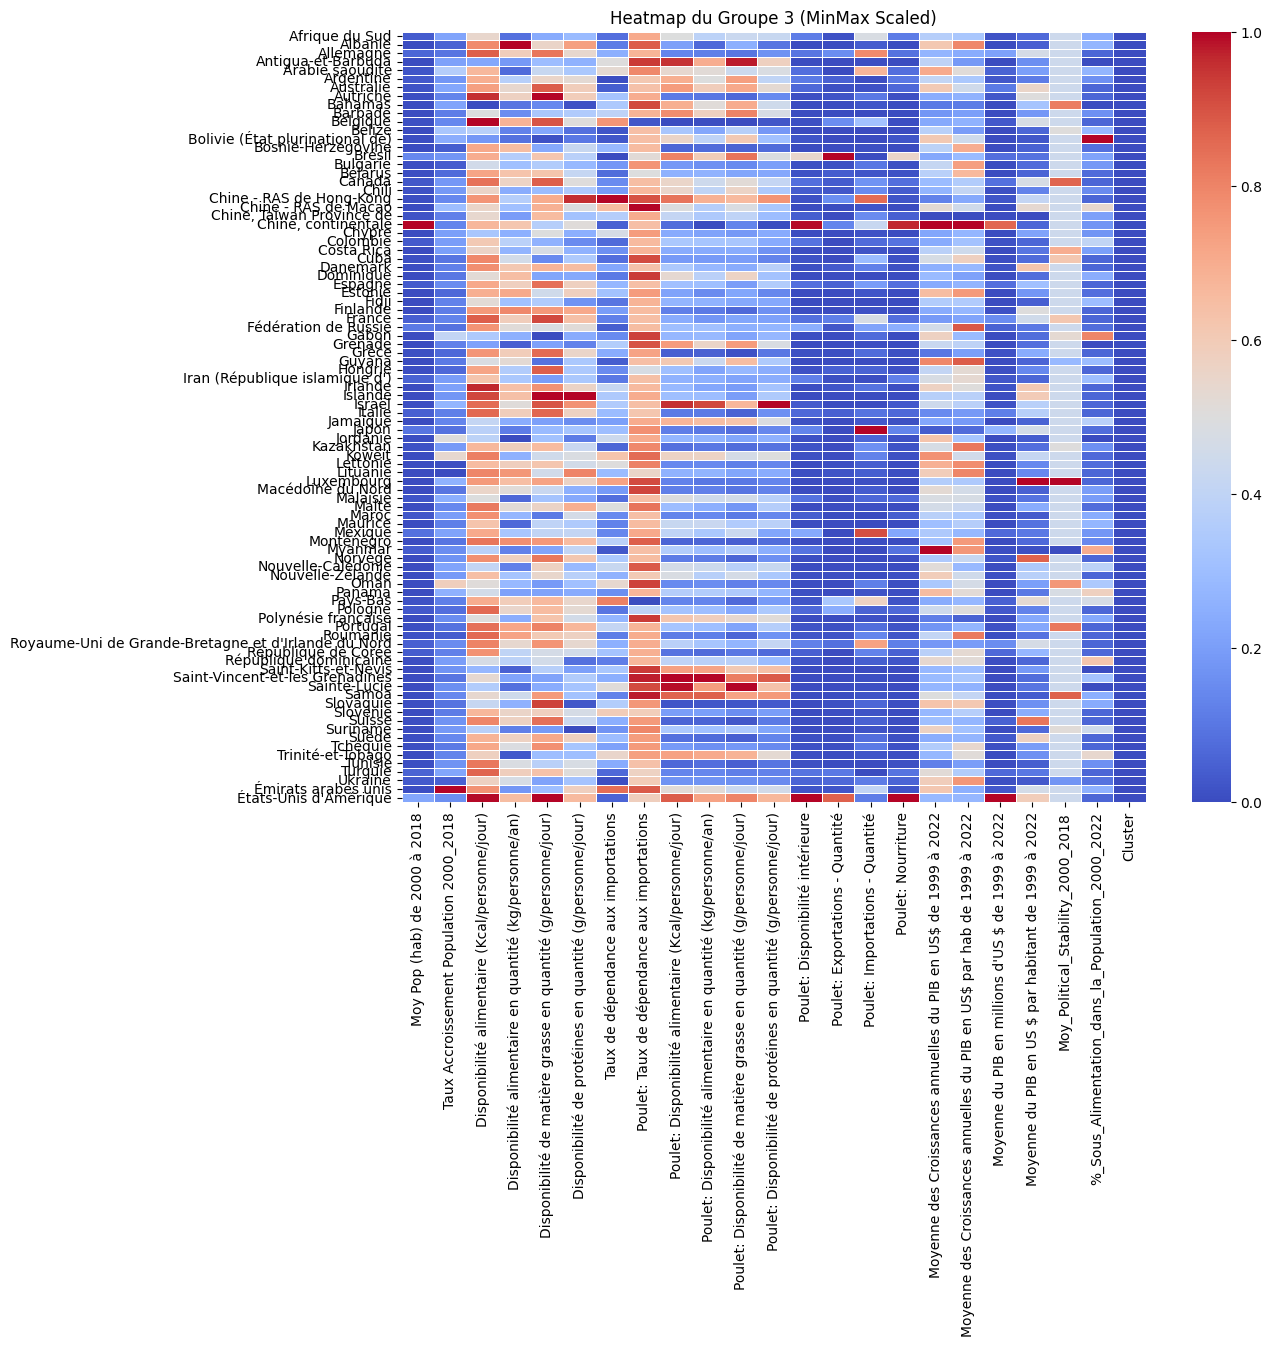

In [271]:
# Utilisez MinMaxScaler pour mettre à l'échelle les données
scaler = MinMaxScaler()
G3_MM_scaled = scaler.fit_transform(G3_MM)

# Créez une heatmap avec les données mises à l'échelle
plt.figure(figsize=(12, 10))
sns.heatmap(G3_MM_scaled, annot=False, cmap='coolwarm', fmt='.2f', linewidths=0.5, yticklabels=G3_MM.index, xticklabels=G3_MM.columns)
plt.title('Heatmap du Groupe 3 (MinMax Scaled)')
plt.show()

# c) Par Groupe

In [272]:
len(Mother_Table_Clean_Graphique.columns)

23

In [273]:
X_scaled_G1_MM_mean

array([0.03246848, 0.48136217, 0.49855897, 0.37353074, 0.41348767,
       0.46943149, 0.19384568, 0.41916819, 0.29884605, 0.35750903,
       0.25191195, 0.35624239, 0.06791094, 0.01339012, 0.07322263,
       0.07315428, 0.23128132, 0.4646762 , 0.06372797, 0.16270708,
       0.62134816, 0.38214278, 0.        ])

In [274]:
ar = [X_scaled_G1_MM_mean, X_scaled_G2_MM_mean, X_scaled_G3_MM_mean]

for idx, array in enumerate(ar, start=1):
    print(f"Length of array {idx}: {len(array)}")

Group_Total = pd.DataFrame(ar, 
                           index=["Centroïd Groupe 1 MinMax Scaler", 
                                  "Centroïd Groupe 2 MinMax Scaler", 
                                  "Centroïd Groupe 3 MinMax Scaler"],
                           columns=Mother_Table_Clean_Graphique.columns)

Group_Total = Group_Total.round(2)

Group_Total



Length of array 1: 23
Length of array 2: 23
Length of array 3: 23


Pays  Moy Pop (hab) de 2000 à 2018  \
Centroïd Groupe 1 MinMax Scaler  0.03                          0.48   
Centroïd Groupe 2 MinMax Scaler  0.05                          0.13   
Centroïd Groupe 3 MinMax Scaler  0.03                          0.17   

                                 Taux Accroissement Population 2000_2018  \
Centroïd Groupe 1 MinMax Scaler                                     0.50   
Centroïd Groupe 2 MinMax Scaler                                     0.00   
Centroïd Groupe 3 MinMax Scaler                                     0.64   

                                 Disponibilité alimentaire (Kcal/personne/jour)  \
Centroïd Groupe 1 MinMax Scaler                                            0.37   
Centroïd Groupe 2 MinMax Scaler                                            0.00   
Centroïd Groupe 3 MinMax Scaler                                            0.41   

                                 Disponibilité alimentaire en quantité (kg/personne/an)  \
Centroïd Groupe 1 MinMax Scaler                                               0.41        
Centroïd Groupe 2 MinMax Scaler                                               0.00        
Centroïd Groupe 3 MinMax Scaler                                               0.51        

                                 Disponibilité de matière grasse en quantité (g/personne/jour)  \
Centroïd Groupe 1 MinMax Scaler                                               0.47               
Centroïd Groupe 2 MinMax Scaler                                               0.00               
Centroïd Groupe 3 MinMax Scaler                                               0.42               

                                 Disponibilité de protéines en quantité (g/personne/jour)  \
Centroïd Groupe 1 MinMax Scaler                                               0.19          
Centroïd Groupe 2 MinMax Scaler                                               0.02          
Centroïd Groupe 3 MinMax Scaler                                               0.27          

                                 Taux de dépendance aux importations  \
Centroïd Groupe 1 MinMax Scaler                                 0.42   
Centroïd Groupe 2 MinMax Scaler                                 0.03   
Centroïd Groupe 3 MinMax Scaler                                 0.71   

                                 Poulet: Taux de dépendance aux importations  \
Centroïd Groupe 1 MinMax Scaler                                         0.30   
Centroïd Groupe 2 MinMax Scaler                                         0.03   
Centroïd Groupe 3 MinMax Scaler                                         0.37   

                                 Poulet: Disponibilité alimentaire (Kcal/personne/jour)  \
Centroïd Groupe 1 MinMax Scaler                                               0.36        
Centroïd Groupe 2 MinMax Scaler                                               0.03        
Centroïd Groupe 3 MinMax Scaler                                               0.32        

                                 ...  Poulet: Disponibilité intérieure  \
Centroïd Groupe 1 MinMax Scaler  ...                              0.01   
Centroïd Groupe 2 MinMax Scaler  ...                              0.03   
Centroïd Groupe 3 MinMax Scaler  ...                              0.04   

                                 Poulet: Exportations - Quantité  \
Centroïd Groupe 1 MinMax Scaler                             0.07   
Centroïd Groupe 2 MinMax Scaler                             0.03   
Centroïd Groupe 3 MinMax Scaler                             0.13   

                                 Poulet: Importations - Quantité  \
Centroïd Groupe 1 MinMax Scaler                             0.07   
Centroïd Groupe 2 MinMax Scaler                             0.03   
Centroïd Groupe 3 MinMax Scaler                             0.06   

                                 Poulet: Nourriture  \
Centroïd Groupe 1 MinMax Scaler                0.23   
Centroïd Groupe 2 MinMax Scaler                0.10

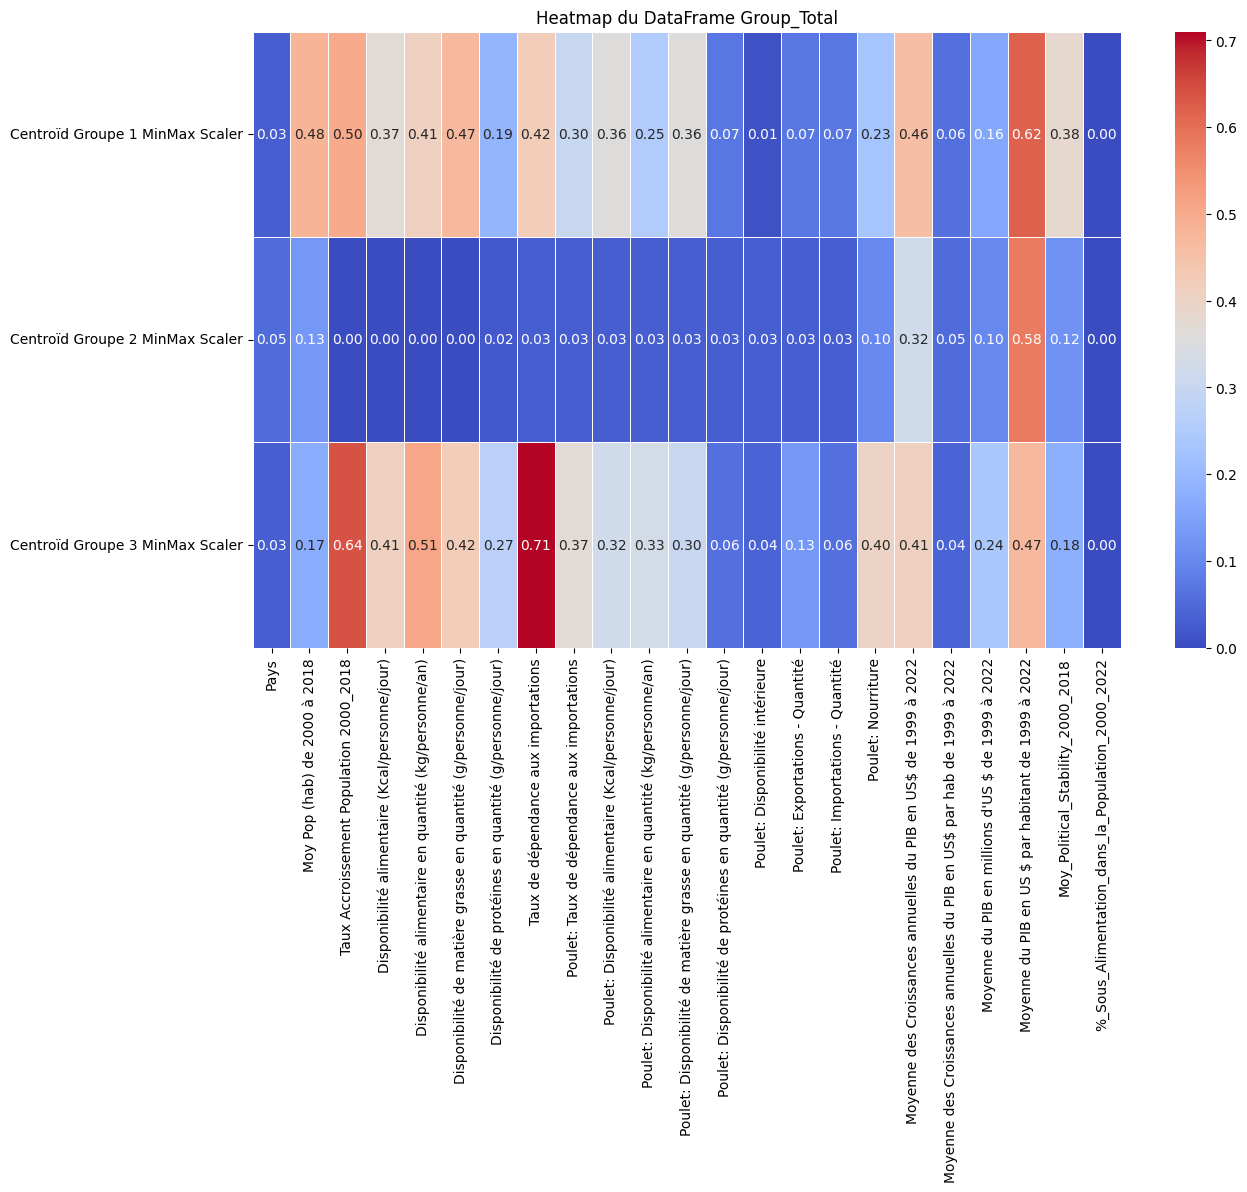

In [275]:
import seaborn as sns
import matplotlib.pyplot as plt

# Créer une heatmap à partir du DataFrame Group_Total
plt.figure(figsize=(14, 8))
sns.heatmap(Group_Total, annot=True, cmap="coolwarm", fmt=".2f", linewidths=.5)
plt.title("Heatmap du DataFrame Group_Total")
plt.show()


Le groupe 1 est le plus équilibré autour de 0 avec juste la moyenne du PIB très élevé.


Par variable:

Le taux d'accroissement de la population est plus élevé pour le groupe 2 ainsi que le groupe 3
Le taux de dépendances aux importations est plus élevé pour le groupe 2

La disponibilité alimentaire est élevée pour le groupe 2 et 3

Le taux de dépendance aux importation est plus élevé pour le groupe 2 et 3

Le taux de dépendance aux importations du poulet est quasiment égale entre le groupe 2 et 3 

Le groupe 3 à une stabilité politique plus élevé que les deux autres 


Je partirai sur le groupe 2 car il a une stabilité politique plus faible que le 3 avec le plus grand taux de dépendance aux importations de poulet 

Le groupe 1 pour moi s'élimine automatiquement car il n'a rien de remarquable en terme de croisssance et toutes les autres variables hormis le PIB

Le Groupe 2 correspond le mieux pour notre analyse ( ne pas se limiter à un seul pays)

# X) Recommandation <a class="anchor" id="chapter10"></a>

In [276]:
G2_MM

Moy Pop (hab) de 2000 à 2018  \
Pays                                                        
Andorre                                          78052.63   
Anguilla                                         13158.26   
Antilles néerlandaises (ex)                     243869.68   
Aruba                                           100685.74   
Bahreïn                                        1116857.63   
...                                                   ...   
Îles Marshall                                    55650.16   
Îles Turques-et-Caïques                          30804.95   
Îles Vierges américaines                        106580.00   
Îles Vierges britanniques                        25890.47   
Îles Wallis-et-Futuna                            13431.47   

                             Taux Accroissement Population 2000_2018  \
Pays                                                                   
Andorre                                                         0.18   
Anguilla                                                        0.31   
Antilles néerlandaises (ex)                                     0.29   
Aruba                                                           0.17   
Bahreïn                                                         1.36   
...                                                              ...   
Îles Marshall                                                   0.15   
Îles Turques-et-Caïques                                         0.87   
Îles Vierges américaines                                       -0.04   
Îles Vierges britanniques                                       0.47   
Îles Wallis-et-Futuna                                          -0.21   

                             Disponibilité alimentaire (Kcal/personne/jour)  \
Pays                                                                          
Andorre                                                                 0.0   
Anguilla                                                                0.0   
Antilles néerlandaises (ex)                                             0.0   
Aruba                                                                   0.0   
Bahreïn                                                                 0.0   
...                                                                     ...   
Îles Marshall                                                           0.0   
Îles Turques-et-Caïques                                                 0.0   
Îles Vierges américaines                                                0.0   
Îles Vierges britanniques                                               0.0   
Îles Wallis-et-Futuna                                                   0.0   

                             Disponibilité alimentaire en quantité (kg/personne/an)  \
Pays                                                                                  
Andorre                                                                    0.0        
Anguilla                                                                   0.0        
Antilles néerlandaises (ex)                                                0.0        
Aruba                                                                      0.0        
Bahreïn                                                                    0.0        
...                                                                        ...        
Îles Marshall                                                              0.0        
Îles Turques-et-Caïques                                                    0.0        
Îles Vierges américaines                                                   0.0        
Îles Vierges britanniques                                                  0.0        
Îles Wallis-et-Futuna                                                      0.0        

                             Disponibilité de matière grasse en quantité (g/personne/jour)  \
Pays                                        

In [277]:
Group_2_Min_Max_Scaler

Pays  Moy Pop (hab) de 2000 à 2018  \
4          Albanie                    2994856.32   
6          Algérie                   35858473.63   
8        Allemagne                   81527014.00   
10          Angola                   22917624.68   
16       Argentine                   40553959.74   
..             ...                           ...   
405    Soudan (ex)                   39149837.00   
406  Soudan du Sud                   10636918.57   
407       Tokélaou                       1257.95   
408          Tonga                     101470.53   
409         Tuvalu                      10425.32   

     Taux Accroissement Population 2000_2018  \
4                                      -0.08   
6                                       0.36   
8                                       0.02   
10                                      0.88   
16                                      0.20   
..                                       ...   
405                                     0.35   
406                                     0.09   
407                                    -0.15   
408                                     0.05   
409                                     0.23   

     Disponibilité alimentaire (Kcal/personne/jour)  \
4                                            3400.0   
6                                            3345.0   
8                                            3559.0   
10                                           2266.0   
16                                           3239.0   
..                                              ...   
405                                             0.0   
406                                             0.0   
407                                             0.0   
408                                             0.0   
409                                             0.0   

     Disponibilité alimentaire en quantité (kg/personne/an)  \
4                                              1260.49        
6                                               798.71        
8                                               943.24        
10                                              570.95        
16                                              776.64        
..                                                 ...        
405                                               0.00        
406                                               0.00        
407                                               0.00        
408                                               0.00        
409                                               0.00        

     Disponibilité de matière grasse en quantité (g/personne/jour)  \
4                                               117.57               
6                                                79.62               
8                                               147.96               
10                                               48.73               
16                                              117.12               
..                                                 ...               
405                                               0.00               
406                                               0.00               
407                                               0.00               
408                                               0.00               
409                                               0.00               

     Disponibilité de protéines en quantité (g/personne/jour)  \
4                                               119.50          
6                                                92.85          
8                                               104.07          
10                                               54.09          
16                                              102.66          
..                                                 ...          
405                                               0.00          
406                              

In [278]:
# On regarde par rapport aux taux de dépendance aux importations de poulet

Group_2_Min_Max_Scaler.sort_values(["Poulet: Taux de dépendance aux importations"],ascending= False).head(5)

Pays  Moy Pop (hab) de 2000 à 2018  \
318           Timor-Leste                    1073634.58   
144          Îles Salomon                     522872.26   
120                Gambie                    1762956.68   
334               Vanuatu                     233989.89   
66   Chine - RAS de Macao                     529416.95   

     Taux Accroissement Population 2000_2018  \
318                                     0.43   
144                                     0.58   
120                                     0.73   
334                                     0.58   
66                                      0.48   

     Disponibilité alimentaire (Kcal/personne/jour)  \
318                                          2142.0   
144                                          2410.0   
120                                          2542.0   
334                                          2623.0   
66                                           2999.0   

     Disponibilité alimentaire en quantité (kg/personne/an)  \
318                                             390.22        
144                                             659.79        
120                                             350.97        
334                                             655.88        
66                                              726.13        

     Disponibilité de matière grasse en quantité (g/personne/jour)  \
318                                              44.97               
144                                              50.95               
120                                              80.03               
334                                              98.26               
66                                              131.83               

     Disponibilité de protéines en quantité (g/personne/jour)  \
318                                              57.69          
144                                              53.64          
120                                              63.48          
334                                              63.72          
66                                              100.37          

     Taux de dépendance aux importations  \
318                                31.08   
144                                12.17   
120                                50.71   
334                                11.69   
66                                 97.80   

     Poulet: Taux de dépendance aux importations  \
318                                       220.00   
144                                       200.00   
120                                       200.00   
334                                       133.33   
66                                        121.05   

     Poulet: Disponibilité alimentaire (Kcal/personne/jour)  ...  \
318                                               14.0       ...   
144                                               18.0       ...   
120                                               12.0       ...   
334                                               40.0       ...   
66                                               142.0       ...   

     Poulet: Disponibilité intérieure  Poulet: Exportations - Quantité  \
318                               5.0                              0.0   
144                               3.0                              0.0   
120                               8.0                              0.0   
334                               3.0                              0.0   
66                               19.0                              0.0   

     Poulet: Importations - Quantité  Poulet: Nourriture  \
318                             11.0                 5.0   
144                              6.0                 3.0   
120                             16.0                 8.0   
334                              4.0                 3.0   
66                              23.0                21.0   

     Moyenne des Croissances annuelles du PIB en US$ de 1999 à

In [279]:
# On regarde par rapport aux taux de stabilité politique

Group_2_Min_Max_Scaler = Group_2_Min_Max_Scaler.loc[Group_2_Min_Max_Scaler['Poulet: Taux de dépendance aux importations'] != 0].sort_values(by="Moy_Political_Stability_2000_2018", ascending=False).head(5)
Group_2_Min_Max_Scaler

Pays  Moy Pop (hab) de 2000 à 2018  \
188  Luxembourg                     505092.42   
60       Canada                   33760630.37   
45     Botswana                    1938693.74   
334     Vanuatu                     233989.89   
26      Bahamas                     345386.95   

     Taux Accroissement Population 2000_2018  \
188                                     0.39   
60                                      0.21   
45                                      0.37   
334                                     0.58   
26                                      0.29   

     Disponibilité alimentaire (Kcal/personne/jour)  \
188                                          3334.0   
60                                           3492.0   
45                                           2338.0   
334                                          2623.0   
26                                           2043.0   

     Disponibilité alimentaire en quantité (kg/personne/an)  \
188                                             989.02        
60                                              923.86        
45                                              535.01        
334                                             655.88        
26                                              565.50        

     Disponibilité de matière grasse en quantité (g/personne/jour)  \
188                                             136.34               
60                                              153.12               
45                                               64.79               
334                                              98.26               
26                                               71.58               

     Disponibilité de protéines en quantité (g/personne/jour)  \
188                                             105.79          
60                                              101.33          
45                                               65.09          
334                                              63.72          
26                                               61.37          

     Taux de dépendance aux importations  \
188                               108.68   
60                                 23.53   
45                                 59.25   
334                                11.69   
26                                 51.94   

     Poulet: Taux de dépendance aux importations  \
188                                        90.91   
60                                          1.33   
45                                         42.86   
334                                       133.33   
26                                         92.31   

     Poulet: Disponibilité alimentaire (Kcal/personne/jour)  ...  \
188                                               69.0       ...   
60                                               154.0       ...   
45                                                12.0       ...   
334                                               40.0       ...   
26                                               182.0       ...   

     Poulet: Disponibilité intérieure  Poulet: Exportations - Quantité  \
188                              11.0                              1.0   
60                             1433.0                            163.0   
45                                7.0                              0.0   
334                               3.0                              0.0   
26                               26.0                              0.0   

     Poulet: Importations - Quantité  Poulet: Nourriture  \
188                             11.0                11.0   
60                             182.0              1433.0   
45                               3.0                 7.0   
334                              4.0                 3.0   
26                              24.0                16.0   

     Moyenne des Croissances annuelles du PIB en US$ de 1999 à 2022  \
188                                      

In [280]:
# On regarde qui a le plus gros PIB

Group_2_Min_Max_Scaler = Group_2_Min_Max_Scaler.loc[Group_2_Min_Max_Scaler['Poulet: Taux de dépendance aux importations'] != 0].sort_values(by="Moyenne du PIB en US $ par habitant de 1999 à 2022", ascending=False).head(5)
Group_2_Min_Max_Scaler

Pays  Moy Pop (hab) de 2000 à 2018  \
188  Luxembourg                     505092.42   
60       Canada                   33760630.37   
26      Bahamas                     345386.95   
45     Botswana                    1938693.74   
334     Vanuatu                     233989.89   

     Taux Accroissement Population 2000_2018  \
188                                     0.39   
60                                      0.21   
26                                      0.29   
45                                      0.37   
334                                     0.58   

     Disponibilité alimentaire (Kcal/personne/jour)  \
188                                          3334.0   
60                                           3492.0   
26                                           2043.0   
45                                           2338.0   
334                                          2623.0   

     Disponibilité alimentaire en quantité (kg/personne/an)  \
188                                             989.02        
60                                              923.86        
26                                              565.50        
45                                              535.01        
334                                             655.88        

     Disponibilité de matière grasse en quantité (g/personne/jour)  \
188                                             136.34               
60                                              153.12               
26                                               71.58               
45                                               64.79               
334                                              98.26               

     Disponibilité de protéines en quantité (g/personne/jour)  \
188                                             105.79          
60                                              101.33          
26                                               61.37          
45                                               65.09          
334                                              63.72          

     Taux de dépendance aux importations  \
188                               108.68   
60                                 23.53   
26                                 51.94   
45                                 59.25   
334                                11.69   

     Poulet: Taux de dépendance aux importations  \
188                                        90.91   
60                                          1.33   
26                                         92.31   
45                                         42.86   
334                                       133.33   

     Poulet: Disponibilité alimentaire (Kcal/personne/jour)  ...  \
188                                               69.0       ...   
60                                               154.0       ...   
26                                               182.0       ...   
45                                                12.0       ...   
334                                               40.0       ...   

     Poulet: Disponibilité intérieure  Poulet: Exportations - Quantité  \
188                              11.0                              1.0   
60                             1433.0                            163.0   
26                               26.0                              0.0   
45                                7.0                              0.0   
334                               3.0                              0.0   

     Poulet: Importations - Quantité  Poulet: Nourriture  \
188                             11.0                11.0   
60                             182.0              1433.0   
26                              24.0                16.0   
45                               3.0                 7.0   
334                              4.0                 3.0   

     Moyenne des Croissances annuelles du PIB en US$ de 1999 à 2022  \
188                                      

Il y a 66 pays dans ce groupe


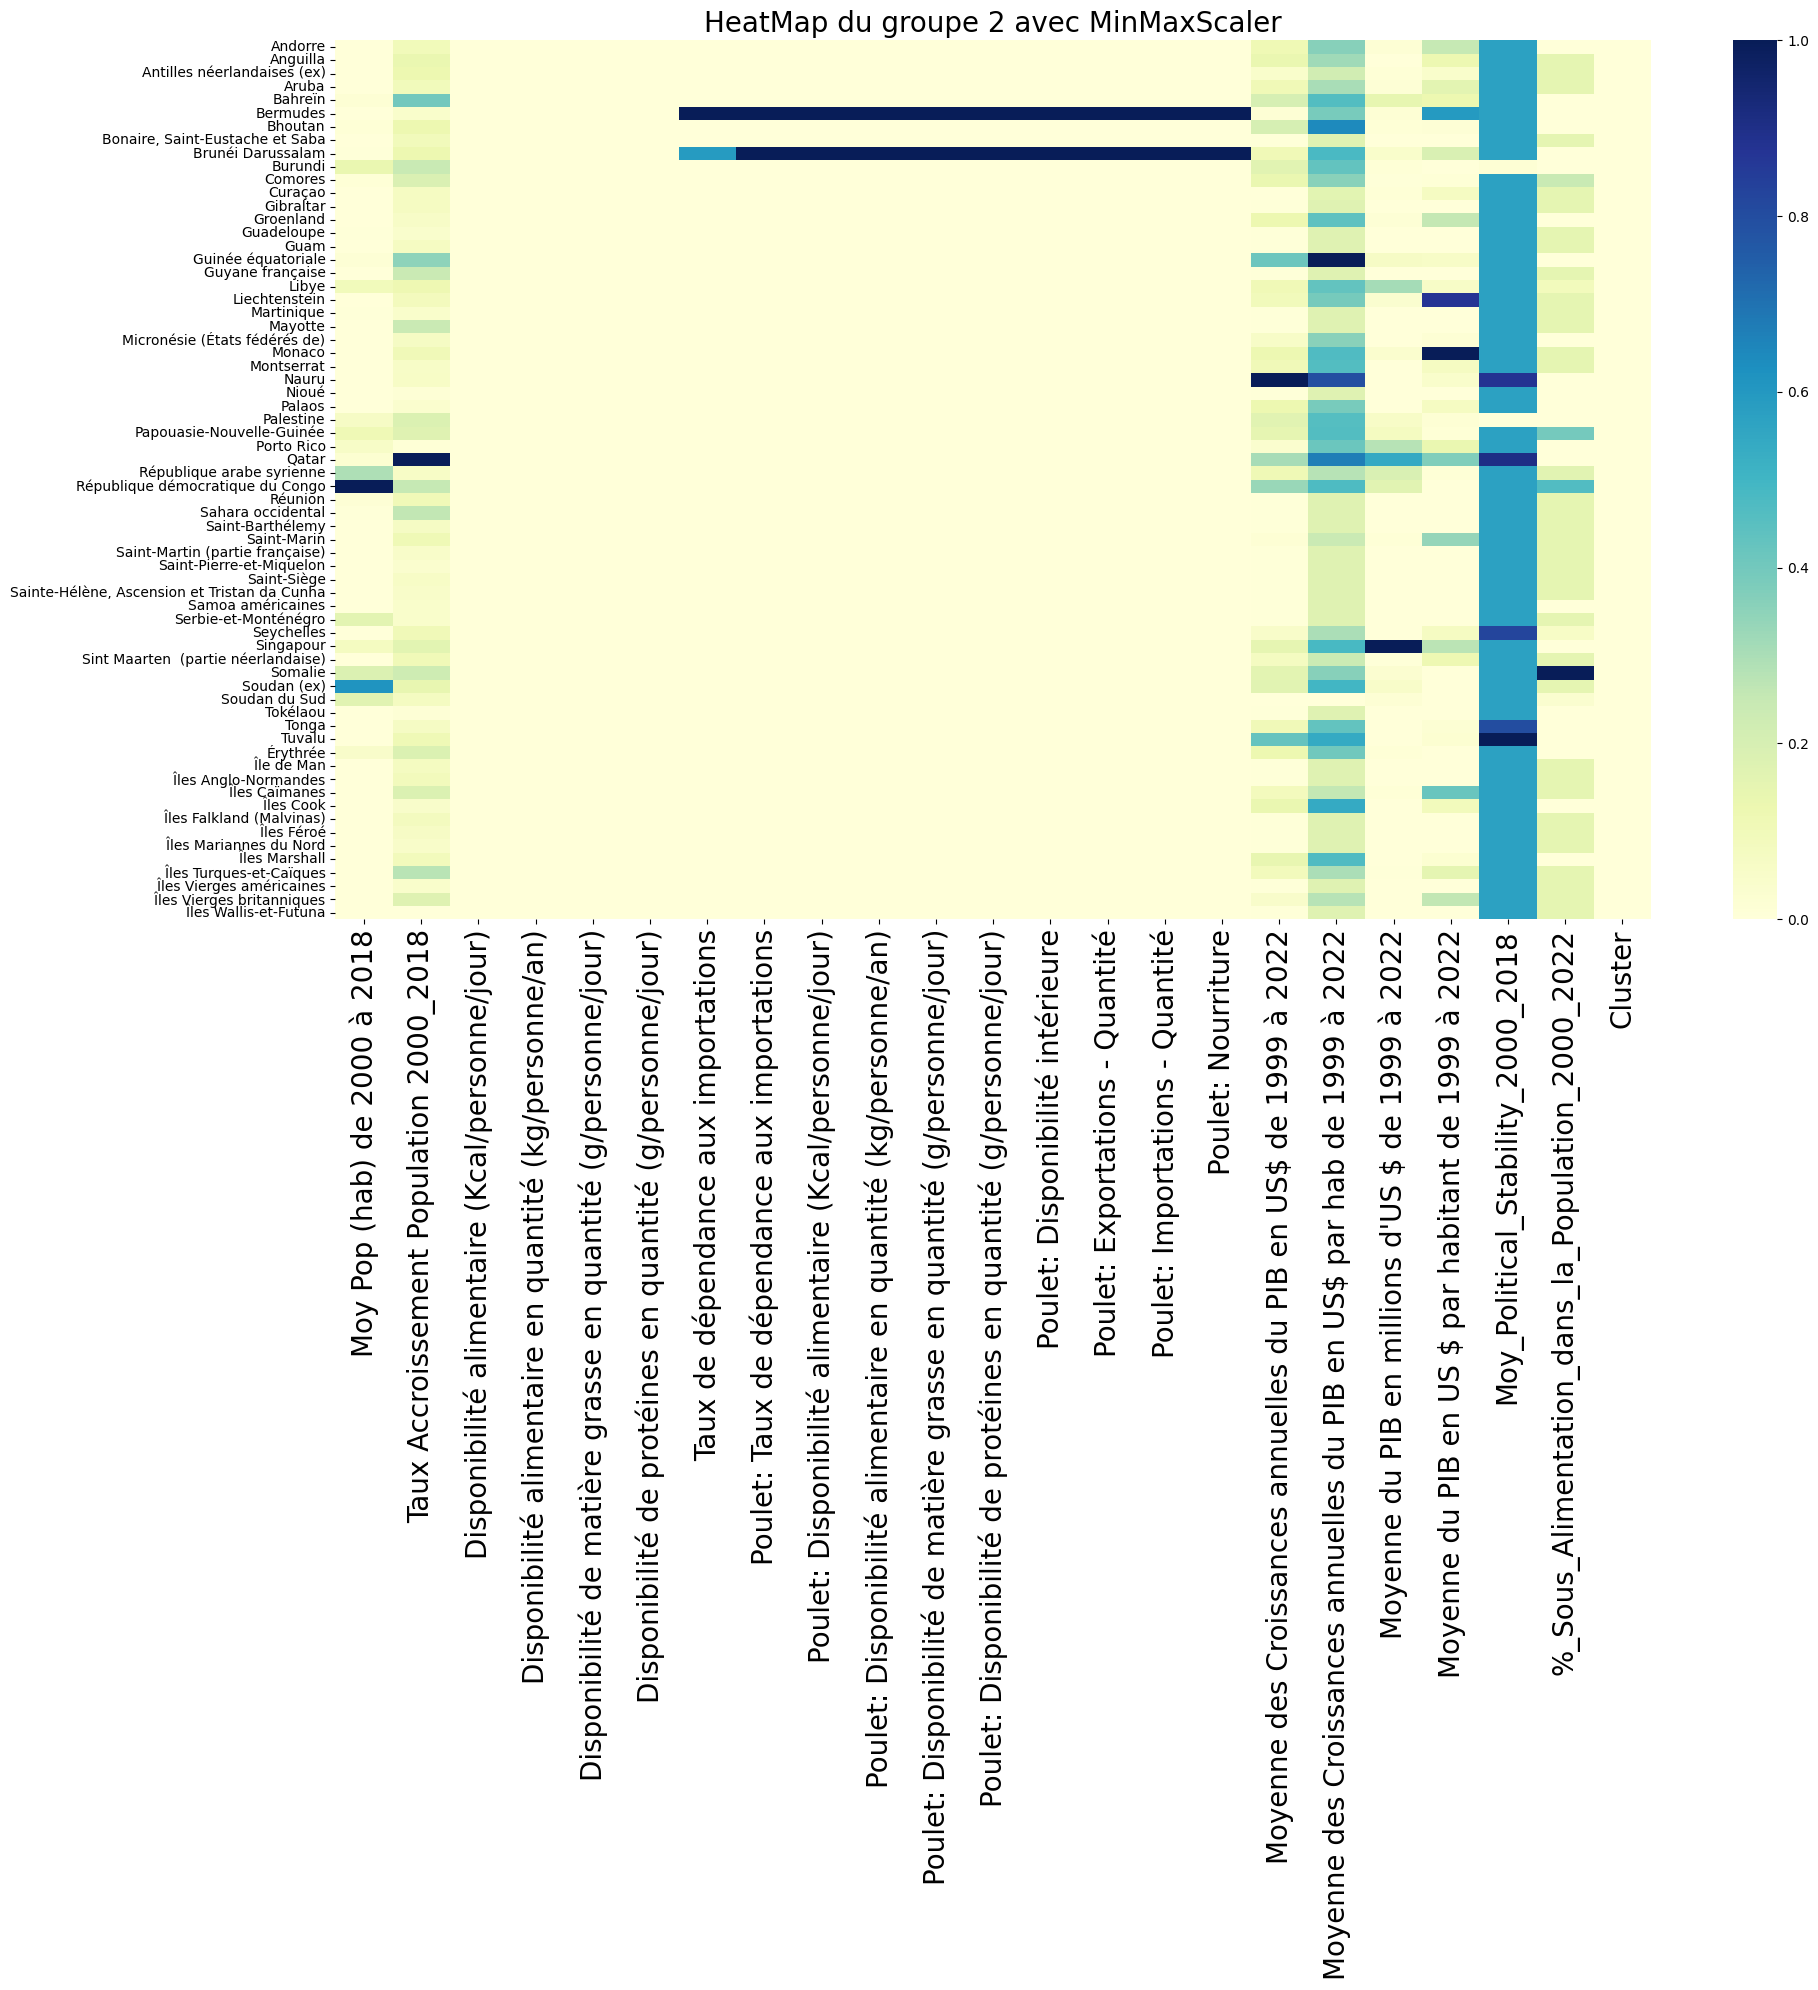

In [281]:
# Taille de la figure

fs = 20

plt.figure(figsize=(fs,fs))

# Pour la légende des axes

yticks = G2_MM.index

xticks = G2_MM.columns

# La heatmap

sns.heatmap(X_scaled_G2_MM,cmap="YlGnBu",yticklabels=yticks,xticklabels=xticks)

# This sets the yticks "upright" with 0, as opposed to sideways with 90.

plt.yticks(rotation=0, fontsize = fs-10)
plt.xticks(rotation=90, fontsize = fs)

plt.title("HeatMap du groupe 2 avec MinMaxScaler",fontsize= 20)
          
# Pour sauvegarder les figures

print(f"Il y a {G2_MM.shape[0]} pays dans ce groupe")

plt.tight_layout()
plt.savefig("P9_Heatmap_G2_MM.png")
plt.show()

In [282]:
G3_MM

Moy Pop (hab) de 2000 à 2018  \
Pays                                                  
Afrique du Sud                         5.090147e+07   
Albanie                                2.994856e+06   
Allemagne                              8.152701e+07   
Antigua-et-Barbuda                     8.647737e+04   
Arabie saoudite                        2.695035e+07   
...                                             ...   
Tunisie                                1.055877e+07   
Turquie                                7.205527e+07   
Ukraine                                4.619197e+07   
Émirats arabes unis                    6.923823e+06   
États-Unis d'Amérique                  3.055111e+08   

                       Taux Accroissement Population 2000_2018  \
Pays                                                             
Afrique du Sud                                            0.29   
Albanie                                                  -0.08   
Allemagne                                                 0.02   
Antigua-et-Barbuda                                        0.27   
Arabie saoudite                                           0.63   
...                                                        ...   
Tunisie                                                   0.19   
Turquie                                                   0.30   
Ukraine                                                  -0.09   
Émirats arabes unis                                       2.07   
États-Unis d'Amérique                                     0.16   

                       Disponibilité alimentaire (Kcal/personne/jour)  \
Pays                                                                    
Afrique du Sud                                                 2987.0   
Albanie                                                        3400.0   
Allemagne                                                      3559.0   
Antigua-et-Barbuda                                             2429.0   
Arabie saoudite                                                3194.0   
...                                                               ...   
Tunisie                                                        3469.0   
Turquie                                                        3538.0   
Ukraine                                                        3033.0   
Émirats arabes unis                                            3370.0   
États-Unis d'Amérique                                          3762.0   

                       Disponibilité alimentaire en quantité (kg/personne/an)  \
Pays                                                                            
Afrique du Sud                                                    556.42        
Albanie                                                          1260.49        
Allemagne                                                         943.24        
Antigua-et-Barbuda                                                632.98        
Arabie saoudite                                                   546.35        
...                                                                  ...        
Tunisie                                                           864.04        
Turquie                                                           939.16        
Ukraine                                                           855.42        
Émirats arabes unis                                               627.67        
États-Unis d'Amérique                                             990.38        

                       Disponibilité de matière grasse en quantité (g/personne/jour)  \
Pays                                                                                   
Afrique du Sud                                                     81.92               
Albanie                                                           117.57               
Allemagne                                                         147.96               
Anti

In [283]:
Group_3_Min_Max_Scaler

Pays  Moy Pop (hab) de 2000 à 2018  \
0                 Afghanistan                   28845766.58   
2              Afrique du Sud                   50901472.26   
12         Antigua-et-Barbuda                      86477.37   
14            Arabie saoudite                   26950353.53   
20                  Australie                   21785345.11   
..                        ...                           ...   
397  Saint-Pierre-et-Miquelon                       6157.53   
398               Saint-Siège                        796.63   
399         Samoa américaines                      57233.47   
400      Serbie-et-Monténégro                    9943209.00   
401                Seychelles                      90408.68   

     Taux Accroissement Population 2000_2018  \
0                                       0.79   
2                                       0.29   
12                                      0.27   
14                                      0.63   
20                                      0.31   
..                                       ...   
397                                    -0.07   
398                                     0.02   
399                                    -0.04   
400                                    -0.03   
401                                     0.20   

     Disponibilité alimentaire (Kcal/personne/jour)  \
0                                            1997.0   
2                                            2987.0   
12                                           2429.0   
14                                           3194.0   
20                                           3307.0   
..                                              ...   
397                                             0.0   
398                                             0.0   
399                                             0.0   
400                                             0.0   
401                                             0.0   

     Disponibilité alimentaire en quantité (kg/personne/an)  \
0                                               357.31        
2                                               556.42        
12                                              632.98        
14                                              546.35        
20                                              906.77        
..                                                 ...        
397                                               0.00        
398                                               0.00        
399                                               0.00        
400                                               0.00        
401                                               0.00        

     Disponibilité de matière grasse en quantité (g/personne/jour)  \
0                                                30.63               
2                                                81.92               
12                                               88.72               
14                                              103.08               
20                                              153.79               
..                                                 ...               
397                                               0.00               
398                                               0.00               
399                                               0.00               
400                                               0.00               
401                                               0.00               

     Disponibilité de protéines en quantité (g/personne/jour)  \
0                                                54.09          
2                                                83.36          
12                                               81.15          
14                                               87.51          
20                                              108.01          
..                                        

In [284]:
# On regarde par rapport aux taux de dépendance aux importations de poulet

Group_3_Min_Max_Scaler.sort_values(["Poulet: Taux de dépendance aux importations"],ascending= False).head(10)

Pays  Moy Pop (hab) de 2000 à 2018  \
54             Cabo Verde                     486952.00   
286                 Samoa                     185145.79   
208            Mauritanie                    3440993.79   
12     Antigua-et-Barbuda                      86477.37   
288  Sao Tomé-et-Principe                     175418.63   
88               Djibouti                     834018.84   
90              Dominique                      70728.58   
76                  Congo                    4142352.05   
280          Sainte-Lucie                     170494.32   
152                  Iraq                   30122744.58   

     Taux Accroissement Population 2000_2018  \
54                                      0.27   
286                                     0.12   
208                                     0.67   
12                                      0.27   
288                                     0.48   
88                                      0.34   
90                                      0.03   
76                                      0.68   
280                                     0.16   
152                                     0.64   

     Disponibilité alimentaire (Kcal/personne/jour)  \
54                                           2512.0   
286                                          2971.0   
208                                          2842.0   
12                                           2429.0   
288                                          2417.0   
88                                           2677.0   
90                                           2945.0   
76                                           2305.0   
280                                          2658.0   
152                                          2505.0   

     Disponibilité alimentaire en quantité (kg/personne/an)  \
54                                              523.68        
286                                             833.43        
208                                             456.82        
12                                              632.98        
288                                             614.33        
88                                              431.32        
90                                              988.87        
76                                              612.61        
280                                             556.08        
152                                             378.59        

     Disponibilité de matière grasse en quantité (g/personne/jour)  \
54                                               68.47               
286                                             139.12               
208                                              72.59               
12                                               88.72               
288                                              74.52               
88                                               59.81               
90                                               80.12               
76                                               46.96               
280                                              82.58               
152                                              69.41               

     Disponibilité de protéines en quantité (g/personne/jour)  \
54                                               69.33          
286                                              85.70          
208                                              79.82          
12                                               81.15          
288                                              52.00          
88                                               66.43          
90                                               78.96          
76                                               55.63          
280                                              86.26          
152                                              60.54          

     Taux de dépendance aux importations  \
54         

In [285]:
# On regarde par rapport aux taux de stabilité politique

Group_3_Min_Max_Scaler.sort_values(["Moy_Political_Stability_2000_2018"],ascending= False).head(10)

Pays  Moy Pop (hab) de 2000 à 2018  \
174    Kiribati                     100238.68   
286       Samoa                     185145.79   
388       Qatar                    1636430.68   
258    Portugal                   10451079.89   
54   Cabo Verde                     486952.00   
401  Seychelles                      90408.68   
78   Costa Rica                    4507289.32   
116      France                   62374183.89   
338    Viet Nam                   87385724.05   
354     Comores                     678872.26   

     Taux Accroissement Population 2000_2018  \
174                                     0.37   
286                                     0.12   
388                                     3.70   
258                                    -0.00   
54                                      0.27   
401                                     0.20   
78                                      0.26   
116                                     0.10   
338                                     0.20   
354                                     0.53   

     Disponibilité alimentaire (Kcal/personne/jour)  \
174                                          3056.0   
286                                          2971.0   
388                                             0.0   
258                                          3494.0   
54                                           2512.0   
401                                             0.0   
78                                           3013.0   
116                                          3556.0   
338                                          2938.0   
354                                             0.0   

     Disponibilité alimentaire en quantité (kg/personne/an)  \
174                                             627.94        
286                                             833.43        
388                                               0.00        
258                                            1041.19        
54                                              523.68        
401                                               0.00        
78                                              693.11        
116                                             943.52        
338                                             713.46        
354                                               0.00        

     Disponibilité de matière grasse en quantité (g/personne/jour)  \
174                                             103.72               
286                                             139.12               
388                                               0.00               
258                                             145.04               
54                                               68.47               
401                                               0.00               
78                                              108.72               
116                                             157.71               
338                                              78.45               
354                                               0.00               

     Disponibilité de protéines en quantité (g/personne/jour)  \
174                                              73.90          
286                                              85.70          
388                                               0.00          
258                                             114.41          
54                                               69.33          
401                                               0.00          
78                                               81.15          
116                                             112.08          
338                                              90.03          
354                                               0.00          

     Taux de dépendance aux importations  \
174                                 9.73   
286                                20.29   
388                    

In [286]:
# On regarde qui a le plus gros PIB

Group_3_Min_Max_Scaler.sort_values(["Moyenne du PIB en US $ par habitant de 1999 à 2022"],ascending= False).head(10)

Pays  Moy Pop (hab) de 2000 à 2018  \
380                     Monaco                      35363.84   
365              Îles Caïmanes                      54405.21   
388                      Qatar                    1636430.68   
395                Saint-Marin                      30842.84   
304                      Suède                    9351410.68   
20                   Australie                   21785345.11   
248                   Pays-Bas                   16578992.21   
22                    Autriche                    8417649.79   
114                   Finlande                    5350036.47   
373  Îles Vierges britanniques                      25890.47   

     Taux Accroissement Population 2000_2018  \
380                                     0.20   
365                                     0.52   
388                                     3.70   
395                                     0.23   
304                                     0.12   
20                                      0.31   
248                                     0.07   
22                                      0.10   
114                                     0.06   
373                                     0.47   

     Disponibilité alimentaire (Kcal/personne/jour)  \
380                                             0.0   
365                                             0.0   
388                                             0.0   
395                                             0.0   
304                                          3214.0   
20                                           3307.0   
248                                          3251.0   
22                                           3694.0   
114                                          3337.0   
373                                             0.0   

     Disponibilité alimentaire en quantité (kg/personne/an)  \
380                                               0.00        
365                                               0.00        
388                                               0.00        
395                                               0.00        
304                                             928.80        
20                                              906.77        
248                                             945.03        
22                                              931.63        
114                                            1098.24        
373                                               0.00        

     Disponibilité de matière grasse en quantité (g/personne/jour)  \
380                                               0.00               
365                                               0.00               
388                                               0.00               
395                                               0.00               
304                                             134.73               
20                                              153.79               
248                                             129.25               
22                                              166.68               
114                                             139.56               
373                                               0.00               

     Disponibilité de protéines en quantité (g/personne/jour)  \
380                                               0.00          
365                                               0.00          
388                                               0.00          
395                                               0.00          
304                                             107.03          
20                                              108.01          
248                                             104.43          
22                                              108.11          
114                                             117.77          
373                                               0.00          

     

Il y a 90 pays dans ce groupe


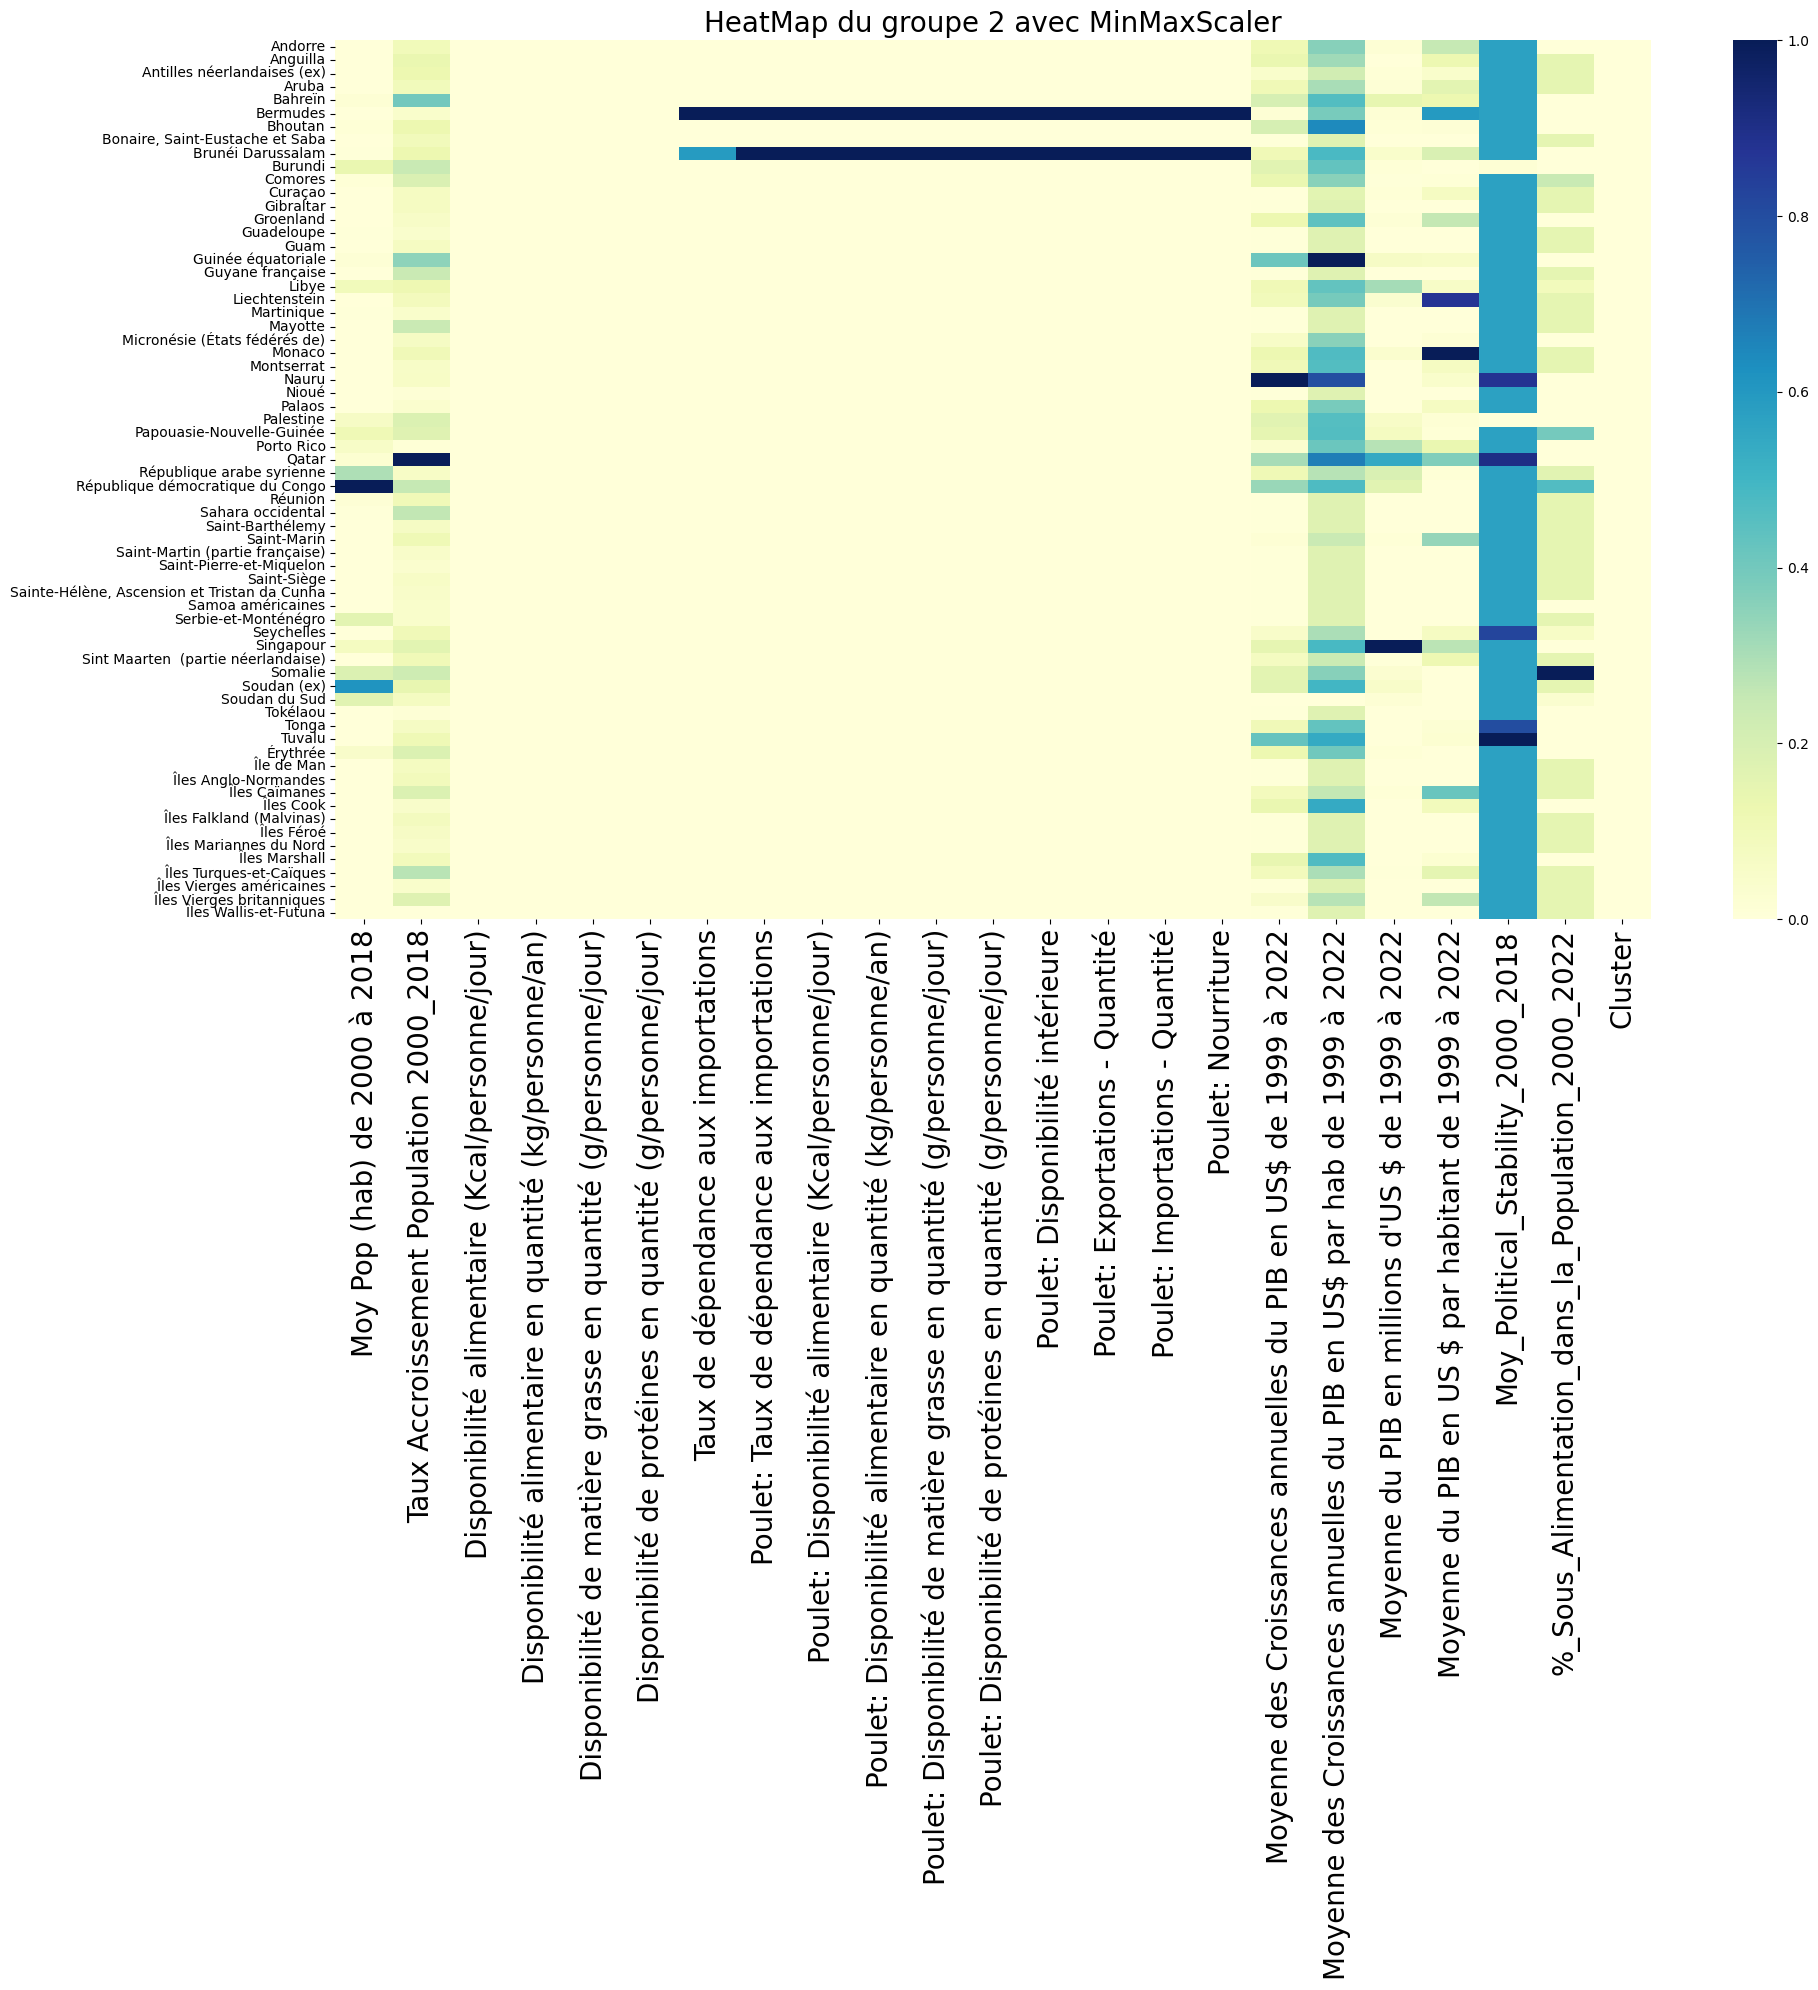

In [287]:
# Taille de la figure

fs = 20

plt.figure(figsize=(fs,fs))

# Pour la légende des axes

yticks = G2_MM.index

xticks = G2_MM.columns

# La heatmap

sns.heatmap(X_scaled_G2_MM,cmap="YlGnBu",yticklabels=yticks,xticklabels=xticks)

# This sets the yticks "upright" with 0, as opposed to sideways with 90.

plt.yticks(rotation=0, fontsize = fs-10)
plt.xticks(rotation=90, fontsize = fs)

plt.title("HeatMap du groupe 2 avec MinMaxScaler",fontsize= 20)
          
# Pour sauvegarder les figures

print(f"Il y a {G3_MM.shape[0]} pays dans ce groupe")

plt.tight_layout()
plt.savefig("P9_Heatmap_G3_MM.png")
plt.show()

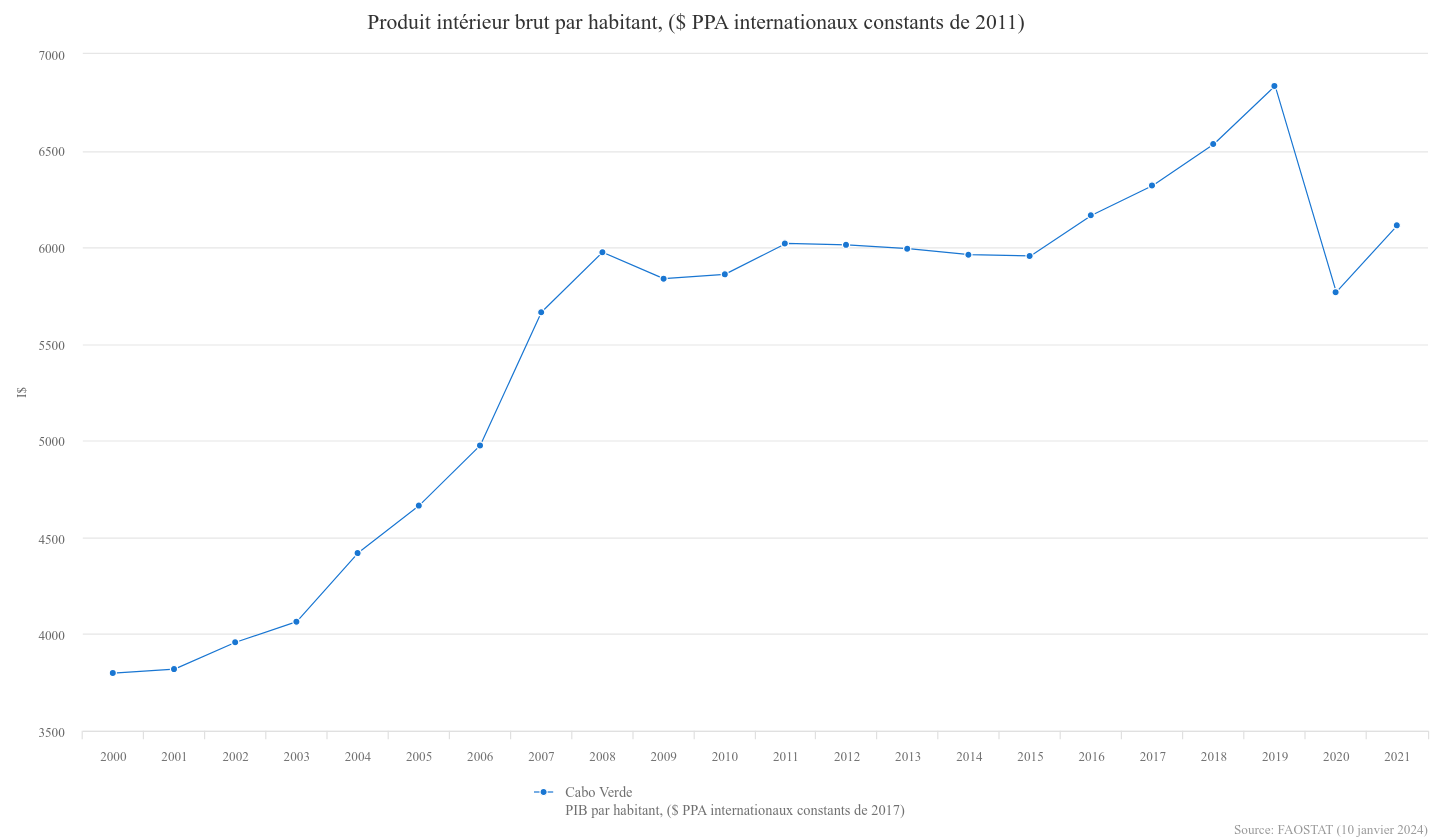

Graphique récuperer sur FAOSTAT permettant de voir que le PIB par habitant progresse au cap vert depuis 2000, il n'apparait pas dans mon top 10 de la moyenne du PIB car il était très bas avant 2007

Sur ce graphique on peut voir que l'import de viande,poulet est important pour le Cap Vert car il est le troisième produit le plus importer 

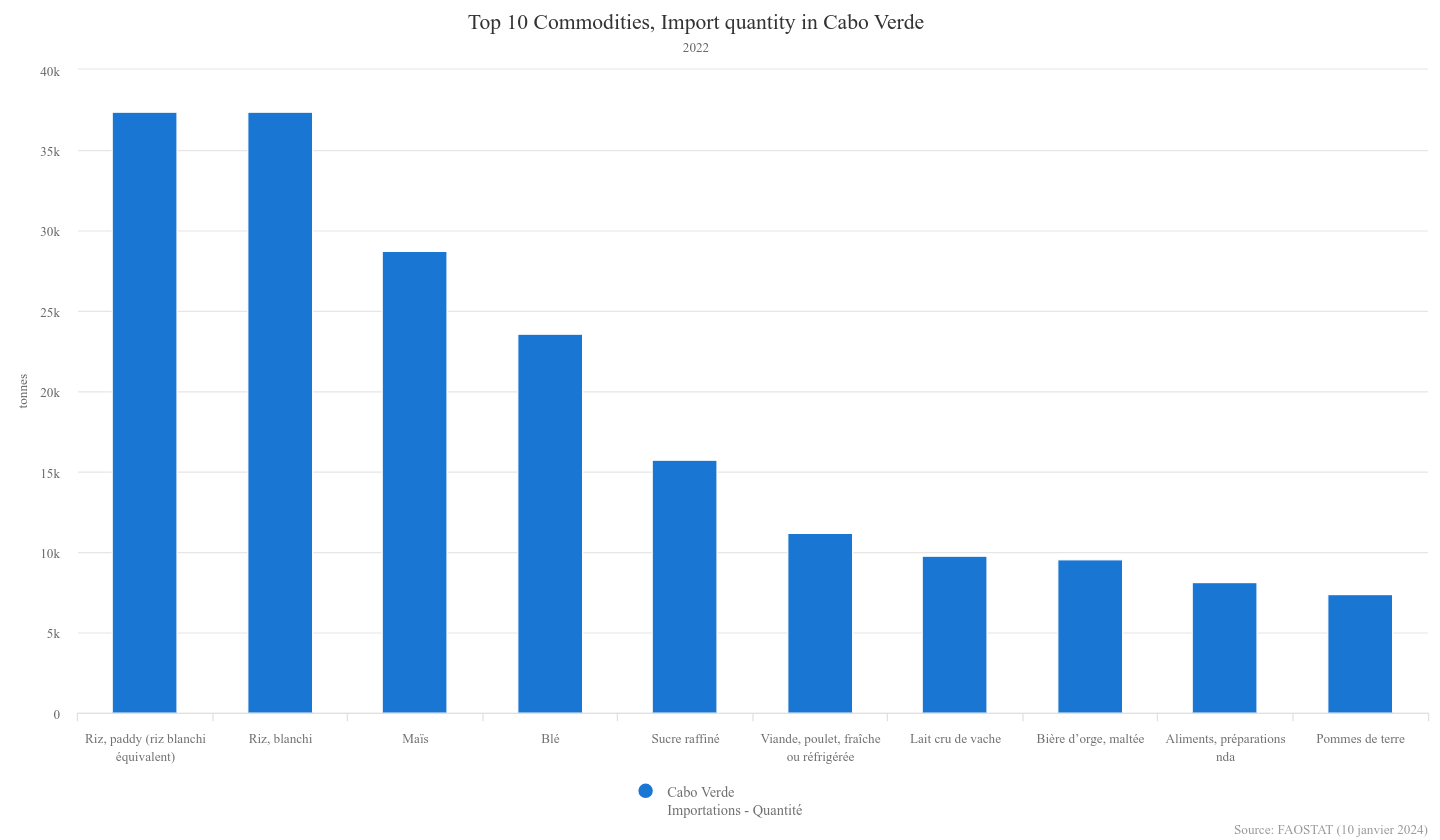

ici on peut voir la quantité en tonnes de viande importer en 2022

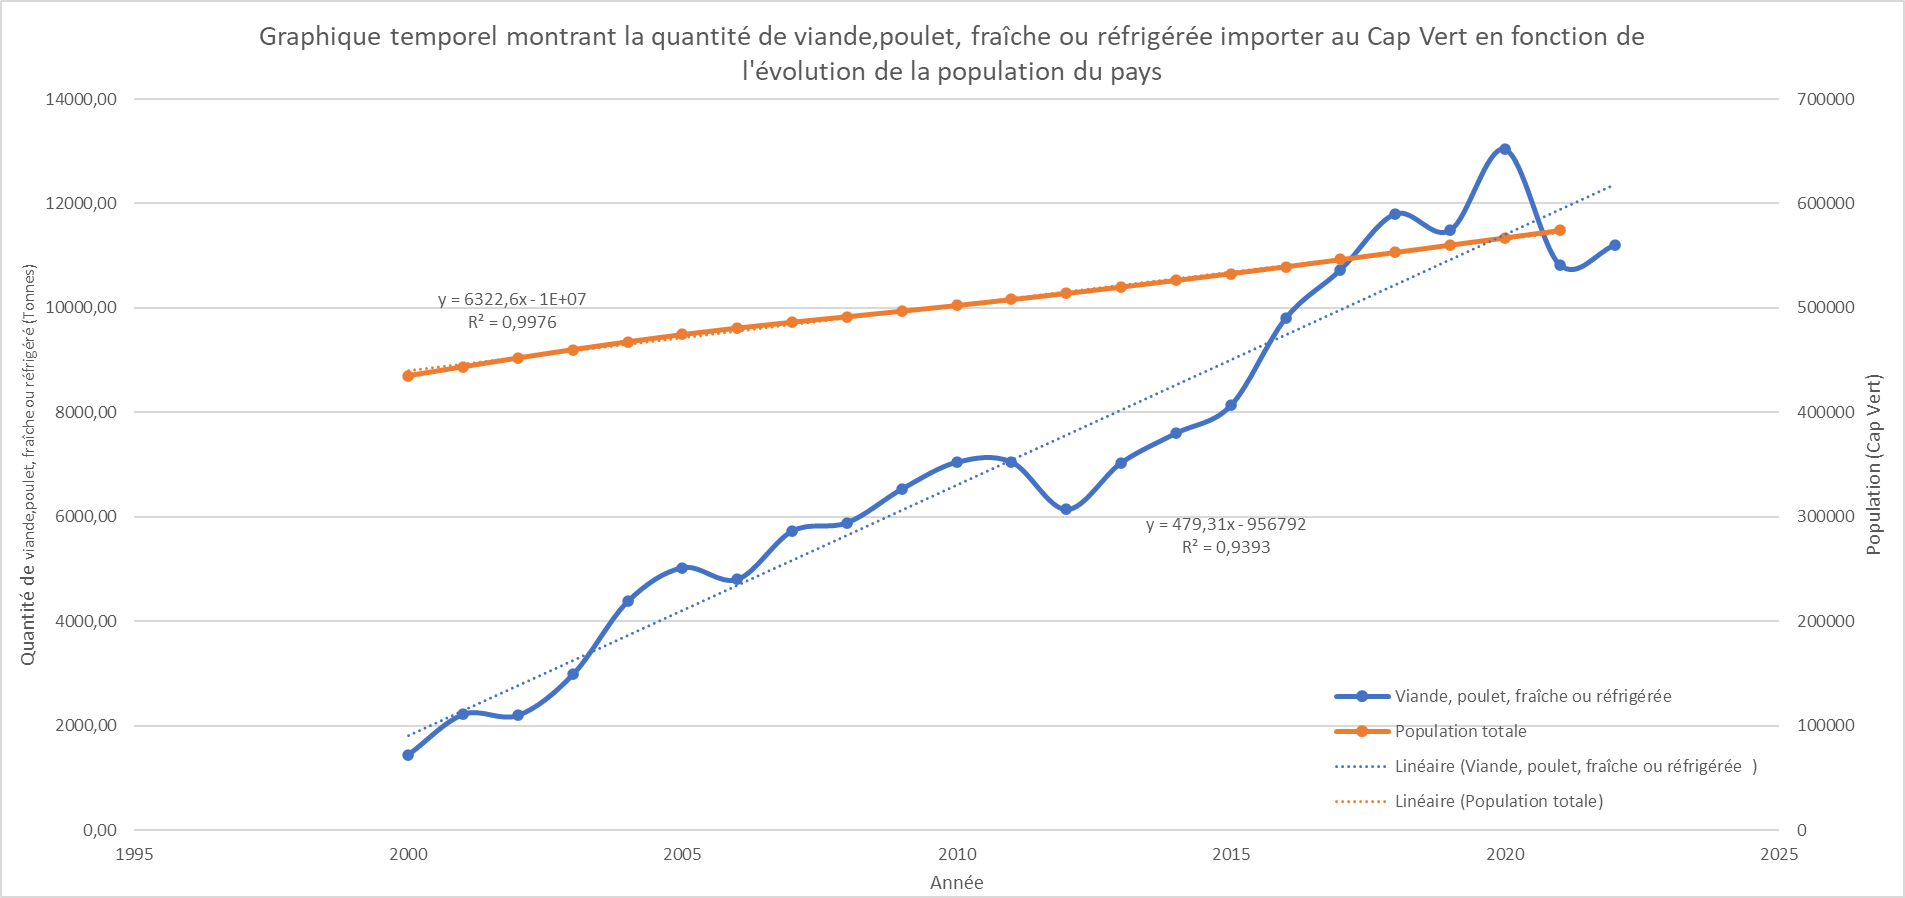

Sur ce graphique on peut clairement voir que le Cap Vert est un pays parfait pour exporter nos poulets car c'est un marché en pleine demande le Cap Vert à une augmentation constante de sa population ce qui fait accroitre la demande en viande dont le poulet 

Pourquoi normer les données (éviter les outliers)

